<a id="plan"></a>



 **Predicting a song's populatiry on Spotify with Random Forrests<br><br>**



# Imports

In [171]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# base modules
import os
import sys
import copy
import logging

# custom module
from emlyon_module.imports import *
from emlyon_module.structured import *


# for manipulating data
from pandas_summary import DataFrameSummary
#pip install dill
#import dill

# for Machine Learning
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.inspection import permutation_importance
from scipy.cluster import hierarchy

# for visualization
from IPython.display import display
from matplotlib import pyplot as plt
#!pip install -U plotnine
#from plotnine import ggplot, aes
#from plotnine.stats import stat_smooth
from pdpbox import pdp
# plotly
# seaborn
# altair

# Data first look

[Back to top](#plan)

## Import

In [3]:
path_to_repo = os.path.dirname(os.getcwd())

path = os.path.join(path_to_repo, "data", "")

path_to_datasets = os.path.join(path, 'data.csv')

df_raw = pd.read_csv(path_to_datasets, low_memory = False, parse_dates = True)

NameError: name 'os' is not defined

In [2]:
path_to_datasets

NameError: name 'path_to_datasets' is not defined

<a id="look_data"></a>

## First look on the data

First let's look the type of data and column name

In [174]:
df_raw.dtypes

acousticness               float64
artists                     object
danceability               float64
duration_ms                  int64
energy                     float64
explicit                     int64
id                          object
instrumentalness           float64
key                          int64
liveness                   float64
loudness                   float64
mode                         int64
name                        object
popularity                   int64
release_date        datetime64[ns]
speechiness                float64
tempo                      float64
valence                    float64
year                         int64
dtype: object

In [175]:
df_raw

acousticness                             artists  danceability  \
0           0.991000                     ['Mamie Smith']         0.598   
1           0.643000           ["Screamin' Jay Hawkins"]         0.852   
2           0.993000                     ['Mamie Smith']         0.647   
3           0.000173                 ['Oscar Velazquez']         0.730   
4           0.295000                            ['Mixe']         0.704   
...              ...                                 ...           ...   
174384      0.009170  ['DJ Combo', 'Sander-7', 'Tony T']         0.792   
174385      0.795000                    ['Alessia Cara']         0.429   
174386      0.806000                       ['Roger Fly']         0.671   
174387      0.920000                    ['Taylor Swift']         0.462   
174388      0.239000                       ['Roger Fly']         0.677   

        duration_ms  energy  explicit                      id  \
0            168333   0.224         0  0cS0A1fUEUd1EW3FcF8AEI   
1            150200   0.517         0  0hbkKFIJm7Z05H8Zl9w30f   
2            163827   0.186         0  11m7laMUgmOKqI3oYzuhne   
3            422087   0.798         0  19Lc5SfJJ5O1oaxY0fpwfh   
4            165224   0.707         1  2hJjbsLCytGsnAHfdsLejp   
...             ...     ...       ...                     ...   
174384       147615   0.866         0  46LhBf6TvYjZU2SMvGZAbn   
174385       144720   0.211         0  7tue2Wemjd0FZzRtDrQFZd   
174386       218147   0.589         0  48Qj61hOdYmUCFJbpQ29Ob   
174387       244000   0.240         1  1gcyHQpBQ1lfXGdhZmWrHP   
174388       197710   0.460         0  57tgYkWQTNHVFEt6xDKKZj   

        instrumentalness  key  liveness  loudness  mode  \
0               0.000522    5    0.3790   -12.628     0   
1               0.026400    5    0.0809    -7.261     0   
2               0.000018    0    0.5190   -12.098     1   
3               0.801000    2    0.1280    -7.311     1   
4               0.000246   10    0.4020    -6.036     0   
...                  ...  ...       ...       ...   ...   
174384          0.000060    6    0.1780    -5.089     0   
174385          0.000000    4    0.1960   -11.665     1   
174386          0.920000    4    0.1130   -12.393     0   
174387          0.000000    0    0.1130   -12.077     1   
174388          0.891000    7    0.2150   -12.237     1   

                                                     name  popularity  \
0                                Keep A Song In Your Soul          12   
1                                    I Put A Spell On You           7   
2                                            Golfing Papa           4   
3       True House Music - Xavier Santos & Carlos Gomi...          17   
4                                               Xuniverxe           2   
...                                                   ...         ...   
174384                                            The One           0   
174385                                      A Little More           0   
174386                                           Together           0   
174387                                 champagne problems          69   
174388                                     Improvisations           0   

       release_date  speechiness    tempo  valence  year  
0        1920-01-01       0.0936  149.976   0.6340  1920  
1        1920-01-05       0.0534   86.889   0.9500  1920  
2        1920-01-01       0.1740   97.600   0.6890  1920  
3        1920-01-01       0.0425  127.997   0.0422  1920  
4        1920-10-01       0.0768  122.076   0.2990  1920  
...             ...          ...      ...      ...   ...  
174384   2020-12-25       0.0356  125.972   0.1860  2020  
174385   2021-01-22       0.0360   94.710   0.2280  2021  
174386   2020-12-09       0.0282  108.058   0.7140  2020  
174387   2021-01-07       0.0377  171.319   0.3200  2021  
174388   2020-12-09       0.0258  112.208   0.7470  2020  

[174389 rows x 19 columns]

Let's have a quick look on the data repartition over each music characteristics

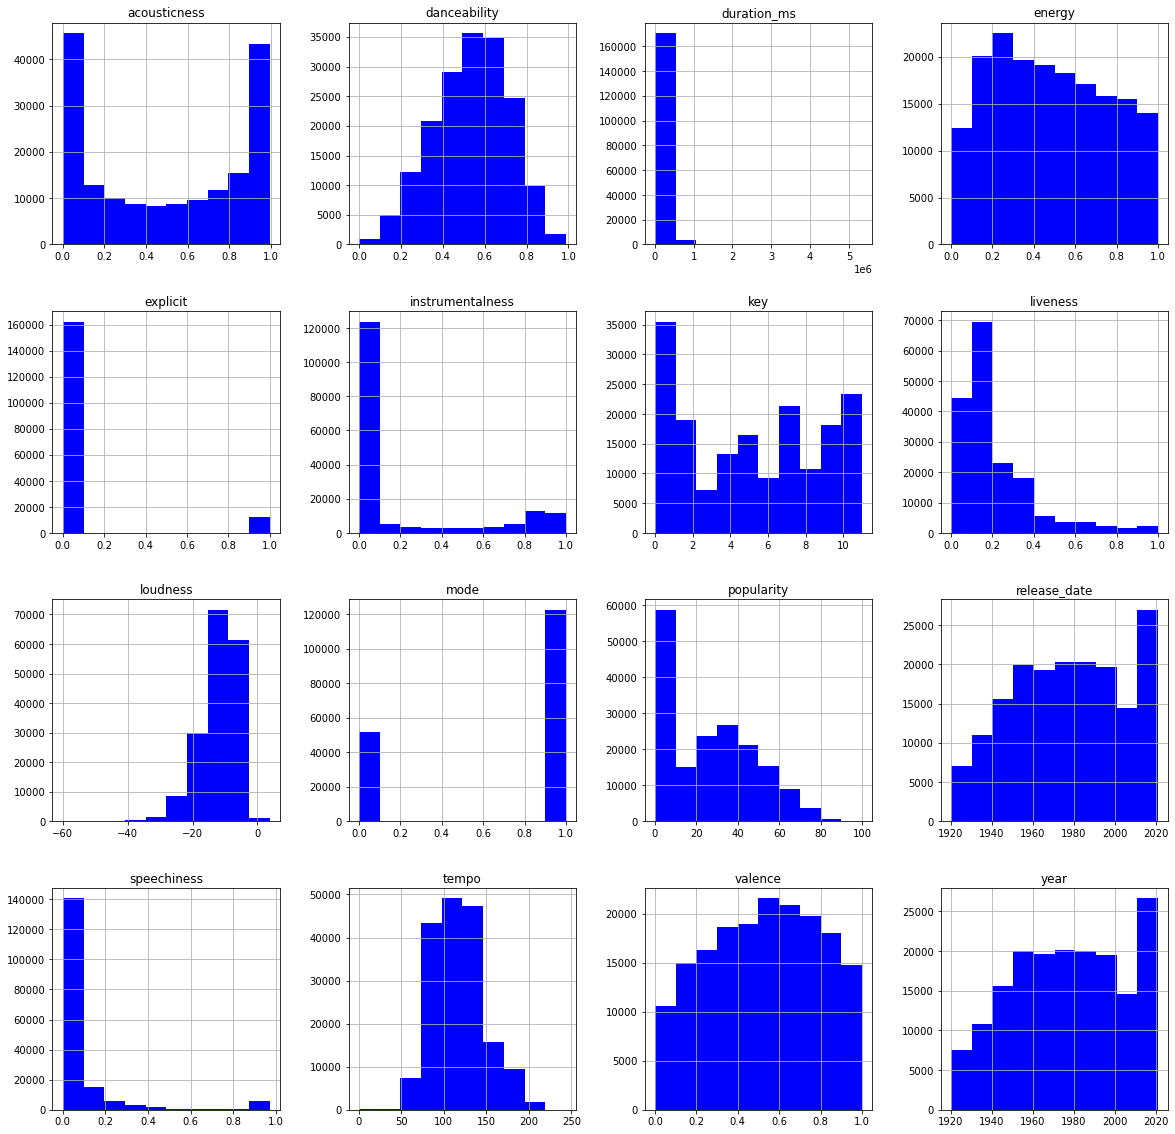

In [176]:
df_raw.hist(figsize=(20, 20), color='Blue')
plt.show()

These graph shows us the unbalanced data which will need to be retreat through intervals. Therefore the unbalanced identied data are on the acousticsness and intrumentalness.

## Correlation Inspection

Too have a first sigh of the possible correlation over the popularity and our dataset, we must sort the descending correlation from all our columns

In [177]:
corr = np.abs(df_raw.corr())
series = np.abs(corr['popularity']).sort_values(ascending=False)
for i, row in enumerate(series):
    if 0.1 <= row < 1:
      print(f'{series.index[i]:17} --> {row: .2f} (abs)')

year              -->  0.51 (abs)
acousticness      -->  0.40 (abs)
loudness          -->  0.34 (abs)
energy            -->  0.33 (abs)
instrumentalness  -->  0.30 (abs)
speechiness       -->  0.20 (abs)
explicit          -->  0.15 (abs)
danceability      -->  0.12 (abs)


The year, acousticness and loudness appears to be the three main correlators to the popularity. For now artists do not seems correlate to popularity, this might result from the format of the artist column in the dataset.

## Inspection of our predicted variable - Popularity

[Back to top](#plan)

The variable we want to predict is the popularity of a song, based on its characteristics, artist and date of release. So let's have a look on the popularity data
[texte du lien](https://)

In [178]:
df_raw.popularity.describe()

count    174389.000000
mean         25.693381
std          21.872740
min           0.000000
25%           1.000000
50%          25.000000
75%          42.000000
max         100.000000
Name: popularity, dtype: float64

In [179]:
df_raw[df_raw['popularity'] > 90]

acousticness                                            artists  \
19470       0.48300                                            ['Sia']   
19670       0.12200                                   ['Harry Styles']   
19862       0.22100                          ['24kGoldn', 'iann dior']   
19864       0.49900                                            ['SZA']   
19866       0.46800                                  ['Ariana Grande']   
19868       0.23700                                  ['Ariana Grande']   
19870       0.19000                                             ['CJ']   
19872       0.21300                                  ['The Kid LAROI']   
19874       0.11400                ['Pop Smoke', 'Lil Baby', 'DaBaby']   
19876       0.21800                                  ['Billie Eilish']   
19878       0.65000                                      ['Pop Smoke']   
19880       0.01940                 ['Cardi B', 'Megan Thee Stallion']   
19884       0.12000                                      ['Lil Nas X']   
19886       0.40100                       ['Bad Bunny', 'Jhay Cortez']   
19892       0.24700                          ['DaBaby', 'Roddy Ricch']   
19896       0.58400                                     ['Conan Gray']   
19900       0.78600                                     ['Tate McRae']   
19908       0.86400                  ['Justin Bieber', 'benny blanco']   
19924       0.06760                  ['Shawn Mendes', 'Justin Bieber']   
19928       0.03030                           ['Bad Bunny', 'ROSALÍA']   
19974       0.00691                                            ['BTS']   
19976       0.21200                                        ['KAROL G']   
19984       0.01120                                            ['BTS']   
20018       0.40100                       ['Bad Bunny', 'Jhay Cortez']   
20062       0.72100                                 ['Olivia Rodrigo']   
20068       0.18100                                  ['Justin Bieber']   
39236       0.16800                             ['Joel Corry', 'MNEK']   
39252       0.41400                                         ['Tiësto']   
39424       0.18000  ['Manuel Turizo', 'Rauw Alejandro', 'Myke Towe...   
76406       0.36200                                           ['Boza']   
76488       0.12200                            ['Myke Towers', 'Juhn']   

       danceability  duration_ms  energy  explicit                      id  \
19470         0.716       165907   0.512         0  7uoFMmxln0GPXQ0AcCBXRq   
19670         0.548       174000   0.816         0  6UelLqGlWMcVH1E5c4H7lY   
19862         0.700       140526   0.722         1  3tjFYV6RSFtuktYl3ZtYcq   
19864         0.436       279204   0.655         1  3YJJjQPAbDT7mGpX3WtQ9A   
19866         0.737       172325   0.802         1  35mvY5S1H3J2QZyna3TFe0   
19868         0.830       173711   0.585         1  6Im9k8u9iIzKMrmV7BWtlF   
19870         0.711       123429   0.598         1  5vGLcdRuSbUhD8ScwsGSdA   
19872         0.662       161385   0.413         1  27OeeYzk6klgBh83TSvGMA   
19874         0.823       190476   0.586         1  0PvFJmanyNQMseIFrU708S   
19876         0.889       174321   0.340         0  54bFM56PmE4YLRnqpW6Tha   
19878         0.709       160000   0.548         1  1tkg4EHVoqnhR6iFEXb60y   
19880         0.935       187541   0.454         1  4Oun2ylbjFKMPTiaSbbCih   
19884         0.810       154998   0.511         1  6zFMeegAMYQo0mt8rXtrli   
19886         0.731       205090   0.573         1  47EiUVwUp4C9fGccaPuUCS   
19892         0.746       181733   0.690         1  7ytR5pFWmSjzHJIeQkgog4   
19896         0.357       198040   0.425         0  4xqrdfXkTW4T0RauPLv3WA   
19900         0.642       169266   0.374         0  45bE4HXI0AwGZXfZtMp8JR   
19908         0.631       149297   0.239         1  4y4spB9m0Q6026KfkAvy9Q   
19924         0.652       178994   0.383         0  2Z8yfpFX0ZMavHkcIeHiO1   
19928         0.856       203201   0.618         0  2XIc1pqjXV3Cr2BQUGNBck   


The popularity rating is a numerical value between 0 and 100 attributed to each song, 100 meaning that a song is very popular. Out of 173,292 total songs, only 31 have a popularity rating of 90 or above.

# Data Preprocessing

## Preprocessing of Artists Name

As we can see, the elements in the 'artists' column are actually sublists. For example on the row 174,384, the song has 3 different artists. In order to process the fact that a song could have multiple.
*We will add a column for each secondary artist on a song so that the model can process each artist individualy instead of processing the list as a single element.*

In [180]:
for i, l in enumerate(df_raw["artists"]):
    print("list",i,"is",type(l))

list 0 is <class 'str'>
list 1 is <class 'str'>
list 2 is <class 'str'>
list 3 is <class 'str'>
list 4 is <class 'str'>
list 5 is <class 'str'>
list 6 is <class 'str'>
list 7 is <class 'str'>
list 8 is <class 'str'>
list 9 is <class 'str'>
list 10 is <class 'str'>
list 11 is <class 'str'>
list 12 is <class 'str'>
list 13 is <class 'str'>
list 14 is <class 'str'>
list 15 is <class 'str'>
list 16 is <class 'str'>
list 17 is <class 'str'>
list 18 is <class 'str'>
list 19 is <class 'str'>
list 20 is <class 'str'>
list 21 is <class 'str'>
list 22 is <class 'str'>
list 23 is <class 'str'>
list 24 is <class 'str'>
list 25 is <class 'str'>
list 26 is <class 'str'>
list 27 is <class 'str'>
list 28 is <class 'str'>
list 29 is <class 'str'>
list 30 is <class 'str'>
list 31 is <class 'str'>
list 32 is <class 'str'>
list 33 is <class 'str'>
list 34 is <class 'str'>
list 35 is <class 'str'>
list 36 is <class 'str'>
list 37 is <class 'str'>
list 38 is <class 'str'>
list 39 is <class 'str'>
list 40 is

list 481 is <class 'str'>
list 482 is <class 'str'>
list 483 is <class 'str'>
list 484 is <class 'str'>
list 485 is <class 'str'>
list 486 is <class 'str'>
list 487 is <class 'str'>
list 488 is <class 'str'>
list 489 is <class 'str'>
list 490 is <class 'str'>
list 491 is <class 'str'>
list 492 is <class 'str'>
list 493 is <class 'str'>
list 494 is <class 'str'>
list 495 is <class 'str'>
list 496 is <class 'str'>
list 497 is <class 'str'>
list 498 is <class 'str'>
list 499 is <class 'str'>
list 500 is <class 'str'>
list 501 is <class 'str'>
list 502 is <class 'str'>
list 503 is <class 'str'>
list 504 is <class 'str'>
list 505 is <class 'str'>
list 506 is <class 'str'>
list 507 is <class 'str'>
list 508 is <class 'str'>
list 509 is <class 'str'>
list 510 is <class 'str'>
list 511 is <class 'str'>
list 512 is <class 'str'>
list 513 is <class 'str'>
list 514 is <class 'str'>
list 515 is <class 'str'>
list 516 is <class 'str'>
list 517 is <class 'str'>
list 518 is <class 'str'>
list 519 is 

list 1106 is <class 'str'>
list 1107 is <class 'str'>
list 1108 is <class 'str'>
list 1109 is <class 'str'>
list 1110 is <class 'str'>
list 1111 is <class 'str'>
list 1112 is <class 'str'>
list 1113 is <class 'str'>
list 1114 is <class 'str'>
list 1115 is <class 'str'>
list 1116 is <class 'str'>
list 1117 is <class 'str'>
list 1118 is <class 'str'>
list 1119 is <class 'str'>
list 1120 is <class 'str'>
list 1121 is <class 'str'>
list 1122 is <class 'str'>
list 1123 is <class 'str'>
list 1124 is <class 'str'>
list 1125 is <class 'str'>
list 1126 is <class 'str'>
list 1127 is <class 'str'>
list 1128 is <class 'str'>
list 1129 is <class 'str'>
list 1130 is <class 'str'>
list 1131 is <class 'str'>
list 1132 is <class 'str'>
list 1133 is <class 'str'>
list 1134 is <class 'str'>
list 1135 is <class 'str'>
list 1136 is <class 'str'>
list 1137 is <class 'str'>
list 1138 is <class 'str'>
list 1139 is <class 'str'>
list 1140 is <class 'str'>
list 1141 is <class 'str'>
list 1142 is <class 'str'>
l

list 1731 is <class 'str'>
list 1732 is <class 'str'>
list 1733 is <class 'str'>
list 1734 is <class 'str'>
list 1735 is <class 'str'>
list 1736 is <class 'str'>
list 1737 is <class 'str'>
list 1738 is <class 'str'>
list 1739 is <class 'str'>
list 1740 is <class 'str'>
list 1741 is <class 'str'>
list 1742 is <class 'str'>
list 1743 is <class 'str'>
list 1744 is <class 'str'>
list 1745 is <class 'str'>
list 1746 is <class 'str'>
list 1747 is <class 'str'>
list 1748 is <class 'str'>
list 1749 is <class 'str'>
list 1750 is <class 'str'>
list 1751 is <class 'str'>
list 1752 is <class 'str'>
list 1753 is <class 'str'>
list 1754 is <class 'str'>
list 1755 is <class 'str'>
list 1756 is <class 'str'>
list 1757 is <class 'str'>
list 1758 is <class 'str'>
list 1759 is <class 'str'>
list 1760 is <class 'str'>
list 1761 is <class 'str'>
list 1762 is <class 'str'>
list 1763 is <class 'str'>
list 1764 is <class 'str'>
list 1765 is <class 'str'>
list 1766 is <class 'str'>
list 1767 is <class 'str'>
l

list 2355 is <class 'str'>
list 2356 is <class 'str'>
list 2357 is <class 'str'>
list 2358 is <class 'str'>
list 2359 is <class 'str'>
list 2360 is <class 'str'>
list 2361 is <class 'str'>
list 2362 is <class 'str'>
list 2363 is <class 'str'>
list 2364 is <class 'str'>
list 2365 is <class 'str'>
list 2366 is <class 'str'>
list 2367 is <class 'str'>
list 2368 is <class 'str'>
list 2369 is <class 'str'>
list 2370 is <class 'str'>
list 2371 is <class 'str'>
list 2372 is <class 'str'>
list 2373 is <class 'str'>
list 2374 is <class 'str'>
list 2375 is <class 'str'>
list 2376 is <class 'str'>
list 2377 is <class 'str'>
list 2378 is <class 'str'>
list 2379 is <class 'str'>
list 2380 is <class 'str'>
list 2381 is <class 'str'>
list 2382 is <class 'str'>
list 2383 is <class 'str'>
list 2384 is <class 'str'>
list 2385 is <class 'str'>
list 2386 is <class 'str'>
list 2387 is <class 'str'>
list 2388 is <class 'str'>
list 2389 is <class 'str'>
list 2390 is <class 'str'>
list 2391 is <class 'str'>
l

list 2980 is <class 'str'>
list 2981 is <class 'str'>
list 2982 is <class 'str'>
list 2983 is <class 'str'>
list 2984 is <class 'str'>
list 2985 is <class 'str'>
list 2986 is <class 'str'>
list 2987 is <class 'str'>
list 2988 is <class 'str'>
list 2989 is <class 'str'>
list 2990 is <class 'str'>
list 2991 is <class 'str'>
list 2992 is <class 'str'>
list 2993 is <class 'str'>
list 2994 is <class 'str'>
list 2995 is <class 'str'>
list 2996 is <class 'str'>
list 2997 is <class 'str'>
list 2998 is <class 'str'>
list 2999 is <class 'str'>
list 3000 is <class 'str'>
list 3001 is <class 'str'>
list 3002 is <class 'str'>
list 3003 is <class 'str'>
list 3004 is <class 'str'>
list 3005 is <class 'str'>
list 3006 is <class 'str'>
list 3007 is <class 'str'>
list 3008 is <class 'str'>
list 3009 is <class 'str'>
list 3010 is <class 'str'>
list 3011 is <class 'str'>
list 3012 is <class 'str'>
list 3013 is <class 'str'>
list 3014 is <class 'str'>
list 3015 is <class 'str'>
list 3016 is <class 'str'>
l

list 3605 is <class 'str'>
list 3606 is <class 'str'>
list 3607 is <class 'str'>
list 3608 is <class 'str'>
list 3609 is <class 'str'>
list 3610 is <class 'str'>
list 3611 is <class 'str'>
list 3612 is <class 'str'>
list 3613 is <class 'str'>
list 3614 is <class 'str'>
list 3615 is <class 'str'>
list 3616 is <class 'str'>
list 3617 is <class 'str'>
list 3618 is <class 'str'>
list 3619 is <class 'str'>
list 3620 is <class 'str'>
list 3621 is <class 'str'>
list 3622 is <class 'str'>
list 3623 is <class 'str'>
list 3624 is <class 'str'>
list 3625 is <class 'str'>
list 3626 is <class 'str'>
list 3627 is <class 'str'>
list 3628 is <class 'str'>
list 3629 is <class 'str'>
list 3630 is <class 'str'>
list 3631 is <class 'str'>
list 3632 is <class 'str'>
list 3633 is <class 'str'>
list 3634 is <class 'str'>
list 3635 is <class 'str'>
list 3636 is <class 'str'>
list 3637 is <class 'str'>
list 3638 is <class 'str'>
list 3639 is <class 'str'>
list 3640 is <class 'str'>
list 3641 is <class 'str'>
l

list 4230 is <class 'str'>
list 4231 is <class 'str'>
list 4232 is <class 'str'>
list 4233 is <class 'str'>
list 4234 is <class 'str'>
list 4235 is <class 'str'>
list 4236 is <class 'str'>
list 4237 is <class 'str'>
list 4238 is <class 'str'>
list 4239 is <class 'str'>
list 4240 is <class 'str'>
list 4241 is <class 'str'>
list 4242 is <class 'str'>
list 4243 is <class 'str'>
list 4244 is <class 'str'>
list 4245 is <class 'str'>
list 4246 is <class 'str'>
list 4247 is <class 'str'>
list 4248 is <class 'str'>
list 4249 is <class 'str'>
list 4250 is <class 'str'>
list 4251 is <class 'str'>
list 4252 is <class 'str'>
list 4253 is <class 'str'>
list 4254 is <class 'str'>
list 4255 is <class 'str'>
list 4256 is <class 'str'>
list 4257 is <class 'str'>
list 4258 is <class 'str'>
list 4259 is <class 'str'>
list 4260 is <class 'str'>
list 4261 is <class 'str'>
list 4262 is <class 'str'>
list 4263 is <class 'str'>
list 4264 is <class 'str'>
list 4265 is <class 'str'>
list 4266 is <class 'str'>
l

list 4837 is <class 'str'>
list 4838 is <class 'str'>
list 4839 is <class 'str'>
list 4840 is <class 'str'>
list 4841 is <class 'str'>
list 4842 is <class 'str'>
list 4843 is <class 'str'>
list 4844 is <class 'str'>
list 4845 is <class 'str'>
list 4846 is <class 'str'>
list 4847 is <class 'str'>
list 4848 is <class 'str'>
list 4849 is <class 'str'>
list 4850 is <class 'str'>
list 4851 is <class 'str'>
list 4852 is <class 'str'>
list 4853 is <class 'str'>
list 4854 is <class 'str'>
list 4855 is <class 'str'>
list 4856 is <class 'str'>
list 4857 is <class 'str'>
list 4858 is <class 'str'>
list 4859 is <class 'str'>
list 4860 is <class 'str'>
list 4861 is <class 'str'>
list 4862 is <class 'str'>
list 4863 is <class 'str'>
list 4864 is <class 'str'>
list 4865 is <class 'str'>
list 4866 is <class 'str'>
list 4867 is <class 'str'>
list 4868 is <class 'str'>
list 4869 is <class 'str'>
list 4870 is <class 'str'>
list 4871 is <class 'str'>
list 4872 is <class 'str'>
list 4873 is <class 'str'>
l

list 5354 is <class 'str'>
list 5355 is <class 'str'>
list 5356 is <class 'str'>
list 5357 is <class 'str'>
list 5358 is <class 'str'>
list 5359 is <class 'str'>
list 5360 is <class 'str'>
list 5361 is <class 'str'>
list 5362 is <class 'str'>
list 5363 is <class 'str'>
list 5364 is <class 'str'>
list 5365 is <class 'str'>
list 5366 is <class 'str'>
list 5367 is <class 'str'>
list 5368 is <class 'str'>
list 5369 is <class 'str'>
list 5370 is <class 'str'>
list 5371 is <class 'str'>
list 5372 is <class 'str'>
list 5373 is <class 'str'>
list 5374 is <class 'str'>
list 5375 is <class 'str'>
list 5376 is <class 'str'>
list 5377 is <class 'str'>
list 5378 is <class 'str'>
list 5379 is <class 'str'>
list 5380 is <class 'str'>
list 5381 is <class 'str'>
list 5382 is <class 'str'>
list 5383 is <class 'str'>
list 5384 is <class 'str'>
list 5385 is <class 'str'>
list 5386 is <class 'str'>
list 5387 is <class 'str'>
list 5388 is <class 'str'>
list 5389 is <class 'str'>
list 5390 is <class 'str'>
l

list 5979 is <class 'str'>
list 5980 is <class 'str'>
list 5981 is <class 'str'>
list 5982 is <class 'str'>
list 5983 is <class 'str'>
list 5984 is <class 'str'>
list 5985 is <class 'str'>
list 5986 is <class 'str'>
list 5987 is <class 'str'>
list 5988 is <class 'str'>
list 5989 is <class 'str'>
list 5990 is <class 'str'>
list 5991 is <class 'str'>
list 5992 is <class 'str'>
list 5993 is <class 'str'>
list 5994 is <class 'str'>
list 5995 is <class 'str'>
list 5996 is <class 'str'>
list 5997 is <class 'str'>
list 5998 is <class 'str'>
list 5999 is <class 'str'>
list 6000 is <class 'str'>
list 6001 is <class 'str'>
list 6002 is <class 'str'>
list 6003 is <class 'str'>
list 6004 is <class 'str'>
list 6005 is <class 'str'>
list 6006 is <class 'str'>
list 6007 is <class 'str'>
list 6008 is <class 'str'>
list 6009 is <class 'str'>
list 6010 is <class 'str'>
list 6011 is <class 'str'>
list 6012 is <class 'str'>
list 6013 is <class 'str'>
list 6014 is <class 'str'>
list 6015 is <class 'str'>
l

list 6604 is <class 'str'>
list 6605 is <class 'str'>
list 6606 is <class 'str'>
list 6607 is <class 'str'>
list 6608 is <class 'str'>
list 6609 is <class 'str'>
list 6610 is <class 'str'>
list 6611 is <class 'str'>
list 6612 is <class 'str'>
list 6613 is <class 'str'>
list 6614 is <class 'str'>
list 6615 is <class 'str'>
list 6616 is <class 'str'>
list 6617 is <class 'str'>
list 6618 is <class 'str'>
list 6619 is <class 'str'>
list 6620 is <class 'str'>
list 6621 is <class 'str'>
list 6622 is <class 'str'>
list 6623 is <class 'str'>
list 6624 is <class 'str'>
list 6625 is <class 'str'>
list 6626 is <class 'str'>
list 6627 is <class 'str'>
list 6628 is <class 'str'>
list 6629 is <class 'str'>
list 6630 is <class 'str'>
list 6631 is <class 'str'>
list 6632 is <class 'str'>
list 6633 is <class 'str'>
list 6634 is <class 'str'>
list 6635 is <class 'str'>
list 6636 is <class 'str'>
list 6637 is <class 'str'>
list 6638 is <class 'str'>
list 6639 is <class 'str'>
list 6640 is <class 'str'>
l

list 7229 is <class 'str'>
list 7230 is <class 'str'>
list 7231 is <class 'str'>
list 7232 is <class 'str'>
list 7233 is <class 'str'>
list 7234 is <class 'str'>
list 7235 is <class 'str'>
list 7236 is <class 'str'>
list 7237 is <class 'str'>
list 7238 is <class 'str'>
list 7239 is <class 'str'>
list 7240 is <class 'str'>
list 7241 is <class 'str'>
list 7242 is <class 'str'>
list 7243 is <class 'str'>
list 7244 is <class 'str'>
list 7245 is <class 'str'>
list 7246 is <class 'str'>
list 7247 is <class 'str'>
list 7248 is <class 'str'>
list 7249 is <class 'str'>
list 7250 is <class 'str'>
list 7251 is <class 'str'>
list 7252 is <class 'str'>
list 7253 is <class 'str'>
list 7254 is <class 'str'>
list 7255 is <class 'str'>
list 7256 is <class 'str'>
list 7257 is <class 'str'>
list 7258 is <class 'str'>
list 7259 is <class 'str'>
list 7260 is <class 'str'>
list 7261 is <class 'str'>
list 7262 is <class 'str'>
list 7263 is <class 'str'>
list 7264 is <class 'str'>
list 7265 is <class 'str'>
l

list 7847 is <class 'str'>
list 7848 is <class 'str'>
list 7849 is <class 'str'>
list 7850 is <class 'str'>
list 7851 is <class 'str'>
list 7852 is <class 'str'>
list 7853 is <class 'str'>
list 7854 is <class 'str'>
list 7855 is <class 'str'>
list 7856 is <class 'str'>
list 7857 is <class 'str'>
list 7858 is <class 'str'>
list 7859 is <class 'str'>
list 7860 is <class 'str'>
list 7861 is <class 'str'>
list 7862 is <class 'str'>
list 7863 is <class 'str'>
list 7864 is <class 'str'>
list 7865 is <class 'str'>
list 7866 is <class 'str'>
list 7867 is <class 'str'>
list 7868 is <class 'str'>
list 7869 is <class 'str'>
list 7870 is <class 'str'>
list 7871 is <class 'str'>
list 7872 is <class 'str'>
list 7873 is <class 'str'>
list 7874 is <class 'str'>
list 7875 is <class 'str'>
list 7876 is <class 'str'>
list 7877 is <class 'str'>
list 7878 is <class 'str'>
list 7879 is <class 'str'>
list 7880 is <class 'str'>
list 7881 is <class 'str'>
list 7882 is <class 'str'>
list 7883 is <class 'str'>
l

list 8353 is <class 'str'>
list 8354 is <class 'str'>
list 8355 is <class 'str'>
list 8356 is <class 'str'>
list 8357 is <class 'str'>
list 8358 is <class 'str'>
list 8359 is <class 'str'>
list 8360 is <class 'str'>
list 8361 is <class 'str'>
list 8362 is <class 'str'>
list 8363 is <class 'str'>
list 8364 is <class 'str'>
list 8365 is <class 'str'>
list 8366 is <class 'str'>
list 8367 is <class 'str'>
list 8368 is <class 'str'>
list 8369 is <class 'str'>
list 8370 is <class 'str'>
list 8371 is <class 'str'>
list 8372 is <class 'str'>
list 8373 is <class 'str'>
list 8374 is <class 'str'>
list 8375 is <class 'str'>
list 8376 is <class 'str'>
list 8377 is <class 'str'>
list 8378 is <class 'str'>
list 8379 is <class 'str'>
list 8380 is <class 'str'>
list 8381 is <class 'str'>
list 8382 is <class 'str'>
list 8383 is <class 'str'>
list 8384 is <class 'str'>
list 8385 is <class 'str'>
list 8386 is <class 'str'>
list 8387 is <class 'str'>
list 8388 is <class 'str'>
list 8389 is <class 'str'>
l

list 8978 is <class 'str'>
list 8979 is <class 'str'>
list 8980 is <class 'str'>
list 8981 is <class 'str'>
list 8982 is <class 'str'>
list 8983 is <class 'str'>
list 8984 is <class 'str'>
list 8985 is <class 'str'>
list 8986 is <class 'str'>
list 8987 is <class 'str'>
list 8988 is <class 'str'>
list 8989 is <class 'str'>
list 8990 is <class 'str'>
list 8991 is <class 'str'>
list 8992 is <class 'str'>
list 8993 is <class 'str'>
list 8994 is <class 'str'>
list 8995 is <class 'str'>
list 8996 is <class 'str'>
list 8997 is <class 'str'>
list 8998 is <class 'str'>
list 8999 is <class 'str'>
list 9000 is <class 'str'>
list 9001 is <class 'str'>
list 9002 is <class 'str'>
list 9003 is <class 'str'>
list 9004 is <class 'str'>
list 9005 is <class 'str'>
list 9006 is <class 'str'>
list 9007 is <class 'str'>
list 9008 is <class 'str'>
list 9009 is <class 'str'>
list 9010 is <class 'str'>
list 9011 is <class 'str'>
list 9012 is <class 'str'>
list 9013 is <class 'str'>
list 9014 is <class 'str'>
l

list 9603 is <class 'str'>
list 9604 is <class 'str'>
list 9605 is <class 'str'>
list 9606 is <class 'str'>
list 9607 is <class 'str'>
list 9608 is <class 'str'>
list 9609 is <class 'str'>
list 9610 is <class 'str'>
list 9611 is <class 'str'>
list 9612 is <class 'str'>
list 9613 is <class 'str'>
list 9614 is <class 'str'>
list 9615 is <class 'str'>
list 9616 is <class 'str'>
list 9617 is <class 'str'>
list 9618 is <class 'str'>
list 9619 is <class 'str'>
list 9620 is <class 'str'>
list 9621 is <class 'str'>
list 9622 is <class 'str'>
list 9623 is <class 'str'>
list 9624 is <class 'str'>
list 9625 is <class 'str'>
list 9626 is <class 'str'>
list 9627 is <class 'str'>
list 9628 is <class 'str'>
list 9629 is <class 'str'>
list 9630 is <class 'str'>
list 9631 is <class 'str'>
list 9632 is <class 'str'>
list 9633 is <class 'str'>
list 9634 is <class 'str'>
list 9635 is <class 'str'>
list 9636 is <class 'str'>
list 9637 is <class 'str'>
list 9638 is <class 'str'>
list 9639 is <class 'str'>
l

list 10228 is <class 'str'>
list 10229 is <class 'str'>
list 10230 is <class 'str'>
list 10231 is <class 'str'>
list 10232 is <class 'str'>
list 10233 is <class 'str'>
list 10234 is <class 'str'>
list 10235 is <class 'str'>
list 10236 is <class 'str'>
list 10237 is <class 'str'>
list 10238 is <class 'str'>
list 10239 is <class 'str'>
list 10240 is <class 'str'>
list 10241 is <class 'str'>
list 10242 is <class 'str'>
list 10243 is <class 'str'>
list 10244 is <class 'str'>
list 10245 is <class 'str'>
list 10246 is <class 'str'>
list 10247 is <class 'str'>
list 10248 is <class 'str'>
list 10249 is <class 'str'>
list 10250 is <class 'str'>
list 10251 is <class 'str'>
list 10252 is <class 'str'>
list 10253 is <class 'str'>
list 10254 is <class 'str'>
list 10255 is <class 'str'>
list 10256 is <class 'str'>
list 10257 is <class 'str'>
list 10258 is <class 'str'>
list 10259 is <class 'str'>
list 10260 is <class 'str'>
list 10261 is <class 'str'>
list 10262 is <class 'str'>
list 10263 is <class

list 10853 is <class 'str'>
list 10854 is <class 'str'>
list 10855 is <class 'str'>
list 10856 is <class 'str'>
list 10857 is <class 'str'>
list 10858 is <class 'str'>
list 10859 is <class 'str'>
list 10860 is <class 'str'>
list 10861 is <class 'str'>
list 10862 is <class 'str'>
list 10863 is <class 'str'>
list 10864 is <class 'str'>
list 10865 is <class 'str'>
list 10866 is <class 'str'>
list 10867 is <class 'str'>
list 10868 is <class 'str'>
list 10869 is <class 'str'>
list 10870 is <class 'str'>
list 10871 is <class 'str'>
list 10872 is <class 'str'>
list 10873 is <class 'str'>
list 10874 is <class 'str'>
list 10875 is <class 'str'>
list 10876 is <class 'str'>
list 10877 is <class 'str'>
list 10878 is <class 'str'>
list 10879 is <class 'str'>
list 10880 is <class 'str'>
list 10881 is <class 'str'>
list 10882 is <class 'str'>
list 10883 is <class 'str'>
list 10884 is <class 'str'>
list 10885 is <class 'str'>
list 10886 is <class 'str'>
list 10887 is <class 'str'>
list 10888 is <class

list 11478 is <class 'str'>
list 11479 is <class 'str'>
list 11480 is <class 'str'>
list 11481 is <class 'str'>
list 11482 is <class 'str'>
list 11483 is <class 'str'>
list 11484 is <class 'str'>
list 11485 is <class 'str'>
list 11486 is <class 'str'>
list 11487 is <class 'str'>
list 11488 is <class 'str'>
list 11489 is <class 'str'>
list 11490 is <class 'str'>
list 11491 is <class 'str'>
list 11492 is <class 'str'>
list 11493 is <class 'str'>
list 11494 is <class 'str'>
list 11495 is <class 'str'>
list 11496 is <class 'str'>
list 11497 is <class 'str'>
list 11498 is <class 'str'>
list 11499 is <class 'str'>
list 11500 is <class 'str'>
list 11501 is <class 'str'>
list 11502 is <class 'str'>
list 11503 is <class 'str'>
list 11504 is <class 'str'>
list 11505 is <class 'str'>
list 11506 is <class 'str'>
list 11507 is <class 'str'>
list 11508 is <class 'str'>
list 11509 is <class 'str'>
list 11510 is <class 'str'>
list 11511 is <class 'str'>
list 11512 is <class 'str'>
list 11513 is <class

list 12103 is <class 'str'>
list 12104 is <class 'str'>
list 12105 is <class 'str'>
list 12106 is <class 'str'>
list 12107 is <class 'str'>
list 12108 is <class 'str'>
list 12109 is <class 'str'>
list 12110 is <class 'str'>
list 12111 is <class 'str'>
list 12112 is <class 'str'>
list 12113 is <class 'str'>
list 12114 is <class 'str'>
list 12115 is <class 'str'>
list 12116 is <class 'str'>
list 12117 is <class 'str'>
list 12118 is <class 'str'>
list 12119 is <class 'str'>
list 12120 is <class 'str'>
list 12121 is <class 'str'>
list 12122 is <class 'str'>
list 12123 is <class 'str'>
list 12124 is <class 'str'>
list 12125 is <class 'str'>
list 12126 is <class 'str'>
list 12127 is <class 'str'>
list 12128 is <class 'str'>
list 12129 is <class 'str'>
list 12130 is <class 'str'>
list 12131 is <class 'str'>
list 12132 is <class 'str'>
list 12133 is <class 'str'>
list 12134 is <class 'str'>
list 12135 is <class 'str'>
list 12136 is <class 'str'>
list 12137 is <class 'str'>
list 12138 is <class

list 12727 is <class 'str'>
list 12728 is <class 'str'>
list 12729 is <class 'str'>
list 12730 is <class 'str'>
list 12731 is <class 'str'>
list 12732 is <class 'str'>
list 12733 is <class 'str'>
list 12734 is <class 'str'>
list 12735 is <class 'str'>
list 12736 is <class 'str'>
list 12737 is <class 'str'>
list 12738 is <class 'str'>
list 12739 is <class 'str'>
list 12740 is <class 'str'>
list 12741 is <class 'str'>
list 12742 is <class 'str'>
list 12743 is <class 'str'>
list 12744 is <class 'str'>
list 12745 is <class 'str'>
list 12746 is <class 'str'>
list 12747 is <class 'str'>
list 12748 is <class 'str'>
list 12749 is <class 'str'>
list 12750 is <class 'str'>
list 12751 is <class 'str'>
list 12752 is <class 'str'>
list 12753 is <class 'str'>
list 12754 is <class 'str'>
list 12755 is <class 'str'>
list 12756 is <class 'str'>
list 12757 is <class 'str'>
list 12758 is <class 'str'>
list 12759 is <class 'str'>
list 12760 is <class 'str'>
list 12761 is <class 'str'>
list 12762 is <class

list 13340 is <class 'str'>
list 13341 is <class 'str'>
list 13342 is <class 'str'>
list 13343 is <class 'str'>
list 13344 is <class 'str'>
list 13345 is <class 'str'>
list 13346 is <class 'str'>
list 13347 is <class 'str'>
list 13348 is <class 'str'>
list 13349 is <class 'str'>
list 13350 is <class 'str'>
list 13351 is <class 'str'>
list 13352 is <class 'str'>
list 13353 is <class 'str'>
list 13354 is <class 'str'>
list 13355 is <class 'str'>
list 13356 is <class 'str'>
list 13357 is <class 'str'>
list 13358 is <class 'str'>
list 13359 is <class 'str'>
list 13360 is <class 'str'>
list 13361 is <class 'str'>
list 13362 is <class 'str'>
list 13363 is <class 'str'>
list 13364 is <class 'str'>
list 13365 is <class 'str'>
list 13366 is <class 'str'>
list 13367 is <class 'str'>
list 13368 is <class 'str'>
list 13369 is <class 'str'>
list 13370 is <class 'str'>
list 13371 is <class 'str'>
list 13372 is <class 'str'>
list 13373 is <class 'str'>
list 13374 is <class 'str'>
list 13375 is <class

list 13852 is <class 'str'>
list 13853 is <class 'str'>
list 13854 is <class 'str'>
list 13855 is <class 'str'>
list 13856 is <class 'str'>
list 13857 is <class 'str'>
list 13858 is <class 'str'>
list 13859 is <class 'str'>
list 13860 is <class 'str'>
list 13861 is <class 'str'>
list 13862 is <class 'str'>
list 13863 is <class 'str'>
list 13864 is <class 'str'>
list 13865 is <class 'str'>
list 13866 is <class 'str'>
list 13867 is <class 'str'>
list 13868 is <class 'str'>
list 13869 is <class 'str'>
list 13870 is <class 'str'>
list 13871 is <class 'str'>
list 13872 is <class 'str'>
list 13873 is <class 'str'>
list 13874 is <class 'str'>
list 13875 is <class 'str'>
list 13876 is <class 'str'>
list 13877 is <class 'str'>
list 13878 is <class 'str'>
list 13879 is <class 'str'>
list 13880 is <class 'str'>
list 13881 is <class 'str'>
list 13882 is <class 'str'>
list 13883 is <class 'str'>
list 13884 is <class 'str'>
list 13885 is <class 'str'>
list 13886 is <class 'str'>
list 13887 is <class

list 14470 is <class 'str'>
list 14471 is <class 'str'>
list 14472 is <class 'str'>
list 14473 is <class 'str'>
list 14474 is <class 'str'>
list 14475 is <class 'str'>
list 14476 is <class 'str'>
list 14477 is <class 'str'>
list 14478 is <class 'str'>
list 14479 is <class 'str'>
list 14480 is <class 'str'>
list 14481 is <class 'str'>
list 14482 is <class 'str'>
list 14483 is <class 'str'>
list 14484 is <class 'str'>
list 14485 is <class 'str'>
list 14486 is <class 'str'>
list 14487 is <class 'str'>
list 14488 is <class 'str'>
list 14489 is <class 'str'>
list 14490 is <class 'str'>
list 14491 is <class 'str'>
list 14492 is <class 'str'>
list 14493 is <class 'str'>
list 14494 is <class 'str'>
list 14495 is <class 'str'>
list 14496 is <class 'str'>
list 14497 is <class 'str'>
list 14498 is <class 'str'>
list 14499 is <class 'str'>
list 14500 is <class 'str'>
list 14501 is <class 'str'>
list 14502 is <class 'str'>
list 14503 is <class 'str'>
list 14504 is <class 'str'>
list 14505 is <class

list 14977 is <class 'str'>
list 14978 is <class 'str'>
list 14979 is <class 'str'>
list 14980 is <class 'str'>
list 14981 is <class 'str'>
list 14982 is <class 'str'>
list 14983 is <class 'str'>
list 14984 is <class 'str'>
list 14985 is <class 'str'>
list 14986 is <class 'str'>
list 14987 is <class 'str'>
list 14988 is <class 'str'>
list 14989 is <class 'str'>
list 14990 is <class 'str'>
list 14991 is <class 'str'>
list 14992 is <class 'str'>
list 14993 is <class 'str'>
list 14994 is <class 'str'>
list 14995 is <class 'str'>
list 14996 is <class 'str'>
list 14997 is <class 'str'>
list 14998 is <class 'str'>
list 14999 is <class 'str'>
list 15000 is <class 'str'>
list 15001 is <class 'str'>
list 15002 is <class 'str'>
list 15003 is <class 'str'>
list 15004 is <class 'str'>
list 15005 is <class 'str'>
list 15006 is <class 'str'>
list 15007 is <class 'str'>
list 15008 is <class 'str'>
list 15009 is <class 'str'>
list 15010 is <class 'str'>
list 15011 is <class 'str'>
list 15012 is <class

list 15332 is <class 'str'>
list 15333 is <class 'str'>
list 15334 is <class 'str'>
list 15335 is <class 'str'>
list 15336 is <class 'str'>
list 15337 is <class 'str'>
list 15338 is <class 'str'>
list 15339 is <class 'str'>
list 15340 is <class 'str'>
list 15341 is <class 'str'>
list 15342 is <class 'str'>
list 15343 is <class 'str'>
list 15344 is <class 'str'>
list 15345 is <class 'str'>
list 15346 is <class 'str'>
list 15347 is <class 'str'>
list 15348 is <class 'str'>
list 15349 is <class 'str'>
list 15350 is <class 'str'>
list 15351 is <class 'str'>
list 15352 is <class 'str'>
list 15353 is <class 'str'>
list 15354 is <class 'str'>
list 15355 is <class 'str'>
list 15356 is <class 'str'>
list 15357 is <class 'str'>
list 15358 is <class 'str'>
list 15359 is <class 'str'>
list 15360 is <class 'str'>
list 15361 is <class 'str'>
list 15362 is <class 'str'>
list 15363 is <class 'str'>
list 15364 is <class 'str'>
list 15365 is <class 'str'>
list 15366 is <class 'str'>
list 15367 is <class

list 15852 is <class 'str'>
list 15853 is <class 'str'>
list 15854 is <class 'str'>
list 15855 is <class 'str'>
list 15856 is <class 'str'>
list 15857 is <class 'str'>
list 15858 is <class 'str'>
list 15859 is <class 'str'>
list 15860 is <class 'str'>
list 15861 is <class 'str'>
list 15862 is <class 'str'>
list 15863 is <class 'str'>
list 15864 is <class 'str'>
list 15865 is <class 'str'>
list 15866 is <class 'str'>
list 15867 is <class 'str'>
list 15868 is <class 'str'>
list 15869 is <class 'str'>
list 15870 is <class 'str'>
list 15871 is <class 'str'>
list 15872 is <class 'str'>
list 15873 is <class 'str'>
list 15874 is <class 'str'>
list 15875 is <class 'str'>
list 15876 is <class 'str'>
list 15877 is <class 'str'>
list 15878 is <class 'str'>
list 15879 is <class 'str'>
list 15880 is <class 'str'>
list 15881 is <class 'str'>
list 15882 is <class 'str'>
list 15883 is <class 'str'>
list 15884 is <class 'str'>
list 15885 is <class 'str'>
list 15886 is <class 'str'>
list 15887 is <class

list 16477 is <class 'str'>
list 16478 is <class 'str'>
list 16479 is <class 'str'>
list 16480 is <class 'str'>
list 16481 is <class 'str'>
list 16482 is <class 'str'>
list 16483 is <class 'str'>
list 16484 is <class 'str'>
list 16485 is <class 'str'>
list 16486 is <class 'str'>
list 16487 is <class 'str'>
list 16488 is <class 'str'>
list 16489 is <class 'str'>
list 16490 is <class 'str'>
list 16491 is <class 'str'>
list 16492 is <class 'str'>
list 16493 is <class 'str'>
list 16494 is <class 'str'>
list 16495 is <class 'str'>
list 16496 is <class 'str'>
list 16497 is <class 'str'>
list 16498 is <class 'str'>
list 16499 is <class 'str'>
list 16500 is <class 'str'>
list 16501 is <class 'str'>
list 16502 is <class 'str'>
list 16503 is <class 'str'>
list 16504 is <class 'str'>
list 16505 is <class 'str'>
list 16506 is <class 'str'>
list 16507 is <class 'str'>
list 16508 is <class 'str'>
list 16509 is <class 'str'>
list 16510 is <class 'str'>
list 16511 is <class 'str'>
list 16512 is <class

list 17101 is <class 'str'>
list 17102 is <class 'str'>
list 17103 is <class 'str'>
list 17104 is <class 'str'>
list 17105 is <class 'str'>
list 17106 is <class 'str'>
list 17107 is <class 'str'>
list 17108 is <class 'str'>
list 17109 is <class 'str'>
list 17110 is <class 'str'>
list 17111 is <class 'str'>
list 17112 is <class 'str'>
list 17113 is <class 'str'>
list 17114 is <class 'str'>
list 17115 is <class 'str'>
list 17116 is <class 'str'>
list 17117 is <class 'str'>
list 17118 is <class 'str'>
list 17119 is <class 'str'>
list 17120 is <class 'str'>
list 17121 is <class 'str'>
list 17122 is <class 'str'>
list 17123 is <class 'str'>
list 17124 is <class 'str'>
list 17125 is <class 'str'>
list 17126 is <class 'str'>
list 17127 is <class 'str'>
list 17128 is <class 'str'>
list 17129 is <class 'str'>
list 17130 is <class 'str'>
list 17131 is <class 'str'>
list 17132 is <class 'str'>
list 17133 is <class 'str'>
list 17134 is <class 'str'>
list 17135 is <class 'str'>
list 17136 is <class

list 17761 is <class 'str'>
list 17762 is <class 'str'>
list 17763 is <class 'str'>
list 17764 is <class 'str'>
list 17765 is <class 'str'>
list 17766 is <class 'str'>
list 17767 is <class 'str'>
list 17768 is <class 'str'>
list 17769 is <class 'str'>
list 17770 is <class 'str'>
list 17771 is <class 'str'>
list 17772 is <class 'str'>
list 17773 is <class 'str'>
list 17774 is <class 'str'>
list 17775 is <class 'str'>
list 17776 is <class 'str'>
list 17777 is <class 'str'>
list 17778 is <class 'str'>
list 17779 is <class 'str'>
list 17780 is <class 'str'>
list 17781 is <class 'str'>
list 17782 is <class 'str'>
list 17783 is <class 'str'>
list 17784 is <class 'str'>
list 17785 is <class 'str'>
list 17786 is <class 'str'>
list 17787 is <class 'str'>
list 17788 is <class 'str'>
list 17789 is <class 'str'>
list 17790 is <class 'str'>
list 17791 is <class 'str'>
list 17792 is <class 'str'>
list 17793 is <class 'str'>
list 17794 is <class 'str'>
list 17795 is <class 'str'>
list 17796 is <class

list 18351 is <class 'str'>
list 18352 is <class 'str'>
list 18353 is <class 'str'>
list 18354 is <class 'str'>
list 18355 is <class 'str'>
list 18356 is <class 'str'>
list 18357 is <class 'str'>
list 18358 is <class 'str'>
list 18359 is <class 'str'>
list 18360 is <class 'str'>
list 18361 is <class 'str'>
list 18362 is <class 'str'>
list 18363 is <class 'str'>
list 18364 is <class 'str'>
list 18365 is <class 'str'>
list 18366 is <class 'str'>
list 18367 is <class 'str'>
list 18368 is <class 'str'>
list 18369 is <class 'str'>
list 18370 is <class 'str'>
list 18371 is <class 'str'>
list 18372 is <class 'str'>
list 18373 is <class 'str'>
list 18374 is <class 'str'>
list 18375 is <class 'str'>
list 18376 is <class 'str'>
list 18377 is <class 'str'>
list 18378 is <class 'str'>
list 18379 is <class 'str'>
list 18380 is <class 'str'>
list 18381 is <class 'str'>
list 18382 is <class 'str'>
list 18383 is <class 'str'>
list 18384 is <class 'str'>
list 18385 is <class 'str'>
list 18386 is <class

list 18976 is <class 'str'>
list 18977 is <class 'str'>
list 18978 is <class 'str'>
list 18979 is <class 'str'>
list 18980 is <class 'str'>
list 18981 is <class 'str'>
list 18982 is <class 'str'>
list 18983 is <class 'str'>
list 18984 is <class 'str'>
list 18985 is <class 'str'>
list 18986 is <class 'str'>
list 18987 is <class 'str'>
list 18988 is <class 'str'>
list 18989 is <class 'str'>
list 18990 is <class 'str'>
list 18991 is <class 'str'>
list 18992 is <class 'str'>
list 18993 is <class 'str'>
list 18994 is <class 'str'>
list 18995 is <class 'str'>
list 18996 is <class 'str'>
list 18997 is <class 'str'>
list 18998 is <class 'str'>
list 18999 is <class 'str'>
list 19000 is <class 'str'>
list 19001 is <class 'str'>
list 19002 is <class 'str'>
list 19003 is <class 'str'>
list 19004 is <class 'str'>
list 19005 is <class 'str'>
list 19006 is <class 'str'>
list 19007 is <class 'str'>
list 19008 is <class 'str'>
list 19009 is <class 'str'>
list 19010 is <class 'str'>
list 19011 is <class

list 19587 is <class 'str'>
list 19588 is <class 'str'>
list 19589 is <class 'str'>
list 19590 is <class 'str'>
list 19591 is <class 'str'>
list 19592 is <class 'str'>
list 19593 is <class 'str'>
list 19594 is <class 'str'>
list 19595 is <class 'str'>
list 19596 is <class 'str'>
list 19597 is <class 'str'>
list 19598 is <class 'str'>
list 19599 is <class 'str'>
list 19600 is <class 'str'>
list 19601 is <class 'str'>
list 19602 is <class 'str'>
list 19603 is <class 'str'>
list 19604 is <class 'str'>
list 19605 is <class 'str'>
list 19606 is <class 'str'>
list 19607 is <class 'str'>
list 19608 is <class 'str'>
list 19609 is <class 'str'>
list 19610 is <class 'str'>
list 19611 is <class 'str'>
list 19612 is <class 'str'>
list 19613 is <class 'str'>
list 19614 is <class 'str'>
list 19615 is <class 'str'>
list 19616 is <class 'str'>
list 19617 is <class 'str'>
list 19618 is <class 'str'>
list 19619 is <class 'str'>
list 19620 is <class 'str'>
list 19621 is <class 'str'>
list 19622 is <class

list 20112 is <class 'str'>
list 20113 is <class 'str'>
list 20114 is <class 'str'>
list 20115 is <class 'str'>
list 20116 is <class 'str'>
list 20117 is <class 'str'>
list 20118 is <class 'str'>
list 20119 is <class 'str'>
list 20120 is <class 'str'>
list 20121 is <class 'str'>
list 20122 is <class 'str'>
list 20123 is <class 'str'>
list 20124 is <class 'str'>
list 20125 is <class 'str'>
list 20126 is <class 'str'>
list 20127 is <class 'str'>
list 20128 is <class 'str'>
list 20129 is <class 'str'>
list 20130 is <class 'str'>
list 20131 is <class 'str'>
list 20132 is <class 'str'>
list 20133 is <class 'str'>
list 20134 is <class 'str'>
list 20135 is <class 'str'>
list 20136 is <class 'str'>
list 20137 is <class 'str'>
list 20138 is <class 'str'>
list 20139 is <class 'str'>
list 20140 is <class 'str'>
list 20141 is <class 'str'>
list 20142 is <class 'str'>
list 20143 is <class 'str'>
list 20144 is <class 'str'>
list 20145 is <class 'str'>
list 20146 is <class 'str'>
list 20147 is <class

list 20726 is <class 'str'>
list 20727 is <class 'str'>
list 20728 is <class 'str'>
list 20729 is <class 'str'>
list 20730 is <class 'str'>
list 20731 is <class 'str'>
list 20732 is <class 'str'>
list 20733 is <class 'str'>
list 20734 is <class 'str'>
list 20735 is <class 'str'>
list 20736 is <class 'str'>
list 20737 is <class 'str'>
list 20738 is <class 'str'>
list 20739 is <class 'str'>
list 20740 is <class 'str'>
list 20741 is <class 'str'>
list 20742 is <class 'str'>
list 20743 is <class 'str'>
list 20744 is <class 'str'>
list 20745 is <class 'str'>
list 20746 is <class 'str'>
list 20747 is <class 'str'>
list 20748 is <class 'str'>
list 20749 is <class 'str'>
list 20750 is <class 'str'>
list 20751 is <class 'str'>
list 20752 is <class 'str'>
list 20753 is <class 'str'>
list 20754 is <class 'str'>
list 20755 is <class 'str'>
list 20756 is <class 'str'>
list 20757 is <class 'str'>
list 20758 is <class 'str'>
list 20759 is <class 'str'>
list 20760 is <class 'str'>
list 20761 is <class

list 21285 is <class 'str'>
list 21286 is <class 'str'>
list 21287 is <class 'str'>
list 21288 is <class 'str'>
list 21289 is <class 'str'>
list 21290 is <class 'str'>
list 21291 is <class 'str'>
list 21292 is <class 'str'>
list 21293 is <class 'str'>
list 21294 is <class 'str'>
list 21295 is <class 'str'>
list 21296 is <class 'str'>
list 21297 is <class 'str'>
list 21298 is <class 'str'>
list 21299 is <class 'str'>
list 21300 is <class 'str'>
list 21301 is <class 'str'>
list 21302 is <class 'str'>
list 21303 is <class 'str'>
list 21304 is <class 'str'>
list 21305 is <class 'str'>
list 21306 is <class 'str'>
list 21307 is <class 'str'>
list 21308 is <class 'str'>
list 21309 is <class 'str'>
list 21310 is <class 'str'>
list 21311 is <class 'str'>
list 21312 is <class 'str'>
list 21313 is <class 'str'>
list 21314 is <class 'str'>
list 21315 is <class 'str'>
list 21316 is <class 'str'>
list 21317 is <class 'str'>
list 21318 is <class 'str'>
list 21319 is <class 'str'>
list 21320 is <class

list 21850 is <class 'str'>
list 21851 is <class 'str'>
list 21852 is <class 'str'>
list 21853 is <class 'str'>
list 21854 is <class 'str'>
list 21855 is <class 'str'>
list 21856 is <class 'str'>
list 21857 is <class 'str'>
list 21858 is <class 'str'>
list 21859 is <class 'str'>
list 21860 is <class 'str'>
list 21861 is <class 'str'>
list 21862 is <class 'str'>
list 21863 is <class 'str'>
list 21864 is <class 'str'>
list 21865 is <class 'str'>
list 21866 is <class 'str'>
list 21867 is <class 'str'>
list 21868 is <class 'str'>
list 21869 is <class 'str'>
list 21870 is <class 'str'>
list 21871 is <class 'str'>
list 21872 is <class 'str'>
list 21873 is <class 'str'>
list 21874 is <class 'str'>
list 21875 is <class 'str'>
list 21876 is <class 'str'>
list 21877 is <class 'str'>
list 21878 is <class 'str'>
list 21879 is <class 'str'>
list 21880 is <class 'str'>
list 21881 is <class 'str'>
list 21882 is <class 'str'>
list 21883 is <class 'str'>
list 21884 is <class 'str'>
list 21885 is <class

list 22475 is <class 'str'>
list 22476 is <class 'str'>
list 22477 is <class 'str'>
list 22478 is <class 'str'>
list 22479 is <class 'str'>
list 22480 is <class 'str'>
list 22481 is <class 'str'>
list 22482 is <class 'str'>
list 22483 is <class 'str'>
list 22484 is <class 'str'>
list 22485 is <class 'str'>
list 22486 is <class 'str'>
list 22487 is <class 'str'>
list 22488 is <class 'str'>
list 22489 is <class 'str'>
list 22490 is <class 'str'>
list 22491 is <class 'str'>
list 22492 is <class 'str'>
list 22493 is <class 'str'>
list 22494 is <class 'str'>
list 22495 is <class 'str'>
list 22496 is <class 'str'>
list 22497 is <class 'str'>
list 22498 is <class 'str'>
list 22499 is <class 'str'>
list 22500 is <class 'str'>
list 22501 is <class 'str'>
list 22502 is <class 'str'>
list 22503 is <class 'str'>
list 22504 is <class 'str'>
list 22505 is <class 'str'>
list 22506 is <class 'str'>
list 22507 is <class 'str'>
list 22508 is <class 'str'>
list 22509 is <class 'str'>
list 22510 is <class

list 23100 is <class 'str'>
list 23101 is <class 'str'>
list 23102 is <class 'str'>
list 23103 is <class 'str'>
list 23104 is <class 'str'>
list 23105 is <class 'str'>
list 23106 is <class 'str'>
list 23107 is <class 'str'>
list 23108 is <class 'str'>
list 23109 is <class 'str'>
list 23110 is <class 'str'>
list 23111 is <class 'str'>
list 23112 is <class 'str'>
list 23113 is <class 'str'>
list 23114 is <class 'str'>
list 23115 is <class 'str'>
list 23116 is <class 'str'>
list 23117 is <class 'str'>
list 23118 is <class 'str'>
list 23119 is <class 'str'>
list 23120 is <class 'str'>
list 23121 is <class 'str'>
list 23122 is <class 'str'>
list 23123 is <class 'str'>
list 23124 is <class 'str'>
list 23125 is <class 'str'>
list 23126 is <class 'str'>
list 23127 is <class 'str'>
list 23128 is <class 'str'>
list 23129 is <class 'str'>
list 23130 is <class 'str'>
list 23131 is <class 'str'>
list 23132 is <class 'str'>
list 23133 is <class 'str'>
list 23134 is <class 'str'>
list 23135 is <class

list 23725 is <class 'str'>
list 23726 is <class 'str'>
list 23727 is <class 'str'>
list 23728 is <class 'str'>
list 23729 is <class 'str'>
list 23730 is <class 'str'>
list 23731 is <class 'str'>
list 23732 is <class 'str'>
list 23733 is <class 'str'>
list 23734 is <class 'str'>
list 23735 is <class 'str'>
list 23736 is <class 'str'>
list 23737 is <class 'str'>
list 23738 is <class 'str'>
list 23739 is <class 'str'>
list 23740 is <class 'str'>
list 23741 is <class 'str'>
list 23742 is <class 'str'>
list 23743 is <class 'str'>
list 23744 is <class 'str'>
list 23745 is <class 'str'>
list 23746 is <class 'str'>
list 23747 is <class 'str'>
list 23748 is <class 'str'>
list 23749 is <class 'str'>
list 23750 is <class 'str'>
list 23751 is <class 'str'>
list 23752 is <class 'str'>
list 23753 is <class 'str'>
list 23754 is <class 'str'>
list 23755 is <class 'str'>
list 23756 is <class 'str'>
list 23757 is <class 'str'>
list 23758 is <class 'str'>
list 23759 is <class 'str'>
list 23760 is <class

list 24350 is <class 'str'>
list 24351 is <class 'str'>
list 24352 is <class 'str'>
list 24353 is <class 'str'>
list 24354 is <class 'str'>
list 24355 is <class 'str'>
list 24356 is <class 'str'>
list 24357 is <class 'str'>
list 24358 is <class 'str'>
list 24359 is <class 'str'>
list 24360 is <class 'str'>
list 24361 is <class 'str'>
list 24362 is <class 'str'>
list 24363 is <class 'str'>
list 24364 is <class 'str'>
list 24365 is <class 'str'>
list 24366 is <class 'str'>
list 24367 is <class 'str'>
list 24368 is <class 'str'>
list 24369 is <class 'str'>
list 24370 is <class 'str'>
list 24371 is <class 'str'>
list 24372 is <class 'str'>
list 24373 is <class 'str'>
list 24374 is <class 'str'>
list 24375 is <class 'str'>
list 24376 is <class 'str'>
list 24377 is <class 'str'>
list 24378 is <class 'str'>
list 24379 is <class 'str'>
list 24380 is <class 'str'>
list 24381 is <class 'str'>
list 24382 is <class 'str'>
list 24383 is <class 'str'>
list 24384 is <class 'str'>
list 24385 is <class

list 24975 is <class 'str'>
list 24976 is <class 'str'>
list 24977 is <class 'str'>
list 24978 is <class 'str'>
list 24979 is <class 'str'>
list 24980 is <class 'str'>
list 24981 is <class 'str'>
list 24982 is <class 'str'>
list 24983 is <class 'str'>
list 24984 is <class 'str'>
list 24985 is <class 'str'>
list 24986 is <class 'str'>
list 24987 is <class 'str'>
list 24988 is <class 'str'>
list 24989 is <class 'str'>
list 24990 is <class 'str'>
list 24991 is <class 'str'>
list 24992 is <class 'str'>
list 24993 is <class 'str'>
list 24994 is <class 'str'>
list 24995 is <class 'str'>
list 24996 is <class 'str'>
list 24997 is <class 'str'>
list 24998 is <class 'str'>
list 24999 is <class 'str'>
list 25000 is <class 'str'>
list 25001 is <class 'str'>
list 25002 is <class 'str'>
list 25003 is <class 'str'>
list 25004 is <class 'str'>
list 25005 is <class 'str'>
list 25006 is <class 'str'>
list 25007 is <class 'str'>
list 25008 is <class 'str'>
list 25009 is <class 'str'>
list 25010 is <class

list 25600 is <class 'str'>
list 25601 is <class 'str'>
list 25602 is <class 'str'>
list 25603 is <class 'str'>
list 25604 is <class 'str'>
list 25605 is <class 'str'>
list 25606 is <class 'str'>
list 25607 is <class 'str'>
list 25608 is <class 'str'>
list 25609 is <class 'str'>
list 25610 is <class 'str'>
list 25611 is <class 'str'>
list 25612 is <class 'str'>
list 25613 is <class 'str'>
list 25614 is <class 'str'>
list 25615 is <class 'str'>
list 25616 is <class 'str'>
list 25617 is <class 'str'>
list 25618 is <class 'str'>
list 25619 is <class 'str'>
list 25620 is <class 'str'>
list 25621 is <class 'str'>
list 25622 is <class 'str'>
list 25623 is <class 'str'>
list 25624 is <class 'str'>
list 25625 is <class 'str'>
list 25626 is <class 'str'>
list 25627 is <class 'str'>
list 25628 is <class 'str'>
list 25629 is <class 'str'>
list 25630 is <class 'str'>
list 25631 is <class 'str'>
list 25632 is <class 'str'>
list 25633 is <class 'str'>
list 25634 is <class 'str'>
list 25635 is <class

list 26225 is <class 'str'>
list 26226 is <class 'str'>
list 26227 is <class 'str'>
list 26228 is <class 'str'>
list 26229 is <class 'str'>
list 26230 is <class 'str'>
list 26231 is <class 'str'>
list 26232 is <class 'str'>
list 26233 is <class 'str'>
list 26234 is <class 'str'>
list 26235 is <class 'str'>
list 26236 is <class 'str'>
list 26237 is <class 'str'>
list 26238 is <class 'str'>
list 26239 is <class 'str'>
list 26240 is <class 'str'>
list 26241 is <class 'str'>
list 26242 is <class 'str'>
list 26243 is <class 'str'>
list 26244 is <class 'str'>
list 26245 is <class 'str'>
list 26246 is <class 'str'>
list 26247 is <class 'str'>
list 26248 is <class 'str'>
list 26249 is <class 'str'>
list 26250 is <class 'str'>
list 26251 is <class 'str'>
list 26252 is <class 'str'>
list 26253 is <class 'str'>
list 26254 is <class 'str'>
list 26255 is <class 'str'>
list 26256 is <class 'str'>
list 26257 is <class 'str'>
list 26258 is <class 'str'>
list 26259 is <class 'str'>
list 26260 is <class

list 26834 is <class 'str'>
list 26835 is <class 'str'>
list 26836 is <class 'str'>
list 26837 is <class 'str'>
list 26838 is <class 'str'>
list 26839 is <class 'str'>
list 26840 is <class 'str'>
list 26841 is <class 'str'>
list 26842 is <class 'str'>
list 26843 is <class 'str'>
list 26844 is <class 'str'>
list 26845 is <class 'str'>
list 26846 is <class 'str'>
list 26847 is <class 'str'>
list 26848 is <class 'str'>
list 26849 is <class 'str'>
list 26850 is <class 'str'>
list 26851 is <class 'str'>
list 26852 is <class 'str'>
list 26853 is <class 'str'>
list 26854 is <class 'str'>
list 26855 is <class 'str'>
list 26856 is <class 'str'>
list 26857 is <class 'str'>
list 26858 is <class 'str'>
list 26859 is <class 'str'>
list 26860 is <class 'str'>
list 26861 is <class 'str'>
list 26862 is <class 'str'>
list 26863 is <class 'str'>
list 26864 is <class 'str'>
list 26865 is <class 'str'>
list 26866 is <class 'str'>
list 26867 is <class 'str'>
list 26868 is <class 'str'>
list 26869 is <class

list 27449 is <class 'str'>
list 27450 is <class 'str'>
list 27451 is <class 'str'>
list 27452 is <class 'str'>
list 27453 is <class 'str'>
list 27454 is <class 'str'>
list 27455 is <class 'str'>
list 27456 is <class 'str'>
list 27457 is <class 'str'>
list 27458 is <class 'str'>
list 27459 is <class 'str'>
list 27460 is <class 'str'>
list 27461 is <class 'str'>
list 27462 is <class 'str'>
list 27463 is <class 'str'>
list 27464 is <class 'str'>
list 27465 is <class 'str'>
list 27466 is <class 'str'>
list 27467 is <class 'str'>
list 27468 is <class 'str'>
list 27469 is <class 'str'>
list 27470 is <class 'str'>
list 27471 is <class 'str'>
list 27472 is <class 'str'>
list 27473 is <class 'str'>
list 27474 is <class 'str'>
list 27475 is <class 'str'>
list 27476 is <class 'str'>
list 27477 is <class 'str'>
list 27478 is <class 'str'>
list 27479 is <class 'str'>
list 27480 is <class 'str'>
list 27481 is <class 'str'>
list 27482 is <class 'str'>
list 27483 is <class 'str'>
list 27484 is <class

list 28099 is <class 'str'>
list 28100 is <class 'str'>
list 28101 is <class 'str'>
list 28102 is <class 'str'>
list 28103 is <class 'str'>
list 28104 is <class 'str'>
list 28105 is <class 'str'>
list 28106 is <class 'str'>
list 28107 is <class 'str'>
list 28108 is <class 'str'>
list 28109 is <class 'str'>
list 28110 is <class 'str'>
list 28111 is <class 'str'>
list 28112 is <class 'str'>
list 28113 is <class 'str'>
list 28114 is <class 'str'>
list 28115 is <class 'str'>
list 28116 is <class 'str'>
list 28117 is <class 'str'>
list 28118 is <class 'str'>
list 28119 is <class 'str'>
list 28120 is <class 'str'>
list 28121 is <class 'str'>
list 28122 is <class 'str'>
list 28123 is <class 'str'>
list 28124 is <class 'str'>
list 28125 is <class 'str'>
list 28126 is <class 'str'>
list 28127 is <class 'str'>
list 28128 is <class 'str'>
list 28129 is <class 'str'>
list 28130 is <class 'str'>
list 28131 is <class 'str'>
list 28132 is <class 'str'>
list 28133 is <class 'str'>
list 28134 is <class

list 28708 is <class 'str'>
list 28709 is <class 'str'>
list 28710 is <class 'str'>
list 28711 is <class 'str'>
list 28712 is <class 'str'>
list 28713 is <class 'str'>
list 28714 is <class 'str'>
list 28715 is <class 'str'>
list 28716 is <class 'str'>
list 28717 is <class 'str'>
list 28718 is <class 'str'>
list 28719 is <class 'str'>
list 28720 is <class 'str'>
list 28721 is <class 'str'>
list 28722 is <class 'str'>
list 28723 is <class 'str'>
list 28724 is <class 'str'>
list 28725 is <class 'str'>
list 28726 is <class 'str'>
list 28727 is <class 'str'>
list 28728 is <class 'str'>
list 28729 is <class 'str'>
list 28730 is <class 'str'>
list 28731 is <class 'str'>
list 28732 is <class 'str'>
list 28733 is <class 'str'>
list 28734 is <class 'str'>
list 28735 is <class 'str'>
list 28736 is <class 'str'>
list 28737 is <class 'str'>
list 28738 is <class 'str'>
list 28739 is <class 'str'>
list 28740 is <class 'str'>
list 28741 is <class 'str'>
list 28742 is <class 'str'>
list 28743 is <class

list 29349 is <class 'str'>
list 29350 is <class 'str'>
list 29351 is <class 'str'>
list 29352 is <class 'str'>
list 29353 is <class 'str'>
list 29354 is <class 'str'>
list 29355 is <class 'str'>
list 29356 is <class 'str'>
list 29357 is <class 'str'>
list 29358 is <class 'str'>
list 29359 is <class 'str'>
list 29360 is <class 'str'>
list 29361 is <class 'str'>
list 29362 is <class 'str'>
list 29363 is <class 'str'>
list 29364 is <class 'str'>
list 29365 is <class 'str'>
list 29366 is <class 'str'>
list 29367 is <class 'str'>
list 29368 is <class 'str'>
list 29369 is <class 'str'>
list 29370 is <class 'str'>
list 29371 is <class 'str'>
list 29372 is <class 'str'>
list 29373 is <class 'str'>
list 29374 is <class 'str'>
list 29375 is <class 'str'>
list 29376 is <class 'str'>
list 29377 is <class 'str'>
list 29378 is <class 'str'>
list 29379 is <class 'str'>
list 29380 is <class 'str'>
list 29381 is <class 'str'>
list 29382 is <class 'str'>
list 29383 is <class 'str'>
list 29384 is <class

list 29974 is <class 'str'>
list 29975 is <class 'str'>
list 29976 is <class 'str'>
list 29977 is <class 'str'>
list 29978 is <class 'str'>
list 29979 is <class 'str'>
list 29980 is <class 'str'>
list 29981 is <class 'str'>
list 29982 is <class 'str'>
list 29983 is <class 'str'>
list 29984 is <class 'str'>
list 29985 is <class 'str'>
list 29986 is <class 'str'>
list 29987 is <class 'str'>
list 29988 is <class 'str'>
list 29989 is <class 'str'>
list 29990 is <class 'str'>
list 29991 is <class 'str'>
list 29992 is <class 'str'>
list 29993 is <class 'str'>
list 29994 is <class 'str'>
list 29995 is <class 'str'>
list 29996 is <class 'str'>
list 29997 is <class 'str'>
list 29998 is <class 'str'>
list 29999 is <class 'str'>
list 30000 is <class 'str'>
list 30001 is <class 'str'>
list 30002 is <class 'str'>
list 30003 is <class 'str'>
list 30004 is <class 'str'>
list 30005 is <class 'str'>
list 30006 is <class 'str'>
list 30007 is <class 'str'>
list 30008 is <class 'str'>
list 30009 is <class

list 30505 is <class 'str'>
list 30506 is <class 'str'>
list 30507 is <class 'str'>
list 30508 is <class 'str'>
list 30509 is <class 'str'>
list 30510 is <class 'str'>
list 30511 is <class 'str'>
list 30512 is <class 'str'>
list 30513 is <class 'str'>
list 30514 is <class 'str'>
list 30515 is <class 'str'>
list 30516 is <class 'str'>
list 30517 is <class 'str'>
list 30518 is <class 'str'>
list 30519 is <class 'str'>
list 30520 is <class 'str'>
list 30521 is <class 'str'>
list 30522 is <class 'str'>
list 30523 is <class 'str'>
list 30524 is <class 'str'>
list 30525 is <class 'str'>
list 30526 is <class 'str'>
list 30527 is <class 'str'>
list 30528 is <class 'str'>
list 30529 is <class 'str'>
list 30530 is <class 'str'>
list 30531 is <class 'str'>
list 30532 is <class 'str'>
list 30533 is <class 'str'>
list 30534 is <class 'str'>
list 30535 is <class 'str'>
list 30536 is <class 'str'>
list 30537 is <class 'str'>
list 30538 is <class 'str'>
list 30539 is <class 'str'>
list 30540 is <class

list 31099 is <class 'str'>
list 31100 is <class 'str'>
list 31101 is <class 'str'>
list 31102 is <class 'str'>
list 31103 is <class 'str'>
list 31104 is <class 'str'>
list 31105 is <class 'str'>
list 31106 is <class 'str'>
list 31107 is <class 'str'>
list 31108 is <class 'str'>
list 31109 is <class 'str'>
list 31110 is <class 'str'>
list 31111 is <class 'str'>
list 31112 is <class 'str'>
list 31113 is <class 'str'>
list 31114 is <class 'str'>
list 31115 is <class 'str'>
list 31116 is <class 'str'>
list 31117 is <class 'str'>
list 31118 is <class 'str'>
list 31119 is <class 'str'>
list 31120 is <class 'str'>
list 31121 is <class 'str'>
list 31122 is <class 'str'>
list 31123 is <class 'str'>
list 31124 is <class 'str'>
list 31125 is <class 'str'>
list 31126 is <class 'str'>
list 31127 is <class 'str'>
list 31128 is <class 'str'>
list 31129 is <class 'str'>
list 31130 is <class 'str'>
list 31131 is <class 'str'>
list 31132 is <class 'str'>
list 31133 is <class 'str'>
list 31134 is <class

list 31644 is <class 'str'>
list 31645 is <class 'str'>
list 31646 is <class 'str'>
list 31647 is <class 'str'>
list 31648 is <class 'str'>
list 31649 is <class 'str'>
list 31650 is <class 'str'>
list 31651 is <class 'str'>
list 31652 is <class 'str'>
list 31653 is <class 'str'>
list 31654 is <class 'str'>
list 31655 is <class 'str'>
list 31656 is <class 'str'>
list 31657 is <class 'str'>
list 31658 is <class 'str'>
list 31659 is <class 'str'>
list 31660 is <class 'str'>
list 31661 is <class 'str'>
list 31662 is <class 'str'>
list 31663 is <class 'str'>
list 31664 is <class 'str'>
list 31665 is <class 'str'>
list 31666 is <class 'str'>
list 31667 is <class 'str'>
list 31668 is <class 'str'>
list 31669 is <class 'str'>
list 31670 is <class 'str'>
list 31671 is <class 'str'>
list 31672 is <class 'str'>
list 31673 is <class 'str'>
list 31674 is <class 'str'>
list 31675 is <class 'str'>
list 31676 is <class 'str'>
list 31677 is <class 'str'>
list 31678 is <class 'str'>
list 31679 is <class

list 32023 is <class 'str'>
list 32024 is <class 'str'>
list 32025 is <class 'str'>
list 32026 is <class 'str'>
list 32027 is <class 'str'>
list 32028 is <class 'str'>
list 32029 is <class 'str'>
list 32030 is <class 'str'>
list 32031 is <class 'str'>
list 32032 is <class 'str'>
list 32033 is <class 'str'>
list 32034 is <class 'str'>
list 32035 is <class 'str'>
list 32036 is <class 'str'>
list 32037 is <class 'str'>
list 32038 is <class 'str'>
list 32039 is <class 'str'>
list 32040 is <class 'str'>
list 32041 is <class 'str'>
list 32042 is <class 'str'>
list 32043 is <class 'str'>
list 32044 is <class 'str'>
list 32045 is <class 'str'>
list 32046 is <class 'str'>
list 32047 is <class 'str'>
list 32048 is <class 'str'>
list 32049 is <class 'str'>
list 32050 is <class 'str'>
list 32051 is <class 'str'>
list 32052 is <class 'str'>
list 32053 is <class 'str'>
list 32054 is <class 'str'>
list 32055 is <class 'str'>
list 32056 is <class 'str'>
list 32057 is <class 'str'>
list 32058 is <class

list 32468 is <class 'str'>
list 32469 is <class 'str'>
list 32470 is <class 'str'>
list 32471 is <class 'str'>
list 32472 is <class 'str'>
list 32473 is <class 'str'>
list 32474 is <class 'str'>
list 32475 is <class 'str'>
list 32476 is <class 'str'>
list 32477 is <class 'str'>
list 32478 is <class 'str'>
list 32479 is <class 'str'>
list 32480 is <class 'str'>
list 32481 is <class 'str'>
list 32482 is <class 'str'>
list 32483 is <class 'str'>
list 32484 is <class 'str'>
list 32485 is <class 'str'>
list 32486 is <class 'str'>
list 32487 is <class 'str'>
list 32488 is <class 'str'>
list 32489 is <class 'str'>
list 32490 is <class 'str'>
list 32491 is <class 'str'>
list 32492 is <class 'str'>
list 32493 is <class 'str'>
list 32494 is <class 'str'>
list 32495 is <class 'str'>
list 32496 is <class 'str'>
list 32497 is <class 'str'>
list 32498 is <class 'str'>
list 32499 is <class 'str'>
list 32500 is <class 'str'>
list 32501 is <class 'str'>
list 32502 is <class 'str'>
list 32503 is <class

list 33016 is <class 'str'>
list 33017 is <class 'str'>
list 33018 is <class 'str'>
list 33019 is <class 'str'>
list 33020 is <class 'str'>
list 33021 is <class 'str'>
list 33022 is <class 'str'>
list 33023 is <class 'str'>
list 33024 is <class 'str'>
list 33025 is <class 'str'>
list 33026 is <class 'str'>
list 33027 is <class 'str'>
list 33028 is <class 'str'>
list 33029 is <class 'str'>
list 33030 is <class 'str'>
list 33031 is <class 'str'>
list 33032 is <class 'str'>
list 33033 is <class 'str'>
list 33034 is <class 'str'>
list 33035 is <class 'str'>
list 33036 is <class 'str'>
list 33037 is <class 'str'>
list 33038 is <class 'str'>
list 33039 is <class 'str'>
list 33040 is <class 'str'>
list 33041 is <class 'str'>
list 33042 is <class 'str'>
list 33043 is <class 'str'>
list 33044 is <class 'str'>
list 33045 is <class 'str'>
list 33046 is <class 'str'>
list 33047 is <class 'str'>
list 33048 is <class 'str'>
list 33049 is <class 'str'>
list 33050 is <class 'str'>
list 33051 is <class

list 33657 is <class 'str'>
list 33658 is <class 'str'>
list 33659 is <class 'str'>
list 33660 is <class 'str'>
list 33661 is <class 'str'>
list 33662 is <class 'str'>
list 33663 is <class 'str'>
list 33664 is <class 'str'>
list 33665 is <class 'str'>
list 33666 is <class 'str'>
list 33667 is <class 'str'>
list 33668 is <class 'str'>
list 33669 is <class 'str'>
list 33670 is <class 'str'>
list 33671 is <class 'str'>
list 33672 is <class 'str'>
list 33673 is <class 'str'>
list 33674 is <class 'str'>
list 33675 is <class 'str'>
list 33676 is <class 'str'>
list 33677 is <class 'str'>
list 33678 is <class 'str'>
list 33679 is <class 'str'>
list 33680 is <class 'str'>
list 33681 is <class 'str'>
list 33682 is <class 'str'>
list 33683 is <class 'str'>
list 33684 is <class 'str'>
list 33685 is <class 'str'>
list 33686 is <class 'str'>
list 33687 is <class 'str'>
list 33688 is <class 'str'>
list 33689 is <class 'str'>
list 33690 is <class 'str'>
list 33691 is <class 'str'>
list 33692 is <class

list 34348 is <class 'str'>
list 34349 is <class 'str'>
list 34350 is <class 'str'>
list 34351 is <class 'str'>
list 34352 is <class 'str'>
list 34353 is <class 'str'>
list 34354 is <class 'str'>
list 34355 is <class 'str'>
list 34356 is <class 'str'>
list 34357 is <class 'str'>
list 34358 is <class 'str'>
list 34359 is <class 'str'>
list 34360 is <class 'str'>
list 34361 is <class 'str'>
list 34362 is <class 'str'>
list 34363 is <class 'str'>
list 34364 is <class 'str'>
list 34365 is <class 'str'>
list 34366 is <class 'str'>
list 34367 is <class 'str'>
list 34368 is <class 'str'>
list 34369 is <class 'str'>
list 34370 is <class 'str'>
list 34371 is <class 'str'>
list 34372 is <class 'str'>
list 34373 is <class 'str'>
list 34374 is <class 'str'>
list 34375 is <class 'str'>
list 34376 is <class 'str'>
list 34377 is <class 'str'>
list 34378 is <class 'str'>
list 34379 is <class 'str'>
list 34380 is <class 'str'>
list 34381 is <class 'str'>
list 34382 is <class 'str'>
list 34383 is <class

list 34973 is <class 'str'>
list 34974 is <class 'str'>
list 34975 is <class 'str'>
list 34976 is <class 'str'>
list 34977 is <class 'str'>
list 34978 is <class 'str'>
list 34979 is <class 'str'>
list 34980 is <class 'str'>
list 34981 is <class 'str'>
list 34982 is <class 'str'>
list 34983 is <class 'str'>
list 34984 is <class 'str'>
list 34985 is <class 'str'>
list 34986 is <class 'str'>
list 34987 is <class 'str'>
list 34988 is <class 'str'>
list 34989 is <class 'str'>
list 34990 is <class 'str'>
list 34991 is <class 'str'>
list 34992 is <class 'str'>
list 34993 is <class 'str'>
list 34994 is <class 'str'>
list 34995 is <class 'str'>
list 34996 is <class 'str'>
list 34997 is <class 'str'>
list 34998 is <class 'str'>
list 34999 is <class 'str'>
list 35000 is <class 'str'>
list 35001 is <class 'str'>
list 35002 is <class 'str'>
list 35003 is <class 'str'>
list 35004 is <class 'str'>
list 35005 is <class 'str'>
list 35006 is <class 'str'>
list 35007 is <class 'str'>
list 35008 is <class

list 35637 is <class 'str'>
list 35638 is <class 'str'>
list 35639 is <class 'str'>
list 35640 is <class 'str'>
list 35641 is <class 'str'>
list 35642 is <class 'str'>
list 35643 is <class 'str'>
list 35644 is <class 'str'>
list 35645 is <class 'str'>
list 35646 is <class 'str'>
list 35647 is <class 'str'>
list 35648 is <class 'str'>
list 35649 is <class 'str'>
list 35650 is <class 'str'>
list 35651 is <class 'str'>
list 35652 is <class 'str'>
list 35653 is <class 'str'>
list 35654 is <class 'str'>
list 35655 is <class 'str'>
list 35656 is <class 'str'>
list 35657 is <class 'str'>
list 35658 is <class 'str'>
list 35659 is <class 'str'>
list 35660 is <class 'str'>
list 35661 is <class 'str'>
list 35662 is <class 'str'>
list 35663 is <class 'str'>
list 35664 is <class 'str'>
list 35665 is <class 'str'>
list 35666 is <class 'str'>
list 35667 is <class 'str'>
list 35668 is <class 'str'>
list 35669 is <class 'str'>
list 35670 is <class 'str'>
list 35671 is <class 'str'>
list 35672 is <class

list 36239 is <class 'str'>
list 36240 is <class 'str'>
list 36241 is <class 'str'>
list 36242 is <class 'str'>
list 36243 is <class 'str'>
list 36244 is <class 'str'>
list 36245 is <class 'str'>
list 36246 is <class 'str'>
list 36247 is <class 'str'>
list 36248 is <class 'str'>
list 36249 is <class 'str'>
list 36250 is <class 'str'>
list 36251 is <class 'str'>
list 36252 is <class 'str'>
list 36253 is <class 'str'>
list 36254 is <class 'str'>
list 36255 is <class 'str'>
list 36256 is <class 'str'>
list 36257 is <class 'str'>
list 36258 is <class 'str'>
list 36259 is <class 'str'>
list 36260 is <class 'str'>
list 36261 is <class 'str'>
list 36262 is <class 'str'>
list 36263 is <class 'str'>
list 36264 is <class 'str'>
list 36265 is <class 'str'>
list 36266 is <class 'str'>
list 36267 is <class 'str'>
list 36268 is <class 'str'>
list 36269 is <class 'str'>
list 36270 is <class 'str'>
list 36271 is <class 'str'>
list 36272 is <class 'str'>
list 36273 is <class 'str'>
list 36274 is <class

list 36902 is <class 'str'>
list 36903 is <class 'str'>
list 36904 is <class 'str'>
list 36905 is <class 'str'>
list 36906 is <class 'str'>
list 36907 is <class 'str'>
list 36908 is <class 'str'>
list 36909 is <class 'str'>
list 36910 is <class 'str'>
list 36911 is <class 'str'>
list 36912 is <class 'str'>
list 36913 is <class 'str'>
list 36914 is <class 'str'>
list 36915 is <class 'str'>
list 36916 is <class 'str'>
list 36917 is <class 'str'>
list 36918 is <class 'str'>
list 36919 is <class 'str'>
list 36920 is <class 'str'>
list 36921 is <class 'str'>
list 36922 is <class 'str'>
list 36923 is <class 'str'>
list 36924 is <class 'str'>
list 36925 is <class 'str'>
list 36926 is <class 'str'>
list 36927 is <class 'str'>
list 36928 is <class 'str'>
list 36929 is <class 'str'>
list 36930 is <class 'str'>
list 36931 is <class 'str'>
list 36932 is <class 'str'>
list 36933 is <class 'str'>
list 36934 is <class 'str'>
list 36935 is <class 'str'>
list 36936 is <class 'str'>
list 36937 is <class

list 37582 is <class 'str'>
list 37583 is <class 'str'>
list 37584 is <class 'str'>
list 37585 is <class 'str'>
list 37586 is <class 'str'>
list 37587 is <class 'str'>
list 37588 is <class 'str'>
list 37589 is <class 'str'>
list 37590 is <class 'str'>
list 37591 is <class 'str'>
list 37592 is <class 'str'>
list 37593 is <class 'str'>
list 37594 is <class 'str'>
list 37595 is <class 'str'>
list 37596 is <class 'str'>
list 37597 is <class 'str'>
list 37598 is <class 'str'>
list 37599 is <class 'str'>
list 37600 is <class 'str'>
list 37601 is <class 'str'>
list 37602 is <class 'str'>
list 37603 is <class 'str'>
list 37604 is <class 'str'>
list 37605 is <class 'str'>
list 37606 is <class 'str'>
list 37607 is <class 'str'>
list 37608 is <class 'str'>
list 37609 is <class 'str'>
list 37610 is <class 'str'>
list 37611 is <class 'str'>
list 37612 is <class 'str'>
list 37613 is <class 'str'>
list 37614 is <class 'str'>
list 37615 is <class 'str'>
list 37616 is <class 'str'>
list 37617 is <class

list 38222 is <class 'str'>
list 38223 is <class 'str'>
list 38224 is <class 'str'>
list 38225 is <class 'str'>
list 38226 is <class 'str'>
list 38227 is <class 'str'>
list 38228 is <class 'str'>
list 38229 is <class 'str'>
list 38230 is <class 'str'>
list 38231 is <class 'str'>
list 38232 is <class 'str'>
list 38233 is <class 'str'>
list 38234 is <class 'str'>
list 38235 is <class 'str'>
list 38236 is <class 'str'>
list 38237 is <class 'str'>
list 38238 is <class 'str'>
list 38239 is <class 'str'>
list 38240 is <class 'str'>
list 38241 is <class 'str'>
list 38242 is <class 'str'>
list 38243 is <class 'str'>
list 38244 is <class 'str'>
list 38245 is <class 'str'>
list 38246 is <class 'str'>
list 38247 is <class 'str'>
list 38248 is <class 'str'>
list 38249 is <class 'str'>
list 38250 is <class 'str'>
list 38251 is <class 'str'>
list 38252 is <class 'str'>
list 38253 is <class 'str'>
list 38254 is <class 'str'>
list 38255 is <class 'str'>
list 38256 is <class 'str'>
list 38257 is <class

list 38878 is <class 'str'>
list 38879 is <class 'str'>
list 38880 is <class 'str'>
list 38881 is <class 'str'>
list 38882 is <class 'str'>
list 38883 is <class 'str'>
list 38884 is <class 'str'>
list 38885 is <class 'str'>
list 38886 is <class 'str'>
list 38887 is <class 'str'>
list 38888 is <class 'str'>
list 38889 is <class 'str'>
list 38890 is <class 'str'>
list 38891 is <class 'str'>
list 38892 is <class 'str'>
list 38893 is <class 'str'>
list 38894 is <class 'str'>
list 38895 is <class 'str'>
list 38896 is <class 'str'>
list 38897 is <class 'str'>
list 38898 is <class 'str'>
list 38899 is <class 'str'>
list 38900 is <class 'str'>
list 38901 is <class 'str'>
list 38902 is <class 'str'>
list 38903 is <class 'str'>
list 38904 is <class 'str'>
list 38905 is <class 'str'>
list 38906 is <class 'str'>
list 38907 is <class 'str'>
list 38908 is <class 'str'>
list 38909 is <class 'str'>
list 38910 is <class 'str'>
list 38911 is <class 'str'>
list 38912 is <class 'str'>
list 38913 is <class

list 39518 is <class 'str'>
list 39519 is <class 'str'>
list 39520 is <class 'str'>
list 39521 is <class 'str'>
list 39522 is <class 'str'>
list 39523 is <class 'str'>
list 39524 is <class 'str'>
list 39525 is <class 'str'>
list 39526 is <class 'str'>
list 39527 is <class 'str'>
list 39528 is <class 'str'>
list 39529 is <class 'str'>
list 39530 is <class 'str'>
list 39531 is <class 'str'>
list 39532 is <class 'str'>
list 39533 is <class 'str'>
list 39534 is <class 'str'>
list 39535 is <class 'str'>
list 39536 is <class 'str'>
list 39537 is <class 'str'>
list 39538 is <class 'str'>
list 39539 is <class 'str'>
list 39540 is <class 'str'>
list 39541 is <class 'str'>
list 39542 is <class 'str'>
list 39543 is <class 'str'>
list 39544 is <class 'str'>
list 39545 is <class 'str'>
list 39546 is <class 'str'>
list 39547 is <class 'str'>
list 39548 is <class 'str'>
list 39549 is <class 'str'>
list 39550 is <class 'str'>
list 39551 is <class 'str'>
list 39552 is <class 'str'>
list 39553 is <class

list 40190 is <class 'str'>
list 40191 is <class 'str'>
list 40192 is <class 'str'>
list 40193 is <class 'str'>
list 40194 is <class 'str'>
list 40195 is <class 'str'>
list 40196 is <class 'str'>
list 40197 is <class 'str'>
list 40198 is <class 'str'>
list 40199 is <class 'str'>
list 40200 is <class 'str'>
list 40201 is <class 'str'>
list 40202 is <class 'str'>
list 40203 is <class 'str'>
list 40204 is <class 'str'>
list 40205 is <class 'str'>
list 40206 is <class 'str'>
list 40207 is <class 'str'>
list 40208 is <class 'str'>
list 40209 is <class 'str'>
list 40210 is <class 'str'>
list 40211 is <class 'str'>
list 40212 is <class 'str'>
list 40213 is <class 'str'>
list 40214 is <class 'str'>
list 40215 is <class 'str'>
list 40216 is <class 'str'>
list 40217 is <class 'str'>
list 40218 is <class 'str'>
list 40219 is <class 'str'>
list 40220 is <class 'str'>
list 40221 is <class 'str'>
list 40222 is <class 'str'>
list 40223 is <class 'str'>
list 40224 is <class 'str'>
list 40225 is <class

list 40801 is <class 'str'>
list 40802 is <class 'str'>
list 40803 is <class 'str'>
list 40804 is <class 'str'>
list 40805 is <class 'str'>
list 40806 is <class 'str'>
list 40807 is <class 'str'>
list 40808 is <class 'str'>
list 40809 is <class 'str'>
list 40810 is <class 'str'>
list 40811 is <class 'str'>
list 40812 is <class 'str'>
list 40813 is <class 'str'>
list 40814 is <class 'str'>
list 40815 is <class 'str'>
list 40816 is <class 'str'>
list 40817 is <class 'str'>
list 40818 is <class 'str'>
list 40819 is <class 'str'>
list 40820 is <class 'str'>
list 40821 is <class 'str'>
list 40822 is <class 'str'>
list 40823 is <class 'str'>
list 40824 is <class 'str'>
list 40825 is <class 'str'>
list 40826 is <class 'str'>
list 40827 is <class 'str'>
list 40828 is <class 'str'>
list 40829 is <class 'str'>
list 40830 is <class 'str'>
list 40831 is <class 'str'>
list 40832 is <class 'str'>
list 40833 is <class 'str'>
list 40834 is <class 'str'>
list 40835 is <class 'str'>
list 40836 is <class

list 41450 is <class 'str'>
list 41451 is <class 'str'>
list 41452 is <class 'str'>
list 41453 is <class 'str'>
list 41454 is <class 'str'>
list 41455 is <class 'str'>
list 41456 is <class 'str'>
list 41457 is <class 'str'>
list 41458 is <class 'str'>
list 41459 is <class 'str'>
list 41460 is <class 'str'>
list 41461 is <class 'str'>
list 41462 is <class 'str'>
list 41463 is <class 'str'>
list 41464 is <class 'str'>
list 41465 is <class 'str'>
list 41466 is <class 'str'>
list 41467 is <class 'str'>
list 41468 is <class 'str'>
list 41469 is <class 'str'>
list 41470 is <class 'str'>
list 41471 is <class 'str'>
list 41472 is <class 'str'>
list 41473 is <class 'str'>
list 41474 is <class 'str'>
list 41475 is <class 'str'>
list 41476 is <class 'str'>
list 41477 is <class 'str'>
list 41478 is <class 'str'>
list 41479 is <class 'str'>
list 41480 is <class 'str'>
list 41481 is <class 'str'>
list 41482 is <class 'str'>
list 41483 is <class 'str'>
list 41484 is <class 'str'>
list 41485 is <class

list 42096 is <class 'str'>
list 42097 is <class 'str'>
list 42098 is <class 'str'>
list 42099 is <class 'str'>
list 42100 is <class 'str'>
list 42101 is <class 'str'>
list 42102 is <class 'str'>
list 42103 is <class 'str'>
list 42104 is <class 'str'>
list 42105 is <class 'str'>
list 42106 is <class 'str'>
list 42107 is <class 'str'>
list 42108 is <class 'str'>
list 42109 is <class 'str'>
list 42110 is <class 'str'>
list 42111 is <class 'str'>
list 42112 is <class 'str'>
list 42113 is <class 'str'>
list 42114 is <class 'str'>
list 42115 is <class 'str'>
list 42116 is <class 'str'>
list 42117 is <class 'str'>
list 42118 is <class 'str'>
list 42119 is <class 'str'>
list 42120 is <class 'str'>
list 42121 is <class 'str'>
list 42122 is <class 'str'>
list 42123 is <class 'str'>
list 42124 is <class 'str'>
list 42125 is <class 'str'>
list 42126 is <class 'str'>
list 42127 is <class 'str'>
list 42128 is <class 'str'>
list 42129 is <class 'str'>
list 42130 is <class 'str'>
list 42131 is <class

list 42758 is <class 'str'>
list 42759 is <class 'str'>
list 42760 is <class 'str'>
list 42761 is <class 'str'>
list 42762 is <class 'str'>
list 42763 is <class 'str'>
list 42764 is <class 'str'>
list 42765 is <class 'str'>
list 42766 is <class 'str'>
list 42767 is <class 'str'>
list 42768 is <class 'str'>
list 42769 is <class 'str'>
list 42770 is <class 'str'>
list 42771 is <class 'str'>
list 42772 is <class 'str'>
list 42773 is <class 'str'>
list 42774 is <class 'str'>
list 42775 is <class 'str'>
list 42776 is <class 'str'>
list 42777 is <class 'str'>
list 42778 is <class 'str'>
list 42779 is <class 'str'>
list 42780 is <class 'str'>
list 42781 is <class 'str'>
list 42782 is <class 'str'>
list 42783 is <class 'str'>
list 42784 is <class 'str'>
list 42785 is <class 'str'>
list 42786 is <class 'str'>
list 42787 is <class 'str'>
list 42788 is <class 'str'>
list 42789 is <class 'str'>
list 42790 is <class 'str'>
list 42791 is <class 'str'>
list 42792 is <class 'str'>
list 42793 is <class

list 43320 is <class 'str'>
list 43321 is <class 'str'>
list 43322 is <class 'str'>
list 43323 is <class 'str'>
list 43324 is <class 'str'>
list 43325 is <class 'str'>
list 43326 is <class 'str'>
list 43327 is <class 'str'>
list 43328 is <class 'str'>
list 43329 is <class 'str'>
list 43330 is <class 'str'>
list 43331 is <class 'str'>
list 43332 is <class 'str'>
list 43333 is <class 'str'>
list 43334 is <class 'str'>
list 43335 is <class 'str'>
list 43336 is <class 'str'>
list 43337 is <class 'str'>
list 43338 is <class 'str'>
list 43339 is <class 'str'>
list 43340 is <class 'str'>
list 43341 is <class 'str'>
list 43342 is <class 'str'>
list 43343 is <class 'str'>
list 43344 is <class 'str'>
list 43345 is <class 'str'>
list 43346 is <class 'str'>
list 43347 is <class 'str'>
list 43348 is <class 'str'>
list 43349 is <class 'str'>
list 43350 is <class 'str'>
list 43351 is <class 'str'>
list 43352 is <class 'str'>
list 43353 is <class 'str'>
list 43354 is <class 'str'>
list 43355 is <class

list 44014 is <class 'str'>
list 44015 is <class 'str'>
list 44016 is <class 'str'>
list 44017 is <class 'str'>
list 44018 is <class 'str'>
list 44019 is <class 'str'>
list 44020 is <class 'str'>
list 44021 is <class 'str'>
list 44022 is <class 'str'>
list 44023 is <class 'str'>
list 44024 is <class 'str'>
list 44025 is <class 'str'>
list 44026 is <class 'str'>
list 44027 is <class 'str'>
list 44028 is <class 'str'>
list 44029 is <class 'str'>
list 44030 is <class 'str'>
list 44031 is <class 'str'>
list 44032 is <class 'str'>
list 44033 is <class 'str'>
list 44034 is <class 'str'>
list 44035 is <class 'str'>
list 44036 is <class 'str'>
list 44037 is <class 'str'>
list 44038 is <class 'str'>
list 44039 is <class 'str'>
list 44040 is <class 'str'>
list 44041 is <class 'str'>
list 44042 is <class 'str'>
list 44043 is <class 'str'>
list 44044 is <class 'str'>
list 44045 is <class 'str'>
list 44046 is <class 'str'>
list 44047 is <class 'str'>
list 44048 is <class 'str'>
list 44049 is <class

list 44655 is <class 'str'>
list 44656 is <class 'str'>
list 44657 is <class 'str'>
list 44658 is <class 'str'>
list 44659 is <class 'str'>
list 44660 is <class 'str'>
list 44661 is <class 'str'>
list 44662 is <class 'str'>
list 44663 is <class 'str'>
list 44664 is <class 'str'>
list 44665 is <class 'str'>
list 44666 is <class 'str'>
list 44667 is <class 'str'>
list 44668 is <class 'str'>
list 44669 is <class 'str'>
list 44670 is <class 'str'>
list 44671 is <class 'str'>
list 44672 is <class 'str'>
list 44673 is <class 'str'>
list 44674 is <class 'str'>
list 44675 is <class 'str'>
list 44676 is <class 'str'>
list 44677 is <class 'str'>
list 44678 is <class 'str'>
list 44679 is <class 'str'>
list 44680 is <class 'str'>
list 44681 is <class 'str'>
list 44682 is <class 'str'>
list 44683 is <class 'str'>
list 44684 is <class 'str'>
list 44685 is <class 'str'>
list 44686 is <class 'str'>
list 44687 is <class 'str'>
list 44688 is <class 'str'>
list 44689 is <class 'str'>
list 44690 is <class

list 45346 is <class 'str'>
list 45347 is <class 'str'>
list 45348 is <class 'str'>
list 45349 is <class 'str'>
list 45350 is <class 'str'>
list 45351 is <class 'str'>
list 45352 is <class 'str'>
list 45353 is <class 'str'>
list 45354 is <class 'str'>
list 45355 is <class 'str'>
list 45356 is <class 'str'>
list 45357 is <class 'str'>
list 45358 is <class 'str'>
list 45359 is <class 'str'>
list 45360 is <class 'str'>
list 45361 is <class 'str'>
list 45362 is <class 'str'>
list 45363 is <class 'str'>
list 45364 is <class 'str'>
list 45365 is <class 'str'>
list 45366 is <class 'str'>
list 45367 is <class 'str'>
list 45368 is <class 'str'>
list 45369 is <class 'str'>
list 45370 is <class 'str'>
list 45371 is <class 'str'>
list 45372 is <class 'str'>
list 45373 is <class 'str'>
list 45374 is <class 'str'>
list 45375 is <class 'str'>
list 45376 is <class 'str'>
list 45377 is <class 'str'>
list 45378 is <class 'str'>
list 45379 is <class 'str'>
list 45380 is <class 'str'>
list 45381 is <class

list 46050 is <class 'str'>
list 46051 is <class 'str'>
list 46052 is <class 'str'>
list 46053 is <class 'str'>
list 46054 is <class 'str'>
list 46055 is <class 'str'>
list 46056 is <class 'str'>
list 46057 is <class 'str'>
list 46058 is <class 'str'>
list 46059 is <class 'str'>
list 46060 is <class 'str'>
list 46061 is <class 'str'>
list 46062 is <class 'str'>
list 46063 is <class 'str'>
list 46064 is <class 'str'>
list 46065 is <class 'str'>
list 46066 is <class 'str'>
list 46067 is <class 'str'>
list 46068 is <class 'str'>
list 46069 is <class 'str'>
list 46070 is <class 'str'>
list 46071 is <class 'str'>
list 46072 is <class 'str'>
list 46073 is <class 'str'>
list 46074 is <class 'str'>
list 46075 is <class 'str'>
list 46076 is <class 'str'>
list 46077 is <class 'str'>
list 46078 is <class 'str'>
list 46079 is <class 'str'>
list 46080 is <class 'str'>
list 46081 is <class 'str'>
list 46082 is <class 'str'>
list 46083 is <class 'str'>
list 46084 is <class 'str'>
list 46085 is <class

list 46619 is <class 'str'>
list 46620 is <class 'str'>
list 46621 is <class 'str'>
list 46622 is <class 'str'>
list 46623 is <class 'str'>
list 46624 is <class 'str'>
list 46625 is <class 'str'>
list 46626 is <class 'str'>
list 46627 is <class 'str'>
list 46628 is <class 'str'>
list 46629 is <class 'str'>
list 46630 is <class 'str'>
list 46631 is <class 'str'>
list 46632 is <class 'str'>
list 46633 is <class 'str'>
list 46634 is <class 'str'>
list 46635 is <class 'str'>
list 46636 is <class 'str'>
list 46637 is <class 'str'>
list 46638 is <class 'str'>
list 46639 is <class 'str'>
list 46640 is <class 'str'>
list 46641 is <class 'str'>
list 46642 is <class 'str'>
list 46643 is <class 'str'>
list 46644 is <class 'str'>
list 46645 is <class 'str'>
list 46646 is <class 'str'>
list 46647 is <class 'str'>
list 46648 is <class 'str'>
list 46649 is <class 'str'>
list 46650 is <class 'str'>
list 46651 is <class 'str'>
list 46652 is <class 'str'>
list 46653 is <class 'str'>
list 46654 is <class

list 47324 is <class 'str'>
list 47325 is <class 'str'>
list 47326 is <class 'str'>
list 47327 is <class 'str'>
list 47328 is <class 'str'>
list 47329 is <class 'str'>
list 47330 is <class 'str'>
list 47331 is <class 'str'>
list 47332 is <class 'str'>
list 47333 is <class 'str'>
list 47334 is <class 'str'>
list 47335 is <class 'str'>
list 47336 is <class 'str'>
list 47337 is <class 'str'>
list 47338 is <class 'str'>
list 47339 is <class 'str'>
list 47340 is <class 'str'>
list 47341 is <class 'str'>
list 47342 is <class 'str'>
list 47343 is <class 'str'>
list 47344 is <class 'str'>
list 47345 is <class 'str'>
list 47346 is <class 'str'>
list 47347 is <class 'str'>
list 47348 is <class 'str'>
list 47349 is <class 'str'>
list 47350 is <class 'str'>
list 47351 is <class 'str'>
list 47352 is <class 'str'>
list 47353 is <class 'str'>
list 47354 is <class 'str'>
list 47355 is <class 'str'>
list 47356 is <class 'str'>
list 47357 is <class 'str'>
list 47358 is <class 'str'>
list 47359 is <class

list 47970 is <class 'str'>
list 47971 is <class 'str'>
list 47972 is <class 'str'>
list 47973 is <class 'str'>
list 47974 is <class 'str'>
list 47975 is <class 'str'>
list 47976 is <class 'str'>
list 47977 is <class 'str'>
list 47978 is <class 'str'>
list 47979 is <class 'str'>
list 47980 is <class 'str'>
list 47981 is <class 'str'>
list 47982 is <class 'str'>
list 47983 is <class 'str'>
list 47984 is <class 'str'>
list 47985 is <class 'str'>
list 47986 is <class 'str'>
list 47987 is <class 'str'>
list 47988 is <class 'str'>
list 47989 is <class 'str'>
list 47990 is <class 'str'>
list 47991 is <class 'str'>
list 47992 is <class 'str'>
list 47993 is <class 'str'>
list 47994 is <class 'str'>
list 47995 is <class 'str'>
list 47996 is <class 'str'>
list 47997 is <class 'str'>
list 47998 is <class 'str'>
list 47999 is <class 'str'>
list 48000 is <class 'str'>
list 48001 is <class 'str'>
list 48002 is <class 'str'>
list 48003 is <class 'str'>
list 48004 is <class 'str'>
list 48005 is <class

list 48621 is <class 'str'>
list 48622 is <class 'str'>
list 48623 is <class 'str'>
list 48624 is <class 'str'>
list 48625 is <class 'str'>
list 48626 is <class 'str'>
list 48627 is <class 'str'>
list 48628 is <class 'str'>
list 48629 is <class 'str'>
list 48630 is <class 'str'>
list 48631 is <class 'str'>
list 48632 is <class 'str'>
list 48633 is <class 'str'>
list 48634 is <class 'str'>
list 48635 is <class 'str'>
list 48636 is <class 'str'>
list 48637 is <class 'str'>
list 48638 is <class 'str'>
list 48639 is <class 'str'>
list 48640 is <class 'str'>
list 48641 is <class 'str'>
list 48642 is <class 'str'>
list 48643 is <class 'str'>
list 48644 is <class 'str'>
list 48645 is <class 'str'>
list 48646 is <class 'str'>
list 48647 is <class 'str'>
list 48648 is <class 'str'>
list 48649 is <class 'str'>
list 48650 is <class 'str'>
list 48651 is <class 'str'>
list 48652 is <class 'str'>
list 48653 is <class 'str'>
list 48654 is <class 'str'>
list 48655 is <class 'str'>
list 48656 is <class

list 49263 is <class 'str'>
list 49264 is <class 'str'>
list 49265 is <class 'str'>
list 49266 is <class 'str'>
list 49267 is <class 'str'>
list 49268 is <class 'str'>
list 49269 is <class 'str'>
list 49270 is <class 'str'>
list 49271 is <class 'str'>
list 49272 is <class 'str'>
list 49273 is <class 'str'>
list 49274 is <class 'str'>
list 49275 is <class 'str'>
list 49276 is <class 'str'>
list 49277 is <class 'str'>
list 49278 is <class 'str'>
list 49279 is <class 'str'>
list 49280 is <class 'str'>
list 49281 is <class 'str'>
list 49282 is <class 'str'>
list 49283 is <class 'str'>
list 49284 is <class 'str'>
list 49285 is <class 'str'>
list 49286 is <class 'str'>
list 49287 is <class 'str'>
list 49288 is <class 'str'>
list 49289 is <class 'str'>
list 49290 is <class 'str'>
list 49291 is <class 'str'>
list 49292 is <class 'str'>
list 49293 is <class 'str'>
list 49294 is <class 'str'>
list 49295 is <class 'str'>
list 49296 is <class 'str'>
list 49297 is <class 'str'>
list 49298 is <class

list 49967 is <class 'str'>
list 49968 is <class 'str'>
list 49969 is <class 'str'>
list 49970 is <class 'str'>
list 49971 is <class 'str'>
list 49972 is <class 'str'>
list 49973 is <class 'str'>
list 49974 is <class 'str'>
list 49975 is <class 'str'>
list 49976 is <class 'str'>
list 49977 is <class 'str'>
list 49978 is <class 'str'>
list 49979 is <class 'str'>
list 49980 is <class 'str'>
list 49981 is <class 'str'>
list 49982 is <class 'str'>
list 49983 is <class 'str'>
list 49984 is <class 'str'>
list 49985 is <class 'str'>
list 49986 is <class 'str'>
list 49987 is <class 'str'>
list 49988 is <class 'str'>
list 49989 is <class 'str'>
list 49990 is <class 'str'>
list 49991 is <class 'str'>
list 49992 is <class 'str'>
list 49993 is <class 'str'>
list 49994 is <class 'str'>
list 49995 is <class 'str'>
list 49996 is <class 'str'>
list 49997 is <class 'str'>
list 49998 is <class 'str'>
list 49999 is <class 'str'>
list 50000 is <class 'str'>
list 50001 is <class 'str'>
list 50002 is <class

list 50595 is <class 'str'>
list 50596 is <class 'str'>
list 50597 is <class 'str'>
list 50598 is <class 'str'>
list 50599 is <class 'str'>
list 50600 is <class 'str'>
list 50601 is <class 'str'>
list 50602 is <class 'str'>
list 50603 is <class 'str'>
list 50604 is <class 'str'>
list 50605 is <class 'str'>
list 50606 is <class 'str'>
list 50607 is <class 'str'>
list 50608 is <class 'str'>
list 50609 is <class 'str'>
list 50610 is <class 'str'>
list 50611 is <class 'str'>
list 50612 is <class 'str'>
list 50613 is <class 'str'>
list 50614 is <class 'str'>
list 50615 is <class 'str'>
list 50616 is <class 'str'>
list 50617 is <class 'str'>
list 50618 is <class 'str'>
list 50619 is <class 'str'>
list 50620 is <class 'str'>
list 50621 is <class 'str'>
list 50622 is <class 'str'>
list 50623 is <class 'str'>
list 50624 is <class 'str'>
list 50625 is <class 'str'>
list 50626 is <class 'str'>
list 50627 is <class 'str'>
list 50628 is <class 'str'>
list 50629 is <class 'str'>
list 50630 is <class

list 51227 is <class 'str'>
list 51228 is <class 'str'>
list 51229 is <class 'str'>
list 51230 is <class 'str'>
list 51231 is <class 'str'>
list 51232 is <class 'str'>
list 51233 is <class 'str'>
list 51234 is <class 'str'>
list 51235 is <class 'str'>
list 51236 is <class 'str'>
list 51237 is <class 'str'>
list 51238 is <class 'str'>
list 51239 is <class 'str'>
list 51240 is <class 'str'>
list 51241 is <class 'str'>
list 51242 is <class 'str'>
list 51243 is <class 'str'>
list 51244 is <class 'str'>
list 51245 is <class 'str'>
list 51246 is <class 'str'>
list 51247 is <class 'str'>
list 51248 is <class 'str'>
list 51249 is <class 'str'>
list 51250 is <class 'str'>
list 51251 is <class 'str'>
list 51252 is <class 'str'>
list 51253 is <class 'str'>
list 51254 is <class 'str'>
list 51255 is <class 'str'>
list 51256 is <class 'str'>
list 51257 is <class 'str'>
list 51258 is <class 'str'>
list 51259 is <class 'str'>
list 51260 is <class 'str'>
list 51261 is <class 'str'>
list 51262 is <class

list 51935 is <class 'str'>
list 51936 is <class 'str'>
list 51937 is <class 'str'>
list 51938 is <class 'str'>
list 51939 is <class 'str'>
list 51940 is <class 'str'>
list 51941 is <class 'str'>
list 51942 is <class 'str'>
list 51943 is <class 'str'>
list 51944 is <class 'str'>
list 51945 is <class 'str'>
list 51946 is <class 'str'>
list 51947 is <class 'str'>
list 51948 is <class 'str'>
list 51949 is <class 'str'>
list 51950 is <class 'str'>
list 51951 is <class 'str'>
list 51952 is <class 'str'>
list 51953 is <class 'str'>
list 51954 is <class 'str'>
list 51955 is <class 'str'>
list 51956 is <class 'str'>
list 51957 is <class 'str'>
list 51958 is <class 'str'>
list 51959 is <class 'str'>
list 51960 is <class 'str'>
list 51961 is <class 'str'>
list 51962 is <class 'str'>
list 51963 is <class 'str'>
list 51964 is <class 'str'>
list 51965 is <class 'str'>
list 51966 is <class 'str'>
list 51967 is <class 'str'>
list 51968 is <class 'str'>
list 51969 is <class 'str'>
list 51970 is <class

list 52568 is <class 'str'>
list 52569 is <class 'str'>
list 52570 is <class 'str'>
list 52571 is <class 'str'>
list 52572 is <class 'str'>
list 52573 is <class 'str'>
list 52574 is <class 'str'>
list 52575 is <class 'str'>
list 52576 is <class 'str'>
list 52577 is <class 'str'>
list 52578 is <class 'str'>
list 52579 is <class 'str'>
list 52580 is <class 'str'>
list 52581 is <class 'str'>
list 52582 is <class 'str'>
list 52583 is <class 'str'>
list 52584 is <class 'str'>
list 52585 is <class 'str'>
list 52586 is <class 'str'>
list 52587 is <class 'str'>
list 52588 is <class 'str'>
list 52589 is <class 'str'>
list 52590 is <class 'str'>
list 52591 is <class 'str'>
list 52592 is <class 'str'>
list 52593 is <class 'str'>
list 52594 is <class 'str'>
list 52595 is <class 'str'>
list 52596 is <class 'str'>
list 52597 is <class 'str'>
list 52598 is <class 'str'>
list 52599 is <class 'str'>
list 52600 is <class 'str'>
list 52601 is <class 'str'>
list 52602 is <class 'str'>
list 52603 is <class

list 53173 is <class 'str'>
list 53174 is <class 'str'>
list 53175 is <class 'str'>
list 53176 is <class 'str'>
list 53177 is <class 'str'>
list 53178 is <class 'str'>
list 53179 is <class 'str'>
list 53180 is <class 'str'>
list 53181 is <class 'str'>
list 53182 is <class 'str'>
list 53183 is <class 'str'>
list 53184 is <class 'str'>
list 53185 is <class 'str'>
list 53186 is <class 'str'>
list 53187 is <class 'str'>
list 53188 is <class 'str'>
list 53189 is <class 'str'>
list 53190 is <class 'str'>
list 53191 is <class 'str'>
list 53192 is <class 'str'>
list 53193 is <class 'str'>
list 53194 is <class 'str'>
list 53195 is <class 'str'>
list 53196 is <class 'str'>
list 53197 is <class 'str'>
list 53198 is <class 'str'>
list 53199 is <class 'str'>
list 53200 is <class 'str'>
list 53201 is <class 'str'>
list 53202 is <class 'str'>
list 53203 is <class 'str'>
list 53204 is <class 'str'>
list 53205 is <class 'str'>
list 53206 is <class 'str'>
list 53207 is <class 'str'>
list 53208 is <class

list 53781 is <class 'str'>
list 53782 is <class 'str'>
list 53783 is <class 'str'>
list 53784 is <class 'str'>
list 53785 is <class 'str'>
list 53786 is <class 'str'>
list 53787 is <class 'str'>
list 53788 is <class 'str'>
list 53789 is <class 'str'>
list 53790 is <class 'str'>
list 53791 is <class 'str'>
list 53792 is <class 'str'>
list 53793 is <class 'str'>
list 53794 is <class 'str'>
list 53795 is <class 'str'>
list 53796 is <class 'str'>
list 53797 is <class 'str'>
list 53798 is <class 'str'>
list 53799 is <class 'str'>
list 53800 is <class 'str'>
list 53801 is <class 'str'>
list 53802 is <class 'str'>
list 53803 is <class 'str'>
list 53804 is <class 'str'>
list 53805 is <class 'str'>
list 53806 is <class 'str'>
list 53807 is <class 'str'>
list 53808 is <class 'str'>
list 53809 is <class 'str'>
list 53810 is <class 'str'>
list 53811 is <class 'str'>
list 53812 is <class 'str'>
list 53813 is <class 'str'>
list 53814 is <class 'str'>
list 53815 is <class 'str'>
list 53816 is <class

list 54410 is <class 'str'>
list 54411 is <class 'str'>
list 54412 is <class 'str'>
list 54413 is <class 'str'>
list 54414 is <class 'str'>
list 54415 is <class 'str'>
list 54416 is <class 'str'>
list 54417 is <class 'str'>
list 54418 is <class 'str'>
list 54419 is <class 'str'>
list 54420 is <class 'str'>
list 54421 is <class 'str'>
list 54422 is <class 'str'>
list 54423 is <class 'str'>
list 54424 is <class 'str'>
list 54425 is <class 'str'>
list 54426 is <class 'str'>
list 54427 is <class 'str'>
list 54428 is <class 'str'>
list 54429 is <class 'str'>
list 54430 is <class 'str'>
list 54431 is <class 'str'>
list 54432 is <class 'str'>
list 54433 is <class 'str'>
list 54434 is <class 'str'>
list 54435 is <class 'str'>
list 54436 is <class 'str'>
list 54437 is <class 'str'>
list 54438 is <class 'str'>
list 54439 is <class 'str'>
list 54440 is <class 'str'>
list 54441 is <class 'str'>
list 54442 is <class 'str'>
list 54443 is <class 'str'>
list 54444 is <class 'str'>
list 54445 is <class

list 55094 is <class 'str'>
list 55095 is <class 'str'>
list 55096 is <class 'str'>
list 55097 is <class 'str'>
list 55098 is <class 'str'>
list 55099 is <class 'str'>
list 55100 is <class 'str'>
list 55101 is <class 'str'>
list 55102 is <class 'str'>
list 55103 is <class 'str'>
list 55104 is <class 'str'>
list 55105 is <class 'str'>
list 55106 is <class 'str'>
list 55107 is <class 'str'>
list 55108 is <class 'str'>
list 55109 is <class 'str'>
list 55110 is <class 'str'>
list 55111 is <class 'str'>
list 55112 is <class 'str'>
list 55113 is <class 'str'>
list 55114 is <class 'str'>
list 55115 is <class 'str'>
list 55116 is <class 'str'>
list 55117 is <class 'str'>
list 55118 is <class 'str'>
list 55119 is <class 'str'>
list 55120 is <class 'str'>
list 55121 is <class 'str'>
list 55122 is <class 'str'>
list 55123 is <class 'str'>
list 55124 is <class 'str'>
list 55125 is <class 'str'>
list 55126 is <class 'str'>
list 55127 is <class 'str'>
list 55128 is <class 'str'>
list 55129 is <class

list 55719 is <class 'str'>
list 55720 is <class 'str'>
list 55721 is <class 'str'>
list 55722 is <class 'str'>
list 55723 is <class 'str'>
list 55724 is <class 'str'>
list 55725 is <class 'str'>
list 55726 is <class 'str'>
list 55727 is <class 'str'>
list 55728 is <class 'str'>
list 55729 is <class 'str'>
list 55730 is <class 'str'>
list 55731 is <class 'str'>
list 55732 is <class 'str'>
list 55733 is <class 'str'>
list 55734 is <class 'str'>
list 55735 is <class 'str'>
list 55736 is <class 'str'>
list 55737 is <class 'str'>
list 55738 is <class 'str'>
list 55739 is <class 'str'>
list 55740 is <class 'str'>
list 55741 is <class 'str'>
list 55742 is <class 'str'>
list 55743 is <class 'str'>
list 55744 is <class 'str'>
list 55745 is <class 'str'>
list 55746 is <class 'str'>
list 55747 is <class 'str'>
list 55748 is <class 'str'>
list 55749 is <class 'str'>
list 55750 is <class 'str'>
list 55751 is <class 'str'>
list 55752 is <class 'str'>
list 55753 is <class 'str'>
list 55754 is <class

list 56365 is <class 'str'>
list 56366 is <class 'str'>
list 56367 is <class 'str'>
list 56368 is <class 'str'>
list 56369 is <class 'str'>
list 56370 is <class 'str'>
list 56371 is <class 'str'>
list 56372 is <class 'str'>
list 56373 is <class 'str'>
list 56374 is <class 'str'>
list 56375 is <class 'str'>
list 56376 is <class 'str'>
list 56377 is <class 'str'>
list 56378 is <class 'str'>
list 56379 is <class 'str'>
list 56380 is <class 'str'>
list 56381 is <class 'str'>
list 56382 is <class 'str'>
list 56383 is <class 'str'>
list 56384 is <class 'str'>
list 56385 is <class 'str'>
list 56386 is <class 'str'>
list 56387 is <class 'str'>
list 56388 is <class 'str'>
list 56389 is <class 'str'>
list 56390 is <class 'str'>
list 56391 is <class 'str'>
list 56392 is <class 'str'>
list 56393 is <class 'str'>
list 56394 is <class 'str'>
list 56395 is <class 'str'>
list 56396 is <class 'str'>
list 56397 is <class 'str'>
list 56398 is <class 'str'>
list 56399 is <class 'str'>
list 56400 is <class

list 57068 is <class 'str'>
list 57069 is <class 'str'>
list 57070 is <class 'str'>
list 57071 is <class 'str'>
list 57072 is <class 'str'>
list 57073 is <class 'str'>
list 57074 is <class 'str'>
list 57075 is <class 'str'>
list 57076 is <class 'str'>
list 57077 is <class 'str'>
list 57078 is <class 'str'>
list 57079 is <class 'str'>
list 57080 is <class 'str'>
list 57081 is <class 'str'>
list 57082 is <class 'str'>
list 57083 is <class 'str'>
list 57084 is <class 'str'>
list 57085 is <class 'str'>
list 57086 is <class 'str'>
list 57087 is <class 'str'>
list 57088 is <class 'str'>
list 57089 is <class 'str'>
list 57090 is <class 'str'>
list 57091 is <class 'str'>
list 57092 is <class 'str'>
list 57093 is <class 'str'>
list 57094 is <class 'str'>
list 57095 is <class 'str'>
list 57096 is <class 'str'>
list 57097 is <class 'str'>
list 57098 is <class 'str'>
list 57099 is <class 'str'>
list 57100 is <class 'str'>
list 57101 is <class 'str'>
list 57102 is <class 'str'>
list 57103 is <class

list 57681 is <class 'str'>
list 57682 is <class 'str'>
list 57683 is <class 'str'>
list 57684 is <class 'str'>
list 57685 is <class 'str'>
list 57686 is <class 'str'>
list 57687 is <class 'str'>
list 57688 is <class 'str'>
list 57689 is <class 'str'>
list 57690 is <class 'str'>
list 57691 is <class 'str'>
list 57692 is <class 'str'>
list 57693 is <class 'str'>
list 57694 is <class 'str'>
list 57695 is <class 'str'>
list 57696 is <class 'str'>
list 57697 is <class 'str'>
list 57698 is <class 'str'>
list 57699 is <class 'str'>
list 57700 is <class 'str'>
list 57701 is <class 'str'>
list 57702 is <class 'str'>
list 57703 is <class 'str'>
list 57704 is <class 'str'>
list 57705 is <class 'str'>
list 57706 is <class 'str'>
list 57707 is <class 'str'>
list 57708 is <class 'str'>
list 57709 is <class 'str'>
list 57710 is <class 'str'>
list 57711 is <class 'str'>
list 57712 is <class 'str'>
list 57713 is <class 'str'>
list 57714 is <class 'str'>
list 57715 is <class 'str'>
list 57716 is <class

list 58343 is <class 'str'>
list 58344 is <class 'str'>
list 58345 is <class 'str'>
list 58346 is <class 'str'>
list 58347 is <class 'str'>
list 58348 is <class 'str'>
list 58349 is <class 'str'>
list 58350 is <class 'str'>
list 58351 is <class 'str'>
list 58352 is <class 'str'>
list 58353 is <class 'str'>
list 58354 is <class 'str'>
list 58355 is <class 'str'>
list 58356 is <class 'str'>
list 58357 is <class 'str'>
list 58358 is <class 'str'>
list 58359 is <class 'str'>
list 58360 is <class 'str'>
list 58361 is <class 'str'>
list 58362 is <class 'str'>
list 58363 is <class 'str'>
list 58364 is <class 'str'>
list 58365 is <class 'str'>
list 58366 is <class 'str'>
list 58367 is <class 'str'>
list 58368 is <class 'str'>
list 58369 is <class 'str'>
list 58370 is <class 'str'>
list 58371 is <class 'str'>
list 58372 is <class 'str'>
list 58373 is <class 'str'>
list 58374 is <class 'str'>
list 58375 is <class 'str'>
list 58376 is <class 'str'>
list 58377 is <class 'str'>
list 58378 is <class

list 59034 is <class 'str'>
list 59035 is <class 'str'>
list 59036 is <class 'str'>
list 59037 is <class 'str'>
list 59038 is <class 'str'>
list 59039 is <class 'str'>
list 59040 is <class 'str'>
list 59041 is <class 'str'>
list 59042 is <class 'str'>
list 59043 is <class 'str'>
list 59044 is <class 'str'>
list 59045 is <class 'str'>
list 59046 is <class 'str'>
list 59047 is <class 'str'>
list 59048 is <class 'str'>
list 59049 is <class 'str'>
list 59050 is <class 'str'>
list 59051 is <class 'str'>
list 59052 is <class 'str'>
list 59053 is <class 'str'>
list 59054 is <class 'str'>
list 59055 is <class 'str'>
list 59056 is <class 'str'>
list 59057 is <class 'str'>
list 59058 is <class 'str'>
list 59059 is <class 'str'>
list 59060 is <class 'str'>
list 59061 is <class 'str'>
list 59062 is <class 'str'>
list 59063 is <class 'str'>
list 59064 is <class 'str'>
list 59065 is <class 'str'>
list 59066 is <class 'str'>
list 59067 is <class 'str'>
list 59068 is <class 'str'>
list 59069 is <class

list 59681 is <class 'str'>
list 59682 is <class 'str'>
list 59683 is <class 'str'>
list 59684 is <class 'str'>
list 59685 is <class 'str'>
list 59686 is <class 'str'>
list 59687 is <class 'str'>
list 59688 is <class 'str'>
list 59689 is <class 'str'>
list 59690 is <class 'str'>
list 59691 is <class 'str'>
list 59692 is <class 'str'>
list 59693 is <class 'str'>
list 59694 is <class 'str'>
list 59695 is <class 'str'>
list 59696 is <class 'str'>
list 59697 is <class 'str'>
list 59698 is <class 'str'>
list 59699 is <class 'str'>
list 59700 is <class 'str'>
list 59701 is <class 'str'>
list 59702 is <class 'str'>
list 59703 is <class 'str'>
list 59704 is <class 'str'>
list 59705 is <class 'str'>
list 59706 is <class 'str'>
list 59707 is <class 'str'>
list 59708 is <class 'str'>
list 59709 is <class 'str'>
list 59710 is <class 'str'>
list 59711 is <class 'str'>
list 59712 is <class 'str'>
list 59713 is <class 'str'>
list 59714 is <class 'str'>
list 59715 is <class 'str'>
list 59716 is <class

list 60343 is <class 'str'>
list 60344 is <class 'str'>
list 60345 is <class 'str'>
list 60346 is <class 'str'>
list 60347 is <class 'str'>
list 60348 is <class 'str'>
list 60349 is <class 'str'>
list 60350 is <class 'str'>
list 60351 is <class 'str'>
list 60352 is <class 'str'>
list 60353 is <class 'str'>
list 60354 is <class 'str'>
list 60355 is <class 'str'>
list 60356 is <class 'str'>
list 60357 is <class 'str'>
list 60358 is <class 'str'>
list 60359 is <class 'str'>
list 60360 is <class 'str'>
list 60361 is <class 'str'>
list 60362 is <class 'str'>
list 60363 is <class 'str'>
list 60364 is <class 'str'>
list 60365 is <class 'str'>
list 60366 is <class 'str'>
list 60367 is <class 'str'>
list 60368 is <class 'str'>
list 60369 is <class 'str'>
list 60370 is <class 'str'>
list 60371 is <class 'str'>
list 60372 is <class 'str'>
list 60373 is <class 'str'>
list 60374 is <class 'str'>
list 60375 is <class 'str'>
list 60376 is <class 'str'>
list 60377 is <class 'str'>
list 60378 is <class

list 60968 is <class 'str'>
list 60969 is <class 'str'>
list 60970 is <class 'str'>
list 60971 is <class 'str'>
list 60972 is <class 'str'>
list 60973 is <class 'str'>
list 60974 is <class 'str'>
list 60975 is <class 'str'>
list 60976 is <class 'str'>
list 60977 is <class 'str'>
list 60978 is <class 'str'>
list 60979 is <class 'str'>
list 60980 is <class 'str'>
list 60981 is <class 'str'>
list 60982 is <class 'str'>
list 60983 is <class 'str'>
list 60984 is <class 'str'>
list 60985 is <class 'str'>
list 60986 is <class 'str'>
list 60987 is <class 'str'>
list 60988 is <class 'str'>
list 60989 is <class 'str'>
list 60990 is <class 'str'>
list 60991 is <class 'str'>
list 60992 is <class 'str'>
list 60993 is <class 'str'>
list 60994 is <class 'str'>
list 60995 is <class 'str'>
list 60996 is <class 'str'>
list 60997 is <class 'str'>
list 60998 is <class 'str'>
list 60999 is <class 'str'>
list 61000 is <class 'str'>
list 61001 is <class 'str'>
list 61002 is <class 'str'>
list 61003 is <class

list 61625 is <class 'str'>
list 61626 is <class 'str'>
list 61627 is <class 'str'>
list 61628 is <class 'str'>
list 61629 is <class 'str'>
list 61630 is <class 'str'>
list 61631 is <class 'str'>
list 61632 is <class 'str'>
list 61633 is <class 'str'>
list 61634 is <class 'str'>
list 61635 is <class 'str'>
list 61636 is <class 'str'>
list 61637 is <class 'str'>
list 61638 is <class 'str'>
list 61639 is <class 'str'>
list 61640 is <class 'str'>
list 61641 is <class 'str'>
list 61642 is <class 'str'>
list 61643 is <class 'str'>
list 61644 is <class 'str'>
list 61645 is <class 'str'>
list 61646 is <class 'str'>
list 61647 is <class 'str'>
list 61648 is <class 'str'>
list 61649 is <class 'str'>
list 61650 is <class 'str'>
list 61651 is <class 'str'>
list 61652 is <class 'str'>
list 61653 is <class 'str'>
list 61654 is <class 'str'>
list 61655 is <class 'str'>
list 61656 is <class 'str'>
list 61657 is <class 'str'>
list 61658 is <class 'str'>
list 61659 is <class 'str'>
list 61660 is <class

list 62303 is <class 'str'>
list 62304 is <class 'str'>
list 62305 is <class 'str'>
list 62306 is <class 'str'>
list 62307 is <class 'str'>
list 62308 is <class 'str'>
list 62309 is <class 'str'>
list 62310 is <class 'str'>
list 62311 is <class 'str'>
list 62312 is <class 'str'>
list 62313 is <class 'str'>
list 62314 is <class 'str'>
list 62315 is <class 'str'>
list 62316 is <class 'str'>
list 62317 is <class 'str'>
list 62318 is <class 'str'>
list 62319 is <class 'str'>
list 62320 is <class 'str'>
list 62321 is <class 'str'>
list 62322 is <class 'str'>
list 62323 is <class 'str'>
list 62324 is <class 'str'>
list 62325 is <class 'str'>
list 62326 is <class 'str'>
list 62327 is <class 'str'>
list 62328 is <class 'str'>
list 62329 is <class 'str'>
list 62330 is <class 'str'>
list 62331 is <class 'str'>
list 62332 is <class 'str'>
list 62333 is <class 'str'>
list 62334 is <class 'str'>
list 62335 is <class 'str'>
list 62336 is <class 'str'>
list 62337 is <class 'str'>
list 62338 is <class

list 62967 is <class 'str'>
list 62968 is <class 'str'>
list 62969 is <class 'str'>
list 62970 is <class 'str'>
list 62971 is <class 'str'>
list 62972 is <class 'str'>
list 62973 is <class 'str'>
list 62974 is <class 'str'>
list 62975 is <class 'str'>
list 62976 is <class 'str'>
list 62977 is <class 'str'>
list 62978 is <class 'str'>
list 62979 is <class 'str'>
list 62980 is <class 'str'>
list 62981 is <class 'str'>
list 62982 is <class 'str'>
list 62983 is <class 'str'>
list 62984 is <class 'str'>
list 62985 is <class 'str'>
list 62986 is <class 'str'>
list 62987 is <class 'str'>
list 62988 is <class 'str'>
list 62989 is <class 'str'>
list 62990 is <class 'str'>
list 62991 is <class 'str'>
list 62992 is <class 'str'>
list 62993 is <class 'str'>
list 62994 is <class 'str'>
list 62995 is <class 'str'>
list 62996 is <class 'str'>
list 62997 is <class 'str'>
list 62998 is <class 'str'>
list 62999 is <class 'str'>
list 63000 is <class 'str'>
list 63001 is <class 'str'>
list 63002 is <class

list 63681 is <class 'str'>
list 63682 is <class 'str'>
list 63683 is <class 'str'>
list 63684 is <class 'str'>
list 63685 is <class 'str'>
list 63686 is <class 'str'>
list 63687 is <class 'str'>
list 63688 is <class 'str'>
list 63689 is <class 'str'>
list 63690 is <class 'str'>
list 63691 is <class 'str'>
list 63692 is <class 'str'>
list 63693 is <class 'str'>
list 63694 is <class 'str'>
list 63695 is <class 'str'>
list 63696 is <class 'str'>
list 63697 is <class 'str'>
list 63698 is <class 'str'>
list 63699 is <class 'str'>
list 63700 is <class 'str'>
list 63701 is <class 'str'>
list 63702 is <class 'str'>
list 63703 is <class 'str'>
list 63704 is <class 'str'>
list 63705 is <class 'str'>
list 63706 is <class 'str'>
list 63707 is <class 'str'>
list 63708 is <class 'str'>
list 63709 is <class 'str'>
list 63710 is <class 'str'>
list 63711 is <class 'str'>
list 63712 is <class 'str'>
list 63713 is <class 'str'>
list 63714 is <class 'str'>
list 63715 is <class 'str'>
list 63716 is <class

list 64262 is <class 'str'>
list 64263 is <class 'str'>
list 64264 is <class 'str'>
list 64265 is <class 'str'>
list 64266 is <class 'str'>
list 64267 is <class 'str'>
list 64268 is <class 'str'>
list 64269 is <class 'str'>
list 64270 is <class 'str'>
list 64271 is <class 'str'>
list 64272 is <class 'str'>
list 64273 is <class 'str'>
list 64274 is <class 'str'>
list 64275 is <class 'str'>
list 64276 is <class 'str'>
list 64277 is <class 'str'>
list 64278 is <class 'str'>
list 64279 is <class 'str'>
list 64280 is <class 'str'>
list 64281 is <class 'str'>
list 64282 is <class 'str'>
list 64283 is <class 'str'>
list 64284 is <class 'str'>
list 64285 is <class 'str'>
list 64286 is <class 'str'>
list 64287 is <class 'str'>
list 64288 is <class 'str'>
list 64289 is <class 'str'>
list 64290 is <class 'str'>
list 64291 is <class 'str'>
list 64292 is <class 'str'>
list 64293 is <class 'str'>
list 64294 is <class 'str'>
list 64295 is <class 'str'>
list 64296 is <class 'str'>
list 64297 is <class

list 64967 is <class 'str'>
list 64968 is <class 'str'>
list 64969 is <class 'str'>
list 64970 is <class 'str'>
list 64971 is <class 'str'>
list 64972 is <class 'str'>
list 64973 is <class 'str'>
list 64974 is <class 'str'>
list 64975 is <class 'str'>
list 64976 is <class 'str'>
list 64977 is <class 'str'>
list 64978 is <class 'str'>
list 64979 is <class 'str'>
list 64980 is <class 'str'>
list 64981 is <class 'str'>
list 64982 is <class 'str'>
list 64983 is <class 'str'>
list 64984 is <class 'str'>
list 64985 is <class 'str'>
list 64986 is <class 'str'>
list 64987 is <class 'str'>
list 64988 is <class 'str'>
list 64989 is <class 'str'>
list 64990 is <class 'str'>
list 64991 is <class 'str'>
list 64992 is <class 'str'>
list 64993 is <class 'str'>
list 64994 is <class 'str'>
list 64995 is <class 'str'>
list 64996 is <class 'str'>
list 64997 is <class 'str'>
list 64998 is <class 'str'>
list 64999 is <class 'str'>
list 65000 is <class 'str'>
list 65001 is <class 'str'>
list 65002 is <class

list 65585 is <class 'str'>
list 65586 is <class 'str'>
list 65587 is <class 'str'>
list 65588 is <class 'str'>
list 65589 is <class 'str'>
list 65590 is <class 'str'>
list 65591 is <class 'str'>
list 65592 is <class 'str'>
list 65593 is <class 'str'>
list 65594 is <class 'str'>
list 65595 is <class 'str'>
list 65596 is <class 'str'>
list 65597 is <class 'str'>
list 65598 is <class 'str'>
list 65599 is <class 'str'>
list 65600 is <class 'str'>
list 65601 is <class 'str'>
list 65602 is <class 'str'>
list 65603 is <class 'str'>
list 65604 is <class 'str'>
list 65605 is <class 'str'>
list 65606 is <class 'str'>
list 65607 is <class 'str'>
list 65608 is <class 'str'>
list 65609 is <class 'str'>
list 65610 is <class 'str'>
list 65611 is <class 'str'>
list 65612 is <class 'str'>
list 65613 is <class 'str'>
list 65614 is <class 'str'>
list 65615 is <class 'str'>
list 65616 is <class 'str'>
list 65617 is <class 'str'>
list 65618 is <class 'str'>
list 65619 is <class 'str'>
list 65620 is <class

list 66232 is <class 'str'>
list 66233 is <class 'str'>
list 66234 is <class 'str'>
list 66235 is <class 'str'>
list 66236 is <class 'str'>
list 66237 is <class 'str'>
list 66238 is <class 'str'>
list 66239 is <class 'str'>
list 66240 is <class 'str'>
list 66241 is <class 'str'>
list 66242 is <class 'str'>
list 66243 is <class 'str'>
list 66244 is <class 'str'>
list 66245 is <class 'str'>
list 66246 is <class 'str'>
list 66247 is <class 'str'>
list 66248 is <class 'str'>
list 66249 is <class 'str'>
list 66250 is <class 'str'>
list 66251 is <class 'str'>
list 66252 is <class 'str'>
list 66253 is <class 'str'>
list 66254 is <class 'str'>
list 66255 is <class 'str'>
list 66256 is <class 'str'>
list 66257 is <class 'str'>
list 66258 is <class 'str'>
list 66259 is <class 'str'>
list 66260 is <class 'str'>
list 66261 is <class 'str'>
list 66262 is <class 'str'>
list 66263 is <class 'str'>
list 66264 is <class 'str'>
list 66265 is <class 'str'>
list 66266 is <class 'str'>
list 66267 is <class

list 66843 is <class 'str'>
list 66844 is <class 'str'>
list 66845 is <class 'str'>
list 66846 is <class 'str'>
list 66847 is <class 'str'>
list 66848 is <class 'str'>
list 66849 is <class 'str'>
list 66850 is <class 'str'>
list 66851 is <class 'str'>
list 66852 is <class 'str'>
list 66853 is <class 'str'>
list 66854 is <class 'str'>
list 66855 is <class 'str'>
list 66856 is <class 'str'>
list 66857 is <class 'str'>
list 66858 is <class 'str'>
list 66859 is <class 'str'>
list 66860 is <class 'str'>
list 66861 is <class 'str'>
list 66862 is <class 'str'>
list 66863 is <class 'str'>
list 66864 is <class 'str'>
list 66865 is <class 'str'>
list 66866 is <class 'str'>
list 66867 is <class 'str'>
list 66868 is <class 'str'>
list 66869 is <class 'str'>
list 66870 is <class 'str'>
list 66871 is <class 'str'>
list 66872 is <class 'str'>
list 66873 is <class 'str'>
list 66874 is <class 'str'>
list 66875 is <class 'str'>
list 66876 is <class 'str'>
list 66877 is <class 'str'>
list 66878 is <class

list 67518 is <class 'str'>
list 67519 is <class 'str'>
list 67520 is <class 'str'>
list 67521 is <class 'str'>
list 67522 is <class 'str'>
list 67523 is <class 'str'>
list 67524 is <class 'str'>
list 67525 is <class 'str'>
list 67526 is <class 'str'>
list 67527 is <class 'str'>
list 67528 is <class 'str'>
list 67529 is <class 'str'>
list 67530 is <class 'str'>
list 67531 is <class 'str'>
list 67532 is <class 'str'>
list 67533 is <class 'str'>
list 67534 is <class 'str'>
list 67535 is <class 'str'>
list 67536 is <class 'str'>
list 67537 is <class 'str'>
list 67538 is <class 'str'>
list 67539 is <class 'str'>
list 67540 is <class 'str'>
list 67541 is <class 'str'>
list 67542 is <class 'str'>
list 67543 is <class 'str'>
list 67544 is <class 'str'>
list 67545 is <class 'str'>
list 67546 is <class 'str'>
list 67547 is <class 'str'>
list 67548 is <class 'str'>
list 67549 is <class 'str'>
list 67550 is <class 'str'>
list 67551 is <class 'str'>
list 67552 is <class 'str'>
list 67553 is <class

list 68216 is <class 'str'>
list 68217 is <class 'str'>
list 68218 is <class 'str'>
list 68219 is <class 'str'>
list 68220 is <class 'str'>
list 68221 is <class 'str'>
list 68222 is <class 'str'>
list 68223 is <class 'str'>
list 68224 is <class 'str'>
list 68225 is <class 'str'>
list 68226 is <class 'str'>
list 68227 is <class 'str'>
list 68228 is <class 'str'>
list 68229 is <class 'str'>
list 68230 is <class 'str'>
list 68231 is <class 'str'>
list 68232 is <class 'str'>
list 68233 is <class 'str'>
list 68234 is <class 'str'>
list 68235 is <class 'str'>
list 68236 is <class 'str'>
list 68237 is <class 'str'>
list 68238 is <class 'str'>
list 68239 is <class 'str'>
list 68240 is <class 'str'>
list 68241 is <class 'str'>
list 68242 is <class 'str'>
list 68243 is <class 'str'>
list 68244 is <class 'str'>
list 68245 is <class 'str'>
list 68246 is <class 'str'>
list 68247 is <class 'str'>
list 68248 is <class 'str'>
list 68249 is <class 'str'>
list 68250 is <class 'str'>
list 68251 is <class

list 68858 is <class 'str'>
list 68859 is <class 'str'>
list 68860 is <class 'str'>
list 68861 is <class 'str'>
list 68862 is <class 'str'>
list 68863 is <class 'str'>
list 68864 is <class 'str'>
list 68865 is <class 'str'>
list 68866 is <class 'str'>
list 68867 is <class 'str'>
list 68868 is <class 'str'>
list 68869 is <class 'str'>
list 68870 is <class 'str'>
list 68871 is <class 'str'>
list 68872 is <class 'str'>
list 68873 is <class 'str'>
list 68874 is <class 'str'>
list 68875 is <class 'str'>
list 68876 is <class 'str'>
list 68877 is <class 'str'>
list 68878 is <class 'str'>
list 68879 is <class 'str'>
list 68880 is <class 'str'>
list 68881 is <class 'str'>
list 68882 is <class 'str'>
list 68883 is <class 'str'>
list 68884 is <class 'str'>
list 68885 is <class 'str'>
list 68886 is <class 'str'>
list 68887 is <class 'str'>
list 68888 is <class 'str'>
list 68889 is <class 'str'>
list 68890 is <class 'str'>
list 68891 is <class 'str'>
list 68892 is <class 'str'>
list 68893 is <class

list 69496 is <class 'str'>
list 69497 is <class 'str'>
list 69498 is <class 'str'>
list 69499 is <class 'str'>
list 69500 is <class 'str'>
list 69501 is <class 'str'>
list 69502 is <class 'str'>
list 69503 is <class 'str'>
list 69504 is <class 'str'>
list 69505 is <class 'str'>
list 69506 is <class 'str'>
list 69507 is <class 'str'>
list 69508 is <class 'str'>
list 69509 is <class 'str'>
list 69510 is <class 'str'>
list 69511 is <class 'str'>
list 69512 is <class 'str'>
list 69513 is <class 'str'>
list 69514 is <class 'str'>
list 69515 is <class 'str'>
list 69516 is <class 'str'>
list 69517 is <class 'str'>
list 69518 is <class 'str'>
list 69519 is <class 'str'>
list 69520 is <class 'str'>
list 69521 is <class 'str'>
list 69522 is <class 'str'>
list 69523 is <class 'str'>
list 69524 is <class 'str'>
list 69525 is <class 'str'>
list 69526 is <class 'str'>
list 69527 is <class 'str'>
list 69528 is <class 'str'>
list 69529 is <class 'str'>
list 69530 is <class 'str'>
list 69531 is <class

list 70201 is <class 'str'>
list 70202 is <class 'str'>
list 70203 is <class 'str'>
list 70204 is <class 'str'>
list 70205 is <class 'str'>
list 70206 is <class 'str'>
list 70207 is <class 'str'>
list 70208 is <class 'str'>
list 70209 is <class 'str'>
list 70210 is <class 'str'>
list 70211 is <class 'str'>
list 70212 is <class 'str'>
list 70213 is <class 'str'>
list 70214 is <class 'str'>
list 70215 is <class 'str'>
list 70216 is <class 'str'>
list 70217 is <class 'str'>
list 70218 is <class 'str'>
list 70219 is <class 'str'>
list 70220 is <class 'str'>
list 70221 is <class 'str'>
list 70222 is <class 'str'>
list 70223 is <class 'str'>
list 70224 is <class 'str'>
list 70225 is <class 'str'>
list 70226 is <class 'str'>
list 70227 is <class 'str'>
list 70228 is <class 'str'>
list 70229 is <class 'str'>
list 70230 is <class 'str'>
list 70231 is <class 'str'>
list 70232 is <class 'str'>
list 70233 is <class 'str'>
list 70234 is <class 'str'>
list 70235 is <class 'str'>
list 70236 is <class

list 70841 is <class 'str'>
list 70842 is <class 'str'>
list 70843 is <class 'str'>
list 70844 is <class 'str'>
list 70845 is <class 'str'>
list 70846 is <class 'str'>
list 70847 is <class 'str'>
list 70848 is <class 'str'>
list 70849 is <class 'str'>
list 70850 is <class 'str'>
list 70851 is <class 'str'>
list 70852 is <class 'str'>
list 70853 is <class 'str'>
list 70854 is <class 'str'>
list 70855 is <class 'str'>
list 70856 is <class 'str'>
list 70857 is <class 'str'>
list 70858 is <class 'str'>
list 70859 is <class 'str'>
list 70860 is <class 'str'>
list 70861 is <class 'str'>
list 70862 is <class 'str'>
list 70863 is <class 'str'>
list 70864 is <class 'str'>
list 70865 is <class 'str'>
list 70866 is <class 'str'>
list 70867 is <class 'str'>
list 70868 is <class 'str'>
list 70869 is <class 'str'>
list 70870 is <class 'str'>
list 70871 is <class 'str'>
list 70872 is <class 'str'>
list 70873 is <class 'str'>
list 70874 is <class 'str'>
list 70875 is <class 'str'>
list 70876 is <class

list 71475 is <class 'str'>
list 71476 is <class 'str'>
list 71477 is <class 'str'>
list 71478 is <class 'str'>
list 71479 is <class 'str'>
list 71480 is <class 'str'>
list 71481 is <class 'str'>
list 71482 is <class 'str'>
list 71483 is <class 'str'>
list 71484 is <class 'str'>
list 71485 is <class 'str'>
list 71486 is <class 'str'>
list 71487 is <class 'str'>
list 71488 is <class 'str'>
list 71489 is <class 'str'>
list 71490 is <class 'str'>
list 71491 is <class 'str'>
list 71492 is <class 'str'>
list 71493 is <class 'str'>
list 71494 is <class 'str'>
list 71495 is <class 'str'>
list 71496 is <class 'str'>
list 71497 is <class 'str'>
list 71498 is <class 'str'>
list 71499 is <class 'str'>
list 71500 is <class 'str'>
list 71501 is <class 'str'>
list 71502 is <class 'str'>
list 71503 is <class 'str'>
list 71504 is <class 'str'>
list 71505 is <class 'str'>
list 71506 is <class 'str'>
list 71507 is <class 'str'>
list 71508 is <class 'str'>
list 71509 is <class 'str'>
list 71510 is <class

list 72147 is <class 'str'>
list 72148 is <class 'str'>
list 72149 is <class 'str'>
list 72150 is <class 'str'>
list 72151 is <class 'str'>
list 72152 is <class 'str'>
list 72153 is <class 'str'>
list 72154 is <class 'str'>
list 72155 is <class 'str'>
list 72156 is <class 'str'>
list 72157 is <class 'str'>
list 72158 is <class 'str'>
list 72159 is <class 'str'>
list 72160 is <class 'str'>
list 72161 is <class 'str'>
list 72162 is <class 'str'>
list 72163 is <class 'str'>
list 72164 is <class 'str'>
list 72165 is <class 'str'>
list 72166 is <class 'str'>
list 72167 is <class 'str'>
list 72168 is <class 'str'>
list 72169 is <class 'str'>
list 72170 is <class 'str'>
list 72171 is <class 'str'>
list 72172 is <class 'str'>
list 72173 is <class 'str'>
list 72174 is <class 'str'>
list 72175 is <class 'str'>
list 72176 is <class 'str'>
list 72177 is <class 'str'>
list 72178 is <class 'str'>
list 72179 is <class 'str'>
list 72180 is <class 'str'>
list 72181 is <class 'str'>
list 72182 is <class

list 72807 is <class 'str'>
list 72808 is <class 'str'>
list 72809 is <class 'str'>
list 72810 is <class 'str'>
list 72811 is <class 'str'>
list 72812 is <class 'str'>
list 72813 is <class 'str'>
list 72814 is <class 'str'>
list 72815 is <class 'str'>
list 72816 is <class 'str'>
list 72817 is <class 'str'>
list 72818 is <class 'str'>
list 72819 is <class 'str'>
list 72820 is <class 'str'>
list 72821 is <class 'str'>
list 72822 is <class 'str'>
list 72823 is <class 'str'>
list 72824 is <class 'str'>
list 72825 is <class 'str'>
list 72826 is <class 'str'>
list 72827 is <class 'str'>
list 72828 is <class 'str'>
list 72829 is <class 'str'>
list 72830 is <class 'str'>
list 72831 is <class 'str'>
list 72832 is <class 'str'>
list 72833 is <class 'str'>
list 72834 is <class 'str'>
list 72835 is <class 'str'>
list 72836 is <class 'str'>
list 72837 is <class 'str'>
list 72838 is <class 'str'>
list 72839 is <class 'str'>
list 72840 is <class 'str'>
list 72841 is <class 'str'>
list 72842 is <class

list 73459 is <class 'str'>
list 73460 is <class 'str'>
list 73461 is <class 'str'>
list 73462 is <class 'str'>
list 73463 is <class 'str'>
list 73464 is <class 'str'>
list 73465 is <class 'str'>
list 73466 is <class 'str'>
list 73467 is <class 'str'>
list 73468 is <class 'str'>
list 73469 is <class 'str'>
list 73470 is <class 'str'>
list 73471 is <class 'str'>
list 73472 is <class 'str'>
list 73473 is <class 'str'>
list 73474 is <class 'str'>
list 73475 is <class 'str'>
list 73476 is <class 'str'>
list 73477 is <class 'str'>
list 73478 is <class 'str'>
list 73479 is <class 'str'>
list 73480 is <class 'str'>
list 73481 is <class 'str'>
list 73482 is <class 'str'>
list 73483 is <class 'str'>
list 73484 is <class 'str'>
list 73485 is <class 'str'>
list 73486 is <class 'str'>
list 73487 is <class 'str'>
list 73488 is <class 'str'>
list 73489 is <class 'str'>
list 73490 is <class 'str'>
list 73491 is <class 'str'>
list 73492 is <class 'str'>
list 73493 is <class 'str'>
list 73494 is <class

list 74090 is <class 'str'>
list 74091 is <class 'str'>
list 74092 is <class 'str'>
list 74093 is <class 'str'>
list 74094 is <class 'str'>
list 74095 is <class 'str'>
list 74096 is <class 'str'>
list 74097 is <class 'str'>
list 74098 is <class 'str'>
list 74099 is <class 'str'>
list 74100 is <class 'str'>
list 74101 is <class 'str'>
list 74102 is <class 'str'>
list 74103 is <class 'str'>
list 74104 is <class 'str'>
list 74105 is <class 'str'>
list 74106 is <class 'str'>
list 74107 is <class 'str'>
list 74108 is <class 'str'>
list 74109 is <class 'str'>
list 74110 is <class 'str'>
list 74111 is <class 'str'>
list 74112 is <class 'str'>
list 74113 is <class 'str'>
list 74114 is <class 'str'>
list 74115 is <class 'str'>
list 74116 is <class 'str'>
list 74117 is <class 'str'>
list 74118 is <class 'str'>
list 74119 is <class 'str'>
list 74120 is <class 'str'>
list 74121 is <class 'str'>
list 74122 is <class 'str'>
list 74123 is <class 'str'>
list 74124 is <class 'str'>
list 74125 is <class

list 74719 is <class 'str'>
list 74720 is <class 'str'>
list 74721 is <class 'str'>
list 74722 is <class 'str'>
list 74723 is <class 'str'>
list 74724 is <class 'str'>
list 74725 is <class 'str'>
list 74726 is <class 'str'>
list 74727 is <class 'str'>
list 74728 is <class 'str'>
list 74729 is <class 'str'>
list 74730 is <class 'str'>
list 74731 is <class 'str'>
list 74732 is <class 'str'>
list 74733 is <class 'str'>
list 74734 is <class 'str'>
list 74735 is <class 'str'>
list 74736 is <class 'str'>
list 74737 is <class 'str'>
list 74738 is <class 'str'>
list 74739 is <class 'str'>
list 74740 is <class 'str'>
list 74741 is <class 'str'>
list 74742 is <class 'str'>
list 74743 is <class 'str'>
list 74744 is <class 'str'>
list 74745 is <class 'str'>
list 74746 is <class 'str'>
list 74747 is <class 'str'>
list 74748 is <class 'str'>
list 74749 is <class 'str'>
list 74750 is <class 'str'>
list 74751 is <class 'str'>
list 74752 is <class 'str'>
list 74753 is <class 'str'>
list 74754 is <class

list 75411 is <class 'str'>
list 75412 is <class 'str'>
list 75413 is <class 'str'>
list 75414 is <class 'str'>
list 75415 is <class 'str'>
list 75416 is <class 'str'>
list 75417 is <class 'str'>
list 75418 is <class 'str'>
list 75419 is <class 'str'>
list 75420 is <class 'str'>
list 75421 is <class 'str'>
list 75422 is <class 'str'>
list 75423 is <class 'str'>
list 75424 is <class 'str'>
list 75425 is <class 'str'>
list 75426 is <class 'str'>
list 75427 is <class 'str'>
list 75428 is <class 'str'>
list 75429 is <class 'str'>
list 75430 is <class 'str'>
list 75431 is <class 'str'>
list 75432 is <class 'str'>
list 75433 is <class 'str'>
list 75434 is <class 'str'>
list 75435 is <class 'str'>
list 75436 is <class 'str'>
list 75437 is <class 'str'>
list 75438 is <class 'str'>
list 75439 is <class 'str'>
list 75440 is <class 'str'>
list 75441 is <class 'str'>
list 75442 is <class 'str'>
list 75443 is <class 'str'>
list 75444 is <class 'str'>
list 75445 is <class 'str'>
list 75446 is <class

list 75973 is <class 'str'>
list 75974 is <class 'str'>
list 75975 is <class 'str'>
list 75976 is <class 'str'>
list 75977 is <class 'str'>
list 75978 is <class 'str'>
list 75979 is <class 'str'>
list 75980 is <class 'str'>
list 75981 is <class 'str'>
list 75982 is <class 'str'>
list 75983 is <class 'str'>
list 75984 is <class 'str'>
list 75985 is <class 'str'>
list 75986 is <class 'str'>
list 75987 is <class 'str'>
list 75988 is <class 'str'>
list 75989 is <class 'str'>
list 75990 is <class 'str'>
list 75991 is <class 'str'>
list 75992 is <class 'str'>
list 75993 is <class 'str'>
list 75994 is <class 'str'>
list 75995 is <class 'str'>
list 75996 is <class 'str'>
list 75997 is <class 'str'>
list 75998 is <class 'str'>
list 75999 is <class 'str'>
list 76000 is <class 'str'>
list 76001 is <class 'str'>
list 76002 is <class 'str'>
list 76003 is <class 'str'>
list 76004 is <class 'str'>
list 76005 is <class 'str'>
list 76006 is <class 'str'>
list 76007 is <class 'str'>
list 76008 is <class

list 76661 is <class 'str'>
list 76662 is <class 'str'>
list 76663 is <class 'str'>
list 76664 is <class 'str'>
list 76665 is <class 'str'>
list 76666 is <class 'str'>
list 76667 is <class 'str'>
list 76668 is <class 'str'>
list 76669 is <class 'str'>
list 76670 is <class 'str'>
list 76671 is <class 'str'>
list 76672 is <class 'str'>
list 76673 is <class 'str'>
list 76674 is <class 'str'>
list 76675 is <class 'str'>
list 76676 is <class 'str'>
list 76677 is <class 'str'>
list 76678 is <class 'str'>
list 76679 is <class 'str'>
list 76680 is <class 'str'>
list 76681 is <class 'str'>
list 76682 is <class 'str'>
list 76683 is <class 'str'>
list 76684 is <class 'str'>
list 76685 is <class 'str'>
list 76686 is <class 'str'>
list 76687 is <class 'str'>
list 76688 is <class 'str'>
list 76689 is <class 'str'>
list 76690 is <class 'str'>
list 76691 is <class 'str'>
list 76692 is <class 'str'>
list 76693 is <class 'str'>
list 76694 is <class 'str'>
list 76695 is <class 'str'>
list 76696 is <class

list 77268 is <class 'str'>
list 77269 is <class 'str'>
list 77270 is <class 'str'>
list 77271 is <class 'str'>
list 77272 is <class 'str'>
list 77273 is <class 'str'>
list 77274 is <class 'str'>
list 77275 is <class 'str'>
list 77276 is <class 'str'>
list 77277 is <class 'str'>
list 77278 is <class 'str'>
list 77279 is <class 'str'>
list 77280 is <class 'str'>
list 77281 is <class 'str'>
list 77282 is <class 'str'>
list 77283 is <class 'str'>
list 77284 is <class 'str'>
list 77285 is <class 'str'>
list 77286 is <class 'str'>
list 77287 is <class 'str'>
list 77288 is <class 'str'>
list 77289 is <class 'str'>
list 77290 is <class 'str'>
list 77291 is <class 'str'>
list 77292 is <class 'str'>
list 77293 is <class 'str'>
list 77294 is <class 'str'>
list 77295 is <class 'str'>
list 77296 is <class 'str'>
list 77297 is <class 'str'>
list 77298 is <class 'str'>
list 77299 is <class 'str'>
list 77300 is <class 'str'>
list 77301 is <class 'str'>
list 77302 is <class 'str'>
list 77303 is <class

list 77957 is <class 'str'>
list 77958 is <class 'str'>
list 77959 is <class 'str'>
list 77960 is <class 'str'>
list 77961 is <class 'str'>
list 77962 is <class 'str'>
list 77963 is <class 'str'>
list 77964 is <class 'str'>
list 77965 is <class 'str'>
list 77966 is <class 'str'>
list 77967 is <class 'str'>
list 77968 is <class 'str'>
list 77969 is <class 'str'>
list 77970 is <class 'str'>
list 77971 is <class 'str'>
list 77972 is <class 'str'>
list 77973 is <class 'str'>
list 77974 is <class 'str'>
list 77975 is <class 'str'>
list 77976 is <class 'str'>
list 77977 is <class 'str'>
list 77978 is <class 'str'>
list 77979 is <class 'str'>
list 77980 is <class 'str'>
list 77981 is <class 'str'>
list 77982 is <class 'str'>
list 77983 is <class 'str'>
list 77984 is <class 'str'>
list 77985 is <class 'str'>
list 77986 is <class 'str'>
list 77987 is <class 'str'>
list 77988 is <class 'str'>
list 77989 is <class 'str'>
list 77990 is <class 'str'>
list 77991 is <class 'str'>
list 77992 is <class

list 78511 is <class 'str'>
list 78512 is <class 'str'>
list 78513 is <class 'str'>
list 78514 is <class 'str'>
list 78515 is <class 'str'>
list 78516 is <class 'str'>
list 78517 is <class 'str'>
list 78518 is <class 'str'>
list 78519 is <class 'str'>
list 78520 is <class 'str'>
list 78521 is <class 'str'>
list 78522 is <class 'str'>
list 78523 is <class 'str'>
list 78524 is <class 'str'>
list 78525 is <class 'str'>
list 78526 is <class 'str'>
list 78527 is <class 'str'>
list 78528 is <class 'str'>
list 78529 is <class 'str'>
list 78530 is <class 'str'>
list 78531 is <class 'str'>
list 78532 is <class 'str'>
list 78533 is <class 'str'>
list 78534 is <class 'str'>
list 78535 is <class 'str'>
list 78536 is <class 'str'>
list 78537 is <class 'str'>
list 78538 is <class 'str'>
list 78539 is <class 'str'>
list 78540 is <class 'str'>
list 78541 is <class 'str'>
list 78542 is <class 'str'>
list 78543 is <class 'str'>
list 78544 is <class 'str'>
list 78545 is <class 'str'>
list 78546 is <class

list 79214 is <class 'str'>
list 79215 is <class 'str'>
list 79216 is <class 'str'>
list 79217 is <class 'str'>
list 79218 is <class 'str'>
list 79219 is <class 'str'>
list 79220 is <class 'str'>
list 79221 is <class 'str'>
list 79222 is <class 'str'>
list 79223 is <class 'str'>
list 79224 is <class 'str'>
list 79225 is <class 'str'>
list 79226 is <class 'str'>
list 79227 is <class 'str'>
list 79228 is <class 'str'>
list 79229 is <class 'str'>
list 79230 is <class 'str'>
list 79231 is <class 'str'>
list 79232 is <class 'str'>
list 79233 is <class 'str'>
list 79234 is <class 'str'>
list 79235 is <class 'str'>
list 79236 is <class 'str'>
list 79237 is <class 'str'>
list 79238 is <class 'str'>
list 79239 is <class 'str'>
list 79240 is <class 'str'>
list 79241 is <class 'str'>
list 79242 is <class 'str'>
list 79243 is <class 'str'>
list 79244 is <class 'str'>
list 79245 is <class 'str'>
list 79246 is <class 'str'>
list 79247 is <class 'str'>
list 79248 is <class 'str'>
list 79249 is <class

list 79810 is <class 'str'>
list 79811 is <class 'str'>
list 79812 is <class 'str'>
list 79813 is <class 'str'>
list 79814 is <class 'str'>
list 79815 is <class 'str'>
list 79816 is <class 'str'>
list 79817 is <class 'str'>
list 79818 is <class 'str'>
list 79819 is <class 'str'>
list 79820 is <class 'str'>
list 79821 is <class 'str'>
list 79822 is <class 'str'>
list 79823 is <class 'str'>
list 79824 is <class 'str'>
list 79825 is <class 'str'>
list 79826 is <class 'str'>
list 79827 is <class 'str'>
list 79828 is <class 'str'>
list 79829 is <class 'str'>
list 79830 is <class 'str'>
list 79831 is <class 'str'>
list 79832 is <class 'str'>
list 79833 is <class 'str'>
list 79834 is <class 'str'>
list 79835 is <class 'str'>
list 79836 is <class 'str'>
list 79837 is <class 'str'>
list 79838 is <class 'str'>
list 79839 is <class 'str'>
list 79840 is <class 'str'>
list 79841 is <class 'str'>
list 79842 is <class 'str'>
list 79843 is <class 'str'>
list 79844 is <class 'str'>
list 79845 is <class

list 80482 is <class 'str'>
list 80483 is <class 'str'>
list 80484 is <class 'str'>
list 80485 is <class 'str'>
list 80486 is <class 'str'>
list 80487 is <class 'str'>
list 80488 is <class 'str'>
list 80489 is <class 'str'>
list 80490 is <class 'str'>
list 80491 is <class 'str'>
list 80492 is <class 'str'>
list 80493 is <class 'str'>
list 80494 is <class 'str'>
list 80495 is <class 'str'>
list 80496 is <class 'str'>
list 80497 is <class 'str'>
list 80498 is <class 'str'>
list 80499 is <class 'str'>
list 80500 is <class 'str'>
list 80501 is <class 'str'>
list 80502 is <class 'str'>
list 80503 is <class 'str'>
list 80504 is <class 'str'>
list 80505 is <class 'str'>
list 80506 is <class 'str'>
list 80507 is <class 'str'>
list 80508 is <class 'str'>
list 80509 is <class 'str'>
list 80510 is <class 'str'>
list 80511 is <class 'str'>
list 80512 is <class 'str'>
list 80513 is <class 'str'>
list 80514 is <class 'str'>
list 80515 is <class 'str'>
list 80516 is <class 'str'>
list 80517 is <class

list 81102 is <class 'str'>
list 81103 is <class 'str'>
list 81104 is <class 'str'>
list 81105 is <class 'str'>
list 81106 is <class 'str'>
list 81107 is <class 'str'>
list 81108 is <class 'str'>
list 81109 is <class 'str'>
list 81110 is <class 'str'>
list 81111 is <class 'str'>
list 81112 is <class 'str'>
list 81113 is <class 'str'>
list 81114 is <class 'str'>
list 81115 is <class 'str'>
list 81116 is <class 'str'>
list 81117 is <class 'str'>
list 81118 is <class 'str'>
list 81119 is <class 'str'>
list 81120 is <class 'str'>
list 81121 is <class 'str'>
list 81122 is <class 'str'>
list 81123 is <class 'str'>
list 81124 is <class 'str'>
list 81125 is <class 'str'>
list 81126 is <class 'str'>
list 81127 is <class 'str'>
list 81128 is <class 'str'>
list 81129 is <class 'str'>
list 81130 is <class 'str'>
list 81131 is <class 'str'>
list 81132 is <class 'str'>
list 81133 is <class 'str'>
list 81134 is <class 'str'>
list 81135 is <class 'str'>
list 81136 is <class 'str'>
list 81137 is <class

list 81824 is <class 'str'>
list 81825 is <class 'str'>
list 81826 is <class 'str'>
list 81827 is <class 'str'>
list 81828 is <class 'str'>
list 81829 is <class 'str'>
list 81830 is <class 'str'>
list 81831 is <class 'str'>
list 81832 is <class 'str'>
list 81833 is <class 'str'>
list 81834 is <class 'str'>
list 81835 is <class 'str'>
list 81836 is <class 'str'>
list 81837 is <class 'str'>
list 81838 is <class 'str'>
list 81839 is <class 'str'>
list 81840 is <class 'str'>
list 81841 is <class 'str'>
list 81842 is <class 'str'>
list 81843 is <class 'str'>
list 81844 is <class 'str'>
list 81845 is <class 'str'>
list 81846 is <class 'str'>
list 81847 is <class 'str'>
list 81848 is <class 'str'>
list 81849 is <class 'str'>
list 81850 is <class 'str'>
list 81851 is <class 'str'>
list 81852 is <class 'str'>
list 81853 is <class 'str'>
list 81854 is <class 'str'>
list 81855 is <class 'str'>
list 81856 is <class 'str'>
list 81857 is <class 'str'>
list 81858 is <class 'str'>
list 81859 is <class

list 82413 is <class 'str'>
list 82414 is <class 'str'>
list 82415 is <class 'str'>
list 82416 is <class 'str'>
list 82417 is <class 'str'>
list 82418 is <class 'str'>
list 82419 is <class 'str'>
list 82420 is <class 'str'>
list 82421 is <class 'str'>
list 82422 is <class 'str'>
list 82423 is <class 'str'>
list 82424 is <class 'str'>
list 82425 is <class 'str'>
list 82426 is <class 'str'>
list 82427 is <class 'str'>
list 82428 is <class 'str'>
list 82429 is <class 'str'>
list 82430 is <class 'str'>
list 82431 is <class 'str'>
list 82432 is <class 'str'>
list 82433 is <class 'str'>
list 82434 is <class 'str'>
list 82435 is <class 'str'>
list 82436 is <class 'str'>
list 82437 is <class 'str'>
list 82438 is <class 'str'>
list 82439 is <class 'str'>
list 82440 is <class 'str'>
list 82441 is <class 'str'>
list 82442 is <class 'str'>
list 82443 is <class 'str'>
list 82444 is <class 'str'>
list 82445 is <class 'str'>
list 82446 is <class 'str'>
list 82447 is <class 'str'>
list 82448 is <class

list 83088 is <class 'str'>
list 83089 is <class 'str'>
list 83090 is <class 'str'>
list 83091 is <class 'str'>
list 83092 is <class 'str'>
list 83093 is <class 'str'>
list 83094 is <class 'str'>
list 83095 is <class 'str'>
list 83096 is <class 'str'>
list 83097 is <class 'str'>
list 83098 is <class 'str'>
list 83099 is <class 'str'>
list 83100 is <class 'str'>
list 83101 is <class 'str'>
list 83102 is <class 'str'>
list 83103 is <class 'str'>
list 83104 is <class 'str'>
list 83105 is <class 'str'>
list 83106 is <class 'str'>
list 83107 is <class 'str'>
list 83108 is <class 'str'>
list 83109 is <class 'str'>
list 83110 is <class 'str'>
list 83111 is <class 'str'>
list 83112 is <class 'str'>
list 83113 is <class 'str'>
list 83114 is <class 'str'>
list 83115 is <class 'str'>
list 83116 is <class 'str'>
list 83117 is <class 'str'>
list 83118 is <class 'str'>
list 83119 is <class 'str'>
list 83120 is <class 'str'>
list 83121 is <class 'str'>
list 83122 is <class 'str'>
list 83123 is <class

list 83681 is <class 'str'>
list 83682 is <class 'str'>
list 83683 is <class 'str'>
list 83684 is <class 'str'>
list 83685 is <class 'str'>
list 83686 is <class 'str'>
list 83687 is <class 'str'>
list 83688 is <class 'str'>
list 83689 is <class 'str'>
list 83690 is <class 'str'>
list 83691 is <class 'str'>
list 83692 is <class 'str'>
list 83693 is <class 'str'>
list 83694 is <class 'str'>
list 83695 is <class 'str'>
list 83696 is <class 'str'>
list 83697 is <class 'str'>
list 83698 is <class 'str'>
list 83699 is <class 'str'>
list 83700 is <class 'str'>
list 83701 is <class 'str'>
list 83702 is <class 'str'>
list 83703 is <class 'str'>
list 83704 is <class 'str'>
list 83705 is <class 'str'>
list 83706 is <class 'str'>
list 83707 is <class 'str'>
list 83708 is <class 'str'>
list 83709 is <class 'str'>
list 83710 is <class 'str'>
list 83711 is <class 'str'>
list 83712 is <class 'str'>
list 83713 is <class 'str'>
list 83714 is <class 'str'>
list 83715 is <class 'str'>
list 83716 is <class

list 84338 is <class 'str'>
list 84339 is <class 'str'>
list 84340 is <class 'str'>
list 84341 is <class 'str'>
list 84342 is <class 'str'>
list 84343 is <class 'str'>
list 84344 is <class 'str'>
list 84345 is <class 'str'>
list 84346 is <class 'str'>
list 84347 is <class 'str'>
list 84348 is <class 'str'>
list 84349 is <class 'str'>
list 84350 is <class 'str'>
list 84351 is <class 'str'>
list 84352 is <class 'str'>
list 84353 is <class 'str'>
list 84354 is <class 'str'>
list 84355 is <class 'str'>
list 84356 is <class 'str'>
list 84357 is <class 'str'>
list 84358 is <class 'str'>
list 84359 is <class 'str'>
list 84360 is <class 'str'>
list 84361 is <class 'str'>
list 84362 is <class 'str'>
list 84363 is <class 'str'>
list 84364 is <class 'str'>
list 84365 is <class 'str'>
list 84366 is <class 'str'>
list 84367 is <class 'str'>
list 84368 is <class 'str'>
list 84369 is <class 'str'>
list 84370 is <class 'str'>
list 84371 is <class 'str'>
list 84372 is <class 'str'>
list 84373 is <class

list 84866 is <class 'str'>
list 84867 is <class 'str'>
list 84868 is <class 'str'>
list 84869 is <class 'str'>
list 84870 is <class 'str'>
list 84871 is <class 'str'>
list 84872 is <class 'str'>
list 84873 is <class 'str'>
list 84874 is <class 'str'>
list 84875 is <class 'str'>
list 84876 is <class 'str'>
list 84877 is <class 'str'>
list 84878 is <class 'str'>
list 84879 is <class 'str'>
list 84880 is <class 'str'>
list 84881 is <class 'str'>
list 84882 is <class 'str'>
list 84883 is <class 'str'>
list 84884 is <class 'str'>
list 84885 is <class 'str'>
list 84886 is <class 'str'>
list 84887 is <class 'str'>
list 84888 is <class 'str'>
list 84889 is <class 'str'>
list 84890 is <class 'str'>
list 84891 is <class 'str'>
list 84892 is <class 'str'>
list 84893 is <class 'str'>
list 84894 is <class 'str'>
list 84895 is <class 'str'>
list 84896 is <class 'str'>
list 84897 is <class 'str'>
list 84898 is <class 'str'>
list 84899 is <class 'str'>
list 84900 is <class 'str'>
list 84901 is <class

list 85463 is <class 'str'>
list 85464 is <class 'str'>
list 85465 is <class 'str'>
list 85466 is <class 'str'>
list 85467 is <class 'str'>
list 85468 is <class 'str'>
list 85469 is <class 'str'>
list 85470 is <class 'str'>
list 85471 is <class 'str'>
list 85472 is <class 'str'>
list 85473 is <class 'str'>
list 85474 is <class 'str'>
list 85475 is <class 'str'>
list 85476 is <class 'str'>
list 85477 is <class 'str'>
list 85478 is <class 'str'>
list 85479 is <class 'str'>
list 85480 is <class 'str'>
list 85481 is <class 'str'>
list 85482 is <class 'str'>
list 85483 is <class 'str'>
list 85484 is <class 'str'>
list 85485 is <class 'str'>
list 85486 is <class 'str'>
list 85487 is <class 'str'>
list 85488 is <class 'str'>
list 85489 is <class 'str'>
list 85490 is <class 'str'>
list 85491 is <class 'str'>
list 85492 is <class 'str'>
list 85493 is <class 'str'>
list 85494 is <class 'str'>
list 85495 is <class 'str'>
list 85496 is <class 'str'>
list 85497 is <class 'str'>
list 85498 is <class

list 86088 is <class 'str'>
list 86089 is <class 'str'>
list 86090 is <class 'str'>
list 86091 is <class 'str'>
list 86092 is <class 'str'>
list 86093 is <class 'str'>
list 86094 is <class 'str'>
list 86095 is <class 'str'>
list 86096 is <class 'str'>
list 86097 is <class 'str'>
list 86098 is <class 'str'>
list 86099 is <class 'str'>
list 86100 is <class 'str'>
list 86101 is <class 'str'>
list 86102 is <class 'str'>
list 86103 is <class 'str'>
list 86104 is <class 'str'>
list 86105 is <class 'str'>
list 86106 is <class 'str'>
list 86107 is <class 'str'>
list 86108 is <class 'str'>
list 86109 is <class 'str'>
list 86110 is <class 'str'>
list 86111 is <class 'str'>
list 86112 is <class 'str'>
list 86113 is <class 'str'>
list 86114 is <class 'str'>
list 86115 is <class 'str'>
list 86116 is <class 'str'>
list 86117 is <class 'str'>
list 86118 is <class 'str'>
list 86119 is <class 'str'>
list 86120 is <class 'str'>
list 86121 is <class 'str'>
list 86122 is <class 'str'>
list 86123 is <class

list 86713 is <class 'str'>
list 86714 is <class 'str'>
list 86715 is <class 'str'>
list 86716 is <class 'str'>
list 86717 is <class 'str'>
list 86718 is <class 'str'>
list 86719 is <class 'str'>
list 86720 is <class 'str'>
list 86721 is <class 'str'>
list 86722 is <class 'str'>
list 86723 is <class 'str'>
list 86724 is <class 'str'>
list 86725 is <class 'str'>
list 86726 is <class 'str'>
list 86727 is <class 'str'>
list 86728 is <class 'str'>
list 86729 is <class 'str'>
list 86730 is <class 'str'>
list 86731 is <class 'str'>
list 86732 is <class 'str'>
list 86733 is <class 'str'>
list 86734 is <class 'str'>
list 86735 is <class 'str'>
list 86736 is <class 'str'>
list 86737 is <class 'str'>
list 86738 is <class 'str'>
list 86739 is <class 'str'>
list 86740 is <class 'str'>
list 86741 is <class 'str'>
list 86742 is <class 'str'>
list 86743 is <class 'str'>
list 86744 is <class 'str'>
list 86745 is <class 'str'>
list 86746 is <class 'str'>
list 86747 is <class 'str'>
list 86748 is <class

list 87338 is <class 'str'>
list 87339 is <class 'str'>
list 87340 is <class 'str'>
list 87341 is <class 'str'>
list 87342 is <class 'str'>
list 87343 is <class 'str'>
list 87344 is <class 'str'>
list 87345 is <class 'str'>
list 87346 is <class 'str'>
list 87347 is <class 'str'>
list 87348 is <class 'str'>
list 87349 is <class 'str'>
list 87350 is <class 'str'>
list 87351 is <class 'str'>
list 87352 is <class 'str'>
list 87353 is <class 'str'>
list 87354 is <class 'str'>
list 87355 is <class 'str'>
list 87356 is <class 'str'>
list 87357 is <class 'str'>
list 87358 is <class 'str'>
list 87359 is <class 'str'>
list 87360 is <class 'str'>
list 87361 is <class 'str'>
list 87362 is <class 'str'>
list 87363 is <class 'str'>
list 87364 is <class 'str'>
list 87365 is <class 'str'>
list 87366 is <class 'str'>
list 87367 is <class 'str'>
list 87368 is <class 'str'>
list 87369 is <class 'str'>
list 87370 is <class 'str'>
list 87371 is <class 'str'>
list 87372 is <class 'str'>
list 87373 is <class

list 87962 is <class 'str'>
list 87963 is <class 'str'>
list 87964 is <class 'str'>
list 87965 is <class 'str'>
list 87966 is <class 'str'>
list 87967 is <class 'str'>
list 87968 is <class 'str'>
list 87969 is <class 'str'>
list 87970 is <class 'str'>
list 87971 is <class 'str'>
list 87972 is <class 'str'>
list 87973 is <class 'str'>
list 87974 is <class 'str'>
list 87975 is <class 'str'>
list 87976 is <class 'str'>
list 87977 is <class 'str'>
list 87978 is <class 'str'>
list 87979 is <class 'str'>
list 87980 is <class 'str'>
list 87981 is <class 'str'>
list 87982 is <class 'str'>
list 87983 is <class 'str'>
list 87984 is <class 'str'>
list 87985 is <class 'str'>
list 87986 is <class 'str'>
list 87987 is <class 'str'>
list 87988 is <class 'str'>
list 87989 is <class 'str'>
list 87990 is <class 'str'>
list 87991 is <class 'str'>
list 87992 is <class 'str'>
list 87993 is <class 'str'>
list 87994 is <class 'str'>
list 87995 is <class 'str'>
list 87996 is <class 'str'>
list 87997 is <class

list 88587 is <class 'str'>
list 88588 is <class 'str'>
list 88589 is <class 'str'>
list 88590 is <class 'str'>
list 88591 is <class 'str'>
list 88592 is <class 'str'>
list 88593 is <class 'str'>
list 88594 is <class 'str'>
list 88595 is <class 'str'>
list 88596 is <class 'str'>
list 88597 is <class 'str'>
list 88598 is <class 'str'>
list 88599 is <class 'str'>
list 88600 is <class 'str'>
list 88601 is <class 'str'>
list 88602 is <class 'str'>
list 88603 is <class 'str'>
list 88604 is <class 'str'>
list 88605 is <class 'str'>
list 88606 is <class 'str'>
list 88607 is <class 'str'>
list 88608 is <class 'str'>
list 88609 is <class 'str'>
list 88610 is <class 'str'>
list 88611 is <class 'str'>
list 88612 is <class 'str'>
list 88613 is <class 'str'>
list 88614 is <class 'str'>
list 88615 is <class 'str'>
list 88616 is <class 'str'>
list 88617 is <class 'str'>
list 88618 is <class 'str'>
list 88619 is <class 'str'>
list 88620 is <class 'str'>
list 88621 is <class 'str'>
list 88622 is <class

list 89212 is <class 'str'>
list 89213 is <class 'str'>
list 89214 is <class 'str'>
list 89215 is <class 'str'>
list 89216 is <class 'str'>
list 89217 is <class 'str'>
list 89218 is <class 'str'>
list 89219 is <class 'str'>
list 89220 is <class 'str'>
list 89221 is <class 'str'>
list 89222 is <class 'str'>
list 89223 is <class 'str'>
list 89224 is <class 'str'>
list 89225 is <class 'str'>
list 89226 is <class 'str'>
list 89227 is <class 'str'>
list 89228 is <class 'str'>
list 89229 is <class 'str'>
list 89230 is <class 'str'>
list 89231 is <class 'str'>
list 89232 is <class 'str'>
list 89233 is <class 'str'>
list 89234 is <class 'str'>
list 89235 is <class 'str'>
list 89236 is <class 'str'>
list 89237 is <class 'str'>
list 89238 is <class 'str'>
list 89239 is <class 'str'>
list 89240 is <class 'str'>
list 89241 is <class 'str'>
list 89242 is <class 'str'>
list 89243 is <class 'str'>
list 89244 is <class 'str'>
list 89245 is <class 'str'>
list 89246 is <class 'str'>
list 89247 is <class

list 89837 is <class 'str'>
list 89838 is <class 'str'>
list 89839 is <class 'str'>
list 89840 is <class 'str'>
list 89841 is <class 'str'>
list 89842 is <class 'str'>
list 89843 is <class 'str'>
list 89844 is <class 'str'>
list 89845 is <class 'str'>
list 89846 is <class 'str'>
list 89847 is <class 'str'>
list 89848 is <class 'str'>
list 89849 is <class 'str'>
list 89850 is <class 'str'>
list 89851 is <class 'str'>
list 89852 is <class 'str'>
list 89853 is <class 'str'>
list 89854 is <class 'str'>
list 89855 is <class 'str'>
list 89856 is <class 'str'>
list 89857 is <class 'str'>
list 89858 is <class 'str'>
list 89859 is <class 'str'>
list 89860 is <class 'str'>
list 89861 is <class 'str'>
list 89862 is <class 'str'>
list 89863 is <class 'str'>
list 89864 is <class 'str'>
list 89865 is <class 'str'>
list 89866 is <class 'str'>
list 89867 is <class 'str'>
list 89868 is <class 'str'>
list 89869 is <class 'str'>
list 89870 is <class 'str'>
list 89871 is <class 'str'>
list 89872 is <class

list 90462 is <class 'str'>
list 90463 is <class 'str'>
list 90464 is <class 'str'>
list 90465 is <class 'str'>
list 90466 is <class 'str'>
list 90467 is <class 'str'>
list 90468 is <class 'str'>
list 90469 is <class 'str'>
list 90470 is <class 'str'>
list 90471 is <class 'str'>
list 90472 is <class 'str'>
list 90473 is <class 'str'>
list 90474 is <class 'str'>
list 90475 is <class 'str'>
list 90476 is <class 'str'>
list 90477 is <class 'str'>
list 90478 is <class 'str'>
list 90479 is <class 'str'>
list 90480 is <class 'str'>
list 90481 is <class 'str'>
list 90482 is <class 'str'>
list 90483 is <class 'str'>
list 90484 is <class 'str'>
list 90485 is <class 'str'>
list 90486 is <class 'str'>
list 90487 is <class 'str'>
list 90488 is <class 'str'>
list 90489 is <class 'str'>
list 90490 is <class 'str'>
list 90491 is <class 'str'>
list 90492 is <class 'str'>
list 90493 is <class 'str'>
list 90494 is <class 'str'>
list 90495 is <class 'str'>
list 90496 is <class 'str'>
list 90497 is <class

list 91087 is <class 'str'>
list 91088 is <class 'str'>
list 91089 is <class 'str'>
list 91090 is <class 'str'>
list 91091 is <class 'str'>
list 91092 is <class 'str'>
list 91093 is <class 'str'>
list 91094 is <class 'str'>
list 91095 is <class 'str'>
list 91096 is <class 'str'>
list 91097 is <class 'str'>
list 91098 is <class 'str'>
list 91099 is <class 'str'>
list 91100 is <class 'str'>
list 91101 is <class 'str'>
list 91102 is <class 'str'>
list 91103 is <class 'str'>
list 91104 is <class 'str'>
list 91105 is <class 'str'>
list 91106 is <class 'str'>
list 91107 is <class 'str'>
list 91108 is <class 'str'>
list 91109 is <class 'str'>
list 91110 is <class 'str'>
list 91111 is <class 'str'>
list 91112 is <class 'str'>
list 91113 is <class 'str'>
list 91114 is <class 'str'>
list 91115 is <class 'str'>
list 91116 is <class 'str'>
list 91117 is <class 'str'>
list 91118 is <class 'str'>
list 91119 is <class 'str'>
list 91120 is <class 'str'>
list 91121 is <class 'str'>
list 91122 is <class

list 91745 is <class 'str'>
list 91746 is <class 'str'>
list 91747 is <class 'str'>
list 91748 is <class 'str'>
list 91749 is <class 'str'>
list 91750 is <class 'str'>
list 91751 is <class 'str'>
list 91752 is <class 'str'>
list 91753 is <class 'str'>
list 91754 is <class 'str'>
list 91755 is <class 'str'>
list 91756 is <class 'str'>
list 91757 is <class 'str'>
list 91758 is <class 'str'>
list 91759 is <class 'str'>
list 91760 is <class 'str'>
list 91761 is <class 'str'>
list 91762 is <class 'str'>
list 91763 is <class 'str'>
list 91764 is <class 'str'>
list 91765 is <class 'str'>
list 91766 is <class 'str'>
list 91767 is <class 'str'>
list 91768 is <class 'str'>
list 91769 is <class 'str'>
list 91770 is <class 'str'>
list 91771 is <class 'str'>
list 91772 is <class 'str'>
list 91773 is <class 'str'>
list 91774 is <class 'str'>
list 91775 is <class 'str'>
list 91776 is <class 'str'>
list 91777 is <class 'str'>
list 91778 is <class 'str'>
list 91779 is <class 'str'>
list 91780 is <class

list 92166 is <class 'str'>
list 92167 is <class 'str'>
list 92168 is <class 'str'>
list 92169 is <class 'str'>
list 92170 is <class 'str'>
list 92171 is <class 'str'>
list 92172 is <class 'str'>
list 92173 is <class 'str'>
list 92174 is <class 'str'>
list 92175 is <class 'str'>
list 92176 is <class 'str'>
list 92177 is <class 'str'>
list 92178 is <class 'str'>
list 92179 is <class 'str'>
list 92180 is <class 'str'>
list 92181 is <class 'str'>
list 92182 is <class 'str'>
list 92183 is <class 'str'>
list 92184 is <class 'str'>
list 92185 is <class 'str'>
list 92186 is <class 'str'>
list 92187 is <class 'str'>
list 92188 is <class 'str'>
list 92189 is <class 'str'>
list 92190 is <class 'str'>
list 92191 is <class 'str'>
list 92192 is <class 'str'>
list 92193 is <class 'str'>
list 92194 is <class 'str'>
list 92195 is <class 'str'>
list 92196 is <class 'str'>
list 92197 is <class 'str'>
list 92198 is <class 'str'>
list 92199 is <class 'str'>
list 92200 is <class 'str'>
list 92201 is <class

list 92711 is <class 'str'>
list 92712 is <class 'str'>
list 92713 is <class 'str'>
list 92714 is <class 'str'>
list 92715 is <class 'str'>
list 92716 is <class 'str'>
list 92717 is <class 'str'>
list 92718 is <class 'str'>
list 92719 is <class 'str'>
list 92720 is <class 'str'>
list 92721 is <class 'str'>
list 92722 is <class 'str'>
list 92723 is <class 'str'>
list 92724 is <class 'str'>
list 92725 is <class 'str'>
list 92726 is <class 'str'>
list 92727 is <class 'str'>
list 92728 is <class 'str'>
list 92729 is <class 'str'>
list 92730 is <class 'str'>
list 92731 is <class 'str'>
list 92732 is <class 'str'>
list 92733 is <class 'str'>
list 92734 is <class 'str'>
list 92735 is <class 'str'>
list 92736 is <class 'str'>
list 92737 is <class 'str'>
list 92738 is <class 'str'>
list 92739 is <class 'str'>
list 92740 is <class 'str'>
list 92741 is <class 'str'>
list 92742 is <class 'str'>
list 92743 is <class 'str'>
list 92744 is <class 'str'>
list 92745 is <class 'str'>
list 92746 is <class

list 93336 is <class 'str'>
list 93337 is <class 'str'>
list 93338 is <class 'str'>
list 93339 is <class 'str'>
list 93340 is <class 'str'>
list 93341 is <class 'str'>
list 93342 is <class 'str'>
list 93343 is <class 'str'>
list 93344 is <class 'str'>
list 93345 is <class 'str'>
list 93346 is <class 'str'>
list 93347 is <class 'str'>
list 93348 is <class 'str'>
list 93349 is <class 'str'>
list 93350 is <class 'str'>
list 93351 is <class 'str'>
list 93352 is <class 'str'>
list 93353 is <class 'str'>
list 93354 is <class 'str'>
list 93355 is <class 'str'>
list 93356 is <class 'str'>
list 93357 is <class 'str'>
list 93358 is <class 'str'>
list 93359 is <class 'str'>
list 93360 is <class 'str'>
list 93361 is <class 'str'>
list 93362 is <class 'str'>
list 93363 is <class 'str'>
list 93364 is <class 'str'>
list 93365 is <class 'str'>
list 93366 is <class 'str'>
list 93367 is <class 'str'>
list 93368 is <class 'str'>
list 93369 is <class 'str'>
list 93370 is <class 'str'>
list 93371 is <class

list 94038 is <class 'str'>
list 94039 is <class 'str'>
list 94040 is <class 'str'>
list 94041 is <class 'str'>
list 94042 is <class 'str'>
list 94043 is <class 'str'>
list 94044 is <class 'str'>
list 94045 is <class 'str'>
list 94046 is <class 'str'>
list 94047 is <class 'str'>
list 94048 is <class 'str'>
list 94049 is <class 'str'>
list 94050 is <class 'str'>
list 94051 is <class 'str'>
list 94052 is <class 'str'>
list 94053 is <class 'str'>
list 94054 is <class 'str'>
list 94055 is <class 'str'>
list 94056 is <class 'str'>
list 94057 is <class 'str'>
list 94058 is <class 'str'>
list 94059 is <class 'str'>
list 94060 is <class 'str'>
list 94061 is <class 'str'>
list 94062 is <class 'str'>
list 94063 is <class 'str'>
list 94064 is <class 'str'>
list 94065 is <class 'str'>
list 94066 is <class 'str'>
list 94067 is <class 'str'>
list 94068 is <class 'str'>
list 94069 is <class 'str'>
list 94070 is <class 'str'>
list 94071 is <class 'str'>
list 94072 is <class 'str'>
list 94073 is <class

list 94655 is <class 'str'>
list 94656 is <class 'str'>
list 94657 is <class 'str'>
list 94658 is <class 'str'>
list 94659 is <class 'str'>
list 94660 is <class 'str'>
list 94661 is <class 'str'>
list 94662 is <class 'str'>
list 94663 is <class 'str'>
list 94664 is <class 'str'>
list 94665 is <class 'str'>
list 94666 is <class 'str'>
list 94667 is <class 'str'>
list 94668 is <class 'str'>
list 94669 is <class 'str'>
list 94670 is <class 'str'>
list 94671 is <class 'str'>
list 94672 is <class 'str'>
list 94673 is <class 'str'>
list 94674 is <class 'str'>
list 94675 is <class 'str'>
list 94676 is <class 'str'>
list 94677 is <class 'str'>
list 94678 is <class 'str'>
list 94679 is <class 'str'>
list 94680 is <class 'str'>
list 94681 is <class 'str'>
list 94682 is <class 'str'>
list 94683 is <class 'str'>
list 94684 is <class 'str'>
list 94685 is <class 'str'>
list 94686 is <class 'str'>
list 94687 is <class 'str'>
list 94688 is <class 'str'>
list 94689 is <class 'str'>
list 94690 is <class

list 95296 is <class 'str'>
list 95297 is <class 'str'>
list 95298 is <class 'str'>
list 95299 is <class 'str'>
list 95300 is <class 'str'>
list 95301 is <class 'str'>
list 95302 is <class 'str'>
list 95303 is <class 'str'>
list 95304 is <class 'str'>
list 95305 is <class 'str'>
list 95306 is <class 'str'>
list 95307 is <class 'str'>
list 95308 is <class 'str'>
list 95309 is <class 'str'>
list 95310 is <class 'str'>
list 95311 is <class 'str'>
list 95312 is <class 'str'>
list 95313 is <class 'str'>
list 95314 is <class 'str'>
list 95315 is <class 'str'>
list 95316 is <class 'str'>
list 95317 is <class 'str'>
list 95318 is <class 'str'>
list 95319 is <class 'str'>
list 95320 is <class 'str'>
list 95321 is <class 'str'>
list 95322 is <class 'str'>
list 95323 is <class 'str'>
list 95324 is <class 'str'>
list 95325 is <class 'str'>
list 95326 is <class 'str'>
list 95327 is <class 'str'>
list 95328 is <class 'str'>
list 95329 is <class 'str'>
list 95330 is <class 'str'>
list 95331 is <class

list 95961 is <class 'str'>
list 95962 is <class 'str'>
list 95963 is <class 'str'>
list 95964 is <class 'str'>
list 95965 is <class 'str'>
list 95966 is <class 'str'>
list 95967 is <class 'str'>
list 95968 is <class 'str'>
list 95969 is <class 'str'>
list 95970 is <class 'str'>
list 95971 is <class 'str'>
list 95972 is <class 'str'>
list 95973 is <class 'str'>
list 95974 is <class 'str'>
list 95975 is <class 'str'>
list 95976 is <class 'str'>
list 95977 is <class 'str'>
list 95978 is <class 'str'>
list 95979 is <class 'str'>
list 95980 is <class 'str'>
list 95981 is <class 'str'>
list 95982 is <class 'str'>
list 95983 is <class 'str'>
list 95984 is <class 'str'>
list 95985 is <class 'str'>
list 95986 is <class 'str'>
list 95987 is <class 'str'>
list 95988 is <class 'str'>
list 95989 is <class 'str'>
list 95990 is <class 'str'>
list 95991 is <class 'str'>
list 95992 is <class 'str'>
list 95993 is <class 'str'>
list 95994 is <class 'str'>
list 95995 is <class 'str'>
list 95996 is <class

list 96617 is <class 'str'>
list 96618 is <class 'str'>
list 96619 is <class 'str'>
list 96620 is <class 'str'>
list 96621 is <class 'str'>
list 96622 is <class 'str'>
list 96623 is <class 'str'>
list 96624 is <class 'str'>
list 96625 is <class 'str'>
list 96626 is <class 'str'>
list 96627 is <class 'str'>
list 96628 is <class 'str'>
list 96629 is <class 'str'>
list 96630 is <class 'str'>
list 96631 is <class 'str'>
list 96632 is <class 'str'>
list 96633 is <class 'str'>
list 96634 is <class 'str'>
list 96635 is <class 'str'>
list 96636 is <class 'str'>
list 96637 is <class 'str'>
list 96638 is <class 'str'>
list 96639 is <class 'str'>
list 96640 is <class 'str'>
list 96641 is <class 'str'>
list 96642 is <class 'str'>
list 96643 is <class 'str'>
list 96644 is <class 'str'>
list 96645 is <class 'str'>
list 96646 is <class 'str'>
list 96647 is <class 'str'>
list 96648 is <class 'str'>
list 96649 is <class 'str'>
list 96650 is <class 'str'>
list 96651 is <class 'str'>
list 96652 is <class

list 97228 is <class 'str'>
list 97229 is <class 'str'>
list 97230 is <class 'str'>
list 97231 is <class 'str'>
list 97232 is <class 'str'>
list 97233 is <class 'str'>
list 97234 is <class 'str'>
list 97235 is <class 'str'>
list 97236 is <class 'str'>
list 97237 is <class 'str'>
list 97238 is <class 'str'>
list 97239 is <class 'str'>
list 97240 is <class 'str'>
list 97241 is <class 'str'>
list 97242 is <class 'str'>
list 97243 is <class 'str'>
list 97244 is <class 'str'>
list 97245 is <class 'str'>
list 97246 is <class 'str'>
list 97247 is <class 'str'>
list 97248 is <class 'str'>
list 97249 is <class 'str'>
list 97250 is <class 'str'>
list 97251 is <class 'str'>
list 97252 is <class 'str'>
list 97253 is <class 'str'>
list 97254 is <class 'str'>
list 97255 is <class 'str'>
list 97256 is <class 'str'>
list 97257 is <class 'str'>
list 97258 is <class 'str'>
list 97259 is <class 'str'>
list 97260 is <class 'str'>
list 97261 is <class 'str'>
list 97262 is <class 'str'>
list 97263 is <class

list 97835 is <class 'str'>
list 97836 is <class 'str'>
list 97837 is <class 'str'>
list 97838 is <class 'str'>
list 97839 is <class 'str'>
list 97840 is <class 'str'>
list 97841 is <class 'str'>
list 97842 is <class 'str'>
list 97843 is <class 'str'>
list 97844 is <class 'str'>
list 97845 is <class 'str'>
list 97846 is <class 'str'>
list 97847 is <class 'str'>
list 97848 is <class 'str'>
list 97849 is <class 'str'>
list 97850 is <class 'str'>
list 97851 is <class 'str'>
list 97852 is <class 'str'>
list 97853 is <class 'str'>
list 97854 is <class 'str'>
list 97855 is <class 'str'>
list 97856 is <class 'str'>
list 97857 is <class 'str'>
list 97858 is <class 'str'>
list 97859 is <class 'str'>
list 97860 is <class 'str'>
list 97861 is <class 'str'>
list 97862 is <class 'str'>
list 97863 is <class 'str'>
list 97864 is <class 'str'>
list 97865 is <class 'str'>
list 97866 is <class 'str'>
list 97867 is <class 'str'>
list 97868 is <class 'str'>
list 97869 is <class 'str'>
list 97870 is <class

list 98460 is <class 'str'>
list 98461 is <class 'str'>
list 98462 is <class 'str'>
list 98463 is <class 'str'>
list 98464 is <class 'str'>
list 98465 is <class 'str'>
list 98466 is <class 'str'>
list 98467 is <class 'str'>
list 98468 is <class 'str'>
list 98469 is <class 'str'>
list 98470 is <class 'str'>
list 98471 is <class 'str'>
list 98472 is <class 'str'>
list 98473 is <class 'str'>
list 98474 is <class 'str'>
list 98475 is <class 'str'>
list 98476 is <class 'str'>
list 98477 is <class 'str'>
list 98478 is <class 'str'>
list 98479 is <class 'str'>
list 98480 is <class 'str'>
list 98481 is <class 'str'>
list 98482 is <class 'str'>
list 98483 is <class 'str'>
list 98484 is <class 'str'>
list 98485 is <class 'str'>
list 98486 is <class 'str'>
list 98487 is <class 'str'>
list 98488 is <class 'str'>
list 98489 is <class 'str'>
list 98490 is <class 'str'>
list 98491 is <class 'str'>
list 98492 is <class 'str'>
list 98493 is <class 'str'>
list 98494 is <class 'str'>
list 98495 is <class

list 99085 is <class 'str'>
list 99086 is <class 'str'>
list 99087 is <class 'str'>
list 99088 is <class 'str'>
list 99089 is <class 'str'>
list 99090 is <class 'str'>
list 99091 is <class 'str'>
list 99092 is <class 'str'>
list 99093 is <class 'str'>
list 99094 is <class 'str'>
list 99095 is <class 'str'>
list 99096 is <class 'str'>
list 99097 is <class 'str'>
list 99098 is <class 'str'>
list 99099 is <class 'str'>
list 99100 is <class 'str'>
list 99101 is <class 'str'>
list 99102 is <class 'str'>
list 99103 is <class 'str'>
list 99104 is <class 'str'>
list 99105 is <class 'str'>
list 99106 is <class 'str'>
list 99107 is <class 'str'>
list 99108 is <class 'str'>
list 99109 is <class 'str'>
list 99110 is <class 'str'>
list 99111 is <class 'str'>
list 99112 is <class 'str'>
list 99113 is <class 'str'>
list 99114 is <class 'str'>
list 99115 is <class 'str'>
list 99116 is <class 'str'>
list 99117 is <class 'str'>
list 99118 is <class 'str'>
list 99119 is <class 'str'>
list 99120 is <class

list 99710 is <class 'str'>
list 99711 is <class 'str'>
list 99712 is <class 'str'>
list 99713 is <class 'str'>
list 99714 is <class 'str'>
list 99715 is <class 'str'>
list 99716 is <class 'str'>
list 99717 is <class 'str'>
list 99718 is <class 'str'>
list 99719 is <class 'str'>
list 99720 is <class 'str'>
list 99721 is <class 'str'>
list 99722 is <class 'str'>
list 99723 is <class 'str'>
list 99724 is <class 'str'>
list 99725 is <class 'str'>
list 99726 is <class 'str'>
list 99727 is <class 'str'>
list 99728 is <class 'str'>
list 99729 is <class 'str'>
list 99730 is <class 'str'>
list 99731 is <class 'str'>
list 99732 is <class 'str'>
list 99733 is <class 'str'>
list 99734 is <class 'str'>
list 99735 is <class 'str'>
list 99736 is <class 'str'>
list 99737 is <class 'str'>
list 99738 is <class 'str'>
list 99739 is <class 'str'>
list 99740 is <class 'str'>
list 99741 is <class 'str'>
list 99742 is <class 'str'>
list 99743 is <class 'str'>
list 99744 is <class 'str'>
list 99745 is <class

list 100335 is <class 'str'>
list 100336 is <class 'str'>
list 100337 is <class 'str'>
list 100338 is <class 'str'>
list 100339 is <class 'str'>
list 100340 is <class 'str'>
list 100341 is <class 'str'>
list 100342 is <class 'str'>
list 100343 is <class 'str'>
list 100344 is <class 'str'>
list 100345 is <class 'str'>
list 100346 is <class 'str'>
list 100347 is <class 'str'>
list 100348 is <class 'str'>
list 100349 is <class 'str'>
list 100350 is <class 'str'>
list 100351 is <class 'str'>
list 100352 is <class 'str'>
list 100353 is <class 'str'>
list 100354 is <class 'str'>
list 100355 is <class 'str'>
list 100356 is <class 'str'>
list 100357 is <class 'str'>
list 100358 is <class 'str'>
list 100359 is <class 'str'>
list 100360 is <class 'str'>
list 100361 is <class 'str'>
list 100362 is <class 'str'>
list 100363 is <class 'str'>
list 100364 is <class 'str'>
list 100365 is <class 'str'>
list 100366 is <class 'str'>
list 100367 is <class 'str'>
list 100368 is <class 'str'>
list 100369 is

list 100960 is <class 'str'>
list 100961 is <class 'str'>
list 100962 is <class 'str'>
list 100963 is <class 'str'>
list 100964 is <class 'str'>
list 100965 is <class 'str'>
list 100966 is <class 'str'>
list 100967 is <class 'str'>
list 100968 is <class 'str'>
list 100969 is <class 'str'>
list 100970 is <class 'str'>
list 100971 is <class 'str'>
list 100972 is <class 'str'>
list 100973 is <class 'str'>
list 100974 is <class 'str'>
list 100975 is <class 'str'>
list 100976 is <class 'str'>
list 100977 is <class 'str'>
list 100978 is <class 'str'>
list 100979 is <class 'str'>
list 100980 is <class 'str'>
list 100981 is <class 'str'>
list 100982 is <class 'str'>
list 100983 is <class 'str'>
list 100984 is <class 'str'>
list 100985 is <class 'str'>
list 100986 is <class 'str'>
list 100987 is <class 'str'>
list 100988 is <class 'str'>
list 100989 is <class 'str'>
list 100990 is <class 'str'>
list 100991 is <class 'str'>
list 100992 is <class 'str'>
list 100993 is <class 'str'>
list 100994 is

list 101585 is <class 'str'>
list 101586 is <class 'str'>
list 101587 is <class 'str'>
list 101588 is <class 'str'>
list 101589 is <class 'str'>
list 101590 is <class 'str'>
list 101591 is <class 'str'>
list 101592 is <class 'str'>
list 101593 is <class 'str'>
list 101594 is <class 'str'>
list 101595 is <class 'str'>
list 101596 is <class 'str'>
list 101597 is <class 'str'>
list 101598 is <class 'str'>
list 101599 is <class 'str'>
list 101600 is <class 'str'>
list 101601 is <class 'str'>
list 101602 is <class 'str'>
list 101603 is <class 'str'>
list 101604 is <class 'str'>
list 101605 is <class 'str'>
list 101606 is <class 'str'>
list 101607 is <class 'str'>
list 101608 is <class 'str'>
list 101609 is <class 'str'>
list 101610 is <class 'str'>
list 101611 is <class 'str'>
list 101612 is <class 'str'>
list 101613 is <class 'str'>
list 101614 is <class 'str'>
list 101615 is <class 'str'>
list 101616 is <class 'str'>
list 101617 is <class 'str'>
list 101618 is <class 'str'>
list 101619 is

list 102210 is <class 'str'>
list 102211 is <class 'str'>
list 102212 is <class 'str'>
list 102213 is <class 'str'>
list 102214 is <class 'str'>
list 102215 is <class 'str'>
list 102216 is <class 'str'>
list 102217 is <class 'str'>
list 102218 is <class 'str'>
list 102219 is <class 'str'>
list 102220 is <class 'str'>
list 102221 is <class 'str'>
list 102222 is <class 'str'>
list 102223 is <class 'str'>
list 102224 is <class 'str'>
list 102225 is <class 'str'>
list 102226 is <class 'str'>
list 102227 is <class 'str'>
list 102228 is <class 'str'>
list 102229 is <class 'str'>
list 102230 is <class 'str'>
list 102231 is <class 'str'>
list 102232 is <class 'str'>
list 102233 is <class 'str'>
list 102234 is <class 'str'>
list 102235 is <class 'str'>
list 102236 is <class 'str'>
list 102237 is <class 'str'>
list 102238 is <class 'str'>
list 102239 is <class 'str'>
list 102240 is <class 'str'>
list 102241 is <class 'str'>
list 102242 is <class 'str'>
list 102243 is <class 'str'>
list 102244 is

list 102906 is <class 'str'>
list 102907 is <class 'str'>
list 102908 is <class 'str'>
list 102909 is <class 'str'>
list 102910 is <class 'str'>
list 102911 is <class 'str'>
list 102912 is <class 'str'>
list 102913 is <class 'str'>
list 102914 is <class 'str'>
list 102915 is <class 'str'>
list 102916 is <class 'str'>
list 102917 is <class 'str'>
list 102918 is <class 'str'>
list 102919 is <class 'str'>
list 102920 is <class 'str'>
list 102921 is <class 'str'>
list 102922 is <class 'str'>
list 102923 is <class 'str'>
list 102924 is <class 'str'>
list 102925 is <class 'str'>
list 102926 is <class 'str'>
list 102927 is <class 'str'>
list 102928 is <class 'str'>
list 102929 is <class 'str'>
list 102930 is <class 'str'>
list 102931 is <class 'str'>
list 102932 is <class 'str'>
list 102933 is <class 'str'>
list 102934 is <class 'str'>
list 102935 is <class 'str'>
list 102936 is <class 'str'>
list 102937 is <class 'str'>
list 102938 is <class 'str'>
list 102939 is <class 'str'>
list 102940 is

list 103584 is <class 'str'>
list 103585 is <class 'str'>
list 103586 is <class 'str'>
list 103587 is <class 'str'>
list 103588 is <class 'str'>
list 103589 is <class 'str'>
list 103590 is <class 'str'>
list 103591 is <class 'str'>
list 103592 is <class 'str'>
list 103593 is <class 'str'>
list 103594 is <class 'str'>
list 103595 is <class 'str'>
list 103596 is <class 'str'>
list 103597 is <class 'str'>
list 103598 is <class 'str'>
list 103599 is <class 'str'>
list 103600 is <class 'str'>
list 103601 is <class 'str'>
list 103602 is <class 'str'>
list 103603 is <class 'str'>
list 103604 is <class 'str'>
list 103605 is <class 'str'>
list 103606 is <class 'str'>
list 103607 is <class 'str'>
list 103608 is <class 'str'>
list 103609 is <class 'str'>
list 103610 is <class 'str'>
list 103611 is <class 'str'>
list 103612 is <class 'str'>
list 103613 is <class 'str'>
list 103614 is <class 'str'>
list 103615 is <class 'str'>
list 103616 is <class 'str'>
list 103617 is <class 'str'>
list 103618 is

list 104329 is <class 'str'>
list 104330 is <class 'str'>
list 104331 is <class 'str'>
list 104332 is <class 'str'>
list 104333 is <class 'str'>
list 104334 is <class 'str'>
list 104335 is <class 'str'>
list 104336 is <class 'str'>
list 104337 is <class 'str'>
list 104338 is <class 'str'>
list 104339 is <class 'str'>
list 104340 is <class 'str'>
list 104341 is <class 'str'>
list 104342 is <class 'str'>
list 104343 is <class 'str'>
list 104344 is <class 'str'>
list 104345 is <class 'str'>
list 104346 is <class 'str'>
list 104347 is <class 'str'>
list 104348 is <class 'str'>
list 104349 is <class 'str'>
list 104350 is <class 'str'>
list 104351 is <class 'str'>
list 104352 is <class 'str'>
list 104353 is <class 'str'>
list 104354 is <class 'str'>
list 104355 is <class 'str'>
list 104356 is <class 'str'>
list 104357 is <class 'str'>
list 104358 is <class 'str'>
list 104359 is <class 'str'>
list 104360 is <class 'str'>
list 104361 is <class 'str'>
list 104362 is <class 'str'>
list 104363 is

list 104946 is <class 'str'>
list 104947 is <class 'str'>
list 104948 is <class 'str'>
list 104949 is <class 'str'>
list 104950 is <class 'str'>
list 104951 is <class 'str'>
list 104952 is <class 'str'>
list 104953 is <class 'str'>
list 104954 is <class 'str'>
list 104955 is <class 'str'>
list 104956 is <class 'str'>
list 104957 is <class 'str'>
list 104958 is <class 'str'>
list 104959 is <class 'str'>
list 104960 is <class 'str'>
list 104961 is <class 'str'>
list 104962 is <class 'str'>
list 104963 is <class 'str'>
list 104964 is <class 'str'>
list 104965 is <class 'str'>
list 104966 is <class 'str'>
list 104967 is <class 'str'>
list 104968 is <class 'str'>
list 104969 is <class 'str'>
list 104970 is <class 'str'>
list 104971 is <class 'str'>
list 104972 is <class 'str'>
list 104973 is <class 'str'>
list 104974 is <class 'str'>
list 104975 is <class 'str'>
list 104976 is <class 'str'>
list 104977 is <class 'str'>
list 104978 is <class 'str'>
list 104979 is <class 'str'>
list 104980 is

list 105487 is <class 'str'>
list 105488 is <class 'str'>
list 105489 is <class 'str'>
list 105490 is <class 'str'>
list 105491 is <class 'str'>
list 105492 is <class 'str'>
list 105493 is <class 'str'>
list 105494 is <class 'str'>
list 105495 is <class 'str'>
list 105496 is <class 'str'>
list 105497 is <class 'str'>
list 105498 is <class 'str'>
list 105499 is <class 'str'>
list 105500 is <class 'str'>
list 105501 is <class 'str'>
list 105502 is <class 'str'>
list 105503 is <class 'str'>
list 105504 is <class 'str'>
list 105505 is <class 'str'>
list 105506 is <class 'str'>
list 105507 is <class 'str'>
list 105508 is <class 'str'>
list 105509 is <class 'str'>
list 105510 is <class 'str'>
list 105511 is <class 'str'>
list 105512 is <class 'str'>
list 105513 is <class 'str'>
list 105514 is <class 'str'>
list 105515 is <class 'str'>
list 105516 is <class 'str'>
list 105517 is <class 'str'>
list 105518 is <class 'str'>
list 105519 is <class 'str'>
list 105520 is <class 'str'>
list 105521 is

list 106209 is <class 'str'>
list 106210 is <class 'str'>
list 106211 is <class 'str'>
list 106212 is <class 'str'>
list 106213 is <class 'str'>
list 106214 is <class 'str'>
list 106215 is <class 'str'>
list 106216 is <class 'str'>
list 106217 is <class 'str'>
list 106218 is <class 'str'>
list 106219 is <class 'str'>
list 106220 is <class 'str'>
list 106221 is <class 'str'>
list 106222 is <class 'str'>
list 106223 is <class 'str'>
list 106224 is <class 'str'>
list 106225 is <class 'str'>
list 106226 is <class 'str'>
list 106227 is <class 'str'>
list 106228 is <class 'str'>
list 106229 is <class 'str'>
list 106230 is <class 'str'>
list 106231 is <class 'str'>
list 106232 is <class 'str'>
list 106233 is <class 'str'>
list 106234 is <class 'str'>
list 106235 is <class 'str'>
list 106236 is <class 'str'>
list 106237 is <class 'str'>
list 106238 is <class 'str'>
list 106239 is <class 'str'>
list 106240 is <class 'str'>
list 106241 is <class 'str'>
list 106242 is <class 'str'>
list 106243 is

list 106834 is <class 'str'>
list 106835 is <class 'str'>
list 106836 is <class 'str'>
list 106837 is <class 'str'>
list 106838 is <class 'str'>
list 106839 is <class 'str'>
list 106840 is <class 'str'>
list 106841 is <class 'str'>
list 106842 is <class 'str'>
list 106843 is <class 'str'>
list 106844 is <class 'str'>
list 106845 is <class 'str'>
list 106846 is <class 'str'>
list 106847 is <class 'str'>
list 106848 is <class 'str'>
list 106849 is <class 'str'>
list 106850 is <class 'str'>
list 106851 is <class 'str'>
list 106852 is <class 'str'>
list 106853 is <class 'str'>
list 106854 is <class 'str'>
list 106855 is <class 'str'>
list 106856 is <class 'str'>
list 106857 is <class 'str'>
list 106858 is <class 'str'>
list 106859 is <class 'str'>
list 106860 is <class 'str'>
list 106861 is <class 'str'>
list 106862 is <class 'str'>
list 106863 is <class 'str'>
list 106864 is <class 'str'>
list 106865 is <class 'str'>
list 106866 is <class 'str'>
list 106867 is <class 'str'>
list 106868 is

list 107459 is <class 'str'>
list 107460 is <class 'str'>
list 107461 is <class 'str'>
list 107462 is <class 'str'>
list 107463 is <class 'str'>
list 107464 is <class 'str'>
list 107465 is <class 'str'>
list 107466 is <class 'str'>
list 107467 is <class 'str'>
list 107468 is <class 'str'>
list 107469 is <class 'str'>
list 107470 is <class 'str'>
list 107471 is <class 'str'>
list 107472 is <class 'str'>
list 107473 is <class 'str'>
list 107474 is <class 'str'>
list 107475 is <class 'str'>
list 107476 is <class 'str'>
list 107477 is <class 'str'>
list 107478 is <class 'str'>
list 107479 is <class 'str'>
list 107480 is <class 'str'>
list 107481 is <class 'str'>
list 107482 is <class 'str'>
list 107483 is <class 'str'>
list 107484 is <class 'str'>
list 107485 is <class 'str'>
list 107486 is <class 'str'>
list 107487 is <class 'str'>
list 107488 is <class 'str'>
list 107489 is <class 'str'>
list 107490 is <class 'str'>
list 107491 is <class 'str'>
list 107492 is <class 'str'>
list 107493 is

list 108208 is <class 'str'>
list 108209 is <class 'str'>
list 108210 is <class 'str'>
list 108211 is <class 'str'>
list 108212 is <class 'str'>
list 108213 is <class 'str'>
list 108214 is <class 'str'>
list 108215 is <class 'str'>
list 108216 is <class 'str'>
list 108217 is <class 'str'>
list 108218 is <class 'str'>
list 108219 is <class 'str'>
list 108220 is <class 'str'>
list 108221 is <class 'str'>
list 108222 is <class 'str'>
list 108223 is <class 'str'>
list 108224 is <class 'str'>
list 108225 is <class 'str'>
list 108226 is <class 'str'>
list 108227 is <class 'str'>
list 108228 is <class 'str'>
list 108229 is <class 'str'>
list 108230 is <class 'str'>
list 108231 is <class 'str'>
list 108232 is <class 'str'>
list 108233 is <class 'str'>
list 108234 is <class 'str'>
list 108235 is <class 'str'>
list 108236 is <class 'str'>
list 108237 is <class 'str'>
list 108238 is <class 'str'>
list 108239 is <class 'str'>
list 108240 is <class 'str'>
list 108241 is <class 'str'>
list 108242 is

list 108957 is <class 'str'>
list 108958 is <class 'str'>
list 108959 is <class 'str'>
list 108960 is <class 'str'>
list 108961 is <class 'str'>
list 108962 is <class 'str'>
list 108963 is <class 'str'>
list 108964 is <class 'str'>
list 108965 is <class 'str'>
list 108966 is <class 'str'>
list 108967 is <class 'str'>
list 108968 is <class 'str'>
list 108969 is <class 'str'>
list 108970 is <class 'str'>
list 108971 is <class 'str'>
list 108972 is <class 'str'>
list 108973 is <class 'str'>
list 108974 is <class 'str'>
list 108975 is <class 'str'>
list 108976 is <class 'str'>
list 108977 is <class 'str'>
list 108978 is <class 'str'>
list 108979 is <class 'str'>
list 108980 is <class 'str'>
list 108981 is <class 'str'>
list 108982 is <class 'str'>
list 108983 is <class 'str'>
list 108984 is <class 'str'>
list 108985 is <class 'str'>
list 108986 is <class 'str'>
list 108987 is <class 'str'>
list 108988 is <class 'str'>
list 108989 is <class 'str'>
list 108990 is <class 'str'>
list 108991 is

list 109583 is <class 'str'>
list 109584 is <class 'str'>
list 109585 is <class 'str'>
list 109586 is <class 'str'>
list 109587 is <class 'str'>
list 109588 is <class 'str'>
list 109589 is <class 'str'>
list 109590 is <class 'str'>
list 109591 is <class 'str'>
list 109592 is <class 'str'>
list 109593 is <class 'str'>
list 109594 is <class 'str'>
list 109595 is <class 'str'>
list 109596 is <class 'str'>
list 109597 is <class 'str'>
list 109598 is <class 'str'>
list 109599 is <class 'str'>
list 109600 is <class 'str'>
list 109601 is <class 'str'>
list 109602 is <class 'str'>
list 109603 is <class 'str'>
list 109604 is <class 'str'>
list 109605 is <class 'str'>
list 109606 is <class 'str'>
list 109607 is <class 'str'>
list 109608 is <class 'str'>
list 109609 is <class 'str'>
list 109610 is <class 'str'>
list 109611 is <class 'str'>
list 109612 is <class 'str'>
list 109613 is <class 'str'>
list 109614 is <class 'str'>
list 109615 is <class 'str'>
list 109616 is <class 'str'>
list 109617 is

list 110284 is <class 'str'>
list 110285 is <class 'str'>
list 110286 is <class 'str'>
list 110287 is <class 'str'>
list 110288 is <class 'str'>
list 110289 is <class 'str'>
list 110290 is <class 'str'>
list 110291 is <class 'str'>
list 110292 is <class 'str'>
list 110293 is <class 'str'>
list 110294 is <class 'str'>
list 110295 is <class 'str'>
list 110296 is <class 'str'>
list 110297 is <class 'str'>
list 110298 is <class 'str'>
list 110299 is <class 'str'>
list 110300 is <class 'str'>
list 110301 is <class 'str'>
list 110302 is <class 'str'>
list 110303 is <class 'str'>
list 110304 is <class 'str'>
list 110305 is <class 'str'>
list 110306 is <class 'str'>
list 110307 is <class 'str'>
list 110308 is <class 'str'>
list 110309 is <class 'str'>
list 110310 is <class 'str'>
list 110311 is <class 'str'>
list 110312 is <class 'str'>
list 110313 is <class 'str'>
list 110314 is <class 'str'>
list 110315 is <class 'str'>
list 110316 is <class 'str'>
list 110317 is <class 'str'>
list 110318 is

list 110928 is <class 'str'>
list 110929 is <class 'str'>
list 110930 is <class 'str'>
list 110931 is <class 'str'>
list 110932 is <class 'str'>
list 110933 is <class 'str'>
list 110934 is <class 'str'>
list 110935 is <class 'str'>
list 110936 is <class 'str'>
list 110937 is <class 'str'>
list 110938 is <class 'str'>
list 110939 is <class 'str'>
list 110940 is <class 'str'>
list 110941 is <class 'str'>
list 110942 is <class 'str'>
list 110943 is <class 'str'>
list 110944 is <class 'str'>
list 110945 is <class 'str'>
list 110946 is <class 'str'>
list 110947 is <class 'str'>
list 110948 is <class 'str'>
list 110949 is <class 'str'>
list 110950 is <class 'str'>
list 110951 is <class 'str'>
list 110952 is <class 'str'>
list 110953 is <class 'str'>
list 110954 is <class 'str'>
list 110955 is <class 'str'>
list 110956 is <class 'str'>
list 110957 is <class 'str'>
list 110958 is <class 'str'>
list 110959 is <class 'str'>
list 110960 is <class 'str'>
list 110961 is <class 'str'>
list 110962 is

list 111583 is <class 'str'>
list 111584 is <class 'str'>
list 111585 is <class 'str'>
list 111586 is <class 'str'>
list 111587 is <class 'str'>
list 111588 is <class 'str'>
list 111589 is <class 'str'>
list 111590 is <class 'str'>
list 111591 is <class 'str'>
list 111592 is <class 'str'>
list 111593 is <class 'str'>
list 111594 is <class 'str'>
list 111595 is <class 'str'>
list 111596 is <class 'str'>
list 111597 is <class 'str'>
list 111598 is <class 'str'>
list 111599 is <class 'str'>
list 111600 is <class 'str'>
list 111601 is <class 'str'>
list 111602 is <class 'str'>
list 111603 is <class 'str'>
list 111604 is <class 'str'>
list 111605 is <class 'str'>
list 111606 is <class 'str'>
list 111607 is <class 'str'>
list 111608 is <class 'str'>
list 111609 is <class 'str'>
list 111610 is <class 'str'>
list 111611 is <class 'str'>
list 111612 is <class 'str'>
list 111613 is <class 'str'>
list 111614 is <class 'str'>
list 111615 is <class 'str'>
list 111616 is <class 'str'>
list 111617 is

list 112241 is <class 'str'>
list 112242 is <class 'str'>
list 112243 is <class 'str'>
list 112244 is <class 'str'>
list 112245 is <class 'str'>
list 112246 is <class 'str'>
list 112247 is <class 'str'>
list 112248 is <class 'str'>
list 112249 is <class 'str'>
list 112250 is <class 'str'>
list 112251 is <class 'str'>
list 112252 is <class 'str'>
list 112253 is <class 'str'>
list 112254 is <class 'str'>
list 112255 is <class 'str'>
list 112256 is <class 'str'>
list 112257 is <class 'str'>
list 112258 is <class 'str'>
list 112259 is <class 'str'>
list 112260 is <class 'str'>
list 112261 is <class 'str'>
list 112262 is <class 'str'>
list 112263 is <class 'str'>
list 112264 is <class 'str'>
list 112265 is <class 'str'>
list 112266 is <class 'str'>
list 112267 is <class 'str'>
list 112268 is <class 'str'>
list 112269 is <class 'str'>
list 112270 is <class 'str'>
list 112271 is <class 'str'>
list 112272 is <class 'str'>
list 112273 is <class 'str'>
list 112274 is <class 'str'>
list 112275 is

list 112940 is <class 'str'>
list 112941 is <class 'str'>
list 112942 is <class 'str'>
list 112943 is <class 'str'>
list 112944 is <class 'str'>
list 112945 is <class 'str'>
list 112946 is <class 'str'>
list 112947 is <class 'str'>
list 112948 is <class 'str'>
list 112949 is <class 'str'>
list 112950 is <class 'str'>
list 112951 is <class 'str'>
list 112952 is <class 'str'>
list 112953 is <class 'str'>
list 112954 is <class 'str'>
list 112955 is <class 'str'>
list 112956 is <class 'str'>
list 112957 is <class 'str'>
list 112958 is <class 'str'>
list 112959 is <class 'str'>
list 112960 is <class 'str'>
list 112961 is <class 'str'>
list 112962 is <class 'str'>
list 112963 is <class 'str'>
list 112964 is <class 'str'>
list 112965 is <class 'str'>
list 112966 is <class 'str'>
list 112967 is <class 'str'>
list 112968 is <class 'str'>
list 112969 is <class 'str'>
list 112970 is <class 'str'>
list 112971 is <class 'str'>
list 112972 is <class 'str'>
list 112973 is <class 'str'>
list 112974 is

list 113582 is <class 'str'>
list 113583 is <class 'str'>
list 113584 is <class 'str'>
list 113585 is <class 'str'>
list 113586 is <class 'str'>
list 113587 is <class 'str'>
list 113588 is <class 'str'>
list 113589 is <class 'str'>
list 113590 is <class 'str'>
list 113591 is <class 'str'>
list 113592 is <class 'str'>
list 113593 is <class 'str'>
list 113594 is <class 'str'>
list 113595 is <class 'str'>
list 113596 is <class 'str'>
list 113597 is <class 'str'>
list 113598 is <class 'str'>
list 113599 is <class 'str'>
list 113600 is <class 'str'>
list 113601 is <class 'str'>
list 113602 is <class 'str'>
list 113603 is <class 'str'>
list 113604 is <class 'str'>
list 113605 is <class 'str'>
list 113606 is <class 'str'>
list 113607 is <class 'str'>
list 113608 is <class 'str'>
list 113609 is <class 'str'>
list 113610 is <class 'str'>
list 113611 is <class 'str'>
list 113612 is <class 'str'>
list 113613 is <class 'str'>
list 113614 is <class 'str'>
list 113615 is <class 'str'>
list 113616 is

list 114294 is <class 'str'>
list 114295 is <class 'str'>
list 114296 is <class 'str'>
list 114297 is <class 'str'>
list 114298 is <class 'str'>
list 114299 is <class 'str'>
list 114300 is <class 'str'>
list 114301 is <class 'str'>
list 114302 is <class 'str'>
list 114303 is <class 'str'>
list 114304 is <class 'str'>
list 114305 is <class 'str'>
list 114306 is <class 'str'>
list 114307 is <class 'str'>
list 114308 is <class 'str'>
list 114309 is <class 'str'>
list 114310 is <class 'str'>
list 114311 is <class 'str'>
list 114312 is <class 'str'>
list 114313 is <class 'str'>
list 114314 is <class 'str'>
list 114315 is <class 'str'>
list 114316 is <class 'str'>
list 114317 is <class 'str'>
list 114318 is <class 'str'>
list 114319 is <class 'str'>
list 114320 is <class 'str'>
list 114321 is <class 'str'>
list 114322 is <class 'str'>
list 114323 is <class 'str'>
list 114324 is <class 'str'>
list 114325 is <class 'str'>
list 114326 is <class 'str'>
list 114327 is <class 'str'>
list 114328 is

list 114957 is <class 'str'>
list 114958 is <class 'str'>
list 114959 is <class 'str'>
list 114960 is <class 'str'>
list 114961 is <class 'str'>
list 114962 is <class 'str'>
list 114963 is <class 'str'>
list 114964 is <class 'str'>
list 114965 is <class 'str'>
list 114966 is <class 'str'>
list 114967 is <class 'str'>
list 114968 is <class 'str'>
list 114969 is <class 'str'>
list 114970 is <class 'str'>
list 114971 is <class 'str'>
list 114972 is <class 'str'>
list 114973 is <class 'str'>
list 114974 is <class 'str'>
list 114975 is <class 'str'>
list 114976 is <class 'str'>
list 114977 is <class 'str'>
list 114978 is <class 'str'>
list 114979 is <class 'str'>
list 114980 is <class 'str'>
list 114981 is <class 'str'>
list 114982 is <class 'str'>
list 114983 is <class 'str'>
list 114984 is <class 'str'>
list 114985 is <class 'str'>
list 114986 is <class 'str'>
list 114987 is <class 'str'>
list 114988 is <class 'str'>
list 114989 is <class 'str'>
list 114990 is <class 'str'>
list 114991 is

list 115589 is <class 'str'>
list 115590 is <class 'str'>
list 115591 is <class 'str'>
list 115592 is <class 'str'>
list 115593 is <class 'str'>
list 115594 is <class 'str'>
list 115595 is <class 'str'>
list 115596 is <class 'str'>
list 115597 is <class 'str'>
list 115598 is <class 'str'>
list 115599 is <class 'str'>
list 115600 is <class 'str'>
list 115601 is <class 'str'>
list 115602 is <class 'str'>
list 115603 is <class 'str'>
list 115604 is <class 'str'>
list 115605 is <class 'str'>
list 115606 is <class 'str'>
list 115607 is <class 'str'>
list 115608 is <class 'str'>
list 115609 is <class 'str'>
list 115610 is <class 'str'>
list 115611 is <class 'str'>
list 115612 is <class 'str'>
list 115613 is <class 'str'>
list 115614 is <class 'str'>
list 115615 is <class 'str'>
list 115616 is <class 'str'>
list 115617 is <class 'str'>
list 115618 is <class 'str'>
list 115619 is <class 'str'>
list 115620 is <class 'str'>
list 115621 is <class 'str'>
list 115622 is <class 'str'>
list 115623 is

list 116248 is <class 'str'>
list 116249 is <class 'str'>
list 116250 is <class 'str'>
list 116251 is <class 'str'>
list 116252 is <class 'str'>
list 116253 is <class 'str'>
list 116254 is <class 'str'>
list 116255 is <class 'str'>
list 116256 is <class 'str'>
list 116257 is <class 'str'>
list 116258 is <class 'str'>
list 116259 is <class 'str'>
list 116260 is <class 'str'>
list 116261 is <class 'str'>
list 116262 is <class 'str'>
list 116263 is <class 'str'>
list 116264 is <class 'str'>
list 116265 is <class 'str'>
list 116266 is <class 'str'>
list 116267 is <class 'str'>
list 116268 is <class 'str'>
list 116269 is <class 'str'>
list 116270 is <class 'str'>
list 116271 is <class 'str'>
list 116272 is <class 'str'>
list 116273 is <class 'str'>
list 116274 is <class 'str'>
list 116275 is <class 'str'>
list 116276 is <class 'str'>
list 116277 is <class 'str'>
list 116278 is <class 'str'>
list 116279 is <class 'str'>
list 116280 is <class 'str'>
list 116281 is <class 'str'>
list 116282 is

list 116875 is <class 'str'>
list 116876 is <class 'str'>
list 116877 is <class 'str'>
list 116878 is <class 'str'>
list 116879 is <class 'str'>
list 116880 is <class 'str'>
list 116881 is <class 'str'>
list 116882 is <class 'str'>
list 116883 is <class 'str'>
list 116884 is <class 'str'>
list 116885 is <class 'str'>
list 116886 is <class 'str'>
list 116887 is <class 'str'>
list 116888 is <class 'str'>
list 116889 is <class 'str'>
list 116890 is <class 'str'>
list 116891 is <class 'str'>
list 116892 is <class 'str'>
list 116893 is <class 'str'>
list 116894 is <class 'str'>
list 116895 is <class 'str'>
list 116896 is <class 'str'>
list 116897 is <class 'str'>
list 116898 is <class 'str'>
list 116899 is <class 'str'>
list 116900 is <class 'str'>
list 116901 is <class 'str'>
list 116902 is <class 'str'>
list 116903 is <class 'str'>
list 116904 is <class 'str'>
list 116905 is <class 'str'>
list 116906 is <class 'str'>
list 116907 is <class 'str'>
list 116908 is <class 'str'>
list 116909 is

list 117573 is <class 'str'>
list 117574 is <class 'str'>
list 117575 is <class 'str'>
list 117576 is <class 'str'>
list 117577 is <class 'str'>
list 117578 is <class 'str'>
list 117579 is <class 'str'>
list 117580 is <class 'str'>
list 117581 is <class 'str'>
list 117582 is <class 'str'>
list 117583 is <class 'str'>
list 117584 is <class 'str'>
list 117585 is <class 'str'>
list 117586 is <class 'str'>
list 117587 is <class 'str'>
list 117588 is <class 'str'>
list 117589 is <class 'str'>
list 117590 is <class 'str'>
list 117591 is <class 'str'>
list 117592 is <class 'str'>
list 117593 is <class 'str'>
list 117594 is <class 'str'>
list 117595 is <class 'str'>
list 117596 is <class 'str'>
list 117597 is <class 'str'>
list 117598 is <class 'str'>
list 117599 is <class 'str'>
list 117600 is <class 'str'>
list 117601 is <class 'str'>
list 117602 is <class 'str'>
list 117603 is <class 'str'>
list 117604 is <class 'str'>
list 117605 is <class 'str'>
list 117606 is <class 'str'>
list 117607 is

list 118207 is <class 'str'>
list 118208 is <class 'str'>
list 118209 is <class 'str'>
list 118210 is <class 'str'>
list 118211 is <class 'str'>
list 118212 is <class 'str'>
list 118213 is <class 'str'>
list 118214 is <class 'str'>
list 118215 is <class 'str'>
list 118216 is <class 'str'>
list 118217 is <class 'str'>
list 118218 is <class 'str'>
list 118219 is <class 'str'>
list 118220 is <class 'str'>
list 118221 is <class 'str'>
list 118222 is <class 'str'>
list 118223 is <class 'str'>
list 118224 is <class 'str'>
list 118225 is <class 'str'>
list 118226 is <class 'str'>
list 118227 is <class 'str'>
list 118228 is <class 'str'>
list 118229 is <class 'str'>
list 118230 is <class 'str'>
list 118231 is <class 'str'>
list 118232 is <class 'str'>
list 118233 is <class 'str'>
list 118234 is <class 'str'>
list 118235 is <class 'str'>
list 118236 is <class 'str'>
list 118237 is <class 'str'>
list 118238 is <class 'str'>
list 118239 is <class 'str'>
list 118240 is <class 'str'>
list 118241 is

list 118890 is <class 'str'>
list 118891 is <class 'str'>
list 118892 is <class 'str'>
list 118893 is <class 'str'>
list 118894 is <class 'str'>
list 118895 is <class 'str'>
list 118896 is <class 'str'>
list 118897 is <class 'str'>
list 118898 is <class 'str'>
list 118899 is <class 'str'>
list 118900 is <class 'str'>
list 118901 is <class 'str'>
list 118902 is <class 'str'>
list 118903 is <class 'str'>
list 118904 is <class 'str'>
list 118905 is <class 'str'>
list 118906 is <class 'str'>
list 118907 is <class 'str'>
list 118908 is <class 'str'>
list 118909 is <class 'str'>
list 118910 is <class 'str'>
list 118911 is <class 'str'>
list 118912 is <class 'str'>
list 118913 is <class 'str'>
list 118914 is <class 'str'>
list 118915 is <class 'str'>
list 118916 is <class 'str'>
list 118917 is <class 'str'>
list 118918 is <class 'str'>
list 118919 is <class 'str'>
list 118920 is <class 'str'>
list 118921 is <class 'str'>
list 118922 is <class 'str'>
list 118923 is <class 'str'>
list 118924 is

list 119578 is <class 'str'>
list 119579 is <class 'str'>
list 119580 is <class 'str'>
list 119581 is <class 'str'>
list 119582 is <class 'str'>
list 119583 is <class 'str'>
list 119584 is <class 'str'>
list 119585 is <class 'str'>
list 119586 is <class 'str'>
list 119587 is <class 'str'>
list 119588 is <class 'str'>
list 119589 is <class 'str'>
list 119590 is <class 'str'>
list 119591 is <class 'str'>
list 119592 is <class 'str'>
list 119593 is <class 'str'>
list 119594 is <class 'str'>
list 119595 is <class 'str'>
list 119596 is <class 'str'>
list 119597 is <class 'str'>
list 119598 is <class 'str'>
list 119599 is <class 'str'>
list 119600 is <class 'str'>
list 119601 is <class 'str'>
list 119602 is <class 'str'>
list 119603 is <class 'str'>
list 119604 is <class 'str'>
list 119605 is <class 'str'>
list 119606 is <class 'str'>
list 119607 is <class 'str'>
list 119608 is <class 'str'>
list 119609 is <class 'str'>
list 119610 is <class 'str'>
list 119611 is <class 'str'>
list 119612 is

list 120206 is <class 'str'>
list 120207 is <class 'str'>
list 120208 is <class 'str'>
list 120209 is <class 'str'>
list 120210 is <class 'str'>
list 120211 is <class 'str'>
list 120212 is <class 'str'>
list 120213 is <class 'str'>
list 120214 is <class 'str'>
list 120215 is <class 'str'>
list 120216 is <class 'str'>
list 120217 is <class 'str'>
list 120218 is <class 'str'>
list 120219 is <class 'str'>
list 120220 is <class 'str'>
list 120221 is <class 'str'>
list 120222 is <class 'str'>
list 120223 is <class 'str'>
list 120224 is <class 'str'>
list 120225 is <class 'str'>
list 120226 is <class 'str'>
list 120227 is <class 'str'>
list 120228 is <class 'str'>
list 120229 is <class 'str'>
list 120230 is <class 'str'>
list 120231 is <class 'str'>
list 120232 is <class 'str'>
list 120233 is <class 'str'>
list 120234 is <class 'str'>
list 120235 is <class 'str'>
list 120236 is <class 'str'>
list 120237 is <class 'str'>
list 120238 is <class 'str'>
list 120239 is <class 'str'>
list 120240 is

list 120871 is <class 'str'>
list 120872 is <class 'str'>
list 120873 is <class 'str'>
list 120874 is <class 'str'>
list 120875 is <class 'str'>
list 120876 is <class 'str'>
list 120877 is <class 'str'>
list 120878 is <class 'str'>
list 120879 is <class 'str'>
list 120880 is <class 'str'>
list 120881 is <class 'str'>
list 120882 is <class 'str'>
list 120883 is <class 'str'>
list 120884 is <class 'str'>
list 120885 is <class 'str'>
list 120886 is <class 'str'>
list 120887 is <class 'str'>
list 120888 is <class 'str'>
list 120889 is <class 'str'>
list 120890 is <class 'str'>
list 120891 is <class 'str'>
list 120892 is <class 'str'>
list 120893 is <class 'str'>
list 120894 is <class 'str'>
list 120895 is <class 'str'>
list 120896 is <class 'str'>
list 120897 is <class 'str'>
list 120898 is <class 'str'>
list 120899 is <class 'str'>
list 120900 is <class 'str'>
list 120901 is <class 'str'>
list 120902 is <class 'str'>
list 120903 is <class 'str'>
list 120904 is <class 'str'>
list 120905 is

list 121533 is <class 'str'>
list 121534 is <class 'str'>
list 121535 is <class 'str'>
list 121536 is <class 'str'>
list 121537 is <class 'str'>
list 121538 is <class 'str'>
list 121539 is <class 'str'>
list 121540 is <class 'str'>
list 121541 is <class 'str'>
list 121542 is <class 'str'>
list 121543 is <class 'str'>
list 121544 is <class 'str'>
list 121545 is <class 'str'>
list 121546 is <class 'str'>
list 121547 is <class 'str'>
list 121548 is <class 'str'>
list 121549 is <class 'str'>
list 121550 is <class 'str'>
list 121551 is <class 'str'>
list 121552 is <class 'str'>
list 121553 is <class 'str'>
list 121554 is <class 'str'>
list 121555 is <class 'str'>
list 121556 is <class 'str'>
list 121557 is <class 'str'>
list 121558 is <class 'str'>
list 121559 is <class 'str'>
list 121560 is <class 'str'>
list 121561 is <class 'str'>
list 121562 is <class 'str'>
list 121563 is <class 'str'>
list 121564 is <class 'str'>
list 121565 is <class 'str'>
list 121566 is <class 'str'>
list 121567 is

list 122206 is <class 'str'>
list 122207 is <class 'str'>
list 122208 is <class 'str'>
list 122209 is <class 'str'>
list 122210 is <class 'str'>
list 122211 is <class 'str'>
list 122212 is <class 'str'>
list 122213 is <class 'str'>
list 122214 is <class 'str'>
list 122215 is <class 'str'>
list 122216 is <class 'str'>
list 122217 is <class 'str'>
list 122218 is <class 'str'>
list 122219 is <class 'str'>
list 122220 is <class 'str'>
list 122221 is <class 'str'>
list 122222 is <class 'str'>
list 122223 is <class 'str'>
list 122224 is <class 'str'>
list 122225 is <class 'str'>
list 122226 is <class 'str'>
list 122227 is <class 'str'>
list 122228 is <class 'str'>
list 122229 is <class 'str'>
list 122230 is <class 'str'>
list 122231 is <class 'str'>
list 122232 is <class 'str'>
list 122233 is <class 'str'>
list 122234 is <class 'str'>
list 122235 is <class 'str'>
list 122236 is <class 'str'>
list 122237 is <class 'str'>
list 122238 is <class 'str'>
list 122239 is <class 'str'>
list 122240 is

list 122914 is <class 'str'>
list 122915 is <class 'str'>
list 122916 is <class 'str'>
list 122917 is <class 'str'>
list 122918 is <class 'str'>
list 122919 is <class 'str'>
list 122920 is <class 'str'>
list 122921 is <class 'str'>
list 122922 is <class 'str'>
list 122923 is <class 'str'>
list 122924 is <class 'str'>
list 122925 is <class 'str'>
list 122926 is <class 'str'>
list 122927 is <class 'str'>
list 122928 is <class 'str'>
list 122929 is <class 'str'>
list 122930 is <class 'str'>
list 122931 is <class 'str'>
list 122932 is <class 'str'>
list 122933 is <class 'str'>
list 122934 is <class 'str'>
list 122935 is <class 'str'>
list 122936 is <class 'str'>
list 122937 is <class 'str'>
list 122938 is <class 'str'>
list 122939 is <class 'str'>
list 122940 is <class 'str'>
list 122941 is <class 'str'>
list 122942 is <class 'str'>
list 122943 is <class 'str'>
list 122944 is <class 'str'>
list 122945 is <class 'str'>
list 122946 is <class 'str'>
list 122947 is <class 'str'>
list 122948 is

list 123581 is <class 'str'>
list 123582 is <class 'str'>
list 123583 is <class 'str'>
list 123584 is <class 'str'>
list 123585 is <class 'str'>
list 123586 is <class 'str'>
list 123587 is <class 'str'>
list 123588 is <class 'str'>
list 123589 is <class 'str'>
list 123590 is <class 'str'>
list 123591 is <class 'str'>
list 123592 is <class 'str'>
list 123593 is <class 'str'>
list 123594 is <class 'str'>
list 123595 is <class 'str'>
list 123596 is <class 'str'>
list 123597 is <class 'str'>
list 123598 is <class 'str'>
list 123599 is <class 'str'>
list 123600 is <class 'str'>
list 123601 is <class 'str'>
list 123602 is <class 'str'>
list 123603 is <class 'str'>
list 123604 is <class 'str'>
list 123605 is <class 'str'>
list 123606 is <class 'str'>
list 123607 is <class 'str'>
list 123608 is <class 'str'>
list 123609 is <class 'str'>
list 123610 is <class 'str'>
list 123611 is <class 'str'>
list 123612 is <class 'str'>
list 123613 is <class 'str'>
list 123614 is <class 'str'>
list 123615 is

list 124280 is <class 'str'>
list 124281 is <class 'str'>
list 124282 is <class 'str'>
list 124283 is <class 'str'>
list 124284 is <class 'str'>
list 124285 is <class 'str'>
list 124286 is <class 'str'>
list 124287 is <class 'str'>
list 124288 is <class 'str'>
list 124289 is <class 'str'>
list 124290 is <class 'str'>
list 124291 is <class 'str'>
list 124292 is <class 'str'>
list 124293 is <class 'str'>
list 124294 is <class 'str'>
list 124295 is <class 'str'>
list 124296 is <class 'str'>
list 124297 is <class 'str'>
list 124298 is <class 'str'>
list 124299 is <class 'str'>
list 124300 is <class 'str'>
list 124301 is <class 'str'>
list 124302 is <class 'str'>
list 124303 is <class 'str'>
list 124304 is <class 'str'>
list 124305 is <class 'str'>
list 124306 is <class 'str'>
list 124307 is <class 'str'>
list 124308 is <class 'str'>
list 124309 is <class 'str'>
list 124310 is <class 'str'>
list 124311 is <class 'str'>
list 124312 is <class 'str'>
list 124313 is <class 'str'>
list 124314 is

list 124923 is <class 'str'>
list 124924 is <class 'str'>
list 124925 is <class 'str'>
list 124926 is <class 'str'>
list 124927 is <class 'str'>
list 124928 is <class 'str'>
list 124929 is <class 'str'>
list 124930 is <class 'str'>
list 124931 is <class 'str'>
list 124932 is <class 'str'>
list 124933 is <class 'str'>
list 124934 is <class 'str'>
list 124935 is <class 'str'>
list 124936 is <class 'str'>
list 124937 is <class 'str'>
list 124938 is <class 'str'>
list 124939 is <class 'str'>
list 124940 is <class 'str'>
list 124941 is <class 'str'>
list 124942 is <class 'str'>
list 124943 is <class 'str'>
list 124944 is <class 'str'>
list 124945 is <class 'str'>
list 124946 is <class 'str'>
list 124947 is <class 'str'>
list 124948 is <class 'str'>
list 124949 is <class 'str'>
list 124950 is <class 'str'>
list 124951 is <class 'str'>
list 124952 is <class 'str'>
list 124953 is <class 'str'>
list 124954 is <class 'str'>
list 124955 is <class 'str'>
list 124956 is <class 'str'>
list 124957 is

list 125555 is <class 'str'>
list 125556 is <class 'str'>
list 125557 is <class 'str'>
list 125558 is <class 'str'>
list 125559 is <class 'str'>
list 125560 is <class 'str'>
list 125561 is <class 'str'>
list 125562 is <class 'str'>
list 125563 is <class 'str'>
list 125564 is <class 'str'>
list 125565 is <class 'str'>
list 125566 is <class 'str'>
list 125567 is <class 'str'>
list 125568 is <class 'str'>
list 125569 is <class 'str'>
list 125570 is <class 'str'>
list 125571 is <class 'str'>
list 125572 is <class 'str'>
list 125573 is <class 'str'>
list 125574 is <class 'str'>
list 125575 is <class 'str'>
list 125576 is <class 'str'>
list 125577 is <class 'str'>
list 125578 is <class 'str'>
list 125579 is <class 'str'>
list 125580 is <class 'str'>
list 125581 is <class 'str'>
list 125582 is <class 'str'>
list 125583 is <class 'str'>
list 125584 is <class 'str'>
list 125585 is <class 'str'>
list 125586 is <class 'str'>
list 125587 is <class 'str'>
list 125588 is <class 'str'>
list 125589 is

list 126205 is <class 'str'>
list 126206 is <class 'str'>
list 126207 is <class 'str'>
list 126208 is <class 'str'>
list 126209 is <class 'str'>
list 126210 is <class 'str'>
list 126211 is <class 'str'>
list 126212 is <class 'str'>
list 126213 is <class 'str'>
list 126214 is <class 'str'>
list 126215 is <class 'str'>
list 126216 is <class 'str'>
list 126217 is <class 'str'>
list 126218 is <class 'str'>
list 126219 is <class 'str'>
list 126220 is <class 'str'>
list 126221 is <class 'str'>
list 126222 is <class 'str'>
list 126223 is <class 'str'>
list 126224 is <class 'str'>
list 126225 is <class 'str'>
list 126226 is <class 'str'>
list 126227 is <class 'str'>
list 126228 is <class 'str'>
list 126229 is <class 'str'>
list 126230 is <class 'str'>
list 126231 is <class 'str'>
list 126232 is <class 'str'>
list 126233 is <class 'str'>
list 126234 is <class 'str'>
list 126235 is <class 'str'>
list 126236 is <class 'str'>
list 126237 is <class 'str'>
list 126238 is <class 'str'>
list 126239 is

list 126867 is <class 'str'>
list 126868 is <class 'str'>
list 126869 is <class 'str'>
list 126870 is <class 'str'>
list 126871 is <class 'str'>
list 126872 is <class 'str'>
list 126873 is <class 'str'>
list 126874 is <class 'str'>
list 126875 is <class 'str'>
list 126876 is <class 'str'>
list 126877 is <class 'str'>
list 126878 is <class 'str'>
list 126879 is <class 'str'>
list 126880 is <class 'str'>
list 126881 is <class 'str'>
list 126882 is <class 'str'>
list 126883 is <class 'str'>
list 126884 is <class 'str'>
list 126885 is <class 'str'>
list 126886 is <class 'str'>
list 126887 is <class 'str'>
list 126888 is <class 'str'>
list 126889 is <class 'str'>
list 126890 is <class 'str'>
list 126891 is <class 'str'>
list 126892 is <class 'str'>
list 126893 is <class 'str'>
list 126894 is <class 'str'>
list 126895 is <class 'str'>
list 126896 is <class 'str'>
list 126897 is <class 'str'>
list 126898 is <class 'str'>
list 126899 is <class 'str'>
list 126900 is <class 'str'>
list 126901 is

list 127513 is <class 'str'>
list 127514 is <class 'str'>
list 127515 is <class 'str'>
list 127516 is <class 'str'>
list 127517 is <class 'str'>
list 127518 is <class 'str'>
list 127519 is <class 'str'>
list 127520 is <class 'str'>
list 127521 is <class 'str'>
list 127522 is <class 'str'>
list 127523 is <class 'str'>
list 127524 is <class 'str'>
list 127525 is <class 'str'>
list 127526 is <class 'str'>
list 127527 is <class 'str'>
list 127528 is <class 'str'>
list 127529 is <class 'str'>
list 127530 is <class 'str'>
list 127531 is <class 'str'>
list 127532 is <class 'str'>
list 127533 is <class 'str'>
list 127534 is <class 'str'>
list 127535 is <class 'str'>
list 127536 is <class 'str'>
list 127537 is <class 'str'>
list 127538 is <class 'str'>
list 127539 is <class 'str'>
list 127540 is <class 'str'>
list 127541 is <class 'str'>
list 127542 is <class 'str'>
list 127543 is <class 'str'>
list 127544 is <class 'str'>
list 127545 is <class 'str'>
list 127546 is <class 'str'>
list 127547 is

list 128135 is <class 'str'>
list 128136 is <class 'str'>
list 128137 is <class 'str'>
list 128138 is <class 'str'>
list 128139 is <class 'str'>
list 128140 is <class 'str'>
list 128141 is <class 'str'>
list 128142 is <class 'str'>
list 128143 is <class 'str'>
list 128144 is <class 'str'>
list 128145 is <class 'str'>
list 128146 is <class 'str'>
list 128147 is <class 'str'>
list 128148 is <class 'str'>
list 128149 is <class 'str'>
list 128150 is <class 'str'>
list 128151 is <class 'str'>
list 128152 is <class 'str'>
list 128153 is <class 'str'>
list 128154 is <class 'str'>
list 128155 is <class 'str'>
list 128156 is <class 'str'>
list 128157 is <class 'str'>
list 128158 is <class 'str'>
list 128159 is <class 'str'>
list 128160 is <class 'str'>
list 128161 is <class 'str'>
list 128162 is <class 'str'>
list 128163 is <class 'str'>
list 128164 is <class 'str'>
list 128165 is <class 'str'>
list 128166 is <class 'str'>
list 128167 is <class 'str'>
list 128168 is <class 'str'>
list 128169 is

list 128830 is <class 'str'>
list 128831 is <class 'str'>
list 128832 is <class 'str'>
list 128833 is <class 'str'>
list 128834 is <class 'str'>
list 128835 is <class 'str'>
list 128836 is <class 'str'>
list 128837 is <class 'str'>
list 128838 is <class 'str'>
list 128839 is <class 'str'>
list 128840 is <class 'str'>
list 128841 is <class 'str'>
list 128842 is <class 'str'>
list 128843 is <class 'str'>
list 128844 is <class 'str'>
list 128845 is <class 'str'>
list 128846 is <class 'str'>
list 128847 is <class 'str'>
list 128848 is <class 'str'>
list 128849 is <class 'str'>
list 128850 is <class 'str'>
list 128851 is <class 'str'>
list 128852 is <class 'str'>
list 128853 is <class 'str'>
list 128854 is <class 'str'>
list 128855 is <class 'str'>
list 128856 is <class 'str'>
list 128857 is <class 'str'>
list 128858 is <class 'str'>
list 128859 is <class 'str'>
list 128860 is <class 'str'>
list 128861 is <class 'str'>
list 128862 is <class 'str'>
list 128863 is <class 'str'>
list 128864 is

list 129482 is <class 'str'>
list 129483 is <class 'str'>
list 129484 is <class 'str'>
list 129485 is <class 'str'>
list 129486 is <class 'str'>
list 129487 is <class 'str'>
list 129488 is <class 'str'>
list 129489 is <class 'str'>
list 129490 is <class 'str'>
list 129491 is <class 'str'>
list 129492 is <class 'str'>
list 129493 is <class 'str'>
list 129494 is <class 'str'>
list 129495 is <class 'str'>
list 129496 is <class 'str'>
list 129497 is <class 'str'>
list 129498 is <class 'str'>
list 129499 is <class 'str'>
list 129500 is <class 'str'>
list 129501 is <class 'str'>
list 129502 is <class 'str'>
list 129503 is <class 'str'>
list 129504 is <class 'str'>
list 129505 is <class 'str'>
list 129506 is <class 'str'>
list 129507 is <class 'str'>
list 129508 is <class 'str'>
list 129509 is <class 'str'>
list 129510 is <class 'str'>
list 129511 is <class 'str'>
list 129512 is <class 'str'>
list 129513 is <class 'str'>
list 129514 is <class 'str'>
list 129515 is <class 'str'>
list 129516 is

list 130079 is <class 'str'>
list 130080 is <class 'str'>
list 130081 is <class 'str'>
list 130082 is <class 'str'>
list 130083 is <class 'str'>
list 130084 is <class 'str'>
list 130085 is <class 'str'>
list 130086 is <class 'str'>
list 130087 is <class 'str'>
list 130088 is <class 'str'>
list 130089 is <class 'str'>
list 130090 is <class 'str'>
list 130091 is <class 'str'>
list 130092 is <class 'str'>
list 130093 is <class 'str'>
list 130094 is <class 'str'>
list 130095 is <class 'str'>
list 130096 is <class 'str'>
list 130097 is <class 'str'>
list 130098 is <class 'str'>
list 130099 is <class 'str'>
list 130100 is <class 'str'>
list 130101 is <class 'str'>
list 130102 is <class 'str'>
list 130103 is <class 'str'>
list 130104 is <class 'str'>
list 130105 is <class 'str'>
list 130106 is <class 'str'>
list 130107 is <class 'str'>
list 130108 is <class 'str'>
list 130109 is <class 'str'>
list 130110 is <class 'str'>
list 130111 is <class 'str'>
list 130112 is <class 'str'>
list 130113 is

list 130704 is <class 'str'>
list 130705 is <class 'str'>
list 130706 is <class 'str'>
list 130707 is <class 'str'>
list 130708 is <class 'str'>
list 130709 is <class 'str'>
list 130710 is <class 'str'>
list 130711 is <class 'str'>
list 130712 is <class 'str'>
list 130713 is <class 'str'>
list 130714 is <class 'str'>
list 130715 is <class 'str'>
list 130716 is <class 'str'>
list 130717 is <class 'str'>
list 130718 is <class 'str'>
list 130719 is <class 'str'>
list 130720 is <class 'str'>
list 130721 is <class 'str'>
list 130722 is <class 'str'>
list 130723 is <class 'str'>
list 130724 is <class 'str'>
list 130725 is <class 'str'>
list 130726 is <class 'str'>
list 130727 is <class 'str'>
list 130728 is <class 'str'>
list 130729 is <class 'str'>
list 130730 is <class 'str'>
list 130731 is <class 'str'>
list 130732 is <class 'str'>
list 130733 is <class 'str'>
list 130734 is <class 'str'>
list 130735 is <class 'str'>
list 130736 is <class 'str'>
list 130737 is <class 'str'>
list 130738 is

list 131362 is <class 'str'>
list 131363 is <class 'str'>
list 131364 is <class 'str'>
list 131365 is <class 'str'>
list 131366 is <class 'str'>
list 131367 is <class 'str'>
list 131368 is <class 'str'>
list 131369 is <class 'str'>
list 131370 is <class 'str'>
list 131371 is <class 'str'>
list 131372 is <class 'str'>
list 131373 is <class 'str'>
list 131374 is <class 'str'>
list 131375 is <class 'str'>
list 131376 is <class 'str'>
list 131377 is <class 'str'>
list 131378 is <class 'str'>
list 131379 is <class 'str'>
list 131380 is <class 'str'>
list 131381 is <class 'str'>
list 131382 is <class 'str'>
list 131383 is <class 'str'>
list 131384 is <class 'str'>
list 131385 is <class 'str'>
list 131386 is <class 'str'>
list 131387 is <class 'str'>
list 131388 is <class 'str'>
list 131389 is <class 'str'>
list 131390 is <class 'str'>
list 131391 is <class 'str'>
list 131392 is <class 'str'>
list 131393 is <class 'str'>
list 131394 is <class 'str'>
list 131395 is <class 'str'>
list 131396 is

list 132015 is <class 'str'>
list 132016 is <class 'str'>
list 132017 is <class 'str'>
list 132018 is <class 'str'>
list 132019 is <class 'str'>
list 132020 is <class 'str'>
list 132021 is <class 'str'>
list 132022 is <class 'str'>
list 132023 is <class 'str'>
list 132024 is <class 'str'>
list 132025 is <class 'str'>
list 132026 is <class 'str'>
list 132027 is <class 'str'>
list 132028 is <class 'str'>
list 132029 is <class 'str'>
list 132030 is <class 'str'>
list 132031 is <class 'str'>
list 132032 is <class 'str'>
list 132033 is <class 'str'>
list 132034 is <class 'str'>
list 132035 is <class 'str'>
list 132036 is <class 'str'>
list 132037 is <class 'str'>
list 132038 is <class 'str'>
list 132039 is <class 'str'>
list 132040 is <class 'str'>
list 132041 is <class 'str'>
list 132042 is <class 'str'>
list 132043 is <class 'str'>
list 132044 is <class 'str'>
list 132045 is <class 'str'>
list 132046 is <class 'str'>
list 132047 is <class 'str'>
list 132048 is <class 'str'>
list 132049 is

list 132652 is <class 'str'>
list 132653 is <class 'str'>
list 132654 is <class 'str'>
list 132655 is <class 'str'>
list 132656 is <class 'str'>
list 132657 is <class 'str'>
list 132658 is <class 'str'>
list 132659 is <class 'str'>
list 132660 is <class 'str'>
list 132661 is <class 'str'>
list 132662 is <class 'str'>
list 132663 is <class 'str'>
list 132664 is <class 'str'>
list 132665 is <class 'str'>
list 132666 is <class 'str'>
list 132667 is <class 'str'>
list 132668 is <class 'str'>
list 132669 is <class 'str'>
list 132670 is <class 'str'>
list 132671 is <class 'str'>
list 132672 is <class 'str'>
list 132673 is <class 'str'>
list 132674 is <class 'str'>
list 132675 is <class 'str'>
list 132676 is <class 'str'>
list 132677 is <class 'str'>
list 132678 is <class 'str'>
list 132679 is <class 'str'>
list 132680 is <class 'str'>
list 132681 is <class 'str'>
list 132682 is <class 'str'>
list 132683 is <class 'str'>
list 132684 is <class 'str'>
list 132685 is <class 'str'>
list 132686 is

list 133329 is <class 'str'>
list 133330 is <class 'str'>
list 133331 is <class 'str'>
list 133332 is <class 'str'>
list 133333 is <class 'str'>
list 133334 is <class 'str'>
list 133335 is <class 'str'>
list 133336 is <class 'str'>
list 133337 is <class 'str'>
list 133338 is <class 'str'>
list 133339 is <class 'str'>
list 133340 is <class 'str'>
list 133341 is <class 'str'>
list 133342 is <class 'str'>
list 133343 is <class 'str'>
list 133344 is <class 'str'>
list 133345 is <class 'str'>
list 133346 is <class 'str'>
list 133347 is <class 'str'>
list 133348 is <class 'str'>
list 133349 is <class 'str'>
list 133350 is <class 'str'>
list 133351 is <class 'str'>
list 133352 is <class 'str'>
list 133353 is <class 'str'>
list 133354 is <class 'str'>
list 133355 is <class 'str'>
list 133356 is <class 'str'>
list 133357 is <class 'str'>
list 133358 is <class 'str'>
list 133359 is <class 'str'>
list 133360 is <class 'str'>
list 133361 is <class 'str'>
list 133362 is <class 'str'>
list 133363 is

list 134018 is <class 'str'>
list 134019 is <class 'str'>
list 134020 is <class 'str'>
list 134021 is <class 'str'>
list 134022 is <class 'str'>
list 134023 is <class 'str'>
list 134024 is <class 'str'>
list 134025 is <class 'str'>
list 134026 is <class 'str'>
list 134027 is <class 'str'>
list 134028 is <class 'str'>
list 134029 is <class 'str'>
list 134030 is <class 'str'>
list 134031 is <class 'str'>
list 134032 is <class 'str'>
list 134033 is <class 'str'>
list 134034 is <class 'str'>
list 134035 is <class 'str'>
list 134036 is <class 'str'>
list 134037 is <class 'str'>
list 134038 is <class 'str'>
list 134039 is <class 'str'>
list 134040 is <class 'str'>
list 134041 is <class 'str'>
list 134042 is <class 'str'>
list 134043 is <class 'str'>
list 134044 is <class 'str'>
list 134045 is <class 'str'>
list 134046 is <class 'str'>
list 134047 is <class 'str'>
list 134048 is <class 'str'>
list 134049 is <class 'str'>
list 134050 is <class 'str'>
list 134051 is <class 'str'>
list 134052 is

list 134608 is <class 'str'>
list 134609 is <class 'str'>
list 134610 is <class 'str'>
list 134611 is <class 'str'>
list 134612 is <class 'str'>
list 134613 is <class 'str'>
list 134614 is <class 'str'>
list 134615 is <class 'str'>
list 134616 is <class 'str'>
list 134617 is <class 'str'>
list 134618 is <class 'str'>
list 134619 is <class 'str'>
list 134620 is <class 'str'>
list 134621 is <class 'str'>
list 134622 is <class 'str'>
list 134623 is <class 'str'>
list 134624 is <class 'str'>
list 134625 is <class 'str'>
list 134626 is <class 'str'>
list 134627 is <class 'str'>
list 134628 is <class 'str'>
list 134629 is <class 'str'>
list 134630 is <class 'str'>
list 134631 is <class 'str'>
list 134632 is <class 'str'>
list 134633 is <class 'str'>
list 134634 is <class 'str'>
list 134635 is <class 'str'>
list 134636 is <class 'str'>
list 134637 is <class 'str'>
list 134638 is <class 'str'>
list 134639 is <class 'str'>
list 134640 is <class 'str'>
list 134641 is <class 'str'>
list 134642 is

list 135301 is <class 'str'>
list 135302 is <class 'str'>
list 135303 is <class 'str'>
list 135304 is <class 'str'>
list 135305 is <class 'str'>
list 135306 is <class 'str'>
list 135307 is <class 'str'>
list 135308 is <class 'str'>
list 135309 is <class 'str'>
list 135310 is <class 'str'>
list 135311 is <class 'str'>
list 135312 is <class 'str'>
list 135313 is <class 'str'>
list 135314 is <class 'str'>
list 135315 is <class 'str'>
list 135316 is <class 'str'>
list 135317 is <class 'str'>
list 135318 is <class 'str'>
list 135319 is <class 'str'>
list 135320 is <class 'str'>
list 135321 is <class 'str'>
list 135322 is <class 'str'>
list 135323 is <class 'str'>
list 135324 is <class 'str'>
list 135325 is <class 'str'>
list 135326 is <class 'str'>
list 135327 is <class 'str'>
list 135328 is <class 'str'>
list 135329 is <class 'str'>
list 135330 is <class 'str'>
list 135331 is <class 'str'>
list 135332 is <class 'str'>
list 135333 is <class 'str'>
list 135334 is <class 'str'>
list 135335 is

list 135953 is <class 'str'>
list 135954 is <class 'str'>
list 135955 is <class 'str'>
list 135956 is <class 'str'>
list 135957 is <class 'str'>
list 135958 is <class 'str'>
list 135959 is <class 'str'>
list 135960 is <class 'str'>
list 135961 is <class 'str'>
list 135962 is <class 'str'>
list 135963 is <class 'str'>
list 135964 is <class 'str'>
list 135965 is <class 'str'>
list 135966 is <class 'str'>
list 135967 is <class 'str'>
list 135968 is <class 'str'>
list 135969 is <class 'str'>
list 135970 is <class 'str'>
list 135971 is <class 'str'>
list 135972 is <class 'str'>
list 135973 is <class 'str'>
list 135974 is <class 'str'>
list 135975 is <class 'str'>
list 135976 is <class 'str'>
list 135977 is <class 'str'>
list 135978 is <class 'str'>
list 135979 is <class 'str'>
list 135980 is <class 'str'>
list 135981 is <class 'str'>
list 135982 is <class 'str'>
list 135983 is <class 'str'>
list 135984 is <class 'str'>
list 135985 is <class 'str'>
list 135986 is <class 'str'>
list 135987 is

list 136594 is <class 'str'>
list 136595 is <class 'str'>
list 136596 is <class 'str'>
list 136597 is <class 'str'>
list 136598 is <class 'str'>
list 136599 is <class 'str'>
list 136600 is <class 'str'>
list 136601 is <class 'str'>
list 136602 is <class 'str'>
list 136603 is <class 'str'>
list 136604 is <class 'str'>
list 136605 is <class 'str'>
list 136606 is <class 'str'>
list 136607 is <class 'str'>
list 136608 is <class 'str'>
list 136609 is <class 'str'>
list 136610 is <class 'str'>
list 136611 is <class 'str'>
list 136612 is <class 'str'>
list 136613 is <class 'str'>
list 136614 is <class 'str'>
list 136615 is <class 'str'>
list 136616 is <class 'str'>
list 136617 is <class 'str'>
list 136618 is <class 'str'>
list 136619 is <class 'str'>
list 136620 is <class 'str'>
list 136621 is <class 'str'>
list 136622 is <class 'str'>
list 136623 is <class 'str'>
list 136624 is <class 'str'>
list 136625 is <class 'str'>
list 136626 is <class 'str'>
list 136627 is <class 'str'>
list 136628 is

list 137248 is <class 'str'>
list 137249 is <class 'str'>
list 137250 is <class 'str'>
list 137251 is <class 'str'>
list 137252 is <class 'str'>
list 137253 is <class 'str'>
list 137254 is <class 'str'>
list 137255 is <class 'str'>
list 137256 is <class 'str'>
list 137257 is <class 'str'>
list 137258 is <class 'str'>
list 137259 is <class 'str'>
list 137260 is <class 'str'>
list 137261 is <class 'str'>
list 137262 is <class 'str'>
list 137263 is <class 'str'>
list 137264 is <class 'str'>
list 137265 is <class 'str'>
list 137266 is <class 'str'>
list 137267 is <class 'str'>
list 137268 is <class 'str'>
list 137269 is <class 'str'>
list 137270 is <class 'str'>
list 137271 is <class 'str'>
list 137272 is <class 'str'>
list 137273 is <class 'str'>
list 137274 is <class 'str'>
list 137275 is <class 'str'>
list 137276 is <class 'str'>
list 137277 is <class 'str'>
list 137278 is <class 'str'>
list 137279 is <class 'str'>
list 137280 is <class 'str'>
list 137281 is <class 'str'>
list 137282 is

list 137885 is <class 'str'>
list 137886 is <class 'str'>
list 137887 is <class 'str'>
list 137888 is <class 'str'>
list 137889 is <class 'str'>
list 137890 is <class 'str'>
list 137891 is <class 'str'>
list 137892 is <class 'str'>
list 137893 is <class 'str'>
list 137894 is <class 'str'>
list 137895 is <class 'str'>
list 137896 is <class 'str'>
list 137897 is <class 'str'>
list 137898 is <class 'str'>
list 137899 is <class 'str'>
list 137900 is <class 'str'>
list 137901 is <class 'str'>
list 137902 is <class 'str'>
list 137903 is <class 'str'>
list 137904 is <class 'str'>
list 137905 is <class 'str'>
list 137906 is <class 'str'>
list 137907 is <class 'str'>
list 137908 is <class 'str'>
list 137909 is <class 'str'>
list 137910 is <class 'str'>
list 137911 is <class 'str'>
list 137912 is <class 'str'>
list 137913 is <class 'str'>
list 137914 is <class 'str'>
list 137915 is <class 'str'>
list 137916 is <class 'str'>
list 137917 is <class 'str'>
list 137918 is <class 'str'>
list 137919 is

list 138483 is <class 'str'>
list 138484 is <class 'str'>
list 138485 is <class 'str'>
list 138486 is <class 'str'>
list 138487 is <class 'str'>
list 138488 is <class 'str'>
list 138489 is <class 'str'>
list 138490 is <class 'str'>
list 138491 is <class 'str'>
list 138492 is <class 'str'>
list 138493 is <class 'str'>
list 138494 is <class 'str'>
list 138495 is <class 'str'>
list 138496 is <class 'str'>
list 138497 is <class 'str'>
list 138498 is <class 'str'>
list 138499 is <class 'str'>
list 138500 is <class 'str'>
list 138501 is <class 'str'>
list 138502 is <class 'str'>
list 138503 is <class 'str'>
list 138504 is <class 'str'>
list 138505 is <class 'str'>
list 138506 is <class 'str'>
list 138507 is <class 'str'>
list 138508 is <class 'str'>
list 138509 is <class 'str'>
list 138510 is <class 'str'>
list 138511 is <class 'str'>
list 138512 is <class 'str'>
list 138513 is <class 'str'>
list 138514 is <class 'str'>
list 138515 is <class 'str'>
list 138516 is <class 'str'>
list 138517 is

list 139136 is <class 'str'>
list 139137 is <class 'str'>
list 139138 is <class 'str'>
list 139139 is <class 'str'>
list 139140 is <class 'str'>
list 139141 is <class 'str'>
list 139142 is <class 'str'>
list 139143 is <class 'str'>
list 139144 is <class 'str'>
list 139145 is <class 'str'>
list 139146 is <class 'str'>
list 139147 is <class 'str'>
list 139148 is <class 'str'>
list 139149 is <class 'str'>
list 139150 is <class 'str'>
list 139151 is <class 'str'>
list 139152 is <class 'str'>
list 139153 is <class 'str'>
list 139154 is <class 'str'>
list 139155 is <class 'str'>
list 139156 is <class 'str'>
list 139157 is <class 'str'>
list 139158 is <class 'str'>
list 139159 is <class 'str'>
list 139160 is <class 'str'>
list 139161 is <class 'str'>
list 139162 is <class 'str'>
list 139163 is <class 'str'>
list 139164 is <class 'str'>
list 139165 is <class 'str'>
list 139166 is <class 'str'>
list 139167 is <class 'str'>
list 139168 is <class 'str'>
list 139169 is <class 'str'>
list 139170 is

list 139805 is <class 'str'>
list 139806 is <class 'str'>
list 139807 is <class 'str'>
list 139808 is <class 'str'>
list 139809 is <class 'str'>
list 139810 is <class 'str'>
list 139811 is <class 'str'>
list 139812 is <class 'str'>
list 139813 is <class 'str'>
list 139814 is <class 'str'>
list 139815 is <class 'str'>
list 139816 is <class 'str'>
list 139817 is <class 'str'>
list 139818 is <class 'str'>
list 139819 is <class 'str'>
list 139820 is <class 'str'>
list 139821 is <class 'str'>
list 139822 is <class 'str'>
list 139823 is <class 'str'>
list 139824 is <class 'str'>
list 139825 is <class 'str'>
list 139826 is <class 'str'>
list 139827 is <class 'str'>
list 139828 is <class 'str'>
list 139829 is <class 'str'>
list 139830 is <class 'str'>
list 139831 is <class 'str'>
list 139832 is <class 'str'>
list 139833 is <class 'str'>
list 139834 is <class 'str'>
list 139835 is <class 'str'>
list 139836 is <class 'str'>
list 139837 is <class 'str'>
list 139838 is <class 'str'>
list 139839 is

list 140452 is <class 'str'>
list 140453 is <class 'str'>
list 140454 is <class 'str'>
list 140455 is <class 'str'>
list 140456 is <class 'str'>
list 140457 is <class 'str'>
list 140458 is <class 'str'>
list 140459 is <class 'str'>
list 140460 is <class 'str'>
list 140461 is <class 'str'>
list 140462 is <class 'str'>
list 140463 is <class 'str'>
list 140464 is <class 'str'>
list 140465 is <class 'str'>
list 140466 is <class 'str'>
list 140467 is <class 'str'>
list 140468 is <class 'str'>
list 140469 is <class 'str'>
list 140470 is <class 'str'>
list 140471 is <class 'str'>
list 140472 is <class 'str'>
list 140473 is <class 'str'>
list 140474 is <class 'str'>
list 140475 is <class 'str'>
list 140476 is <class 'str'>
list 140477 is <class 'str'>
list 140478 is <class 'str'>
list 140479 is <class 'str'>
list 140480 is <class 'str'>
list 140481 is <class 'str'>
list 140482 is <class 'str'>
list 140483 is <class 'str'>
list 140484 is <class 'str'>
list 140485 is <class 'str'>
list 140486 is

list 141123 is <class 'str'>
list 141124 is <class 'str'>
list 141125 is <class 'str'>
list 141126 is <class 'str'>
list 141127 is <class 'str'>
list 141128 is <class 'str'>
list 141129 is <class 'str'>
list 141130 is <class 'str'>
list 141131 is <class 'str'>
list 141132 is <class 'str'>
list 141133 is <class 'str'>
list 141134 is <class 'str'>
list 141135 is <class 'str'>
list 141136 is <class 'str'>
list 141137 is <class 'str'>
list 141138 is <class 'str'>
list 141139 is <class 'str'>
list 141140 is <class 'str'>
list 141141 is <class 'str'>
list 141142 is <class 'str'>
list 141143 is <class 'str'>
list 141144 is <class 'str'>
list 141145 is <class 'str'>
list 141146 is <class 'str'>
list 141147 is <class 'str'>
list 141148 is <class 'str'>
list 141149 is <class 'str'>
list 141150 is <class 'str'>
list 141151 is <class 'str'>
list 141152 is <class 'str'>
list 141153 is <class 'str'>
list 141154 is <class 'str'>
list 141155 is <class 'str'>
list 141156 is <class 'str'>
list 141157 is

list 141765 is <class 'str'>
list 141766 is <class 'str'>
list 141767 is <class 'str'>
list 141768 is <class 'str'>
list 141769 is <class 'str'>
list 141770 is <class 'str'>
list 141771 is <class 'str'>
list 141772 is <class 'str'>
list 141773 is <class 'str'>
list 141774 is <class 'str'>
list 141775 is <class 'str'>
list 141776 is <class 'str'>
list 141777 is <class 'str'>
list 141778 is <class 'str'>
list 141779 is <class 'str'>
list 141780 is <class 'str'>
list 141781 is <class 'str'>
list 141782 is <class 'str'>
list 141783 is <class 'str'>
list 141784 is <class 'str'>
list 141785 is <class 'str'>
list 141786 is <class 'str'>
list 141787 is <class 'str'>
list 141788 is <class 'str'>
list 141789 is <class 'str'>
list 141790 is <class 'str'>
list 141791 is <class 'str'>
list 141792 is <class 'str'>
list 141793 is <class 'str'>
list 141794 is <class 'str'>
list 141795 is <class 'str'>
list 141796 is <class 'str'>
list 141797 is <class 'str'>
list 141798 is <class 'str'>
list 141799 is

list 142445 is <class 'str'>
list 142446 is <class 'str'>
list 142447 is <class 'str'>
list 142448 is <class 'str'>
list 142449 is <class 'str'>
list 142450 is <class 'str'>
list 142451 is <class 'str'>
list 142452 is <class 'str'>
list 142453 is <class 'str'>
list 142454 is <class 'str'>
list 142455 is <class 'str'>
list 142456 is <class 'str'>
list 142457 is <class 'str'>
list 142458 is <class 'str'>
list 142459 is <class 'str'>
list 142460 is <class 'str'>
list 142461 is <class 'str'>
list 142462 is <class 'str'>
list 142463 is <class 'str'>
list 142464 is <class 'str'>
list 142465 is <class 'str'>
list 142466 is <class 'str'>
list 142467 is <class 'str'>
list 142468 is <class 'str'>
list 142469 is <class 'str'>
list 142470 is <class 'str'>
list 142471 is <class 'str'>
list 142472 is <class 'str'>
list 142473 is <class 'str'>
list 142474 is <class 'str'>
list 142475 is <class 'str'>
list 142476 is <class 'str'>
list 142477 is <class 'str'>
list 142478 is <class 'str'>
list 142479 is

list 143011 is <class 'str'>
list 143012 is <class 'str'>
list 143013 is <class 'str'>
list 143014 is <class 'str'>
list 143015 is <class 'str'>
list 143016 is <class 'str'>
list 143017 is <class 'str'>
list 143018 is <class 'str'>
list 143019 is <class 'str'>
list 143020 is <class 'str'>
list 143021 is <class 'str'>
list 143022 is <class 'str'>
list 143023 is <class 'str'>
list 143024 is <class 'str'>
list 143025 is <class 'str'>
list 143026 is <class 'str'>
list 143027 is <class 'str'>
list 143028 is <class 'str'>
list 143029 is <class 'str'>
list 143030 is <class 'str'>
list 143031 is <class 'str'>
list 143032 is <class 'str'>
list 143033 is <class 'str'>
list 143034 is <class 'str'>
list 143035 is <class 'str'>
list 143036 is <class 'str'>
list 143037 is <class 'str'>
list 143038 is <class 'str'>
list 143039 is <class 'str'>
list 143040 is <class 'str'>
list 143041 is <class 'str'>
list 143042 is <class 'str'>
list 143043 is <class 'str'>
list 143044 is <class 'str'>
list 143045 is

list 143698 is <class 'str'>
list 143699 is <class 'str'>
list 143700 is <class 'str'>
list 143701 is <class 'str'>
list 143702 is <class 'str'>
list 143703 is <class 'str'>
list 143704 is <class 'str'>
list 143705 is <class 'str'>
list 143706 is <class 'str'>
list 143707 is <class 'str'>
list 143708 is <class 'str'>
list 143709 is <class 'str'>
list 143710 is <class 'str'>
list 143711 is <class 'str'>
list 143712 is <class 'str'>
list 143713 is <class 'str'>
list 143714 is <class 'str'>
list 143715 is <class 'str'>
list 143716 is <class 'str'>
list 143717 is <class 'str'>
list 143718 is <class 'str'>
list 143719 is <class 'str'>
list 143720 is <class 'str'>
list 143721 is <class 'str'>
list 143722 is <class 'str'>
list 143723 is <class 'str'>
list 143724 is <class 'str'>
list 143725 is <class 'str'>
list 143726 is <class 'str'>
list 143727 is <class 'str'>
list 143728 is <class 'str'>
list 143729 is <class 'str'>
list 143730 is <class 'str'>
list 143731 is <class 'str'>
list 143732 is

list 144327 is <class 'str'>
list 144328 is <class 'str'>
list 144329 is <class 'str'>
list 144330 is <class 'str'>
list 144331 is <class 'str'>
list 144332 is <class 'str'>
list 144333 is <class 'str'>
list 144334 is <class 'str'>
list 144335 is <class 'str'>
list 144336 is <class 'str'>
list 144337 is <class 'str'>
list 144338 is <class 'str'>
list 144339 is <class 'str'>
list 144340 is <class 'str'>
list 144341 is <class 'str'>
list 144342 is <class 'str'>
list 144343 is <class 'str'>
list 144344 is <class 'str'>
list 144345 is <class 'str'>
list 144346 is <class 'str'>
list 144347 is <class 'str'>
list 144348 is <class 'str'>
list 144349 is <class 'str'>
list 144350 is <class 'str'>
list 144351 is <class 'str'>
list 144352 is <class 'str'>
list 144353 is <class 'str'>
list 144354 is <class 'str'>
list 144355 is <class 'str'>
list 144356 is <class 'str'>
list 144357 is <class 'str'>
list 144358 is <class 'str'>
list 144359 is <class 'str'>
list 144360 is <class 'str'>
list 144361 is

list 144955 is <class 'str'>
list 144956 is <class 'str'>
list 144957 is <class 'str'>
list 144958 is <class 'str'>
list 144959 is <class 'str'>
list 144960 is <class 'str'>
list 144961 is <class 'str'>
list 144962 is <class 'str'>
list 144963 is <class 'str'>
list 144964 is <class 'str'>
list 144965 is <class 'str'>
list 144966 is <class 'str'>
list 144967 is <class 'str'>
list 144968 is <class 'str'>
list 144969 is <class 'str'>
list 144970 is <class 'str'>
list 144971 is <class 'str'>
list 144972 is <class 'str'>
list 144973 is <class 'str'>
list 144974 is <class 'str'>
list 144975 is <class 'str'>
list 144976 is <class 'str'>
list 144977 is <class 'str'>
list 144978 is <class 'str'>
list 144979 is <class 'str'>
list 144980 is <class 'str'>
list 144981 is <class 'str'>
list 144982 is <class 'str'>
list 144983 is <class 'str'>
list 144984 is <class 'str'>
list 144985 is <class 'str'>
list 144986 is <class 'str'>
list 144987 is <class 'str'>
list 144988 is <class 'str'>
list 144989 is

list 145641 is <class 'str'>
list 145642 is <class 'str'>
list 145643 is <class 'str'>
list 145644 is <class 'str'>
list 145645 is <class 'str'>
list 145646 is <class 'str'>
list 145647 is <class 'str'>
list 145648 is <class 'str'>
list 145649 is <class 'str'>
list 145650 is <class 'str'>
list 145651 is <class 'str'>
list 145652 is <class 'str'>
list 145653 is <class 'str'>
list 145654 is <class 'str'>
list 145655 is <class 'str'>
list 145656 is <class 'str'>
list 145657 is <class 'str'>
list 145658 is <class 'str'>
list 145659 is <class 'str'>
list 145660 is <class 'str'>
list 145661 is <class 'str'>
list 145662 is <class 'str'>
list 145663 is <class 'str'>
list 145664 is <class 'str'>
list 145665 is <class 'str'>
list 145666 is <class 'str'>
list 145667 is <class 'str'>
list 145668 is <class 'str'>
list 145669 is <class 'str'>
list 145670 is <class 'str'>
list 145671 is <class 'str'>
list 145672 is <class 'str'>
list 145673 is <class 'str'>
list 145674 is <class 'str'>
list 145675 is

list 146272 is <class 'str'>
list 146273 is <class 'str'>
list 146274 is <class 'str'>
list 146275 is <class 'str'>
list 146276 is <class 'str'>
list 146277 is <class 'str'>
list 146278 is <class 'str'>
list 146279 is <class 'str'>
list 146280 is <class 'str'>
list 146281 is <class 'str'>
list 146282 is <class 'str'>
list 146283 is <class 'str'>
list 146284 is <class 'str'>
list 146285 is <class 'str'>
list 146286 is <class 'str'>
list 146287 is <class 'str'>
list 146288 is <class 'str'>
list 146289 is <class 'str'>
list 146290 is <class 'str'>
list 146291 is <class 'str'>
list 146292 is <class 'str'>
list 146293 is <class 'str'>
list 146294 is <class 'str'>
list 146295 is <class 'str'>
list 146296 is <class 'str'>
list 146297 is <class 'str'>
list 146298 is <class 'str'>
list 146299 is <class 'str'>
list 146300 is <class 'str'>
list 146301 is <class 'str'>
list 146302 is <class 'str'>
list 146303 is <class 'str'>
list 146304 is <class 'str'>
list 146305 is <class 'str'>
list 146306 is

list 146908 is <class 'str'>
list 146909 is <class 'str'>
list 146910 is <class 'str'>
list 146911 is <class 'str'>
list 146912 is <class 'str'>
list 146913 is <class 'str'>
list 146914 is <class 'str'>
list 146915 is <class 'str'>
list 146916 is <class 'str'>
list 146917 is <class 'str'>
list 146918 is <class 'str'>
list 146919 is <class 'str'>
list 146920 is <class 'str'>
list 146921 is <class 'str'>
list 146922 is <class 'str'>
list 146923 is <class 'str'>
list 146924 is <class 'str'>
list 146925 is <class 'str'>
list 146926 is <class 'str'>
list 146927 is <class 'str'>
list 146928 is <class 'str'>
list 146929 is <class 'str'>
list 146930 is <class 'str'>
list 146931 is <class 'str'>
list 146932 is <class 'str'>
list 146933 is <class 'str'>
list 146934 is <class 'str'>
list 146935 is <class 'str'>
list 146936 is <class 'str'>
list 146937 is <class 'str'>
list 146938 is <class 'str'>
list 146939 is <class 'str'>
list 146940 is <class 'str'>
list 146941 is <class 'str'>
list 146942 is

list 147567 is <class 'str'>
list 147568 is <class 'str'>
list 147569 is <class 'str'>
list 147570 is <class 'str'>
list 147571 is <class 'str'>
list 147572 is <class 'str'>
list 147573 is <class 'str'>
list 147574 is <class 'str'>
list 147575 is <class 'str'>
list 147576 is <class 'str'>
list 147577 is <class 'str'>
list 147578 is <class 'str'>
list 147579 is <class 'str'>
list 147580 is <class 'str'>
list 147581 is <class 'str'>
list 147582 is <class 'str'>
list 147583 is <class 'str'>
list 147584 is <class 'str'>
list 147585 is <class 'str'>
list 147586 is <class 'str'>
list 147587 is <class 'str'>
list 147588 is <class 'str'>
list 147589 is <class 'str'>
list 147590 is <class 'str'>
list 147591 is <class 'str'>
list 147592 is <class 'str'>
list 147593 is <class 'str'>
list 147594 is <class 'str'>
list 147595 is <class 'str'>
list 147596 is <class 'str'>
list 147597 is <class 'str'>
list 147598 is <class 'str'>
list 147599 is <class 'str'>
list 147600 is <class 'str'>
list 147601 is

list 148175 is <class 'str'>
list 148176 is <class 'str'>
list 148177 is <class 'str'>
list 148178 is <class 'str'>
list 148179 is <class 'str'>
list 148180 is <class 'str'>
list 148181 is <class 'str'>
list 148182 is <class 'str'>
list 148183 is <class 'str'>
list 148184 is <class 'str'>
list 148185 is <class 'str'>
list 148186 is <class 'str'>
list 148187 is <class 'str'>
list 148188 is <class 'str'>
list 148189 is <class 'str'>
list 148190 is <class 'str'>
list 148191 is <class 'str'>
list 148192 is <class 'str'>
list 148193 is <class 'str'>
list 148194 is <class 'str'>
list 148195 is <class 'str'>
list 148196 is <class 'str'>
list 148197 is <class 'str'>
list 148198 is <class 'str'>
list 148199 is <class 'str'>
list 148200 is <class 'str'>
list 148201 is <class 'str'>
list 148202 is <class 'str'>
list 148203 is <class 'str'>
list 148204 is <class 'str'>
list 148205 is <class 'str'>
list 148206 is <class 'str'>
list 148207 is <class 'str'>
list 148208 is <class 'str'>
list 148209 is

list 148826 is <class 'str'>
list 148827 is <class 'str'>
list 148828 is <class 'str'>
list 148829 is <class 'str'>
list 148830 is <class 'str'>
list 148831 is <class 'str'>
list 148832 is <class 'str'>
list 148833 is <class 'str'>
list 148834 is <class 'str'>
list 148835 is <class 'str'>
list 148836 is <class 'str'>
list 148837 is <class 'str'>
list 148838 is <class 'str'>
list 148839 is <class 'str'>
list 148840 is <class 'str'>
list 148841 is <class 'str'>
list 148842 is <class 'str'>
list 148843 is <class 'str'>
list 148844 is <class 'str'>
list 148845 is <class 'str'>
list 148846 is <class 'str'>
list 148847 is <class 'str'>
list 148848 is <class 'str'>
list 148849 is <class 'str'>
list 148850 is <class 'str'>
list 148851 is <class 'str'>
list 148852 is <class 'str'>
list 148853 is <class 'str'>
list 148854 is <class 'str'>
list 148855 is <class 'str'>
list 148856 is <class 'str'>
list 148857 is <class 'str'>
list 148858 is <class 'str'>
list 148859 is <class 'str'>
list 148860 is

list 149466 is <class 'str'>
list 149467 is <class 'str'>
list 149468 is <class 'str'>
list 149469 is <class 'str'>
list 149470 is <class 'str'>
list 149471 is <class 'str'>
list 149472 is <class 'str'>
list 149473 is <class 'str'>
list 149474 is <class 'str'>
list 149475 is <class 'str'>
list 149476 is <class 'str'>
list 149477 is <class 'str'>
list 149478 is <class 'str'>
list 149479 is <class 'str'>
list 149480 is <class 'str'>
list 149481 is <class 'str'>
list 149482 is <class 'str'>
list 149483 is <class 'str'>
list 149484 is <class 'str'>
list 149485 is <class 'str'>
list 149486 is <class 'str'>
list 149487 is <class 'str'>
list 149488 is <class 'str'>
list 149489 is <class 'str'>
list 149490 is <class 'str'>
list 149491 is <class 'str'>
list 149492 is <class 'str'>
list 149493 is <class 'str'>
list 149494 is <class 'str'>
list 149495 is <class 'str'>
list 149496 is <class 'str'>
list 149497 is <class 'str'>
list 149498 is <class 'str'>
list 149499 is <class 'str'>
list 149500 is

list 150116 is <class 'str'>
list 150117 is <class 'str'>
list 150118 is <class 'str'>
list 150119 is <class 'str'>
list 150120 is <class 'str'>
list 150121 is <class 'str'>
list 150122 is <class 'str'>
list 150123 is <class 'str'>
list 150124 is <class 'str'>
list 150125 is <class 'str'>
list 150126 is <class 'str'>
list 150127 is <class 'str'>
list 150128 is <class 'str'>
list 150129 is <class 'str'>
list 150130 is <class 'str'>
list 150131 is <class 'str'>
list 150132 is <class 'str'>
list 150133 is <class 'str'>
list 150134 is <class 'str'>
list 150135 is <class 'str'>
list 150136 is <class 'str'>
list 150137 is <class 'str'>
list 150138 is <class 'str'>
list 150139 is <class 'str'>
list 150140 is <class 'str'>
list 150141 is <class 'str'>
list 150142 is <class 'str'>
list 150143 is <class 'str'>
list 150144 is <class 'str'>
list 150145 is <class 'str'>
list 150146 is <class 'str'>
list 150147 is <class 'str'>
list 150148 is <class 'str'>
list 150149 is <class 'str'>
list 150150 is

list 150731 is <class 'str'>
list 150732 is <class 'str'>
list 150733 is <class 'str'>
list 150734 is <class 'str'>
list 150735 is <class 'str'>
list 150736 is <class 'str'>
list 150737 is <class 'str'>
list 150738 is <class 'str'>
list 150739 is <class 'str'>
list 150740 is <class 'str'>
list 150741 is <class 'str'>
list 150742 is <class 'str'>
list 150743 is <class 'str'>
list 150744 is <class 'str'>
list 150745 is <class 'str'>
list 150746 is <class 'str'>
list 150747 is <class 'str'>
list 150748 is <class 'str'>
list 150749 is <class 'str'>
list 150750 is <class 'str'>
list 150751 is <class 'str'>
list 150752 is <class 'str'>
list 150753 is <class 'str'>
list 150754 is <class 'str'>
list 150755 is <class 'str'>
list 150756 is <class 'str'>
list 150757 is <class 'str'>
list 150758 is <class 'str'>
list 150759 is <class 'str'>
list 150760 is <class 'str'>
list 150761 is <class 'str'>
list 150762 is <class 'str'>
list 150763 is <class 'str'>
list 150764 is <class 'str'>
list 150765 is

list 151440 is <class 'str'>
list 151441 is <class 'str'>
list 151442 is <class 'str'>
list 151443 is <class 'str'>
list 151444 is <class 'str'>
list 151445 is <class 'str'>
list 151446 is <class 'str'>
list 151447 is <class 'str'>
list 151448 is <class 'str'>
list 151449 is <class 'str'>
list 151450 is <class 'str'>
list 151451 is <class 'str'>
list 151452 is <class 'str'>
list 151453 is <class 'str'>
list 151454 is <class 'str'>
list 151455 is <class 'str'>
list 151456 is <class 'str'>
list 151457 is <class 'str'>
list 151458 is <class 'str'>
list 151459 is <class 'str'>
list 151460 is <class 'str'>
list 151461 is <class 'str'>
list 151462 is <class 'str'>
list 151463 is <class 'str'>
list 151464 is <class 'str'>
list 151465 is <class 'str'>
list 151466 is <class 'str'>
list 151467 is <class 'str'>
list 151468 is <class 'str'>
list 151469 is <class 'str'>
list 151470 is <class 'str'>
list 151471 is <class 'str'>
list 151472 is <class 'str'>
list 151473 is <class 'str'>
list 151474 is

list 152068 is <class 'str'>
list 152069 is <class 'str'>
list 152070 is <class 'str'>
list 152071 is <class 'str'>
list 152072 is <class 'str'>
list 152073 is <class 'str'>
list 152074 is <class 'str'>
list 152075 is <class 'str'>
list 152076 is <class 'str'>
list 152077 is <class 'str'>
list 152078 is <class 'str'>
list 152079 is <class 'str'>
list 152080 is <class 'str'>
list 152081 is <class 'str'>
list 152082 is <class 'str'>
list 152083 is <class 'str'>
list 152084 is <class 'str'>
list 152085 is <class 'str'>
list 152086 is <class 'str'>
list 152087 is <class 'str'>
list 152088 is <class 'str'>
list 152089 is <class 'str'>
list 152090 is <class 'str'>
list 152091 is <class 'str'>
list 152092 is <class 'str'>
list 152093 is <class 'str'>
list 152094 is <class 'str'>
list 152095 is <class 'str'>
list 152096 is <class 'str'>
list 152097 is <class 'str'>
list 152098 is <class 'str'>
list 152099 is <class 'str'>
list 152100 is <class 'str'>
list 152101 is <class 'str'>
list 152102 is

list 152722 is <class 'str'>
list 152723 is <class 'str'>
list 152724 is <class 'str'>
list 152725 is <class 'str'>
list 152726 is <class 'str'>
list 152727 is <class 'str'>
list 152728 is <class 'str'>
list 152729 is <class 'str'>
list 152730 is <class 'str'>
list 152731 is <class 'str'>
list 152732 is <class 'str'>
list 152733 is <class 'str'>
list 152734 is <class 'str'>
list 152735 is <class 'str'>
list 152736 is <class 'str'>
list 152737 is <class 'str'>
list 152738 is <class 'str'>
list 152739 is <class 'str'>
list 152740 is <class 'str'>
list 152741 is <class 'str'>
list 152742 is <class 'str'>
list 152743 is <class 'str'>
list 152744 is <class 'str'>
list 152745 is <class 'str'>
list 152746 is <class 'str'>
list 152747 is <class 'str'>
list 152748 is <class 'str'>
list 152749 is <class 'str'>
list 152750 is <class 'str'>
list 152751 is <class 'str'>
list 152752 is <class 'str'>
list 152753 is <class 'str'>
list 152754 is <class 'str'>
list 152755 is <class 'str'>
list 152756 is

list 153429 is <class 'str'>
list 153430 is <class 'str'>
list 153431 is <class 'str'>
list 153432 is <class 'str'>
list 153433 is <class 'str'>
list 153434 is <class 'str'>
list 153435 is <class 'str'>
list 153436 is <class 'str'>
list 153437 is <class 'str'>
list 153438 is <class 'str'>
list 153439 is <class 'str'>
list 153440 is <class 'str'>
list 153441 is <class 'str'>
list 153442 is <class 'str'>
list 153443 is <class 'str'>
list 153444 is <class 'str'>
list 153445 is <class 'str'>
list 153446 is <class 'str'>
list 153447 is <class 'str'>
list 153448 is <class 'str'>
list 153449 is <class 'str'>
list 153450 is <class 'str'>
list 153451 is <class 'str'>
list 153452 is <class 'str'>
list 153453 is <class 'str'>
list 153454 is <class 'str'>
list 153455 is <class 'str'>
list 153456 is <class 'str'>
list 153457 is <class 'str'>
list 153458 is <class 'str'>
list 153459 is <class 'str'>
list 153460 is <class 'str'>
list 153461 is <class 'str'>
list 153462 is <class 'str'>
list 153463 is

list 154017 is <class 'str'>
list 154018 is <class 'str'>
list 154019 is <class 'str'>
list 154020 is <class 'str'>
list 154021 is <class 'str'>
list 154022 is <class 'str'>
list 154023 is <class 'str'>
list 154024 is <class 'str'>
list 154025 is <class 'str'>
list 154026 is <class 'str'>
list 154027 is <class 'str'>
list 154028 is <class 'str'>
list 154029 is <class 'str'>
list 154030 is <class 'str'>
list 154031 is <class 'str'>
list 154032 is <class 'str'>
list 154033 is <class 'str'>
list 154034 is <class 'str'>
list 154035 is <class 'str'>
list 154036 is <class 'str'>
list 154037 is <class 'str'>
list 154038 is <class 'str'>
list 154039 is <class 'str'>
list 154040 is <class 'str'>
list 154041 is <class 'str'>
list 154042 is <class 'str'>
list 154043 is <class 'str'>
list 154044 is <class 'str'>
list 154045 is <class 'str'>
list 154046 is <class 'str'>
list 154047 is <class 'str'>
list 154048 is <class 'str'>
list 154049 is <class 'str'>
list 154050 is <class 'str'>
list 154051 is

list 154700 is <class 'str'>
list 154701 is <class 'str'>
list 154702 is <class 'str'>
list 154703 is <class 'str'>
list 154704 is <class 'str'>
list 154705 is <class 'str'>
list 154706 is <class 'str'>
list 154707 is <class 'str'>
list 154708 is <class 'str'>
list 154709 is <class 'str'>
list 154710 is <class 'str'>
list 154711 is <class 'str'>
list 154712 is <class 'str'>
list 154713 is <class 'str'>
list 154714 is <class 'str'>
list 154715 is <class 'str'>
list 154716 is <class 'str'>
list 154717 is <class 'str'>
list 154718 is <class 'str'>
list 154719 is <class 'str'>
list 154720 is <class 'str'>
list 154721 is <class 'str'>
list 154722 is <class 'str'>
list 154723 is <class 'str'>
list 154724 is <class 'str'>
list 154725 is <class 'str'>
list 154726 is <class 'str'>
list 154727 is <class 'str'>
list 154728 is <class 'str'>
list 154729 is <class 'str'>
list 154730 is <class 'str'>
list 154731 is <class 'str'>
list 154732 is <class 'str'>
list 154733 is <class 'str'>
list 154734 is

list 155421 is <class 'str'>
list 155422 is <class 'str'>
list 155423 is <class 'str'>
list 155424 is <class 'str'>
list 155425 is <class 'str'>
list 155426 is <class 'str'>
list 155427 is <class 'str'>
list 155428 is <class 'str'>
list 155429 is <class 'str'>
list 155430 is <class 'str'>
list 155431 is <class 'str'>
list 155432 is <class 'str'>
list 155433 is <class 'str'>
list 155434 is <class 'str'>
list 155435 is <class 'str'>
list 155436 is <class 'str'>
list 155437 is <class 'str'>
list 155438 is <class 'str'>
list 155439 is <class 'str'>
list 155440 is <class 'str'>
list 155441 is <class 'str'>
list 155442 is <class 'str'>
list 155443 is <class 'str'>
list 155444 is <class 'str'>
list 155445 is <class 'str'>
list 155446 is <class 'str'>
list 155447 is <class 'str'>
list 155448 is <class 'str'>
list 155449 is <class 'str'>
list 155450 is <class 'str'>
list 155451 is <class 'str'>
list 155452 is <class 'str'>
list 155453 is <class 'str'>
list 155454 is <class 'str'>
list 155455 is

list 155964 is <class 'str'>
list 155965 is <class 'str'>
list 155966 is <class 'str'>
list 155967 is <class 'str'>
list 155968 is <class 'str'>
list 155969 is <class 'str'>
list 155970 is <class 'str'>
list 155971 is <class 'str'>
list 155972 is <class 'str'>
list 155973 is <class 'str'>
list 155974 is <class 'str'>
list 155975 is <class 'str'>
list 155976 is <class 'str'>
list 155977 is <class 'str'>
list 155978 is <class 'str'>
list 155979 is <class 'str'>
list 155980 is <class 'str'>
list 155981 is <class 'str'>
list 155982 is <class 'str'>
list 155983 is <class 'str'>
list 155984 is <class 'str'>
list 155985 is <class 'str'>
list 155986 is <class 'str'>
list 155987 is <class 'str'>
list 155988 is <class 'str'>
list 155989 is <class 'str'>
list 155990 is <class 'str'>
list 155991 is <class 'str'>
list 155992 is <class 'str'>
list 155993 is <class 'str'>
list 155994 is <class 'str'>
list 155995 is <class 'str'>
list 155996 is <class 'str'>
list 155997 is <class 'str'>
list 155998 is

list 156699 is <class 'str'>
list 156700 is <class 'str'>
list 156701 is <class 'str'>
list 156702 is <class 'str'>
list 156703 is <class 'str'>
list 156704 is <class 'str'>
list 156705 is <class 'str'>
list 156706 is <class 'str'>
list 156707 is <class 'str'>
list 156708 is <class 'str'>
list 156709 is <class 'str'>
list 156710 is <class 'str'>
list 156711 is <class 'str'>
list 156712 is <class 'str'>
list 156713 is <class 'str'>
list 156714 is <class 'str'>
list 156715 is <class 'str'>
list 156716 is <class 'str'>
list 156717 is <class 'str'>
list 156718 is <class 'str'>
list 156719 is <class 'str'>
list 156720 is <class 'str'>
list 156721 is <class 'str'>
list 156722 is <class 'str'>
list 156723 is <class 'str'>
list 156724 is <class 'str'>
list 156725 is <class 'str'>
list 156726 is <class 'str'>
list 156727 is <class 'str'>
list 156728 is <class 'str'>
list 156729 is <class 'str'>
list 156730 is <class 'str'>
list 156731 is <class 'str'>
list 156732 is <class 'str'>
list 156733 is

list 157348 is <class 'str'>
list 157349 is <class 'str'>
list 157350 is <class 'str'>
list 157351 is <class 'str'>
list 157352 is <class 'str'>
list 157353 is <class 'str'>
list 157354 is <class 'str'>
list 157355 is <class 'str'>
list 157356 is <class 'str'>
list 157357 is <class 'str'>
list 157358 is <class 'str'>
list 157359 is <class 'str'>
list 157360 is <class 'str'>
list 157361 is <class 'str'>
list 157362 is <class 'str'>
list 157363 is <class 'str'>
list 157364 is <class 'str'>
list 157365 is <class 'str'>
list 157366 is <class 'str'>
list 157367 is <class 'str'>
list 157368 is <class 'str'>
list 157369 is <class 'str'>
list 157370 is <class 'str'>
list 157371 is <class 'str'>
list 157372 is <class 'str'>
list 157373 is <class 'str'>
list 157374 is <class 'str'>
list 157375 is <class 'str'>
list 157376 is <class 'str'>
list 157377 is <class 'str'>
list 157378 is <class 'str'>
list 157379 is <class 'str'>
list 157380 is <class 'str'>
list 157381 is <class 'str'>
list 157382 is

list 157987 is <class 'str'>
list 157988 is <class 'str'>
list 157989 is <class 'str'>
list 157990 is <class 'str'>
list 157991 is <class 'str'>
list 157992 is <class 'str'>
list 157993 is <class 'str'>
list 157994 is <class 'str'>
list 157995 is <class 'str'>
list 157996 is <class 'str'>
list 157997 is <class 'str'>
list 157998 is <class 'str'>
list 157999 is <class 'str'>
list 158000 is <class 'str'>
list 158001 is <class 'str'>
list 158002 is <class 'str'>
list 158003 is <class 'str'>
list 158004 is <class 'str'>
list 158005 is <class 'str'>
list 158006 is <class 'str'>
list 158007 is <class 'str'>
list 158008 is <class 'str'>
list 158009 is <class 'str'>
list 158010 is <class 'str'>
list 158011 is <class 'str'>
list 158012 is <class 'str'>
list 158013 is <class 'str'>
list 158014 is <class 'str'>
list 158015 is <class 'str'>
list 158016 is <class 'str'>
list 158017 is <class 'str'>
list 158018 is <class 'str'>
list 158019 is <class 'str'>
list 158020 is <class 'str'>
list 158021 is

list 158637 is <class 'str'>
list 158638 is <class 'str'>
list 158639 is <class 'str'>
list 158640 is <class 'str'>
list 158641 is <class 'str'>
list 158642 is <class 'str'>
list 158643 is <class 'str'>
list 158644 is <class 'str'>
list 158645 is <class 'str'>
list 158646 is <class 'str'>
list 158647 is <class 'str'>
list 158648 is <class 'str'>
list 158649 is <class 'str'>
list 158650 is <class 'str'>
list 158651 is <class 'str'>
list 158652 is <class 'str'>
list 158653 is <class 'str'>
list 158654 is <class 'str'>
list 158655 is <class 'str'>
list 158656 is <class 'str'>
list 158657 is <class 'str'>
list 158658 is <class 'str'>
list 158659 is <class 'str'>
list 158660 is <class 'str'>
list 158661 is <class 'str'>
list 158662 is <class 'str'>
list 158663 is <class 'str'>
list 158664 is <class 'str'>
list 158665 is <class 'str'>
list 158666 is <class 'str'>
list 158667 is <class 'str'>
list 158668 is <class 'str'>
list 158669 is <class 'str'>
list 158670 is <class 'str'>
list 158671 is

list 159199 is <class 'str'>
list 159200 is <class 'str'>
list 159201 is <class 'str'>
list 159202 is <class 'str'>
list 159203 is <class 'str'>
list 159204 is <class 'str'>
list 159205 is <class 'str'>
list 159206 is <class 'str'>
list 159207 is <class 'str'>
list 159208 is <class 'str'>
list 159209 is <class 'str'>
list 159210 is <class 'str'>
list 159211 is <class 'str'>
list 159212 is <class 'str'>
list 159213 is <class 'str'>
list 159214 is <class 'str'>
list 159215 is <class 'str'>
list 159216 is <class 'str'>
list 159217 is <class 'str'>
list 159218 is <class 'str'>
list 159219 is <class 'str'>
list 159220 is <class 'str'>
list 159221 is <class 'str'>
list 159222 is <class 'str'>
list 159223 is <class 'str'>
list 159224 is <class 'str'>
list 159225 is <class 'str'>
list 159226 is <class 'str'>
list 159227 is <class 'str'>
list 159228 is <class 'str'>
list 159229 is <class 'str'>
list 159230 is <class 'str'>
list 159231 is <class 'str'>
list 159232 is <class 'str'>
list 159233 is

list 159824 is <class 'str'>
list 159825 is <class 'str'>
list 159826 is <class 'str'>
list 159827 is <class 'str'>
list 159828 is <class 'str'>
list 159829 is <class 'str'>
list 159830 is <class 'str'>
list 159831 is <class 'str'>
list 159832 is <class 'str'>
list 159833 is <class 'str'>
list 159834 is <class 'str'>
list 159835 is <class 'str'>
list 159836 is <class 'str'>
list 159837 is <class 'str'>
list 159838 is <class 'str'>
list 159839 is <class 'str'>
list 159840 is <class 'str'>
list 159841 is <class 'str'>
list 159842 is <class 'str'>
list 159843 is <class 'str'>
list 159844 is <class 'str'>
list 159845 is <class 'str'>
list 159846 is <class 'str'>
list 159847 is <class 'str'>
list 159848 is <class 'str'>
list 159849 is <class 'str'>
list 159850 is <class 'str'>
list 159851 is <class 'str'>
list 159852 is <class 'str'>
list 159853 is <class 'str'>
list 159854 is <class 'str'>
list 159855 is <class 'str'>
list 159856 is <class 'str'>
list 159857 is <class 'str'>
list 159858 is

list 160447 is <class 'str'>
list 160448 is <class 'str'>
list 160449 is <class 'str'>
list 160450 is <class 'str'>
list 160451 is <class 'str'>
list 160452 is <class 'str'>
list 160453 is <class 'str'>
list 160454 is <class 'str'>
list 160455 is <class 'str'>
list 160456 is <class 'str'>
list 160457 is <class 'str'>
list 160458 is <class 'str'>
list 160459 is <class 'str'>
list 160460 is <class 'str'>
list 160461 is <class 'str'>
list 160462 is <class 'str'>
list 160463 is <class 'str'>
list 160464 is <class 'str'>
list 160465 is <class 'str'>
list 160466 is <class 'str'>
list 160467 is <class 'str'>
list 160468 is <class 'str'>
list 160469 is <class 'str'>
list 160470 is <class 'str'>
list 160471 is <class 'str'>
list 160472 is <class 'str'>
list 160473 is <class 'str'>
list 160474 is <class 'str'>
list 160475 is <class 'str'>
list 160476 is <class 'str'>
list 160477 is <class 'str'>
list 160478 is <class 'str'>
list 160479 is <class 'str'>
list 160480 is <class 'str'>
list 160481 is

list 161054 is <class 'str'>
list 161055 is <class 'str'>
list 161056 is <class 'str'>
list 161057 is <class 'str'>
list 161058 is <class 'str'>
list 161059 is <class 'str'>
list 161060 is <class 'str'>
list 161061 is <class 'str'>
list 161062 is <class 'str'>
list 161063 is <class 'str'>
list 161064 is <class 'str'>
list 161065 is <class 'str'>
list 161066 is <class 'str'>
list 161067 is <class 'str'>
list 161068 is <class 'str'>
list 161069 is <class 'str'>
list 161070 is <class 'str'>
list 161071 is <class 'str'>
list 161072 is <class 'str'>
list 161073 is <class 'str'>
list 161074 is <class 'str'>
list 161075 is <class 'str'>
list 161076 is <class 'str'>
list 161077 is <class 'str'>
list 161078 is <class 'str'>
list 161079 is <class 'str'>
list 161080 is <class 'str'>
list 161081 is <class 'str'>
list 161082 is <class 'str'>
list 161083 is <class 'str'>
list 161084 is <class 'str'>
list 161085 is <class 'str'>
list 161086 is <class 'str'>
list 161087 is <class 'str'>
list 161088 is

list 161698 is <class 'str'>
list 161699 is <class 'str'>
list 161700 is <class 'str'>
list 161701 is <class 'str'>
list 161702 is <class 'str'>
list 161703 is <class 'str'>
list 161704 is <class 'str'>
list 161705 is <class 'str'>
list 161706 is <class 'str'>
list 161707 is <class 'str'>
list 161708 is <class 'str'>
list 161709 is <class 'str'>
list 161710 is <class 'str'>
list 161711 is <class 'str'>
list 161712 is <class 'str'>
list 161713 is <class 'str'>
list 161714 is <class 'str'>
list 161715 is <class 'str'>
list 161716 is <class 'str'>
list 161717 is <class 'str'>
list 161718 is <class 'str'>
list 161719 is <class 'str'>
list 161720 is <class 'str'>
list 161721 is <class 'str'>
list 161722 is <class 'str'>
list 161723 is <class 'str'>
list 161724 is <class 'str'>
list 161725 is <class 'str'>
list 161726 is <class 'str'>
list 161727 is <class 'str'>
list 161728 is <class 'str'>
list 161729 is <class 'str'>
list 161730 is <class 'str'>
list 161731 is <class 'str'>
list 161732 is

list 162323 is <class 'str'>
list 162324 is <class 'str'>
list 162325 is <class 'str'>
list 162326 is <class 'str'>
list 162327 is <class 'str'>
list 162328 is <class 'str'>
list 162329 is <class 'str'>
list 162330 is <class 'str'>
list 162331 is <class 'str'>
list 162332 is <class 'str'>
list 162333 is <class 'str'>
list 162334 is <class 'str'>
list 162335 is <class 'str'>
list 162336 is <class 'str'>
list 162337 is <class 'str'>
list 162338 is <class 'str'>
list 162339 is <class 'str'>
list 162340 is <class 'str'>
list 162341 is <class 'str'>
list 162342 is <class 'str'>
list 162343 is <class 'str'>
list 162344 is <class 'str'>
list 162345 is <class 'str'>
list 162346 is <class 'str'>
list 162347 is <class 'str'>
list 162348 is <class 'str'>
list 162349 is <class 'str'>
list 162350 is <class 'str'>
list 162351 is <class 'str'>
list 162352 is <class 'str'>
list 162353 is <class 'str'>
list 162354 is <class 'str'>
list 162355 is <class 'str'>
list 162356 is <class 'str'>
list 162357 is

list 162948 is <class 'str'>
list 162949 is <class 'str'>
list 162950 is <class 'str'>
list 162951 is <class 'str'>
list 162952 is <class 'str'>
list 162953 is <class 'str'>
list 162954 is <class 'str'>
list 162955 is <class 'str'>
list 162956 is <class 'str'>
list 162957 is <class 'str'>
list 162958 is <class 'str'>
list 162959 is <class 'str'>
list 162960 is <class 'str'>
list 162961 is <class 'str'>
list 162962 is <class 'str'>
list 162963 is <class 'str'>
list 162964 is <class 'str'>
list 162965 is <class 'str'>
list 162966 is <class 'str'>
list 162967 is <class 'str'>
list 162968 is <class 'str'>
list 162969 is <class 'str'>
list 162970 is <class 'str'>
list 162971 is <class 'str'>
list 162972 is <class 'str'>
list 162973 is <class 'str'>
list 162974 is <class 'str'>
list 162975 is <class 'str'>
list 162976 is <class 'str'>
list 162977 is <class 'str'>
list 162978 is <class 'str'>
list 162979 is <class 'str'>
list 162980 is <class 'str'>
list 162981 is <class 'str'>
list 162982 is

list 163622 is <class 'str'>
list 163623 is <class 'str'>
list 163624 is <class 'str'>
list 163625 is <class 'str'>
list 163626 is <class 'str'>
list 163627 is <class 'str'>
list 163628 is <class 'str'>
list 163629 is <class 'str'>
list 163630 is <class 'str'>
list 163631 is <class 'str'>
list 163632 is <class 'str'>
list 163633 is <class 'str'>
list 163634 is <class 'str'>
list 163635 is <class 'str'>
list 163636 is <class 'str'>
list 163637 is <class 'str'>
list 163638 is <class 'str'>
list 163639 is <class 'str'>
list 163640 is <class 'str'>
list 163641 is <class 'str'>
list 163642 is <class 'str'>
list 163643 is <class 'str'>
list 163644 is <class 'str'>
list 163645 is <class 'str'>
list 163646 is <class 'str'>
list 163647 is <class 'str'>
list 163648 is <class 'str'>
list 163649 is <class 'str'>
list 163650 is <class 'str'>
list 163651 is <class 'str'>
list 163652 is <class 'str'>
list 163653 is <class 'str'>
list 163654 is <class 'str'>
list 163655 is <class 'str'>
list 163656 is

list 164322 is <class 'str'>
list 164323 is <class 'str'>
list 164324 is <class 'str'>
list 164325 is <class 'str'>
list 164326 is <class 'str'>
list 164327 is <class 'str'>
list 164328 is <class 'str'>
list 164329 is <class 'str'>
list 164330 is <class 'str'>
list 164331 is <class 'str'>
list 164332 is <class 'str'>
list 164333 is <class 'str'>
list 164334 is <class 'str'>
list 164335 is <class 'str'>
list 164336 is <class 'str'>
list 164337 is <class 'str'>
list 164338 is <class 'str'>
list 164339 is <class 'str'>
list 164340 is <class 'str'>
list 164341 is <class 'str'>
list 164342 is <class 'str'>
list 164343 is <class 'str'>
list 164344 is <class 'str'>
list 164345 is <class 'str'>
list 164346 is <class 'str'>
list 164347 is <class 'str'>
list 164348 is <class 'str'>
list 164349 is <class 'str'>
list 164350 is <class 'str'>
list 164351 is <class 'str'>
list 164352 is <class 'str'>
list 164353 is <class 'str'>
list 164354 is <class 'str'>
list 164355 is <class 'str'>
list 164356 is

list 164936 is <class 'str'>
list 164937 is <class 'str'>
list 164938 is <class 'str'>
list 164939 is <class 'str'>
list 164940 is <class 'str'>
list 164941 is <class 'str'>
list 164942 is <class 'str'>
list 164943 is <class 'str'>
list 164944 is <class 'str'>
list 164945 is <class 'str'>
list 164946 is <class 'str'>
list 164947 is <class 'str'>
list 164948 is <class 'str'>
list 164949 is <class 'str'>
list 164950 is <class 'str'>
list 164951 is <class 'str'>
list 164952 is <class 'str'>
list 164953 is <class 'str'>
list 164954 is <class 'str'>
list 164955 is <class 'str'>
list 164956 is <class 'str'>
list 164957 is <class 'str'>
list 164958 is <class 'str'>
list 164959 is <class 'str'>
list 164960 is <class 'str'>
list 164961 is <class 'str'>
list 164962 is <class 'str'>
list 164963 is <class 'str'>
list 164964 is <class 'str'>
list 164965 is <class 'str'>
list 164966 is <class 'str'>
list 164967 is <class 'str'>
list 164968 is <class 'str'>
list 164969 is <class 'str'>
list 164970 is

list 165447 is <class 'str'>
list 165448 is <class 'str'>
list 165449 is <class 'str'>
list 165450 is <class 'str'>
list 165451 is <class 'str'>
list 165452 is <class 'str'>
list 165453 is <class 'str'>
list 165454 is <class 'str'>
list 165455 is <class 'str'>
list 165456 is <class 'str'>
list 165457 is <class 'str'>
list 165458 is <class 'str'>
list 165459 is <class 'str'>
list 165460 is <class 'str'>
list 165461 is <class 'str'>
list 165462 is <class 'str'>
list 165463 is <class 'str'>
list 165464 is <class 'str'>
list 165465 is <class 'str'>
list 165466 is <class 'str'>
list 165467 is <class 'str'>
list 165468 is <class 'str'>
list 165469 is <class 'str'>
list 165470 is <class 'str'>
list 165471 is <class 'str'>
list 165472 is <class 'str'>
list 165473 is <class 'str'>
list 165474 is <class 'str'>
list 165475 is <class 'str'>
list 165476 is <class 'str'>
list 165477 is <class 'str'>
list 165478 is <class 'str'>
list 165479 is <class 'str'>
list 165480 is <class 'str'>
list 165481 is

list 166026 is <class 'str'>
list 166027 is <class 'str'>
list 166028 is <class 'str'>
list 166029 is <class 'str'>
list 166030 is <class 'str'>
list 166031 is <class 'str'>
list 166032 is <class 'str'>
list 166033 is <class 'str'>
list 166034 is <class 'str'>
list 166035 is <class 'str'>
list 166036 is <class 'str'>
list 166037 is <class 'str'>
list 166038 is <class 'str'>
list 166039 is <class 'str'>
list 166040 is <class 'str'>
list 166041 is <class 'str'>
list 166042 is <class 'str'>
list 166043 is <class 'str'>
list 166044 is <class 'str'>
list 166045 is <class 'str'>
list 166046 is <class 'str'>
list 166047 is <class 'str'>
list 166048 is <class 'str'>
list 166049 is <class 'str'>
list 166050 is <class 'str'>
list 166051 is <class 'str'>
list 166052 is <class 'str'>
list 166053 is <class 'str'>
list 166054 is <class 'str'>
list 166055 is <class 'str'>
list 166056 is <class 'str'>
list 166057 is <class 'str'>
list 166058 is <class 'str'>
list 166059 is <class 'str'>
list 166060 is

list 166441 is <class 'str'>
list 166442 is <class 'str'>
list 166443 is <class 'str'>
list 166444 is <class 'str'>
list 166445 is <class 'str'>
list 166446 is <class 'str'>
list 166447 is <class 'str'>
list 166448 is <class 'str'>
list 166449 is <class 'str'>
list 166450 is <class 'str'>
list 166451 is <class 'str'>
list 166452 is <class 'str'>
list 166453 is <class 'str'>
list 166454 is <class 'str'>
list 166455 is <class 'str'>
list 166456 is <class 'str'>
list 166457 is <class 'str'>
list 166458 is <class 'str'>
list 166459 is <class 'str'>
list 166460 is <class 'str'>
list 166461 is <class 'str'>
list 166462 is <class 'str'>
list 166463 is <class 'str'>
list 166464 is <class 'str'>
list 166465 is <class 'str'>
list 166466 is <class 'str'>
list 166467 is <class 'str'>
list 166468 is <class 'str'>
list 166469 is <class 'str'>
list 166470 is <class 'str'>
list 166471 is <class 'str'>
list 166472 is <class 'str'>
list 166473 is <class 'str'>
list 166474 is <class 'str'>
list 166475 is

list 167010 is <class 'str'>
list 167011 is <class 'str'>
list 167012 is <class 'str'>
list 167013 is <class 'str'>
list 167014 is <class 'str'>
list 167015 is <class 'str'>
list 167016 is <class 'str'>
list 167017 is <class 'str'>
list 167018 is <class 'str'>
list 167019 is <class 'str'>
list 167020 is <class 'str'>
list 167021 is <class 'str'>
list 167022 is <class 'str'>
list 167023 is <class 'str'>
list 167024 is <class 'str'>
list 167025 is <class 'str'>
list 167026 is <class 'str'>
list 167027 is <class 'str'>
list 167028 is <class 'str'>
list 167029 is <class 'str'>
list 167030 is <class 'str'>
list 167031 is <class 'str'>
list 167032 is <class 'str'>
list 167033 is <class 'str'>
list 167034 is <class 'str'>
list 167035 is <class 'str'>
list 167036 is <class 'str'>
list 167037 is <class 'str'>
list 167038 is <class 'str'>
list 167039 is <class 'str'>
list 167040 is <class 'str'>
list 167041 is <class 'str'>
list 167042 is <class 'str'>
list 167043 is <class 'str'>
list 167044 is

list 167573 is <class 'str'>
list 167574 is <class 'str'>
list 167575 is <class 'str'>
list 167576 is <class 'str'>
list 167577 is <class 'str'>
list 167578 is <class 'str'>
list 167579 is <class 'str'>
list 167580 is <class 'str'>
list 167581 is <class 'str'>
list 167582 is <class 'str'>
list 167583 is <class 'str'>
list 167584 is <class 'str'>
list 167585 is <class 'str'>
list 167586 is <class 'str'>
list 167587 is <class 'str'>
list 167588 is <class 'str'>
list 167589 is <class 'str'>
list 167590 is <class 'str'>
list 167591 is <class 'str'>
list 167592 is <class 'str'>
list 167593 is <class 'str'>
list 167594 is <class 'str'>
list 167595 is <class 'str'>
list 167596 is <class 'str'>
list 167597 is <class 'str'>
list 167598 is <class 'str'>
list 167599 is <class 'str'>
list 167600 is <class 'str'>
list 167601 is <class 'str'>
list 167602 is <class 'str'>
list 167603 is <class 'str'>
list 167604 is <class 'str'>
list 167605 is <class 'str'>
list 167606 is <class 'str'>
list 167607 is

list 168322 is <class 'str'>
list 168323 is <class 'str'>
list 168324 is <class 'str'>
list 168325 is <class 'str'>
list 168326 is <class 'str'>
list 168327 is <class 'str'>
list 168328 is <class 'str'>
list 168329 is <class 'str'>
list 168330 is <class 'str'>
list 168331 is <class 'str'>
list 168332 is <class 'str'>
list 168333 is <class 'str'>
list 168334 is <class 'str'>
list 168335 is <class 'str'>
list 168336 is <class 'str'>
list 168337 is <class 'str'>
list 168338 is <class 'str'>
list 168339 is <class 'str'>
list 168340 is <class 'str'>
list 168341 is <class 'str'>
list 168342 is <class 'str'>
list 168343 is <class 'str'>
list 168344 is <class 'str'>
list 168345 is <class 'str'>
list 168346 is <class 'str'>
list 168347 is <class 'str'>
list 168348 is <class 'str'>
list 168349 is <class 'str'>
list 168350 is <class 'str'>
list 168351 is <class 'str'>
list 168352 is <class 'str'>
list 168353 is <class 'str'>
list 168354 is <class 'str'>
list 168355 is <class 'str'>
list 168356 is

list 168912 is <class 'str'>
list 168913 is <class 'str'>
list 168914 is <class 'str'>
list 168915 is <class 'str'>
list 168916 is <class 'str'>
list 168917 is <class 'str'>
list 168918 is <class 'str'>
list 168919 is <class 'str'>
list 168920 is <class 'str'>
list 168921 is <class 'str'>
list 168922 is <class 'str'>
list 168923 is <class 'str'>
list 168924 is <class 'str'>
list 168925 is <class 'str'>
list 168926 is <class 'str'>
list 168927 is <class 'str'>
list 168928 is <class 'str'>
list 168929 is <class 'str'>
list 168930 is <class 'str'>
list 168931 is <class 'str'>
list 168932 is <class 'str'>
list 168933 is <class 'str'>
list 168934 is <class 'str'>
list 168935 is <class 'str'>
list 168936 is <class 'str'>
list 168937 is <class 'str'>
list 168938 is <class 'str'>
list 168939 is <class 'str'>
list 168940 is <class 'str'>
list 168941 is <class 'str'>
list 168942 is <class 'str'>
list 168943 is <class 'str'>
list 168944 is <class 'str'>
list 168945 is <class 'str'>
list 168946 is

list 169610 is <class 'str'>
list 169611 is <class 'str'>
list 169612 is <class 'str'>
list 169613 is <class 'str'>
list 169614 is <class 'str'>
list 169615 is <class 'str'>
list 169616 is <class 'str'>
list 169617 is <class 'str'>
list 169618 is <class 'str'>
list 169619 is <class 'str'>
list 169620 is <class 'str'>
list 169621 is <class 'str'>
list 169622 is <class 'str'>
list 169623 is <class 'str'>
list 169624 is <class 'str'>
list 169625 is <class 'str'>
list 169626 is <class 'str'>
list 169627 is <class 'str'>
list 169628 is <class 'str'>
list 169629 is <class 'str'>
list 169630 is <class 'str'>
list 169631 is <class 'str'>
list 169632 is <class 'str'>
list 169633 is <class 'str'>
list 169634 is <class 'str'>
list 169635 is <class 'str'>
list 169636 is <class 'str'>
list 169637 is <class 'str'>
list 169638 is <class 'str'>
list 169639 is <class 'str'>
list 169640 is <class 'str'>
list 169641 is <class 'str'>
list 169642 is <class 'str'>
list 169643 is <class 'str'>
list 169644 is

list 170197 is <class 'str'>
list 170198 is <class 'str'>
list 170199 is <class 'str'>
list 170200 is <class 'str'>
list 170201 is <class 'str'>
list 170202 is <class 'str'>
list 170203 is <class 'str'>
list 170204 is <class 'str'>
list 170205 is <class 'str'>
list 170206 is <class 'str'>
list 170207 is <class 'str'>
list 170208 is <class 'str'>
list 170209 is <class 'str'>
list 170210 is <class 'str'>
list 170211 is <class 'str'>
list 170212 is <class 'str'>
list 170213 is <class 'str'>
list 170214 is <class 'str'>
list 170215 is <class 'str'>
list 170216 is <class 'str'>
list 170217 is <class 'str'>
list 170218 is <class 'str'>
list 170219 is <class 'str'>
list 170220 is <class 'str'>
list 170221 is <class 'str'>
list 170222 is <class 'str'>
list 170223 is <class 'str'>
list 170224 is <class 'str'>
list 170225 is <class 'str'>
list 170226 is <class 'str'>
list 170227 is <class 'str'>
list 170228 is <class 'str'>
list 170229 is <class 'str'>
list 170230 is <class 'str'>
list 170231 is

list 170696 is <class 'str'>
list 170697 is <class 'str'>
list 170698 is <class 'str'>
list 170699 is <class 'str'>
list 170700 is <class 'str'>
list 170701 is <class 'str'>
list 170702 is <class 'str'>
list 170703 is <class 'str'>
list 170704 is <class 'str'>
list 170705 is <class 'str'>
list 170706 is <class 'str'>
list 170707 is <class 'str'>
list 170708 is <class 'str'>
list 170709 is <class 'str'>
list 170710 is <class 'str'>
list 170711 is <class 'str'>
list 170712 is <class 'str'>
list 170713 is <class 'str'>
list 170714 is <class 'str'>
list 170715 is <class 'str'>
list 170716 is <class 'str'>
list 170717 is <class 'str'>
list 170718 is <class 'str'>
list 170719 is <class 'str'>
list 170720 is <class 'str'>
list 170721 is <class 'str'>
list 170722 is <class 'str'>
list 170723 is <class 'str'>
list 170724 is <class 'str'>
list 170725 is <class 'str'>
list 170726 is <class 'str'>
list 170727 is <class 'str'>
list 170728 is <class 'str'>
list 170729 is <class 'str'>
list 170730 is

list 171320 is <class 'str'>
list 171321 is <class 'str'>
list 171322 is <class 'str'>
list 171323 is <class 'str'>
list 171324 is <class 'str'>
list 171325 is <class 'str'>
list 171326 is <class 'str'>
list 171327 is <class 'str'>
list 171328 is <class 'str'>
list 171329 is <class 'str'>
list 171330 is <class 'str'>
list 171331 is <class 'str'>
list 171332 is <class 'str'>
list 171333 is <class 'str'>
list 171334 is <class 'str'>
list 171335 is <class 'str'>
list 171336 is <class 'str'>
list 171337 is <class 'str'>
list 171338 is <class 'str'>
list 171339 is <class 'str'>
list 171340 is <class 'str'>
list 171341 is <class 'str'>
list 171342 is <class 'str'>
list 171343 is <class 'str'>
list 171344 is <class 'str'>
list 171345 is <class 'str'>
list 171346 is <class 'str'>
list 171347 is <class 'str'>
list 171348 is <class 'str'>
list 171349 is <class 'str'>
list 171350 is <class 'str'>
list 171351 is <class 'str'>
list 171352 is <class 'str'>
list 171353 is <class 'str'>
list 171354 is

list 171879 is <class 'str'>
list 171880 is <class 'str'>
list 171881 is <class 'str'>
list 171882 is <class 'str'>
list 171883 is <class 'str'>
list 171884 is <class 'str'>
list 171885 is <class 'str'>
list 171886 is <class 'str'>
list 171887 is <class 'str'>
list 171888 is <class 'str'>
list 171889 is <class 'str'>
list 171890 is <class 'str'>
list 171891 is <class 'str'>
list 171892 is <class 'str'>
list 171893 is <class 'str'>
list 171894 is <class 'str'>
list 171895 is <class 'str'>
list 171896 is <class 'str'>
list 171897 is <class 'str'>
list 171898 is <class 'str'>
list 171899 is <class 'str'>
list 171900 is <class 'str'>
list 171901 is <class 'str'>
list 171902 is <class 'str'>
list 171903 is <class 'str'>
list 171904 is <class 'str'>
list 171905 is <class 'str'>
list 171906 is <class 'str'>
list 171907 is <class 'str'>
list 171908 is <class 'str'>
list 171909 is <class 'str'>
list 171910 is <class 'str'>
list 171911 is <class 'str'>
list 171912 is <class 'str'>
list 171913 is

list 172475 is <class 'str'>
list 172476 is <class 'str'>
list 172477 is <class 'str'>
list 172478 is <class 'str'>
list 172479 is <class 'str'>
list 172480 is <class 'str'>
list 172481 is <class 'str'>
list 172482 is <class 'str'>
list 172483 is <class 'str'>
list 172484 is <class 'str'>
list 172485 is <class 'str'>
list 172486 is <class 'str'>
list 172487 is <class 'str'>
list 172488 is <class 'str'>
list 172489 is <class 'str'>
list 172490 is <class 'str'>
list 172491 is <class 'str'>
list 172492 is <class 'str'>
list 172493 is <class 'str'>
list 172494 is <class 'str'>
list 172495 is <class 'str'>
list 172496 is <class 'str'>
list 172497 is <class 'str'>
list 172498 is <class 'str'>
list 172499 is <class 'str'>
list 172500 is <class 'str'>
list 172501 is <class 'str'>
list 172502 is <class 'str'>
list 172503 is <class 'str'>
list 172504 is <class 'str'>
list 172505 is <class 'str'>
list 172506 is <class 'str'>
list 172507 is <class 'str'>
list 172508 is <class 'str'>
list 172509 is

list 173078 is <class 'str'>
list 173079 is <class 'str'>
list 173080 is <class 'str'>
list 173081 is <class 'str'>
list 173082 is <class 'str'>
list 173083 is <class 'str'>
list 173084 is <class 'str'>
list 173085 is <class 'str'>
list 173086 is <class 'str'>
list 173087 is <class 'str'>
list 173088 is <class 'str'>
list 173089 is <class 'str'>
list 173090 is <class 'str'>
list 173091 is <class 'str'>
list 173092 is <class 'str'>
list 173093 is <class 'str'>
list 173094 is <class 'str'>
list 173095 is <class 'str'>
list 173096 is <class 'str'>
list 173097 is <class 'str'>
list 173098 is <class 'str'>
list 173099 is <class 'str'>
list 173100 is <class 'str'>
list 173101 is <class 'str'>
list 173102 is <class 'str'>
list 173103 is <class 'str'>
list 173104 is <class 'str'>
list 173105 is <class 'str'>
list 173106 is <class 'str'>
list 173107 is <class 'str'>
list 173108 is <class 'str'>
list 173109 is <class 'str'>
list 173110 is <class 'str'>
list 173111 is <class 'str'>
list 173112 is

list 173735 is <class 'str'>
list 173736 is <class 'str'>
list 173737 is <class 'str'>
list 173738 is <class 'str'>
list 173739 is <class 'str'>
list 173740 is <class 'str'>
list 173741 is <class 'str'>
list 173742 is <class 'str'>
list 173743 is <class 'str'>
list 173744 is <class 'str'>
list 173745 is <class 'str'>
list 173746 is <class 'str'>
list 173747 is <class 'str'>
list 173748 is <class 'str'>
list 173749 is <class 'str'>
list 173750 is <class 'str'>
list 173751 is <class 'str'>
list 173752 is <class 'str'>
list 173753 is <class 'str'>
list 173754 is <class 'str'>
list 173755 is <class 'str'>
list 173756 is <class 'str'>
list 173757 is <class 'str'>
list 173758 is <class 'str'>
list 173759 is <class 'str'>
list 173760 is <class 'str'>
list 173761 is <class 'str'>
list 173762 is <class 'str'>
list 173763 is <class 'str'>
list 173764 is <class 'str'>
list 173765 is <class 'str'>
list 173766 is <class 'str'>
list 173767 is <class 'str'>
list 173768 is <class 'str'>
list 173769 is

list 174296 is <class 'str'>
list 174297 is <class 'str'>
list 174298 is <class 'str'>
list 174299 is <class 'str'>
list 174300 is <class 'str'>
list 174301 is <class 'str'>
list 174302 is <class 'str'>
list 174303 is <class 'str'>
list 174304 is <class 'str'>
list 174305 is <class 'str'>
list 174306 is <class 'str'>
list 174307 is <class 'str'>
list 174308 is <class 'str'>
list 174309 is <class 'str'>
list 174310 is <class 'str'>
list 174311 is <class 'str'>
list 174312 is <class 'str'>
list 174313 is <class 'str'>
list 174314 is <class 'str'>
list 174315 is <class 'str'>
list 174316 is <class 'str'>
list 174317 is <class 'str'>
list 174318 is <class 'str'>
list 174319 is <class 'str'>
list 174320 is <class 'str'>
list 174321 is <class 'str'>
list 174322 is <class 'str'>
list 174323 is <class 'str'>
list 174324 is <class 'str'>
list 174325 is <class 'str'>
list 174326 is <class 'str'>
list 174327 is <class 'str'>
list 174328 is <class 'str'>
list 174329 is <class 'str'>
list 174330 is

The sublists aren't event seen as lists by Pandas in the first place but rather as strings.

In [181]:
df_raw["artists"] = df_raw["artists"].apply(eval)

 Deleting a part of the artists

*As the Artist columns is equal to the list of all the artist who engaged within the song, we must split these list and evaluate the great number or artist to keep.*

In [182]:
max(len(l) for l in df_raw['artists'])

28

The song with the most recording artists on this dataset has 28 different people on it. A simpler way to deal with that might be to cut the rows with too many artists on a single song so that we won't create too many columns that won't be used.

In [183]:
size = []
for i in df_raw["artists"]:
    size.append(len(i))

In [184]:
for n in range(1,29):
    print([n, sum(i >= n for i in size), "{:.4%}".format(sum(i >= n for i in size)/len(size))])

[1, 174389, '100.0000%']
[2, 36875, '21.1453%']
[3, 12830, '7.3571%']
[4, 4755, '2.7267%']
[5, 2056, '1.1790%']
[6, 1097, '0.6291%']
[7, 684, '0.3922%']
[8, 470, '0.2695%']
[9, 339, '0.1944%']
[10, 213, '0.1221%']
[11, 160, '0.0917%']
[12, 126, '0.0723%']
[13, 80, '0.0459%']
[14, 57, '0.0327%']
[15, 48, '0.0275%']
[16, 35, '0.0201%']
[17, 29, '0.0166%']
[18, 28, '0.0161%']
[19, 27, '0.0155%']
[20, 24, '0.0138%']
[21, 7, '0.0040%']
[22, 7, '0.0040%']
[23, 7, '0.0040%']
[24, 7, '0.0040%']
[25, 7, '0.0040%']
[26, 7, '0.0040%']
[27, 7, '0.0040%']
[28, 1, '0.0006%']


Only 1,097 rows (0.6% of the dataset) have 6 or more artists, we'll drop these rows so that only 4 secondary artists columns will have to be created.

In [185]:
df_raw['#artists'] = size

In [186]:
df_raw = df_raw[df_raw['#artists'] <= 5]
df_raw = df_raw.reset_index(drop=True)

In [187]:
artists = pd.DataFrame.from_records(df_raw['artists'])
artists

0         1       2     3     4
0                 Mamie Smith      None    None  None  None
1       Screamin' Jay Hawkins      None    None  None  None
2                 Mamie Smith      None    None  None  None
3             Oscar Velazquez      None    None  None  None
4                        Mixe      None    None  None  None
...                       ...       ...     ...   ...   ...
173287               DJ Combo  Sander-7  Tony T  None  None
173288           Alessia Cara      None    None  None  None
173289              Roger Fly      None    None  None  None
173290           Taylor Swift      None    None  None  None
173291              Roger Fly      None    None  None  None

[173292 rows x 5 columns]

##  Artists Column Subdivision

*We choose to split the list of the 5 artist into 5 different column to identify each of them. *


In [188]:
df_raw["main_artist"] = artists[0]
df_raw["artist2"] = artists[1]
df_raw["artist3"] = artists[2]
df_raw["artist4"] = artists[3]
df_raw["artist5"] = artists[4]

df_raw = df_raw.drop(columns=['artists'])

In [189]:
df_raw

acousticness  danceability  duration_ms  energy  explicit  \
0           0.991000         0.598       168333   0.224         0   
1           0.643000         0.852       150200   0.517         0   
2           0.993000         0.647       163827   0.186         0   
3           0.000173         0.730       422087   0.798         0   
4           0.295000         0.704       165224   0.707         1   
...              ...           ...          ...     ...       ...   
173287      0.009170         0.792       147615   0.866         0   
173288      0.795000         0.429       144720   0.211         0   
173289      0.806000         0.671       218147   0.589         0   
173290      0.920000         0.462       244000   0.240         1   
173291      0.239000         0.677       197710   0.460         0   

                            id  instrumentalness  key  liveness  loudness  \
0       0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   -12.628   
1       0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809    -7.261   
2       11m7laMUgmOKqI3oYzuhne          0.000018    0    0.5190   -12.098   
3       19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2    0.1280    -7.311   
4       2hJjbsLCytGsnAHfdsLejp          0.000246   10    0.4020    -6.036   
...                        ...               ...  ...       ...       ...   
173287  46LhBf6TvYjZU2SMvGZAbn          0.000060    6    0.1780    -5.089   
173288  7tue2Wemjd0FZzRtDrQFZd          0.000000    4    0.1960   -11.665   
173289  48Qj61hOdYmUCFJbpQ29Ob          0.920000    4    0.1130   -12.393   
173290  1gcyHQpBQ1lfXGdhZmWrHP          0.000000    0    0.1130   -12.077   
173291  57tgYkWQTNHVFEt6xDKKZj          0.891000    7    0.2150   -12.237   

        ...  speechiness    tempo  valence  year  #artists  \
0       ...       0.0936  149.976   0.6340  1920         1   
1       ...       0.0534   86.889   0.9500  1920         1   
2       ...       0.1740   97.600   0.6890  1920         1   
3       ...       0.0425  127.997   0.0422  1920         1   
4       ...       0.0768  122.076   0.2990  1920         1   
...     ...          ...      ...      ...   ...       ...   
173287  ...       0.0356  125.972   0.1860  2020         3   
173288  ...       0.0360   94.710   0.2280  2021         1   
173289  ...       0.0282  108.058   0.7140  2020         1   
173290  ...       0.0377  171.319   0.3200  2021         1   
173291  ...       0.0258  112.208   0.7470  2020         1   

                  main_artist   artist2  artist3  artist4 artist5  
0                 Mamie Smith      None     None     None    None  
1       Screamin' Jay Hawkins      None     None     None    None  
2                 Mamie Smith      None     None     None    None  
3             Oscar Velazquez      None     None     None    None  
4                        Mixe      None     None     None    None  
...                       ...       ...      ...      ...     ...  
173287               DJ Combo  Sander-7   Tony T     None    None  
173288           Alessia Cara      None     None     None    None  
173289              Roger Fly      None     None     None    None  
173290           Taylor Swift      None     None     None    None  
173291              Roger Fly      None     None     None    None  

[173292 rows x 24 columns]

## Creation of Artist Popularity Score

*To get a better model we choose to replace the artist name by a score of their popularity*

Therefore, we  created a fonction to attribute a popularity score to the  Artists of each music. For this we will take the mean popularity of the music with the Artist in it and then do the sum of artist popularity for the artists within the music.


In [190]:
df_raw['mean_art_popularity'] = df_raw.groupby('main_artist')['popularity'].transform('mean')

In [191]:
df_raw['mean_art2_popularity'] = df_raw.groupby('artist2')['popularity'].transform('mean')

In [192]:
df_raw['mean_art3_popularity'] = df_raw.groupby('artist3')['popularity'].transform('mean')

In [193]:
df_raw['mean_art4_popularity'] = df_raw.groupby('artist4')['popularity'].transform('mean')

In [194]:
df_raw['mean_art5_popularity'] = df_raw.groupby('artist5')['popularity'].transform('mean')

In [195]:
df_raw['All_Artists_pop_sum'] = df_raw[['mean_art5_popularity','mean_art4_popularity','mean_art3_popularity','mean_art2_popularity','mean_art_popularity']].mean(axis=1)

In [196]:
df_raw = df_raw.drop(labels=['mean_art5_popularity','mean_art4_popularity','mean_art3_popularity','mean_art2_popularity','mean_art_popularity'], axis=1)

In [197]:
df_raw

acousticness  danceability  duration_ms  energy  explicit  \
0           0.991000         0.598       168333   0.224         0   
1           0.643000         0.852       150200   0.517         0   
2           0.993000         0.647       163827   0.186         0   
3           0.000173         0.730       422087   0.798         0   
4           0.295000         0.704       165224   0.707         1   
...              ...           ...          ...     ...       ...   
173287      0.009170         0.792       147615   0.866         0   
173288      0.795000         0.429       144720   0.211         0   
173289      0.806000         0.671       218147   0.589         0   
173290      0.920000         0.462       244000   0.240         1   
173291      0.239000         0.677       197710   0.460         0   

                            id  instrumentalness  key  liveness  loudness  \
0       0cS0A1fUEUd1EW3FcF8AEI          0.000522    5    0.3790   -12.628   
1       0hbkKFIJm7Z05H8Zl9w30f          0.026400    5    0.0809    -7.261   
2       11m7laMUgmOKqI3oYzuhne          0.000018    0    0.5190   -12.098   
3       19Lc5SfJJ5O1oaxY0fpwfh          0.801000    2    0.1280    -7.311   
4       2hJjbsLCytGsnAHfdsLejp          0.000246   10    0.4020    -6.036   
...                        ...               ...  ...       ...       ...   
173287  46LhBf6TvYjZU2SMvGZAbn          0.000060    6    0.1780    -5.089   
173288  7tue2Wemjd0FZzRtDrQFZd          0.000000    4    0.1960   -11.665   
173289  48Qj61hOdYmUCFJbpQ29Ob          0.920000    4    0.1130   -12.393   
173290  1gcyHQpBQ1lfXGdhZmWrHP          0.000000    0    0.1130   -12.077   
173291  57tgYkWQTNHVFEt6xDKKZj          0.891000    7    0.2150   -12.237   

        ...    tempo valence  year #artists            main_artist   artist2  \
0       ...  149.976  0.6340  1920        1            Mamie Smith      None   
1       ...   86.889  0.9500  1920        1  Screamin' Jay Hawkins      None   
2       ...   97.600  0.6890  1920        1            Mamie Smith      None   
3       ...  127.997  0.0422  1920        1        Oscar Velazquez      None   
4       ...  122.076  0.2990  1920        1                   Mixe      None   
...     ...      ...     ...   ...      ...                    ...       ...   
173287  ...  125.972  0.1860  2020        3               DJ Combo  Sander-7   
173288  ...   94.710  0.2280  2021        1           Alessia Cara      None   
173289  ...  108.058  0.7140  2020        1              Roger Fly      None   
173290  ...  171.319  0.3200  2021        1           Taylor Swift      None   
173291  ...  112.208  0.7470  2020        1              Roger Fly      None   

        artist3  artist4  artist5 All_Artists_pop_sum  
0          None     None     None            3.111111  
1          None     None     None           19.437500  
2          None     None     None            3.111111  
3          None     None     None           11.000000  
4          None     None     None            2.000000  
...         ...      ...      ...                 ...  
173287   Tony T     None     None            0.353846  
173288     None     None     None           42.615385  
173289     None     None     None            0.062500  
173290     None     None     None           61.168889  
173291     None     None     None            0.062500  

[173292 rows x 25 columns]

<a id="look_columns"></a>

## Taking a look at the musics characteristics columns

[Back to top](#plan)

To continue, we must first focus on the unbalanced data identified previously. 

In [198]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [199]:
display_all(df_raw.describe(include='all', datetime_is_numeric=True).T)

count  unique                          top  freq  \
acousticness         173292.0     NaN                          NaN   NaN   
danceability         173292.0     NaN                          NaN   NaN   
duration_ms          173292.0     NaN                          NaN   NaN   
energy               173292.0     NaN                          NaN   NaN   
explicit             173292.0     NaN                          NaN   NaN   
id                     173292  171136       7tJS1cjSD1P8bodNGblYiK     9   
instrumentalness     173292.0     NaN                          NaN   NaN   
key                  173292.0     NaN                          NaN   NaN   
liveness             173292.0     NaN                          NaN   NaN   
loudness             173292.0     NaN                          NaN   NaN   
mode                 173292.0     NaN                          NaN   NaN   
name                   173292  136027              White Christmas   103   
popularity           173292.0     NaN                          NaN   NaN   
release_date           173292     NaN                          NaN   NaN   
speechiness          173292.0     NaN                          NaN   NaN   
tempo                173292.0     NaN                          NaN   NaN   
valence              173292.0     NaN                          NaN   NaN   
year                 173292.0     NaN                          NaN   NaN   
#artists             173292.0     NaN                          NaN   NaN   
main_artist            173292   23104             Francisco Canaro  2228   
artist2                 35778    8892            Vladimir Horowitz   600   
artist3                 11733    3422        Wiener Philharmoniker   453   
artist4                  3658    1267  Columbia Symphony Orchestra   109   
artist5                   959     410                   Elie Cohen    38   
All_Artists_pop_sum  173292.0     NaN                          NaN   NaN   

                                              mean                  min  \
acousticness                               0.49715                  0.0   
danceability                              0.537515                  0.0   
duration_ms                          232649.087782               4937.0   
energy                                    0.483943                  0.0   
explicit                                  0.068307                  0.0   
id                                             NaN                  NaN   
instrumentalness                          0.197738                  0.0   
key                                       5.208082                  0.0   
liveness                                  0.210761                  0.0   
loudness                                -11.725174                -60.0   
mode                                      0.701925                  0.0   
name                                           NaN                  NaN   
popularity                                25.76348                  0.0   
release_date         1977-06-08 06:29:23.478983488  1920-01-01 00:00:00   
speechiness                               0.105726                  0.0   
tempo                                   117.072421                  0.0   
valence                                   0.525658                  0.0   
year                                   1977.135327               1920.0   
#artists                                   1.30081                  1.0   
main_artist                                    NaN                  NaN   
artist2                                        NaN                  NaN   
artist3                                        NaN                  NaN   
artist4                                        NaN                  NaN   
artist5                                        NaN                  NaN   
All_Artists_pop_sum                      25.787586                  0.0   

                                     25%                  50%  \
acousticness                   

**Instrumentalness and Acousticness Classification retreatment**

Acousticness has been identified as a major correlation for the popularity and represent unbalanced data so we must investigate on it and see if we can improve the data. Also as seen previously intrumentalness and acousticness data do not have any homegeneity.

/Users/yanismartinet/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


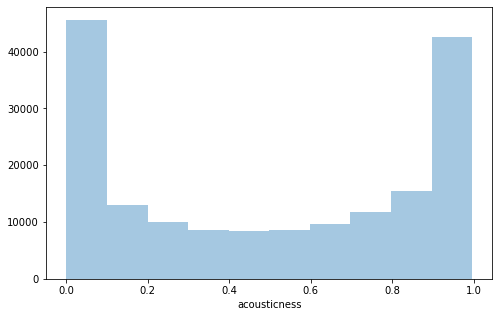

In [200]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.distplot(df_raw['acousticness'], kde=False, bins=10)
plt.show()

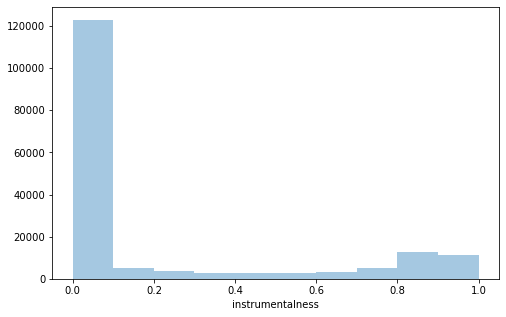

In [201]:
fig, ax = plt.subplots(figsize=(8, 5))
sns.distplot(df_raw['instrumentalness'], kde=False, bins=10)
plt.show()

Songs seem to be either acoustic or not, they are likely not a combination of both. We will then create categories (acoustic, mix, non-acoustic). Similarly, we'll do the same thing on the instrumentalness and loudness feature.

In [202]:
df_raw['instrumentalness'] = df_raw['instrumentalness'].map((lambda x: 1 if x < 0.1 else (3 if x > 0.8 else 2)))

In [203]:
df_raw['acousticness'] = df_raw['acousticness'].map((lambda x: 1 if x < 0.1 else (3 if x > 0.9 else 2)))

In [204]:
df_raw

acousticness  danceability  duration_ms  energy  explicit  \
0                  3         0.598       168333   0.224         0   
1                  2         0.852       150200   0.517         0   
2                  3         0.647       163827   0.186         0   
3                  1         0.730       422087   0.798         0   
4                  2         0.704       165224   0.707         1   
...              ...           ...          ...     ...       ...   
173287             1         0.792       147615   0.866         0   
173288             2         0.429       144720   0.211         0   
173289             2         0.671       218147   0.589         0   
173290             3         0.462       244000   0.240         1   
173291             2         0.677       197710   0.460         0   

                            id  instrumentalness  key  liveness  loudness  \
0       0cS0A1fUEUd1EW3FcF8AEI                 1    5    0.3790   -12.628   
1       0hbkKFIJm7Z05H8Zl9w30f                 1    5    0.0809    -7.261   
2       11m7laMUgmOKqI3oYzuhne                 1    0    0.5190   -12.098   
3       19Lc5SfJJ5O1oaxY0fpwfh                 3    2    0.1280    -7.311   
4       2hJjbsLCytGsnAHfdsLejp                 1   10    0.4020    -6.036   
...                        ...               ...  ...       ...       ...   
173287  46LhBf6TvYjZU2SMvGZAbn                 1    6    0.1780    -5.089   
173288  7tue2Wemjd0FZzRtDrQFZd                 1    4    0.1960   -11.665   
173289  48Qj61hOdYmUCFJbpQ29Ob                 3    4    0.1130   -12.393   
173290  1gcyHQpBQ1lfXGdhZmWrHP                 1    0    0.1130   -12.077   
173291  57tgYkWQTNHVFEt6xDKKZj                 3    7    0.2150   -12.237   

        ...    tempo valence  year #artists            main_artist   artist2  \
0       ...  149.976  0.6340  1920        1            Mamie Smith      None   
1       ...   86.889  0.9500  1920        1  Screamin' Jay Hawkins      None   
2       ...   97.600  0.6890  1920        1            Mamie Smith      None   
3       ...  127.997  0.0422  1920        1        Oscar Velazquez      None   
4       ...  122.076  0.2990  1920        1                   Mixe      None   
...     ...      ...     ...   ...      ...                    ...       ...   
173287  ...  125.972  0.1860  2020        3               DJ Combo  Sander-7   
173288  ...   94.710  0.2280  2021        1           Alessia Cara      None   
173289  ...  108.058  0.7140  2020        1              Roger Fly      None   
173290  ...  171.319  0.3200  2021        1           Taylor Swift      None   
173291  ...  112.208  0.7470  2020        1              Roger Fly      None   

        artist3  artist4  artist5 All_Artists_pop_sum  
0          None     None     None            3.111111  
1          None     None     None           19.437500  
2          None     None     None            3.111111  
3          None     None     None           11.000000  
4          None     None     None            2.000000  
...         ...      ...      ...                 ...  
173287   Tony T     None     None            0.353846  
173288     None     None     None           42.615385  
173289     None     None     None            0.062500  
173290     None     None     None           61.168889  
173291     None     None     None            0.062500  

[173292 rows x 25 columns]

## Evaluation of the date information within our Dataset

In [205]:
#df_raw['year'] = pd.DatetimeIndex(df_raw['release_date']).year

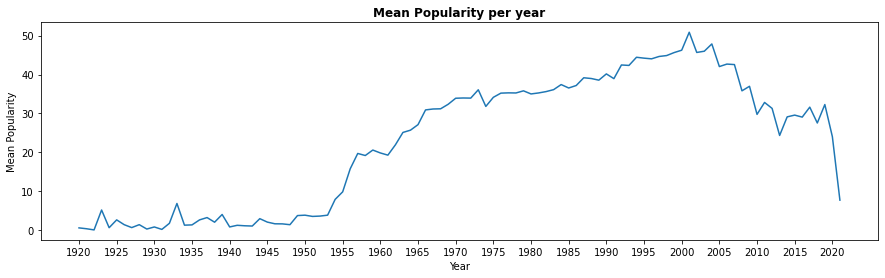

In [206]:
fig, ax = plt.subplots(figsize=(15, 4))
ax = df_raw.groupby('year')['popularity'].mean().plot()
ax.set_title('Mean Popularity per year', weight='bold')
ax.set_ylabel('Mean Popularity')
ax.set_xlabel('Year')
ax.set_xticks(range(1920, 2021, 5))
plt.show()

We will wipe out the 2021 song because there is not enough popularity data on this year and so to avoid any outlier influence we keep only the rest of the dataset. We do the same for the song before 1955 as their popularity data appears not relevant. ( Their low popularity could be explained by the lack of diffusion on these time )

In [207]:
df_raw = df_raw[df_raw['year'] < 2021]
df_raw = df_raw.reset_index(drop=True)

In [208]:
df_raw = df_raw[df_raw['year'] > 1955]
df_raw = df_raw.reset_index(drop=True)

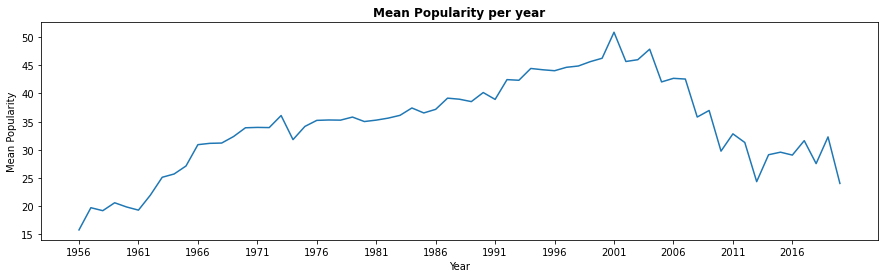

In [209]:
fig, ax = plt.subplots(figsize=(15, 4))
ax = df_raw.groupby('year')['popularity'].mean().plot()
ax.set_title('Mean Popularity per year', weight='bold')
ax.set_ylabel('Mean Popularity')
ax.set_xlabel('Year')
ax.set_xticks(range(1956, 2020, 5))
plt.show()

It could also be interesting to investigate on the seasonality of the popularity. Let's create a column with the month and see if song are more popular among a season 

In [210]:
df_raw['month'] = pd.DatetimeIndex(df_raw['release_date']).month

<AxesSubplot:xlabel='month', ylabel='popularity'>

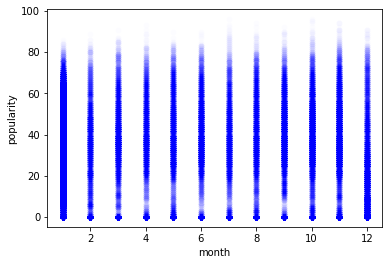

In [211]:
sns.scatterplot(x="month", y="popularity", data=df_raw, alpha=0.01, color='blue')

It seems that there is no correlation between the month and the popularity level

<a id="output_variable"></a>

## Converting MS duration into minute duration

In the current dataset all the music times are displayed within ms, which could badly influence our model so we choose to convert it into minutes

In [212]:
df_raw["duration_min"] = df_raw["duration_ms"]/(1000 * 60)
df_raw["duration_min"] = df_raw["duration_min"].astype(int)
df_raw = df_raw.drop(labels=['duration_ms'], axis=1)

<AxesSubplot:xlabel='duration_min', ylabel='popularity'>

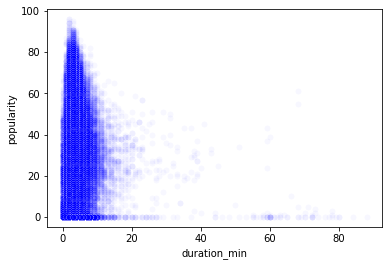

In [213]:
sns.scatterplot(x="duration_min", y="popularity", data=df_raw, alpha=0.03, color='blue')

The above graph show us that the popularity appears correlate with the duration. Indeed, the longer songs seems to be less popular ( >15min), also short songs seems to be less popular ( <2min30 ). So we will create three different classification to represent the duration differences


In [214]:
df_raw['duration_min'] = df_raw['duration_min'].map((lambda x: 1 if x < 2.30 else (3 if x > 15 else 2)))

## Language of the song

We suppose that the song language influence its popularity. Indeed, our dataset include song from all over the world and a Russian song will obviously be less popular than an English song that could be more oftenly become a worldwide hit. 
Therefor we will try to identify the language of everysong from the music name and see if it correlates with the popularity. If that the case, we will keep this data to improve the dataset 

In [215]:
!pip install langdetect
import langdetect
from langdetect import detect

In [216]:
for index, row in df_raw['name'].iteritems():
  try:
    lang = detect(str(row)) #detecting each row
    df_raw.loc[index, 'language'] = lang
    print(index)
  except:
    lang = 'na'
    df_raw.loc[index, 'language'] = lang
    print(lang)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078


3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729


5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5380
5381
5382
5383
5384
5385
5386
5387
5388


6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7018
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7033
7034
7035
7036
7037
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049


8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684
8685
8686
8687
8688
8689
8690
8691
8692
8693
8694
8695
8696
8697
8698


10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
10270
10271
10272
10273
10274
10275
10276
10277
10278
10279
10280
10281
10282
10283
1028

11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
na
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
11586
11587
11588
11589
11590
11591
11592
11593
11594
11595
11596
11597
11598
11599
11600
11601
11602
11603
11604
11605
11606
11607
11608
11609
11610
11611
11612
11613
11614
11615
11616
11617
11618
11619
11620
11621
11622
11623
11624
11625
11626
11627
11628
11629
11630
11631
11632
11633
11634
11635
11636
11637
11638
11639
11640
11641
11642
11643
11644
11645
11646
11647
11648
11649
11650
11651
11652
1

12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
12968
12969
12970
12971
12972
12973
12974
12975
12976
12977
12978
12979
12980
12981
12982
12983
12984
12985
12986
12987
12988
12989
12990
12991
12992
12993
12994
12995
12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
1303

14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
14341
14342
14343
14344
14345
14346
14347
14348
14349
14350
14351
14352
14353
14354
14355
14356
14357
14358
14359
14360
14361
14362
14363
14364
14365
14366
14367
14368
14369
14370
14371
14372
14373
14374
14375
14376
14377
14378
14379
14380
14381
14382
14383
14384
14385
14386
14387
14388
14389
14390
14391
14392
14393
14394
14395
14396
14397
14398
14399
14400
14401
14402
14403
1440

15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
15724
15725
15726
15727
15728
15729
15730
15731
15732
15733
15734
15735
15736
15737
15738
15739
15740
15741
15742
15743
15744
15745
15746
15747
15748
15749
15750
15751
15752
15753
15754
15755
15756
15757
15758
15759
15760
15761
15762
15763
15764
15765
15766
15767
15768
15769
15770
15771
15772
15773
15774
15775
15776
15777
15778
15779
15780
15781
15782
15783
15784
15785
15786
15787
15788
15789
15790
15791
15792
1579

17016
17017
17018
17019
17020
17021
17022
17023
17024
17025
17026
17027
17028
17029
17030
17031
17032
17033
17034
17035
17036
17037
17038
17039
17040
17041
17042
17043
17044
17045
17046
17047
17048
17049
17050
17051
17052
17053
17054
17055
17056
17057
17058
17059
17060
17061
17062
17063
17064
17065
17066
17067
17068
17069
17070
17071
17072
17073
17074
17075
17076
17077
17078
17079
17080
17081
17082
17083
17084
17085
17086
17087
17088
17089
17090
17091
17092
17093
17094
17095
17096
17097
17098
17099
17100
17101
17102
17103
17104
17105
17106
17107
17108
17109
17110
17111
17112
17113
17114
17115
17116
17117
17118
17119
17120
17121
17122
17123
17124
17125
17126
17127
17128
17129
17130
17131
17132
17133
17134
17135
17136
17137
17138
17139
17140
17141
17142
17143
17144
17145
17146
17147
17148
17149
17150
17151
17152
17153
17154
17155
17156
17157
17158
17159
17160
17161
17162
17163
17164
17165
17166
17167
17168
17169
17170
17171
17172
17173
17174
17175
17176
17177
17178
17179
17180
17181
1718

18387
18388
18389
18390
18391
18392
18393
18394
18395
18396
18397
18398
18399
18400
18401
18402
18403
18404
18405
18406
18407
18408
18409
18410
18411
18412
18413
18414
18415
18416
18417
18418
18419
18420
18421
18422
18423
18424
18425
18426
18427
18428
18429
18430
18431
18432
18433
18434
18435
18436
18437
18438
18439
18440
18441
18442
18443
18444
18445
18446
18447
18448
18449
18450
18451
18452
18453
18454
18455
18456
18457
18458
18459
18460
18461
18462
18463
18464
18465
18466
18467
18468
18469
18470
18471
18472
18473
18474
18475
18476
18477
18478
18479
18480
18481
18482
18483
18484
18485
18486
18487
18488
18489
18490
18491
18492
18493
18494
18495
18496
18497
18498
18499
18500
18501
18502
18503
18504
18505
18506
18507
18508
18509
18510
18511
18512
18513
18514
18515
18516
18517
18518
18519
18520
18521
18522
18523
18524
18525
18526
18527
18528
18529
18530
18531
18532
18533
18534
18535
18536
18537
18538
18539
18540
18541
18542
18543
18544
18545
18546
18547
18548
18549
18550
18551
18552
1855

19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
19798
19799
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19811
19812
19813
19814
19815
19816
19817
19818
19819
19820
19821
19822
19823
19824
19825
19826
19827
19828
19829
19830
19831
19832
19833
19834
19835
19836
19837
19838
19839
19840
19841
19842
19843
19844
19845
19846
19847
19848
19849
19850
19851
19852
19853
19854
19855
19856
19857
19858
19859
19860
19861
19862
19863
19864
19865
19866
19867
19868
19869
19870
19871
19872
19873
19874
19875
19876
19877
19878
19879
19880
19881
19882
19883
19884
19885
19886
19887
19888
19889
19890
19891
19892
19893
19894
19895
19896
19897
19898
19899
19900
19901
19902
19903
19904
19905
19906
19907
19908
19909
19910
19911
19912
19913
19914
19915
19916
19917
19918
19919
19920
19921
19922
19923
19924
19925
19926
19927
19928
19929
19930
19931
19932
19933
19934
19935
19936
19937
19938
19939
1994

21149
21150
21151
21152
21153
21154
21155
21156
21157
21158
21159
21160
21161
21162
21163
21164
21165
21166
21167
21168
21169
na
21171
21172
21173
21174
21175
21176
21177
21178
21179
21180
21181
21182
21183
21184
21185
21186
21187
21188
21189
21190
21191
21192
21193
21194
21195
21196
21197
21198
21199
21200
21201
21202
21203
21204
21205
21206
21207
21208
21209
21210
21211
21212
21213
21214
21215
21216
21217
21218
21219
21220
21221
21222
21223
21224
21225
21226
21227
21228
21229
21230
21231
21232
21233
21234
21235
21236
21237
21238
21239
21240
21241
21242
21243
21244
21245
21246
21247
21248
21249
21250
21251
21252
21253
21254
21255
21256
21257
21258
21259
21260
21261
21262
21263
21264
21265
21266
21267
21268
21269
21270
21271
21272
21273
21274
21275
21276
21277
21278
21279
21280
21281
21282
21283
21284
21285
21286
21287
21288
21289
21290
21291
21292
21293
21294
21295
21296
21297
21298
21299
21300
21301
21302
21303
21304
21305
21306
21307
21308
21309
21310
21311
21312
21313
21314
21315
2

22532
22533
22534
22535
22536
22537
22538
22539
22540
22541
22542
22543
22544
22545
22546
22547
22548
22549
22550
22551
22552
22553
22554
22555
22556
22557
22558
22559
22560
22561
22562
22563
22564
22565
22566
22567
22568
22569
22570
22571
22572
22573
22574
22575
22576
na
22578
22579
22580
na
22582
22583
22584
22585
22586
22587
22588
22589
22590
22591
22592
22593
22594
22595
na
22597
22598
22599
22600
22601
22602
22603
22604
22605
22606
22607
22608
22609
22610
22611
22612
22613
22614
22615
22616
22617
22618
22619
22620
22621
22622
22623
22624
22625
22626
22627
22628
22629
22630
22631
22632
22633
22634
22635
22636
22637
22638
22639
22640
22641
22642
22643
22644
22645
22646
22647
22648
22649
22650
22651
22652
22653
22654
22655
22656
22657
22658
22659
22660
22661
22662
22663
22664
22665
22666
22667
22668
22669
22670
22671
22672
22673
22674
22675
22676
22677
22678
22679
22680
22681
22682
22683
22684
22685
22686
22687
22688
22689
22690
22691
22692
22693
22694
22695
22696
22697
22698
22699
2

23922
23923
23924
23925
23926
23927
23928
23929
23930
23931
23932
23933
23934
23935
23936
23937
23938
23939
23940
23941
23942
23943
23944
23945
23946
23947
23948
23949
23950
23951
23952
23953
23954
23955
23956
23957
23958
23959
23960
23961
23962
23963
23964
23965
23966
23967
23968
23969
23970
23971
23972
23973
23974
23975
23976
23977
23978
23979
23980
23981
23982
23983
23984
23985
23986
23987
23988
23989
23990
23991
23992
23993
23994
23995
23996
23997
na
23999
24000
24001
24002
24003
24004
24005
24006
24007
24008
24009
24010
24011
24012
24013
24014
24015
24016
24017
24018
24019
24020
24021
24022
24023
24024
24025
24026
24027
24028
24029
24030
24031
24032
24033
24034
24035
24036
24037
24038
24039
24040
24041
24042
24043
24044
24045
24046
24047
24048
24049
24050
24051
24052
24053
24054
24055
24056
24057
24058
24059
24060
24061
24062
24063
24064
24065
24066
24067
24068
24069
24070
24071
24072
24073
24074
24075
24076
24077
24078
24079
24080
24081
24082
24083
24084
24085
24086
24087
24088
2

25303
25304
25305
25306
25307
25308
25309
25310
25311
25312
25313
25314
25315
25316
25317
25318
25319
25320
25321
25322
25323
25324
25325
25326
25327
25328
25329
25330
25331
25332
25333
25334
25335
25336
25337
25338
25339
25340
25341
25342
25343
25344
25345
25346
25347
25348
25349
25350
25351
25352
25353
25354
25355
25356
25357
25358
25359
25360
25361
25362
25363
25364
25365
25366
25367
25368
25369
25370
25371
25372
25373
25374
25375
25376
25377
25378
25379
25380
25381
25382
25383
25384
25385
25386
25387
25388
25389
25390
25391
25392
25393
25394
25395
25396
25397
25398
25399
25400
25401
25402
25403
25404
25405
25406
25407
25408
25409
25410
25411
25412
25413
25414
25415
25416
25417
25418
25419
25420
25421
25422
25423
25424
25425
25426
25427
25428
25429
25430
25431
25432
25433
25434
25435
25436
25437
25438
25439
25440
25441
25442
25443
25444
25445
25446
25447
25448
25449
25450
25451
25452
25453
25454
25455
25456
25457
25458
25459
25460
25461
25462
25463
25464
25465
25466
25467
25468
2546

26684
26685
26686
26687
26688
26689
26690
26691
26692
26693
26694
26695
26696
26697
26698
26699
26700
26701
26702
26703
26704
26705
26706
26707
26708
26709
26710
26711
26712
26713
26714
26715
26716
26717
26718
26719
26720
26721
26722
26723
26724
26725
26726
26727
26728
26729
26730
26731
26732
26733
26734
26735
26736
26737
26738
26739
26740
26741
26742
26743
26744
26745
26746
26747
26748
26749
26750
26751
26752
26753
26754
26755
26756
26757
26758
26759
26760
26761
26762
26763
26764
26765
26766
26767
26768
26769
26770
26771
26772
26773
26774
26775
26776
26777
26778
26779
26780
26781
26782
26783
26784
26785
26786
26787
26788
26789
26790
26791
26792
26793
26794
26795
26796
26797
26798
26799
26800
26801
26802
26803
26804
26805
26806
26807
26808
26809
26810
26811
26812
26813
26814
26815
26816
26817
26818
26819
26820
26821
26822
26823
26824
26825
26826
26827
26828
26829
26830
26831
26832
26833
26834
26835
26836
26837
26838
26839
26840
26841
26842
26843
26844
26845
26846
26847
26848
26849
2685

28070
28071
28072
28073
28074
28075
28076
28077
28078
28079
28080
28081
28082
28083
28084
28085
28086
28087
28088
28089
28090
28091
28092
28093
28094
28095
28096
28097
28098
28099
28100
28101
28102
28103
28104
28105
28106
28107
28108
28109
28110
28111
28112
28113
28114
28115
28116
28117
28118
28119
28120
28121
28122
28123
28124
28125
28126
28127
28128
28129
28130
28131
28132
28133
28134
28135
28136
28137
28138
28139
28140
28141
28142
28143
28144
28145
28146
28147
28148
28149
28150
28151
28152
28153
28154
28155
28156
28157
28158
28159
28160
28161
28162
28163
28164
28165
28166
28167
28168
28169
28170
28171
28172
28173
28174
28175
28176
28177
28178
28179
28180
28181
28182
28183
28184
28185
28186
28187
28188
28189
28190
28191
28192
28193
28194
28195
28196
28197
28198
28199
28200
28201
28202
28203
28204
28205
28206
28207
28208
28209
28210
28211
28212
28213
28214
28215
28216
28217
28218
28219
28220
28221
28222
28223
28224
28225
28226
28227
28228
28229
28230
28231
28232
28233
28234
28235
2823

29446
29447
29448
29449
29450
29451
29452
29453
29454
29455
29456
29457
29458
29459
29460
29461
29462
29463
29464
29465
29466
29467
29468
29469
29470
29471
29472
29473
29474
29475
29476
29477
29478
29479
29480
29481
29482
29483
29484
29485
29486
29487
29488
29489
29490
29491
29492
29493
29494
29495
29496
29497
29498
29499
29500
29501
29502
29503
29504
29505
29506
29507
29508
29509
29510
29511
29512
29513
29514
29515
29516
29517
29518
29519
29520
29521
29522
29523
29524
29525
29526
29527
29528
29529
29530
29531
29532
29533
29534
29535
29536
29537
29538
29539
29540
29541
29542
29543
29544
29545
29546
29547
29548
29549
29550
29551
29552
29553
29554
29555
29556
29557
29558
29559
29560
29561
29562
29563
29564
29565
29566
29567
29568
29569
29570
29571
29572
29573
29574
29575
29576
29577
29578
29579
29580
29581
29582
29583
29584
29585
29586
29587
29588
29589
29590
29591
29592
29593
29594
29595
29596
29597
29598
29599
29600
29601
29602
29603
29604
29605
29606
29607
29608
29609
29610
29611
2961

30816
30817
30818
30819
30820
30821
30822
30823
30824
30825
30826
30827
30828
30829
30830
30831
30832
30833
30834
30835
30836
30837
30838
30839
30840
30841
30842
30843
30844
30845
30846
30847
30848
30849
30850
30851
30852
30853
30854
30855
30856
30857
30858
30859
30860
30861
30862
30863
30864
30865
30866
30867
30868
30869
30870
30871
30872
30873
30874
30875
30876
30877
30878
30879
30880
30881
30882
30883
30884
30885
30886
30887
30888
30889
30890
30891
30892
30893
30894
30895
30896
30897
30898
30899
30900
30901
30902
30903
30904
30905
30906
30907
30908
30909
30910
30911
30912
30913
30914
30915
30916
30917
30918
30919
30920
30921
30922
30923
30924
30925
30926
30927
30928
30929
30930
30931
30932
30933
30934
30935
30936
30937
30938
30939
30940
30941
30942
30943
30944
30945
30946
30947
30948
30949
30950
30951
30952
30953
30954
30955
30956
30957
30958
30959
30960
30961
30962
30963
30964
30965
30966
30967
30968
30969
30970
30971
30972
30973
30974
30975
30976
30977
30978
30979
30980
30981
3098

32182
32183
32184
32185
32186
32187
32188
32189
32190
32191
32192
32193
32194
32195
32196
32197
32198
32199
32200
32201
32202
32203
32204
32205
32206
32207
32208
32209
32210
32211
32212
32213
32214
32215
32216
32217
32218
32219
32220
32221
32222
32223
32224
32225
32226
32227
32228
32229
32230
32231
32232
32233
32234
32235
32236
32237
32238
32239
32240
32241
32242
32243
32244
32245
32246
32247
32248
32249
32250
32251
32252
32253
32254
32255
32256
32257
32258
32259
32260
32261
32262
32263
32264
32265
32266
32267
32268
32269
32270
32271
32272
32273
32274
32275
32276
32277
32278
32279
32280
32281
32282
32283
32284
32285
32286
32287
32288
32289
32290
32291
32292
32293
32294
32295
32296
32297
32298
32299
32300
32301
32302
32303
32304
32305
32306
32307
32308
32309
32310
32311
32312
32313
32314
32315
32316
32317
32318
32319
32320
32321
32322
32323
32324
32325
32326
32327
32328
32329
32330
32331
32332
32333
32334
32335
32336
32337
32338
32339
32340
32341
32342
32343
32344
32345
32346
32347
3234

33552
33553
33554
33555
33556
33557
33558
33559
33560
33561
33562
33563
33564
33565
33566
33567
33568
33569
33570
33571
33572
33573
33574
33575
33576
33577
33578
33579
33580
33581
33582
33583
33584
33585
33586
33587
33588
33589
33590
33591
33592
33593
33594
33595
33596
33597
33598
33599
33600
33601
33602
33603
33604
33605
33606
33607
33608
33609
33610
33611
33612
33613
33614
33615
33616
33617
33618
33619
33620
33621
33622
33623
33624
33625
33626
33627
33628
33629
33630
33631
33632
33633
33634
33635
33636
33637
33638
33639
33640
33641
33642
33643
33644
33645
33646
33647
33648
33649
33650
33651
33652
33653
33654
33655
33656
33657
33658
33659
33660
33661
33662
33663
33664
33665
33666
33667
33668
33669
33670
33671
33672
33673
33674
33675
33676
33677
33678
33679
33680
33681
33682
33683
33684
33685
33686
33687
33688
33689
33690
33691
33692
33693
33694
33695
33696
33697
33698
33699
33700
33701
33702
33703
33704
33705
33706
33707
33708
33709
33710
33711
33712
33713
33714
33715
33716
33717
3371

34926
34927
34928
34929
34930
34931
34932
34933
34934
34935
34936
34937
34938
34939
34940
34941
34942
34943
34944
34945
34946
34947
34948
34949
34950
34951
34952
34953
34954
34955
34956
34957
34958
34959
34960
34961
34962
34963
34964
34965
34966
34967
34968
na
34970
34971
34972
34973
34974
34975
34976
34977
34978
34979
34980
34981
34982
34983
34984
34985
34986
34987
34988
34989
34990
34991
34992
34993
34994
34995
34996
34997
34998
34999
35000
35001
35002
35003
35004
35005
35006
35007
35008
35009
35010
35011
35012
35013
35014
35015
35016
35017
35018
35019
35020
35021
35022
35023
35024
35025
35026
35027
35028
35029
35030
35031
35032
35033
35034
35035
35036
35037
35038
35039
35040
35041
35042
35043
35044
35045
35046
35047
35048
35049
35050
35051
35052
35053
35054
35055
35056
35057
35058
35059
35060
35061
35062
35063
35064
35065
35066
35067
35068
35069
35070
35071
35072
35073
35074
35075
35076
35077
35078
35079
35080
35081
35082
35083
35084
35085
35086
35087
35088
35089
35090
35091
35092
3

36296
36297
36298
36299
36300
36301
36302
36303
36304
36305
36306
36307
36308
36309
36310
36311
36312
36313
36314
36315
36316
36317
36318
36319
36320
36321
36322
36323
36324
36325
36326
36327
36328
36329
36330
36331
36332
36333
36334
36335
36336
36337
36338
36339
36340
36341
36342
36343
36344
36345
36346
36347
36348
36349
36350
36351
36352
36353
36354
36355
36356
36357
36358
36359
36360
36361
36362
36363
36364
36365
36366
36367
36368
36369
36370
36371
36372
36373
36374
36375
36376
36377
36378
36379
36380
36381
36382
36383
36384
36385
36386
36387
36388
36389
36390
36391
36392
36393
36394
36395
36396
36397
36398
36399
36400
36401
36402
36403
36404
36405
36406
36407
36408
36409
36410
36411
36412
36413
36414
36415
36416
36417
36418
36419
36420
36421
36422
36423
36424
36425
36426
36427
36428
36429
36430
36431
36432
36433
36434
36435
36436
36437
36438
36439
36440
36441
36442
36443
36444
36445
36446
36447
36448
36449
36450
36451
36452
36453
36454
36455
36456
36457
36458
36459
36460
36461
3646

37672
37673
37674
37675
37676
37677
37678
37679
37680
37681
37682
37683
37684
37685
37686
37687
37688
37689
37690
37691
37692
37693
37694
37695
37696
37697
37698
37699
37700
37701
37702
37703
37704
37705
37706
37707
37708
37709
37710
37711
37712
37713
37714
37715
37716
37717
37718
37719
37720
37721
37722
37723
37724
37725
37726
37727
37728
37729
37730
37731
37732
37733
37734
37735
37736
37737
37738
37739
37740
37741
37742
37743
37744
37745
37746
37747
37748
37749
37750
37751
37752
37753
37754
37755
37756
37757
37758
37759
37760
37761
37762
37763
37764
37765
37766
37767
37768
37769
37770
37771
37772
37773
37774
37775
37776
37777
37778
37779
37780
37781
37782
37783
37784
37785
37786
37787
37788
37789
37790
37791
37792
37793
37794
37795
37796
37797
37798
37799
37800
37801
37802
37803
37804
37805
37806
37807
na
37809
37810
37811
37812
37813
37814
37815
37816
37817
37818
37819
37820
37821
37822
37823
37824
37825
37826
37827
37828
37829
37830
37831
37832
37833
37834
37835
37836
37837
37838
3

39064
39065
39066
39067
39068
39069
39070
39071
39072
39073
39074
39075
39076
39077
39078
39079
39080
39081
39082
39083
39084
39085
39086
39087
39088
39089
39090
39091
39092
39093
39094
39095
39096
39097
39098
39099
39100
39101
39102
39103
39104
39105
39106
39107
39108
39109
39110
39111
39112
39113
39114
39115
39116
39117
39118
39119
39120
39121
39122
39123
39124
39125
39126
39127
39128
39129
39130
39131
39132
39133
39134
39135
39136
39137
39138
39139
39140
39141
39142
39143
39144
39145
39146
39147
39148
39149
39150
39151
39152
39153
39154
39155
39156
39157
39158
39159
39160
39161
39162
39163
39164
39165
39166
39167
39168
39169
39170
39171
39172
39173
39174
39175
39176
39177
39178
39179
39180
39181
39182
39183
39184
39185
39186
39187
39188
39189
39190
39191
39192
39193
39194
39195
39196
39197
39198
39199
39200
39201
39202
39203
39204
39205
39206
39207
39208
39209
39210
39211
39212
39213
39214
39215
39216
39217
39218
39219
39220
39221
39222
39223
39224
39225
39226
39227
39228
39229
3923

40441
40442
40443
40444
40445
40446
40447
40448
40449
40450
40451
40452
40453
40454
40455
40456
40457
40458
40459
40460
40461
40462
40463
40464
40465
40466
40467
40468
40469
40470
40471
40472
40473
40474
40475
40476
40477
40478
40479
40480
40481
40482
40483
40484
40485
40486
40487
40488
40489
40490
40491
40492
40493
40494
40495
40496
40497
40498
40499
40500
40501
40502
40503
40504
40505
40506
40507
40508
40509
40510
40511
40512
40513
40514
40515
40516
40517
40518
40519
40520
40521
40522
40523
40524
40525
40526
40527
40528
40529
40530
40531
40532
40533
40534
40535
40536
40537
40538
40539
40540
40541
40542
40543
40544
40545
40546
40547
40548
40549
40550
40551
40552
40553
40554
40555
40556
40557
40558
40559
40560
40561
40562
40563
40564
40565
40566
40567
40568
40569
40570
40571
40572
40573
40574
40575
40576
40577
40578
40579
40580
40581
40582
40583
40584
40585
40586
40587
40588
40589
40590
40591
40592
40593
40594
40595
40596
40597
40598
40599
40600
40601
40602
40603
40604
40605
40606
4060

41811
41812
41813
41814
41815
41816
41817
41818
41819
41820
41821
41822
41823
41824
41825
41826
41827
41828
41829
41830
41831
41832
41833
41834
41835
41836
41837
41838
41839
41840
41841
41842
41843
41844
41845
41846
41847
41848
41849
41850
41851
41852
41853
41854
41855
41856
41857
41858
41859
41860
41861
41862
41863
41864
41865
41866
41867
41868
41869
41870
41871
41872
41873
41874
41875
41876
41877
41878
41879
41880
41881
41882
41883
41884
41885
41886
41887
41888
41889
41890
41891
41892
41893
41894
41895
41896
41897
41898
41899
41900
41901
41902
41903
41904
41905
41906
41907
41908
41909
41910
41911
41912
41913
41914
41915
41916
41917
41918
41919
41920
41921
41922
41923
41924
41925
41926
41927
41928
41929
41930
41931
41932
41933
41934
41935
41936
41937
41938
41939
41940
41941
41942
41943
41944
41945
41946
41947
41948
41949
41950
41951
41952
41953
41954
41955
41956
41957
41958
41959
41960
41961
41962
41963
41964
41965
41966
41967
41968
41969
41970
41971
41972
41973
41974
41975
41976
4197

43183
43184
43185
43186
43187
43188
43189
43190
43191
43192
43193
43194
43195
43196
43197
43198
43199
43200
43201
43202
43203
43204
43205
43206
43207
43208
43209
43210
43211
43212
43213
43214
43215
43216
43217
43218
43219
43220
43221
43222
43223
43224
43225
43226
43227
43228
43229
43230
43231
43232
43233
43234
43235
43236
43237
43238
43239
43240
43241
43242
43243
43244
43245
43246
43247
43248
43249
43250
43251
43252
43253
43254
43255
43256
43257
43258
43259
43260
43261
43262
43263
43264
43265
43266
43267
43268
43269
43270
43271
43272
43273
43274
43275
43276
43277
43278
43279
43280
43281
43282
43283
43284
43285
43286
43287
43288
43289
43290
43291
43292
43293
43294
43295
43296
43297
43298
43299
43300
43301
43302
43303
43304
43305
43306
43307
43308
43309
43310
43311
43312
43313
43314
43315
43316
43317
43318
43319
43320
43321
43322
43323
43324
43325
43326
43327
43328
43329
43330
43331
43332
43333
43334
43335
43336
43337
43338
43339
43340
43341
43342
43343
43344
43345
43346
43347
43348
4334

44553
44554
44555
44556
44557
44558
44559
44560
44561
44562
44563
44564
44565
44566
44567
44568
44569
44570
44571
44572
44573
44574
44575
44576
44577
44578
44579
44580
44581
44582
44583
44584
44585
44586
44587
44588
44589
44590
44591
44592
44593
44594
44595
44596
44597
44598
44599
44600
44601
44602
44603
44604
44605
44606
44607
44608
44609
44610
44611
44612
44613
44614
44615
44616
44617
44618
44619
44620
44621
44622
44623
44624
44625
44626
44627
44628
44629
44630
44631
44632
44633
44634
44635
44636
44637
44638
44639
44640
44641
44642
44643
44644
44645
44646
44647
44648
44649
44650
44651
44652
44653
44654
44655
44656
44657
44658
44659
44660
44661
44662
44663
44664
44665
44666
44667
44668
44669
44670
44671
44672
44673
44674
44675
44676
44677
44678
44679
44680
44681
44682
44683
44684
44685
44686
44687
44688
44689
44690
44691
44692
44693
44694
44695
44696
44697
44698
44699
44700
44701
44702
44703
44704
44705
44706
44707
44708
44709
44710
44711
44712
44713
44714
44715
44716
44717
44718
4471

45932
45933
45934
45935
45936
45937
45938
45939
45940
45941
45942
45943
45944
45945
45946
45947
45948
45949
45950
45951
45952
45953
45954
45955
45956
45957
45958
45959
45960
45961
45962
45963
45964
45965
45966
45967
45968
45969
45970
45971
45972
45973
45974
45975
45976
45977
45978
45979
45980
45981
45982
45983
45984
45985
45986
45987
45988
45989
45990
45991
45992
45993
45994
45995
45996
45997
45998
45999
46000
46001
46002
46003
46004
46005
46006
46007
46008
46009
46010
na
46012
46013
46014
46015
46016
46017
46018
46019
46020
46021
46022
46023
46024
46025
46026
46027
46028
46029
46030
46031
46032
46033
46034
46035
46036
46037
46038
46039
46040
46041
46042
46043
46044
46045
46046
46047
46048
46049
46050
46051
46052
46053
46054
46055
46056
46057
46058
46059
46060
46061
46062
46063
46064
46065
46066
46067
46068
46069
46070
46071
46072
46073
46074
46075
46076
46077
46078
46079
46080
46081
46082
46083
46084
46085
46086
46087
46088
46089
46090
46091
46092
46093
46094
46095
46096
46097
46098
4

47305
47306
47307
47308
47309
47310
47311
47312
47313
47314
47315
47316
47317
47318
47319
47320
47321
47322
47323
47324
47325
47326
47327
47328
47329
47330
47331
47332
47333
47334
47335
47336
47337
47338
47339
47340
47341
47342
47343
47344
47345
47346
47347
47348
47349
47350
47351
47352
47353
47354
47355
47356
47357
47358
47359
47360
47361
47362
47363
47364
47365
47366
47367
47368
47369
47370
47371
47372
47373
47374
47375
47376
47377
47378
47379
47380
47381
47382
47383
47384
47385
47386
47387
47388
47389
47390
47391
47392
47393
47394
47395
47396
47397
47398
47399
47400
47401
47402
47403
47404
47405
47406
47407
47408
47409
47410
47411
47412
47413
47414
47415
47416
47417
47418
47419
47420
47421
47422
47423
47424
47425
47426
47427
47428
47429
47430
47431
47432
47433
47434
47435
47436
47437
47438
47439
47440
47441
47442
47443
47444
47445
47446
47447
47448
47449
47450
47451
47452
47453
47454
47455
47456
47457
47458
47459
47460
47461
47462
47463
47464
47465
47466
47467
47468
47469
47470
4747

48684
48685
48686
48687
48688
48689
48690
48691
48692
48693
48694
48695
48696
48697
48698
48699
48700
48701
48702
48703
48704
48705
48706
48707
48708
48709
48710
48711
48712
48713
48714
48715
48716
48717
48718
48719
48720
48721
48722
48723
48724
48725
48726
48727
48728
48729
48730
48731
48732
48733
48734
48735
48736
48737
48738
48739
48740
48741
48742
48743
48744
48745
48746
48747
48748
48749
48750
48751
48752
48753
48754
48755
48756
48757
48758
48759
48760
48761
48762
48763
48764
48765
48766
48767
48768
48769
48770
48771
48772
48773
48774
48775
48776
48777
48778
48779
48780
48781
48782
48783
48784
48785
48786
48787
48788
48789
48790
48791
48792
48793
48794
48795
48796
48797
48798
48799
48800
48801
48802
48803
48804
48805
48806
48807
48808
48809
48810
48811
48812
48813
48814
48815
48816
48817
48818
48819
48820
48821
48822
48823
48824
48825
48826
48827
48828
48829
48830
48831
48832
48833
48834
48835
48836
48837
48838
48839
48840
48841
48842
48843
48844
48845
48846
48847
48848
48849
4885

50077
50078
50079
50080
50081
50082
50083
50084
50085
50086
50087
50088
50089
50090
50091
50092
50093
50094
50095
50096
50097
50098
50099
50100
50101
50102
50103
50104
50105
50106
50107
50108
50109
50110
50111
50112
50113
50114
50115
50116
50117
50118
50119
50120
50121
50122
50123
50124
50125
50126
50127
50128
50129
50130
50131
50132
50133
50134
50135
50136
50137
50138
50139
50140
50141
50142
50143
50144
50145
50146
50147
50148
50149
50150
50151
50152
50153
50154
50155
50156
50157
50158
50159
50160
50161
50162
50163
50164
50165
50166
50167
50168
50169
50170
50171
50172
50173
50174
50175
50176
50177
50178
50179
50180
50181
50182
50183
50184
50185
50186
50187
50188
50189
50190
50191
50192
50193
50194
50195
50196
50197
50198
50199
50200
50201
50202
50203
50204
50205
50206
50207
50208
50209
50210
50211
50212
50213
50214
50215
50216
50217
50218
50219
50220
50221
50222
50223
50224
50225
50226
50227
50228
50229
50230
50231
50232
50233
50234
50235
50236
50237
50238
50239
50240
50241
50242
5024

51451
51452
51453
51454
51455
51456
51457
51458
51459
51460
51461
51462
51463
51464
51465
51466
51467
51468
51469
51470
51471
51472
51473
51474
51475
51476
51477
51478
51479
51480
51481
51482
51483
51484
51485
51486
51487
51488
51489
51490
51491
51492
51493
51494
51495
51496
51497
51498
51499
51500
51501
51502
51503
51504
51505
51506
51507
51508
51509
51510
51511
51512
51513
51514
51515
51516
51517
51518
51519
51520
51521
51522
51523
51524
51525
51526
51527
51528
51529
51530
51531
51532
51533
51534
51535
51536
51537
51538
51539
51540
51541
51542
51543
51544
51545
51546
51547
51548
51549
51550
51551
51552
51553
51554
51555
51556
51557
51558
51559
51560
51561
51562
51563
51564
51565
51566
51567
51568
51569
51570
51571
51572
51573
51574
51575
51576
51577
51578
51579
51580
51581
51582
51583
51584
51585
51586
51587
51588
51589
51590
51591
51592
51593
51594
51595
51596
51597
51598
51599
51600
51601
51602
51603
51604
51605
51606
51607
51608
51609
51610
51611
51612
51613
51614
51615
51616
5161

52833
52834
52835
52836
52837
52838
52839
52840
52841
52842
52843
52844
52845
52846
52847
52848
52849
52850
52851
52852
52853
52854
52855
52856
52857
52858
52859
52860
52861
52862
52863
52864
52865
52866
52867
52868
52869
52870
52871
52872
52873
52874
52875
52876
52877
52878
52879
52880
52881
52882
52883
52884
52885
52886
52887
52888
52889
52890
52891
52892
52893
52894
52895
52896
52897
52898
52899
52900
52901
52902
52903
52904
52905
52906
52907
52908
52909
52910
52911
52912
52913
52914
52915
52916
52917
52918
52919
52920
52921
52922
52923
52924
52925
52926
52927
52928
52929
52930
52931
52932
52933
52934
52935
52936
52937
52938
52939
52940
52941
52942
52943
52944
52945
52946
52947
52948
52949
52950
52951
52952
52953
52954
52955
52956
52957
52958
52959
52960
52961
52962
52963
52964
52965
52966
52967
52968
52969
52970
52971
52972
52973
52974
52975
52976
52977
52978
52979
52980
52981
52982
52983
52984
52985
52986
52987
52988
52989
52990
52991
52992
52993
52994
52995
52996
52997
52998
5299

54206
54207
54208
54209
54210
54211
54212
54213
54214
54215
54216
54217
54218
54219
54220
54221
54222
54223
54224
54225
54226
54227
54228
54229
54230
54231
54232
54233
54234
54235
54236
54237
54238
54239
54240
54241
54242
54243
54244
54245
54246
54247
54248
54249
54250
54251
54252
54253
54254
54255
54256
54257
54258
54259
54260
54261
54262
54263
54264
54265
54266
54267
54268
54269
54270
54271
54272
54273
54274
54275
54276
54277
54278
54279
54280
54281
54282
54283
54284
54285
54286
54287
54288
54289
54290
54291
54292
54293
54294
54295
54296
54297
54298
54299
54300
54301
54302
54303
54304
54305
54306
54307
54308
54309
54310
54311
54312
54313
54314
54315
54316
54317
54318
54319
54320
54321
54322
54323
54324
54325
54326
54327
54328
54329
54330
54331
54332
54333
54334
54335
54336
54337
54338
54339
54340
54341
54342
54343
54344
54345
54346
54347
54348
54349
54350
54351
54352
54353
54354
54355
54356
54357
54358
54359
54360
54361
54362
54363
54364
54365
54366
54367
54368
54369
54370
54371
5437

55589
55590
55591
55592
55593
55594
55595
55596
55597
55598
55599
55600
55601
55602
55603
55604
55605
55606
55607
55608
55609
55610
55611
55612
55613
55614
55615
55616
55617
55618
55619
55620
55621
55622
55623
55624
55625
55626
55627
55628
55629
55630
55631
55632
55633
55634
55635
55636
55637
55638
55639
55640
55641
55642
55643
55644
55645
55646
55647
55648
55649
55650
55651
55652
55653
55654
55655
55656
55657
55658
55659
55660
55661
55662
55663
55664
55665
55666
55667
55668
55669
55670
55671
55672
55673
55674
55675
55676
55677
55678
55679
55680
55681
55682
55683
55684
55685
55686
55687
55688
55689
55690
55691
55692
55693
55694
55695
55696
55697
55698
55699
55700
55701
55702
55703
55704
55705
55706
55707
55708
55709
55710
55711
55712
55713
55714
55715
55716
55717
55718
55719
55720
55721
55722
55723
55724
55725
55726
55727
55728
55729
55730
55731
55732
55733
55734
55735
55736
55737
55738
55739
55740
55741
55742
55743
55744
55745
55746
55747
55748
55749
55750
55751
55752
55753
55754
5575

56961
56962
56963
56964
56965
56966
56967
56968
56969
56970
56971
56972
56973
56974
56975
56976
56977
56978
56979
56980
56981
56982
56983
56984
56985
56986
56987
56988
56989
56990
56991
56992
56993
56994
56995
56996
56997
56998
56999
57000
57001
57002
57003
57004
57005
57006
57007
57008
57009
57010
57011
57012
57013
57014
57015
57016
57017
57018
57019
57020
57021
57022
57023
57024
57025
57026
57027
57028
57029
57030
57031
57032
57033
57034
57035
57036
57037
57038
57039
57040
57041
57042
57043
57044
57045
57046
57047
57048
57049
57050
57051
57052
57053
57054
57055
57056
57057
57058
57059
57060
57061
57062
57063
57064
57065
57066
57067
57068
57069
57070
57071
57072
57073
57074
57075
57076
57077
57078
57079
57080
57081
57082
57083
57084
57085
57086
57087
57088
57089
57090
57091
57092
57093
57094
57095
57096
57097
57098
57099
57100
57101
57102
57103
57104
57105
57106
57107
57108
57109
57110
57111
57112
57113
57114
57115
57116
57117
57118
57119
57120
57121
57122
57123
57124
57125
57126
5712

58352
58353
58354
58355
58356
58357
58358
58359
58360
58361
58362
58363
58364
58365
58366
58367
58368
58369
58370
58371
58372
58373
58374
58375
58376
58377
58378
58379
58380
58381
58382
58383
58384
58385
58386
58387
58388
58389
58390
58391
58392
58393
58394
58395
58396
58397
58398
58399
58400
58401
58402
58403
58404
58405
58406
58407
58408
58409
58410
58411
58412
58413
58414
58415
58416
58417
58418
58419
58420
58421
58422
58423
58424
58425
58426
58427
58428
58429
58430
58431
58432
58433
58434
58435
58436
58437
58438
58439
58440
58441
58442
58443
58444
58445
58446
58447
58448
58449
58450
58451
58452
58453
58454
58455
58456
58457
58458
58459
58460
58461
58462
58463
58464
58465
58466
58467
58468
58469
58470
58471
58472
58473
58474
58475
58476
58477
58478
58479
58480
58481
58482
58483
58484
58485
58486
58487
58488
58489
58490
58491
58492
58493
58494
58495
58496
58497
58498
58499
58500
58501
58502
58503
58504
58505
58506
58507
58508
58509
58510
58511
58512
58513
58514
58515
58516
58517
5851

59737
59738
59739
59740
59741
59742
59743
59744
59745
59746
59747
59748
59749
59750
59751
59752
59753
59754
59755
59756
59757
59758
59759
59760
59761
59762
59763
59764
59765
59766
59767
59768
59769
59770
59771
59772
59773
59774
59775
59776
59777
59778
59779
59780
59781
59782
59783
59784
59785
59786
59787
59788
59789
59790
59791
59792
59793
59794
59795
59796
59797
59798
59799
59800
59801
59802
59803
59804
59805
59806
59807
59808
59809
59810
59811
59812
59813
59814
59815
59816
59817
59818
59819
59820
59821
59822
59823
59824
59825
59826
59827
59828
59829
59830
59831
59832
59833
59834
59835
59836
59837
59838
59839
59840
59841
59842
59843
59844
59845
59846
59847
59848
59849
59850
59851
59852
59853
59854
59855
59856
59857
59858
59859
59860
59861
59862
59863
59864
59865
59866
59867
59868
59869
59870
59871
59872
59873
59874
59875
59876
59877
59878
59879
59880
59881
59882
59883
59884
59885
59886
59887
59888
59889
59890
59891
59892
59893
59894
59895
59896
59897
59898
59899
59900
59901
59902
5990

61104
61105
61106
61107
61108
61109
61110
61111
61112
61113
61114
61115
61116
61117
61118
61119
61120
61121
61122
61123
61124
61125
61126
61127
61128
61129
61130
61131
61132
61133
61134
61135
61136
61137
61138
61139
61140
61141
61142
61143
61144
61145
61146
61147
61148
61149
61150
61151
61152
61153
61154
61155
61156
61157
61158
61159
61160
61161
61162
61163
61164
61165
61166
61167
61168
61169
61170
61171
61172
61173
61174
61175
61176
61177
61178
61179
61180
61181
61182
61183
61184
61185
61186
61187
61188
na
61190
61191
61192
61193
61194
61195
61196
61197
61198
61199
61200
61201
61202
61203
61204
61205
61206
61207
61208
61209
61210
61211
61212
61213
61214
61215
61216
61217
61218
61219
61220
61221
61222
61223
61224
61225
61226
61227
61228
61229
61230
61231
61232
61233
61234
61235
61236
61237
61238
61239
61240
61241
61242
61243
61244
61245
61246
61247
61248
61249
61250
61251
61252
61253
61254
61255
61256
61257
61258
61259
61260
61261
61262
61263
61264
61265
61266
61267
61268
61269
61270
6

62480
62481
62482
62483
62484
62485
62486
62487
62488
62489
62490
62491
62492
62493
62494
62495
62496
62497
62498
62499
62500
62501
62502
62503
62504
62505
62506
62507
62508
62509
62510
62511
62512
62513
62514
62515
62516
62517
62518
62519
62520
62521
62522
62523
62524
62525
62526
62527
62528
62529
62530
62531
62532
62533
62534
62535
62536
62537
62538
62539
62540
62541
62542
62543
62544
62545
62546
62547
62548
62549
62550
62551
62552
62553
62554
62555
62556
62557
62558
62559
62560
62561
62562
62563
62564
62565
62566
62567
62568
62569
62570
62571
62572
62573
62574
62575
62576
62577
62578
62579
62580
62581
62582
62583
62584
62585
62586
62587
62588
62589
62590
62591
62592
62593
62594
62595
62596
62597
62598
62599
62600
62601
62602
62603
62604
62605
62606
62607
62608
62609
62610
62611
62612
62613
62614
62615
62616
62617
62618
62619
62620
62621
62622
62623
62624
62625
62626
62627
62628
62629
62630
62631
62632
62633
62634
62635
62636
62637
62638
62639
62640
62641
62642
62643
62644
62645
6264

63860
63861
63862
63863
63864
63865
63866
63867
63868
63869
63870
63871
63872
63873
63874
63875
63876
63877
63878
63879
63880
63881
63882
63883
63884
63885
63886
63887
63888
63889
63890
63891
63892
63893
63894
63895
63896
63897
63898
63899
63900
63901
na
63903
63904
63905
63906
63907
63908
63909
63910
63911
63912
63913
63914
63915
63916
63917
63918
63919
63920
63921
63922
63923
63924
63925
63926
63927
63928
63929
63930
63931
63932
63933
63934
63935
63936
63937
63938
63939
63940
63941
63942
63943
63944
63945
63946
63947
63948
63949
63950
63951
63952
63953
63954
63955
63956
63957
63958
63959
63960
63961
63962
63963
63964
63965
63966
63967
63968
63969
63970
63971
63972
63973
63974
63975
63976
63977
63978
63979
63980
63981
63982
63983
63984
63985
63986
63987
63988
63989
63990
63991
63992
63993
63994
63995
63996
63997
63998
63999
64000
64001
64002
64003
64004
64005
64006
64007
64008
64009
64010
64011
64012
64013
64014
64015
64016
64017
64018
64019
64020
64021
64022
64023
64024
64025
64026
6

65246
65247
65248
65249
65250
65251
65252
65253
65254
65255
65256
65257
65258
65259
65260
65261
65262
65263
65264
65265
65266
65267
65268
65269
65270
65271
65272
65273
65274
65275
65276
65277
65278
65279
65280
65281
65282
65283
65284
65285
65286
65287
65288
65289
65290
65291
65292
65293
65294
65295
65296
65297
65298
65299
65300
65301
65302
65303
65304
65305
65306
65307
65308
65309
65310
65311
65312
65313
65314
65315
65316
65317
65318
65319
65320
65321
65322
65323
65324
65325
65326
65327
65328
65329
65330
65331
65332
65333
65334
65335
65336
65337
65338
65339
65340
65341
65342
65343
65344
65345
65346
65347
65348
65349
65350
65351
65352
65353
65354
65355
65356
65357
65358
65359
65360
65361
65362
65363
65364
65365
65366
65367
65368
65369
65370
65371
65372
65373
65374
65375
65376
65377
65378
65379
65380
65381
65382
65383
65384
65385
65386
65387
65388
65389
65390
65391
65392
65393
65394
65395
65396
65397
65398
65399
65400
65401
65402
65403
65404
65405
65406
65407
65408
65409
65410
65411
6541

66620
66621
66622
66623
66624
66625
66626
66627
66628
66629
66630
66631
66632
66633
66634
66635
66636
66637
66638
66639
66640
66641
66642
66643
66644
66645
66646
66647
66648
66649
66650
66651
66652
66653
66654
66655
66656
66657
66658
66659
66660
66661
66662
66663
66664
66665
66666
66667
66668
66669
66670
66671
66672
66673
66674
66675
66676
66677
66678
66679
66680
66681
66682
66683
66684
66685
66686
66687
66688
66689
66690
66691
66692
66693
66694
66695
66696
66697
66698
66699
66700
66701
66702
66703
66704
66705
66706
66707
66708
66709
66710
66711
66712
66713
66714
66715
66716
66717
66718
66719
66720
66721
66722
66723
66724
66725
66726
66727
66728
66729
66730
66731
66732
66733
66734
66735
66736
66737
66738
66739
66740
66741
66742
66743
66744
66745
66746
66747
66748
66749
66750
66751
66752
66753
66754
66755
66756
66757
66758
66759
66760
66761
66762
66763
66764
66765
66766
66767
66768
66769
66770
66771
66772
66773
66774
66775
66776
66777
66778
66779
66780
66781
66782
66783
66784
66785
6678

67989
67990
67991
67992
67993
67994
67995
67996
67997
67998
67999
68000
68001
68002
68003
68004
68005
68006
68007
68008
68009
68010
68011
68012
68013
68014
68015
68016
68017
68018
68019
68020
68021
68022
68023
68024
68025
68026
68027
68028
68029
68030
68031
68032
68033
68034
68035
68036
68037
68038
68039
68040
68041
68042
68043
68044
68045
68046
68047
68048
68049
68050
68051
68052
68053
68054
68055
68056
68057
68058
68059
68060
68061
68062
68063
68064
68065
68066
68067
68068
68069
68070
68071
68072
68073
68074
68075
68076
68077
68078
68079
68080
68081
68082
68083
68084
68085
68086
68087
68088
68089
68090
68091
68092
68093
68094
68095
68096
68097
68098
68099
68100
68101
68102
68103
68104
68105
68106
68107
68108
68109
68110
68111
68112
68113
68114
68115
68116
68117
68118
68119
68120
68121
68122
68123
68124
68125
68126
68127
68128
68129
68130
68131
68132
68133
68134
68135
68136
68137
68138
68139
68140
68141
68142
68143
68144
68145
68146
68147
68148
68149
68150
68151
68152
68153
68154
6815

69373
69374
69375
69376
69377
69378
69379
69380
69381
69382
69383
69384
69385
69386
69387
69388
69389
69390
69391
69392
69393
69394
69395
69396
69397
69398
69399
69400
69401
69402
69403
69404
69405
69406
69407
69408
69409
69410
69411
69412
69413
69414
69415
69416
69417
69418
69419
69420
69421
69422
69423
69424
69425
69426
69427
69428
69429
69430
69431
69432
69433
69434
69435
69436
69437
69438
69439
69440
69441
69442
69443
69444
69445
69446
69447
69448
69449
69450
69451
69452
69453
69454
69455
69456
69457
69458
69459
69460
69461
69462
69463
69464
69465
69466
69467
69468
69469
69470
69471
69472
69473
69474
69475
69476
69477
69478
69479
69480
69481
69482
69483
69484
69485
69486
69487
69488
69489
69490
69491
69492
69493
69494
69495
69496
69497
69498
69499
69500
69501
69502
69503
69504
69505
69506
69507
69508
69509
69510
69511
69512
69513
69514
69515
69516
69517
69518
69519
69520
69521
69522
69523
69524
69525
69526
69527
69528
69529
69530
69531
69532
69533
69534
69535
69536
69537
69538
6953

70751
70752
70753
70754
70755
70756
70757
70758
70759
70760
70761
70762
70763
70764
70765
70766
70767
70768
70769
70770
70771
70772
70773
70774
70775
70776
70777
70778
70779
70780
70781
70782
70783
70784
70785
70786
70787
70788
70789
70790
70791
70792
70793
70794
70795
70796
70797
70798
70799
70800
70801
70802
70803
70804
70805
70806
70807
70808
70809
70810
70811
70812
70813
70814
70815
70816
70817
70818
70819
70820
70821
70822
70823
70824
70825
70826
70827
70828
70829
70830
70831
70832
70833
70834
70835
70836
70837
70838
70839
70840
70841
70842
70843
70844
70845
70846
70847
70848
70849
70850
70851
70852
70853
70854
70855
70856
70857
70858
70859
70860
70861
70862
70863
70864
70865
70866
70867
70868
70869
70870
70871
70872
70873
70874
70875
70876
70877
70878
70879
70880
70881
70882
70883
70884
70885
70886
70887
70888
70889
70890
70891
70892
70893
70894
70895
70896
70897
70898
70899
70900
70901
70902
70903
70904
70905
70906
70907
70908
70909
70910
70911
70912
70913
70914
70915
70916
7091

72132
72133
72134
72135
72136
72137
72138
72139
72140
72141
72142
72143
72144
72145
72146
72147
72148
72149
72150
72151
72152
72153
72154
72155
72156
72157
72158
72159
72160
72161
72162
72163
72164
72165
72166
72167
72168
72169
72170
72171
72172
72173
72174
72175
72176
72177
72178
72179
72180
72181
72182
72183
72184
72185
72186
72187
72188
72189
72190
72191
72192
72193
72194
72195
72196
72197
72198
72199
72200
72201
72202
72203
72204
72205
72206
72207
72208
72209
72210
72211
72212
72213
72214
72215
72216
72217
72218
72219
72220
72221
72222
72223
72224
72225
72226
72227
72228
72229
72230
72231
72232
72233
72234
72235
72236
72237
72238
72239
72240
72241
72242
72243
72244
72245
72246
72247
72248
72249
72250
72251
72252
72253
72254
72255
72256
72257
72258
72259
72260
72261
72262
72263
72264
72265
72266
72267
72268
72269
72270
72271
72272
72273
72274
72275
72276
72277
72278
72279
72280
72281
72282
72283
72284
72285
72286
72287
72288
72289
72290
72291
72292
72293
72294
72295
72296
72297
7229

73528
73529
73530
73531
73532
73533
73534
73535
73536
73537
73538
73539
73540
73541
73542
73543
73544
73545
73546
73547
73548
73549
73550
73551
73552
73553
73554
73555
73556
73557
73558
73559
73560
73561
73562
73563
73564
73565
73566
73567
73568
73569
73570
73571
73572
73573
73574
73575
73576
73577
73578
73579
73580
73581
73582
73583
73584
73585
73586
73587
73588
73589
73590
73591
73592
73593
73594
73595
73596
73597
73598
73599
73600
73601
73602
73603
73604
73605
73606
73607
73608
73609
73610
73611
73612
73613
73614
73615
73616
73617
73618
73619
73620
73621
73622
73623
73624
73625
73626
73627
73628
73629
73630
73631
73632
73633
73634
73635
73636
73637
73638
73639
73640
73641
73642
73643
73644
73645
73646
73647
73648
73649
73650
73651
73652
73653
73654
73655
73656
73657
73658
73659
73660
73661
73662
73663
73664
73665
73666
73667
73668
73669
73670
73671
73672
73673
73674
73675
73676
73677
73678
73679
73680
73681
73682
73683
73684
73685
73686
73687
73688
73689
73690
73691
73692
73693
7369

74906
74907
74908
74909
74910
74911
74912
74913
74914
74915
74916
74917
74918
74919
74920
74921
74922
74923
74924
74925
74926
74927
74928
74929
74930
74931
74932
74933
74934
74935
74936
74937
74938
74939
74940
74941
74942
74943
74944
74945
74946
74947
74948
74949
74950
74951
74952
74953
74954
74955
74956
74957
74958
74959
74960
74961
74962
74963
74964
74965
74966
74967
74968
74969
74970
74971
74972
74973
74974
74975
74976
74977
74978
74979
74980
74981
74982
74983
74984
74985
74986
74987
74988
74989
74990
74991
74992
74993
74994
74995
74996
74997
74998
74999
75000
75001
75002
75003
75004
75005
75006
75007
75008
75009
75010
75011
75012
75013
75014
75015
75016
75017
75018
75019
75020
75021
75022
75023
75024
75025
75026
75027
75028
75029
75030
75031
75032
75033
75034
75035
75036
75037
75038
75039
75040
75041
75042
75043
75044
75045
75046
75047
75048
75049
75050
75051
75052
75053
75054
75055
75056
75057
75058
75059
75060
75061
75062
75063
75064
75065
75066
75067
75068
75069
75070
75071
7507

76298
76299
76300
76301
76302
76303
na
76305
76306
76307
76308
76309
76310
76311
76312
76313
76314
76315
76316
76317
76318
76319
76320
76321
76322
76323
76324
76325
76326
76327
76328
76329
76330
76331
76332
76333
76334
76335
76336
76337
76338
76339
76340
76341
76342
76343
76344
76345
76346
76347
76348
76349
76350
76351
76352
76353
76354
76355
na
76357
na
76359
76360
76361
76362
76363
76364
76365
76366
76367
76368
76369
76370
76371
76372
76373
76374
76375
76376
76377
76378
76379
76380
76381
76382
76383
76384
76385
76386
76387
76388
76389
76390
76391
76392
76393
76394
76395
76396
76397
76398
76399
76400
76401
76402
76403
76404
76405
76406
76407
76408
76409
76410
76411
76412
76413
76414
76415
76416
76417
76418
76419
76420
76421
76422
76423
76424
76425
76426
76427
76428
76429
76430
76431
76432
76433
76434
76435
76436
76437
76438
76439
76440
76441
76442
76443
76444
76445
76446
76447
76448
76449
76450
76451
76452
76453
76454
76455
76456
76457
76458
76459
76460
76461
76462
76463
76464
76465
7

77678
77679
77680
77681
77682
77683
77684
77685
77686
77687
77688
77689
77690
77691
77692
77693
77694
77695
77696
77697
77698
77699
77700
77701
77702
77703
77704
77705
77706
77707
77708
77709
77710
77711
77712
77713
77714
77715
77716
77717
77718
77719
77720
77721
77722
77723
77724
77725
77726
77727
77728
77729
77730
77731
77732
77733
77734
77735
77736
77737
77738
77739
77740
77741
77742
77743
77744
77745
77746
77747
77748
77749
77750
77751
77752
77753
77754
77755
77756
77757
77758
77759
77760
77761
77762
77763
77764
77765
77766
77767
77768
77769
77770
77771
77772
77773
77774
77775
77776
77777
77778
77779
77780
77781
77782
77783
77784
77785
77786
77787
77788
77789
77790
77791
77792
77793
77794
77795
77796
77797
77798
77799
77800
77801
77802
77803
77804
77805
77806
77807
77808
77809
77810
77811
77812
77813
77814
77815
77816
77817
77818
77819
77820
77821
77822
77823
77824
77825
77826
77827
77828
77829
77830
77831
77832
77833
77834
77835
77836
77837
77838
77839
77840
77841
77842
77843
7784

79052
79053
79054
79055
79056
79057
79058
79059
79060
79061
79062
79063
79064
79065
79066
79067
79068
79069
79070
79071
79072
79073
79074
79075
79076
79077
79078
79079
79080
79081
79082
79083
79084
79085
79086
79087
79088
79089
79090
79091
79092
79093
79094
79095
79096
79097
79098
79099
79100
79101
79102
79103
79104
79105
79106
79107
79108
79109
79110
79111
79112
79113
79114
79115
79116
79117
79118
79119
79120
79121
79122
79123
79124
79125
79126
79127
79128
79129
79130
79131
79132
79133
79134
79135
79136
79137
79138
79139
79140
79141
79142
79143
79144
79145
79146
79147
79148
79149
79150
79151
79152
79153
79154
79155
79156
79157
79158
79159
79160
79161
79162
79163
79164
79165
79166
79167
79168
79169
79170
79171
79172
79173
79174
79175
79176
79177
79178
79179
79180
79181
79182
79183
79184
79185
79186
79187
79188
79189
79190
79191
79192
79193
79194
79195
79196
79197
79198
79199
79200
79201
79202
79203
79204
79205
79206
79207
79208
79209
79210
79211
79212
79213
79214
79215
79216
79217
7921

80432
80433
80434
80435
80436
80437
80438
80439
80440
80441
80442
80443
80444
80445
80446
80447
80448
80449
80450
80451
80452
80453
80454
80455
80456
80457
80458
80459
80460
80461
80462
80463
80464
80465
80466
80467
80468
80469
80470
80471
80472
80473
80474
80475
80476
80477
80478
80479
80480
80481
80482
80483
80484
80485
80486
80487
80488
80489
80490
80491
80492
80493
80494
80495
80496
80497
80498
80499
80500
80501
80502
80503
80504
80505
80506
80507
80508
80509
80510
80511
80512
80513
80514
80515
80516
80517
80518
80519
80520
80521
80522
80523
80524
80525
80526
80527
80528
80529
80530
80531
80532
80533
80534
80535
80536
80537
80538
80539
80540
80541
80542
80543
80544
80545
80546
80547
80548
80549
80550
80551
80552
80553
80554
80555
80556
80557
80558
80559
80560
80561
80562
80563
80564
80565
80566
80567
80568
80569
80570
80571
80572
80573
80574
80575
80576
80577
80578
80579
80580
80581
80582
80583
80584
80585
80586
80587
80588
80589
80590
80591
80592
80593
80594
80595
80596
80597
8059

81806
81807
81808
81809
81810
81811
81812
81813
81814
81815
81816
81817
81818
81819
81820
81821
81822
81823
81824
81825
81826
81827
81828
81829
81830
81831
81832
81833
81834
81835
81836
81837
81838
81839
81840
81841
81842
81843
81844
81845
81846
81847
81848
81849
81850
81851
81852
81853
81854
81855
81856
81857
81858
81859
81860
81861
81862
81863
81864
81865
81866
81867
81868
81869
81870
81871
81872
81873
81874
81875
81876
81877
81878
81879
81880
81881
81882
81883
81884
81885
81886
81887
81888
81889
81890
81891
81892
81893
81894
81895
81896
81897
81898
81899
81900
81901
81902
81903
81904
81905
81906
81907
81908
81909
81910
81911
81912
81913
81914
81915
81916
81917
81918
81919
81920
81921
81922
81923
81924
81925
81926
81927
81928
81929
81930
81931
81932
81933
81934
81935
81936
81937
81938
81939
81940
81941
81942
81943
81944
81945
81946
81947
81948
81949
81950
81951
81952
81953
81954
81955
81956
81957
81958
81959
81960
81961
81962
81963
81964
81965
81966
81967
81968
81969
81970
81971
8197

83185
83186
83187
83188
83189
83190
83191
83192
83193
83194
83195
83196
83197
83198
83199
83200
83201
83202
83203
83204
83205
83206
83207
83208
83209
83210
83211
83212
83213
83214
83215
83216
83217
83218
83219
83220
83221
83222
83223
83224
83225
83226
83227
83228
83229
83230
83231
83232
83233
83234
83235
83236
83237
83238
83239
83240
83241
83242
83243
83244
83245
83246
83247
83248
83249
83250
83251
83252
83253
83254
83255
83256
83257
83258
83259
83260
83261
83262
83263
83264
83265
83266
83267
83268
83269
83270
83271
83272
83273
83274
83275
83276
83277
83278
83279
83280
83281
83282
83283
83284
83285
83286
83287
83288
83289
83290
83291
83292
83293
83294
83295
83296
83297
83298
83299
83300
83301
83302
83303
83304
83305
83306
83307
83308
83309
83310
83311
83312
83313
83314
83315
83316
83317
83318
83319
83320
83321
83322
83323
83324
83325
83326
83327
83328
83329
83330
83331
83332
83333
83334
83335
83336
83337
83338
83339
83340
83341
83342
83343
83344
83345
83346
83347
83348
83349
83350
8335

84575
84576
84577
84578
84579
84580
84581
84582
84583
84584
84585
84586
84587
84588
84589
84590
84591
84592
84593
84594
84595
84596
84597
84598
84599
84600
84601
84602
84603
84604
84605
84606
84607
84608
84609
84610
84611
84612
84613
84614
84615
84616
84617
84618
84619
84620
84621
84622
84623
84624
84625
84626
84627
84628
84629
84630
84631
84632
84633
84634
84635
84636
84637
84638
84639
84640
84641
84642
84643
84644
84645
84646
84647
84648
84649
84650
84651
84652
84653
84654
84655
84656
84657
84658
84659
84660
84661
84662
84663
84664
84665
84666
84667
84668
84669
84670
84671
84672
84673
84674
84675
84676
84677
84678
84679
84680
84681
84682
84683
84684
84685
84686
84687
84688
84689
84690
84691
84692
84693
84694
84695
84696
84697
84698
84699
84700
84701
84702
84703
84704
84705
84706
84707
84708
84709
84710
84711
84712
na
84714
84715
84716
84717
84718
84719
84720
84721
84722
84723
84724
84725
84726
84727
84728
84729
84730
84731
84732
84733
84734
84735
84736
84737
84738
84739
84740
84741
8

85947
85948
85949
85950
85951
85952
85953
85954
85955
85956
85957
85958
85959
85960
85961
85962
85963
85964
85965
85966
85967
85968
85969
85970
85971
85972
85973
85974
85975
85976
85977
85978
85979
85980
85981
85982
85983
85984
85985
85986
85987
85988
85989
85990
85991
85992
85993
85994
85995
85996
85997
85998
85999
86000
86001
86002
86003
86004
86005
86006
86007
86008
86009
86010
86011
86012
86013
86014
86015
86016
86017
86018
86019
86020
86021
86022
86023
86024
86025
86026
86027
86028
86029
86030
86031
86032
86033
86034
86035
86036
86037
86038
86039
86040
86041
86042
86043
86044
86045
86046
86047
86048
86049
86050
86051
86052
86053
86054
86055
86056
86057
86058
86059
86060
86061
86062
86063
86064
86065
86066
86067
86068
86069
86070
86071
86072
86073
86074
86075
86076
86077
86078
86079
86080
86081
86082
86083
86084
86085
86086
86087
86088
86089
86090
86091
86092
86093
86094
86095
86096
86097
86098
86099
86100
86101
86102
86103
86104
86105
86106
86107
86108
86109
86110
86111
86112
8611

87313
87314
87315
87316
87317
87318
87319
87320
87321
87322
87323
87324
87325
87326
87327
87328
87329
87330
87331
87332
87333
87334
87335
87336
87337
87338
87339
87340
87341
87342
87343
87344
87345
87346
87347
87348
87349
87350
87351
87352
87353
87354
87355
87356
87357
87358
87359
87360
87361
87362
87363
87364
87365
87366
87367
87368
87369
87370
87371
87372
87373
87374
87375
87376
87377
87378
87379
87380
87381
87382
87383
87384
87385
87386
87387
87388
87389
87390
87391
87392
87393
87394
87395
87396
87397
87398
87399
87400
87401
87402
87403
87404
87405
87406
87407
87408
87409
87410
87411
87412
87413
87414
87415
87416
87417
87418
87419
87420
87421
87422
87423
87424
87425
87426
87427
87428
87429
87430
87431
87432
87433
87434
87435
87436
na
87438
87439
87440
87441
87442
87443
87444
87445
87446
87447
87448
87449
87450
87451
87452
87453
87454
87455
87456
87457
87458
87459
87460
87461
87462
87463
87464
87465
87466
87467
87468
87469
87470
87471
87472
87473
87474
87475
87476
87477
87478
87479
8

88686
88687
88688
88689
88690
88691
88692
88693
88694
88695
88696
88697
88698
88699
88700
88701
88702
88703
88704
88705
88706
88707
88708
88709
88710
88711
88712
88713
88714
88715
88716
88717
88718
88719
88720
88721
88722
88723
88724
88725
88726
88727
88728
88729
88730
88731
88732
88733
88734
88735
88736
88737
88738
88739
88740
88741
88742
88743
88744
88745
88746
88747
88748
88749
88750
88751
88752
88753
88754
88755
88756
88757
88758
88759
88760
88761
88762
88763
88764
88765
88766
88767
88768
88769
88770
88771
88772
88773
88774
88775
88776
88777
88778
88779
88780
88781
88782
88783
88784
88785
88786
88787
88788
88789
88790
88791
88792
88793
88794
88795
88796
88797
88798
88799
88800
88801
88802
88803
88804
88805
88806
88807
88808
88809
88810
88811
88812
88813
88814
88815
88816
88817
88818
88819
88820
88821
88822
88823
88824
88825
88826
88827
88828
88829
88830
88831
88832
88833
88834
88835
88836
88837
88838
88839
88840
88841
88842
88843
88844
88845
88846
88847
88848
88849
88850
88851
8885

90055
90056
90057
90058
90059
90060
90061
90062
90063
90064
90065
90066
90067
90068
90069
90070
90071
90072
90073
90074
90075
90076
90077
90078
90079
90080
90081
90082
90083
90084
90085
90086
90087
90088
90089
90090
90091
90092
90093
90094
90095
90096
90097
90098
90099
90100
90101
90102
90103
90104
90105
90106
90107
90108
90109
90110
90111
90112
90113
90114
90115
90116
90117
90118
90119
90120
90121
90122
90123
90124
90125
90126
90127
90128
90129
90130
90131
90132
90133
90134
90135
90136
90137
90138
90139
90140
90141
90142
90143
90144
90145
90146
90147
90148
90149
90150
90151
90152
90153
90154
90155
90156
90157
90158
90159
90160
90161
90162
90163
90164
90165
90166
90167
90168
90169
90170
90171
90172
90173
90174
90175
90176
90177
90178
90179
90180
90181
90182
90183
90184
90185
90186
90187
90188
90189
90190
90191
90192
90193
90194
90195
90196
90197
90198
90199
90200
90201
90202
90203
90204
90205
90206
90207
90208
90209
90210
90211
90212
90213
90214
90215
90216
90217
90218
90219
90220
9022

91424
91425
91426
91427
91428
91429
91430
91431
91432
91433
91434
91435
91436
91437
91438
91439
91440
91441
91442
91443
91444
91445
91446
91447
91448
91449
91450
91451
91452
91453
91454
91455
91456
91457
91458
91459
91460
91461
91462
91463
91464
91465
91466
91467
91468
91469
91470
91471
91472
91473
91474
91475
91476
91477
91478
91479
91480
91481
91482
91483
91484
91485
91486
91487
91488
91489
91490
91491
91492
91493
91494
91495
91496
91497
91498
91499
91500
91501
91502
91503
91504
91505
91506
91507
91508
91509
91510
91511
91512
91513
91514
91515
91516
91517
91518
91519
91520
91521
91522
91523
91524
91525
91526
91527
91528
91529
91530
91531
91532
91533
91534
91535
91536
91537
91538
91539
91540
91541
91542
91543
91544
91545
91546
91547
91548
91549
91550
91551
91552
91553
91554
91555
91556
91557
91558
91559
91560
91561
91562
91563
91564
91565
91566
91567
91568
91569
91570
91571
91572
91573
91574
91575
91576
91577
91578
91579
91580
91581
91582
91583
91584
91585
91586
91587
91588
91589
9159

92810
92811
92812
92813
92814
92815
92816
92817
92818
92819
92820
92821
92822
92823
92824
92825
92826
92827
92828
92829
92830
92831
92832
92833
92834
92835
92836
92837
92838
92839
92840
92841
92842
92843
92844
92845
92846
92847
92848
92849
92850
92851
92852
92853
92854
92855
92856
92857
92858
92859
92860
92861
92862
92863
92864
92865
92866
92867
92868
92869
92870
92871
92872
92873
92874
92875
92876
92877
92878
92879
92880
92881
92882
92883
92884
92885
92886
92887
92888
92889
92890
92891
92892
92893
92894
92895
92896
92897
92898
92899
92900
92901
92902
92903
92904
92905
92906
92907
92908
92909
92910
92911
92912
92913
92914
92915
92916
92917
92918
92919
92920
92921
92922
92923
92924
92925
92926
92927
92928
92929
92930
92931
92932
92933
92934
92935
92936
92937
92938
92939
92940
92941
92942
92943
92944
92945
92946
92947
92948
92949
92950
92951
92952
92953
92954
92955
92956
92957
92958
92959
92960
92961
92962
92963
92964
92965
92966
92967
92968
92969
92970
92971
92972
92973
92974
92975
9297

94182
94183
94184
94185
94186
94187
94188
94189
94190
94191
94192
94193
94194
94195
94196
94197
94198
94199
94200
94201
94202
94203
94204
94205
94206
94207
94208
94209
94210
94211
94212
94213
94214
94215
94216
94217
94218
94219
94220
94221
94222
94223
94224
94225
94226
94227
94228
94229
94230
94231
94232
94233
94234
94235
94236
94237
94238
94239
94240
94241
94242
94243
94244
94245
94246
94247
94248
94249
94250
94251
94252
94253
na
94255
94256
94257
94258
94259
94260
94261
94262
94263
94264
94265
94266
94267
94268
94269
94270
94271
94272
94273
94274
94275
94276
94277
94278
94279
94280
94281
94282
94283
94284
94285
94286
94287
94288
94289
94290
94291
94292
94293
94294
94295
94296
94297
94298
94299
94300
94301
94302
94303
94304
94305
94306
94307
94308
94309
94310
94311
94312
94313
94314
94315
94316
94317
94318
94319
94320
94321
94322
94323
94324
94325
94326
94327
94328
94329
94330
94331
94332
94333
94334
94335
94336
94337
94338
94339
94340
94341
94342
94343
94344
94345
94346
94347
94348
9

95569
95570
95571
95572
95573
95574
95575
95576
95577
95578
95579
95580
95581
95582
95583
95584
95585
95586
95587
95588
95589
95590
95591
95592
95593
95594
95595
95596
95597
95598
95599
95600
95601
95602
95603
95604
95605
95606
95607
95608
95609
95610
95611
95612
95613
95614
95615
95616
95617
95618
95619
95620
95621
95622
95623
95624
95625
95626
95627
95628
95629
95630
95631
95632
95633
95634
95635
95636
95637
95638
95639
95640
95641
95642
95643
95644
95645
95646
95647
95648
95649
95650
95651
95652
95653
95654
95655
95656
95657
95658
95659
95660
95661
95662
95663
95664
95665
95666
95667
95668
95669
95670
95671
95672
95673
95674
95675
95676
95677
95678
95679
95680
95681
95682
95683
95684
95685
95686
95687
95688
95689
95690
95691
95692
95693
95694
95695
95696
95697
95698
95699
95700
95701
95702
95703
95704
95705
95706
95707
95708
95709
95710
95711
95712
95713
95714
95715
95716
95717
95718
95719
95720
95721
95722
95723
95724
95725
95726
95727
95728
95729
95730
95731
95732
95733
95734
9573

96953
96954
96955
96956
96957
96958
96959
96960
96961
96962
96963
96964
96965
96966
96967
96968
96969
96970
96971
96972
96973
96974
96975
96976
96977
96978
96979
96980
96981
96982
96983
96984
96985
96986
96987
96988
96989
96990
96991
96992
96993
96994
96995
96996
96997
96998
96999
97000
97001
97002
97003
97004
97005
97006
97007
97008
97009
97010
97011
97012
97013
97014
97015
97016
97017
97018
97019
97020
97021
97022
97023
97024
97025
97026
97027
97028
97029
97030
97031
97032
97033
97034
97035
97036
97037
97038
97039
97040
97041
97042
97043
97044
97045
97046
97047
97048
97049
97050
97051
97052
97053
97054
97055
97056
97057
97058
97059
97060
97061
97062
97063
97064
97065
97066
97067
97068
97069
97070
97071
97072
97073
97074
97075
97076
97077
97078
97079
97080
97081
97082
97083
97084
97085
97086
97087
97088
97089
97090
97091
97092
97093
97094
97095
97096
97097
97098
97099
97100
97101
97102
97103
97104
97105
97106
97107
97108
97109
97110
97111
97112
97113
97114
97115
97116
97117
97118
9711

98331
98332
98333
98334
98335
98336
98337
98338
98339
98340
98341
98342
98343
98344
98345
98346
98347
98348
98349
98350
98351
98352
98353
98354
98355
98356
98357
98358
98359
98360
98361
98362
98363
98364
98365
98366
98367
98368
98369
98370
98371
98372
98373
98374
98375
98376
98377
98378
98379
98380
98381
98382
98383
98384
98385
98386
98387
98388
98389
98390
98391
98392
98393
98394
98395
98396
98397
98398
98399
98400
98401
98402
98403
98404
98405
98406
98407
98408
98409
98410
98411
98412
98413
98414
98415
98416
98417
98418
98419
98420
98421
98422
98423
98424
98425
98426
98427
98428
98429
98430
98431
98432
98433
98434
98435
98436
98437
98438
98439
98440
98441
98442
98443
98444
98445
98446
98447
98448
98449
98450
98451
98452
98453
98454
98455
98456
98457
98458
98459
98460
98461
98462
98463
98464
98465
98466
98467
98468
98469
98470
98471
98472
98473
98474
98475
98476
98477
98478
98479
98480
98481
98482
98483
98484
98485
98486
98487
98488
98489
98490
98491
98492
98493
98494
98495
98496
9849

99704
99705
99706
99707
99708
99709
99710
99711
99712
99713
99714
99715
99716
99717
99718
99719
99720
99721
99722
99723
99724
99725
99726
99727
99728
99729
99730
99731
99732
99733
99734
99735
99736
99737
99738
99739
99740
99741
99742
99743
99744
99745
99746
99747
99748
99749
99750
99751
99752
99753
99754
99755
99756
99757
99758
99759
99760
99761
99762
99763
99764
99765
99766
99767
99768
99769
99770
99771
99772
99773
99774
99775
99776
99777
99778
99779
99780
99781
99782
99783
99784
99785
99786
99787
99788
99789
99790
99791
99792
99793
99794
99795
99796
99797
99798
99799
99800
99801
99802
99803
99804
99805
99806
99807
99808
99809
99810
99811
99812
99813
99814
99815
99816
99817
99818
99819
99820
99821
99822
99823
99824
99825
99826
99827
99828
99829
99830
99831
99832
99833
99834
99835
99836
99837
99838
99839
99840
99841
99842
99843
99844
99845
99846
99847
99848
99849
99850
na
99852
99853
99854
99855
99856
99857
99858
99859
99860
99861
99862
99863
99864
99865
99866
99867
99868
99869
99870
9

100928
100929
100930
100931
100932
100933
100934
100935
100936
100937
100938
100939
100940
100941
100942
100943
100944
100945
100946
100947
100948
100949
100950
100951
100952
100953
100954
100955
100956
100957
100958
100959
100960
100961
100962
100963
100964
100965
100966
100967
100968
100969
100970
100971
100972
100973
100974
100975
100976
100977
100978
100979
100980
100981
100982
100983
100984
100985
100986
100987
100988
100989
100990
100991
100992
100993
100994
100995
100996
100997
100998
100999
101000
101001
101002
101003
101004
101005
101006
101007
101008
101009
101010
101011
101012
101013
101014
101015
101016
101017
101018
101019
101020
101021
101022
101023
101024
101025
101026
101027
101028
101029
101030
101031
101032
101033
101034
101035
101036
101037
101038
101039
101040
101041
101042
101043
101044
101045
101046
101047
101048
101049
101050
101051
101052
101053
101054
101055
101056
101057
101058
101059
101060
101061
101062
101063
101064
101065
101066
101067
101068
101069
101070

102120
102121
102122
102123
102124
102125
102126
102127
102128
102129
102130
102131
102132
102133
102134
102135
102136
102137
102138
102139
102140
102141
102142
102143
102144
102145
102146
102147
102148
102149
102150
102151
102152
102153
102154
102155
102156
102157
102158
102159
102160
102161
102162
102163
102164
102165
102166
102167
102168
102169
102170
102171
102172
102173
102174
102175
102176
102177
102178
102179
102180
102181
102182
102183
102184
102185
102186
102187
102188
102189
102190
102191
102192
102193
102194
102195
102196
102197
102198
102199
102200
102201
102202
102203
102204
102205
102206
102207
102208
102209
102210
102211
102212
102213
102214
102215
102216
102217
102218
102219
102220
102221
102222
102223
102224
102225
102226
102227
102228
102229
102230
102231
102232
102233
102234
102235
102236
102237
102238
102239
102240
102241
102242
102243
102244
102245
102246
102247
102248
102249
102250
102251
102252
102253
102254
102255
102256
102257
102258
102259
102260
102261
102262

103296
103297
103298
103299
103300
103301
103302
103303
103304
103305
103306
103307
103308
103309
103310
103311
103312
103313
103314
103315
103316
103317
103318
103319
103320
103321
103322
103323
103324
103325
103326
103327
103328
103329
103330
103331
103332
103333
103334
103335
103336
103337
103338
103339
103340
103341
103342
103343
103344
103345
103346
103347
103348
103349
103350
103351
103352
103353
103354
103355
103356
103357
103358
103359
103360
103361
103362
103363
103364
103365
103366
103367
103368
103369
103370
103371
103372
103373
103374
103375
103376
103377
103378
103379
103380
103381
103382
103383
103384
103385
103386
103387
103388
103389
103390
103391
103392
103393
103394
103395
103396
103397
103398
103399
103400
103401
103402
103403
103404
103405
103406
103407
103408
103409
103410
103411
103412
103413
103414
103415
103416
103417
103418
103419
103420
103421
103422
103423
103424
103425
103426
103427
103428
103429
103430
103431
103432
103433
103434
103435
103436
103437
103438

104479
104480
104481
104482
104483
104484
104485
104486
104487
104488
104489
104490
104491
104492
104493
104494
104495
104496
104497
104498
104499
104500
104501
104502
104503
104504
104505
104506
104507
104508
104509
104510
104511
104512
104513
104514
104515
104516
104517
104518
104519
104520
104521
104522
104523
104524
104525
104526
104527
104528
104529
104530
104531
104532
104533
104534
104535
104536
104537
104538
104539
104540
104541
104542
104543
104544
104545
104546
104547
104548
104549
104550
104551
104552
104553
104554
104555
104556
104557
104558
104559
104560
104561
104562
104563
104564
104565
104566
104567
104568
104569
104570
104571
104572
104573
104574
104575
104576
104577
104578
104579
104580
104581
104582
104583
104584
104585
104586
104587
104588
104589
104590
104591
104592
104593
104594
104595
104596
104597
104598
104599
104600
104601
104602
104603
104604
104605
104606
104607
104608
104609
104610
104611
104612
104613
104614
104615
104616
104617
104618
104619
104620
104621

105661
105662
105663
105664
105665
105666
105667
105668
105669
105670
105671
105672
105673
105674
105675
105676
105677
105678
105679
105680
105681
105682
105683
105684
105685
105686
105687
105688
105689
105690
105691
105692
105693
105694
105695
105696
105697
105698
105699
105700
105701
105702
105703
105704
105705
105706
105707
105708
105709
105710
105711
105712
105713
105714
105715
105716
105717
105718
105719
105720
105721
105722
105723
105724
105725
105726
105727
105728
105729
105730
105731
105732
105733
105734
105735
105736
105737
105738
105739
105740
105741
105742
105743
105744
105745
105746
105747
105748
105749
105750
105751
105752
105753
105754
105755
105756
105757
105758
105759
105760
105761
105762
105763
105764
105765
105766
105767
105768
105769
105770
105771
105772
105773
105774
105775
105776
105777
105778
105779
105780
105781
105782
105783
105784
105785
105786
105787
105788
105789
105790
105791
105792
105793
105794
105795
105796
105797
105798
105799
105800
105801
105802
105803

106837
106838
106839
106840
106841
106842
106843
106844
106845
106846
106847
106848
106849
106850
106851
106852
106853
106854
106855
106856
106857
106858
106859
106860
106861
106862
106863
106864
106865
106866
106867
106868
106869
106870
106871
106872
106873
106874
106875
106876
106877
106878
106879
106880
106881
106882
106883
106884
106885
106886
106887
106888
106889
106890
106891
106892
106893
106894
106895
106896
106897
106898
106899
106900
106901
106902
106903
106904
106905
106906
106907
106908
106909
106910
106911
106912
106913
106914
106915
106916
106917
106918
106919
106920
106921
106922
106923
106924
106925
106926
106927
106928
106929
106930
106931
106932
106933
106934
106935
106936
106937
106938
106939
106940
106941
106942
106943
106944
106945
106946
106947
106948
106949
106950
106951
106952
106953
106954
106955
106956
106957
106958
106959
106960
106961
106962
106963
106964
106965
106966
106967
106968
106969
106970
106971
106972
106973
106974
106975
106976
106977
106978
106979

108022
108023
108024
108025
108026
108027
108028
108029
108030
108031
108032
108033
108034
108035
108036
108037
108038
108039
108040
108041
108042
108043
108044
108045
108046
108047
108048
108049
108050
108051
108052
108053
108054
108055
108056
108057
108058
108059
108060
108061
108062
108063
108064
108065
108066
108067
108068
108069
108070
108071
108072
108073
108074
108075
108076
108077
108078
108079
108080
108081
108082
108083
108084
108085
108086
108087
108088
108089
108090
108091
108092
108093
108094
108095
108096
108097
108098
108099
108100
108101
108102
108103
108104
108105
108106
108107
108108
108109
108110
108111
108112
108113
108114
108115
108116
108117
108118
108119
108120
108121
108122
108123
108124
108125
108126
108127
108128
108129
108130
108131
108132
108133
108134
108135
108136
108137
108138
108139
108140
108141
108142
108143
108144
108145
108146
108147
108148
108149
108150
108151
108152
108153
108154
108155
108156
108157
108158
108159
108160
108161
108162
108163
108164

109207
109208
109209
109210
109211
109212
109213
109214
109215
109216
109217
109218
109219
109220
109221
109222
109223
109224
109225
109226
109227
109228
109229
109230
109231
109232
109233
109234
109235
109236
109237
109238
109239
109240
109241
109242
109243
109244
109245
109246
109247
109248
109249
109250
109251
109252
109253
109254
109255
109256
109257
109258
109259
109260
109261
109262
109263
109264
109265
109266
109267
109268
109269
109270
109271
109272
109273
109274
109275
109276
109277
109278
109279
109280
109281
109282
109283
109284
109285
109286
109287
109288
109289
109290
109291
109292
109293
109294
109295
109296
109297
109298
109299
109300
109301
109302
109303
109304
109305
109306
109307
109308
109309
109310
109311
109312
109313
109314
109315
109316
109317
109318
109319
109320
na
109322
109323
109324
109325
109326
109327
109328
109329
109330
109331
109332
109333
109334
109335
109336
109337
109338
109339
109340
109341
109342
109343
109344
109345
109346
109347
109348
109349
109

110386
110387
110388
110389
110390
110391
110392
110393
110394
110395
110396
110397
110398
110399
110400
110401
110402
110403
110404
110405
110406
110407
110408
110409
110410
110411
110412
110413
110414
110415
110416
110417
110418
110419
110420
110421
110422
110423
110424
110425
110426
110427
110428
110429
110430
110431
110432
110433
110434
110435
110436
110437
110438
110439
110440
110441
110442
110443
110444
110445
110446
110447
110448
110449
110450
110451
110452
110453
110454
110455
110456
110457
110458
110459
110460
110461
110462
110463
110464
110465
110466
110467
110468
110469
110470
110471
110472
110473
110474
110475
110476
110477
110478
110479
110480
110481
110482
110483
110484
110485
110486
110487
110488
110489
110490
110491
110492
110493
110494
110495
110496
110497
110498
110499
110500
110501
110502
110503
110504
110505
110506
110507
110508
110509
110510
110511
110512
110513
110514
110515
110516
110517
110518
110519
110520
110521
110522
110523
110524
110525
110526
110527
110528

111574
111575
111576
111577
111578
111579
111580
111581
111582
111583
111584
111585
111586
111587
111588
111589
111590
111591
111592
111593
111594
111595
111596
111597
111598
111599
111600
111601
111602
111603
111604
111605
111606
111607
111608
na
111610
111611
111612
111613
111614
111615
111616
111617
111618
111619
111620
111621
111622
111623
111624
111625
111626
111627
111628
111629
111630
111631
111632
111633
111634
111635
111636
111637
111638
111639
111640
111641
111642
111643
111644
111645
111646
111647
111648
111649
111650
111651
111652
111653
111654
111655
111656
111657
111658
111659
111660
111661
111662
111663
111664
111665
111666
111667
111668
111669
111670
111671
111672
111673
111674
111675
111676
111677
111678
na
111680
111681
111682
111683
111684
111685
111686
111687
111688
111689
111690
111691
111692
111693
111694
111695
111696
111697
111698
111699
111700
111701
111702
111703
111704
111705
111706
111707
111708
111709
111710
111711
111712
111713
111714
111715
111716
111717


112767
112768
112769
112770
112771
112772
112773
112774
112775
112776
112777
112778
112779
112780
112781
112782
112783
112784
112785
112786
112787
112788
112789
112790
112791
112792
112793
112794
112795
112796
112797
112798
112799
112800
112801
112802
112803
112804
112805
112806
112807
112808
112809
112810
112811
112812
112813
112814
112815
112816
112817
112818
112819
112820
112821
112822
112823
112824
112825
112826
112827
112828
112829
112830
112831
112832
112833
112834
112835
112836
112837
112838
112839
112840
112841
112842
112843
112844
112845
112846
112847
112848
112849
112850
112851
112852
112853
112854
112855
112856
112857
112858
112859
112860
112861
112862
112863
112864
112865
112866
112867
112868
112869
112870
112871
112872
112873
112874
112875
112876
112877
112878
112879
112880
112881
112882
112883
112884
112885
112886
112887
112888
112889
112890
112891
112892
112893
112894
112895
112896
112897
112898
112899
112900
112901
112902
112903
112904
112905
112906
112907
112908
112909

113952
113953
113954
113955
113956
113957
113958
113959
113960
113961
113962
113963
113964
113965
113966
113967
113968
113969
113970
113971
113972
113973
113974
113975
113976
113977
113978
113979
113980
113981
113982
113983
113984
113985
113986
113987
113988
113989
113990
113991
113992
113993
113994
113995
113996
113997
113998
113999
114000
114001
114002
114003
114004
114005
114006
114007
114008
114009
114010
114011
114012
114013
114014
114015
114016
114017
114018
114019
114020
114021
114022
114023
114024
114025
114026
114027
114028
114029
114030
114031
114032
114033
114034
114035
114036
114037
114038
114039
114040
114041
114042
114043
114044
114045
114046
114047
114048
114049
114050
114051
114052
114053
114054
114055
114056
114057
114058
114059
114060
114061
114062
114063
114064
114065
114066
114067
114068
114069
114070
114071
114072
114073
114074
114075
114076
114077
114078
114079
114080
114081
114082
114083
114084
114085
114086
114087
114088
114089
114090
114091
114092
114093
114094

115139
115140
115141
115142
115143
115144
115145
115146
115147
115148
115149
115150
115151
115152
115153
115154
115155
115156
115157
115158
115159
115160
115161
115162
115163
115164
115165
115166
115167
115168
115169
115170
115171
115172
115173
115174
115175
115176
115177
115178
115179
115180
115181
115182
115183
115184
115185
na
115187
115188
115189
115190
115191
115192
115193
115194
115195
115196
115197
115198
115199
115200
115201
115202
115203
115204
115205
115206
115207
115208
115209
115210
115211
115212
115213
115214
115215
115216
115217
115218
115219
115220
115221
115222
115223
115224
115225
115226
115227
115228
115229
115230
115231
115232
115233
115234
115235
115236
115237
115238
115239
115240
115241
115242
115243
115244
115245
115246
115247
115248
115249
115250
115251
115252
115253
115254
115255
115256
115257
115258
115259
115260
115261
115262
115263
115264
115265
115266
115267
115268
115269
115270
115271
115272
115273
115274
115275
115276
115277
115278
115279
115280
115281
115

116318
116319
116320
116321
116322
116323
116324
116325
116326
116327
116328
116329
116330
116331
116332
116333
116334
116335
116336
116337
116338
116339
116340
116341
116342
116343
116344
116345
116346
116347
116348
116349
116350
116351
116352
116353
116354
116355
116356
116357
116358
116359
116360
116361
116362
116363
116364
116365
116366
116367
116368
116369
116370
116371
116372
116373
116374
116375
116376
116377
116378
116379
116380
116381
116382
116383
116384
116385
116386
116387
116388
116389
116390
116391
116392
116393
116394
116395
116396
116397
116398
116399
116400
116401
116402
116403
116404
116405
116406
116407
116408
116409
116410
116411
116412
116413
116414
116415
116416
116417
116418
116419
116420
116421
116422
116423
116424
116425
116426
116427
116428
116429
116430
116431
116432
116433
116434
116435
116436
116437
116438
116439
116440
116441
116442
116443
116444
116445
116446
116447
116448
116449
116450
116451
116452
116453
116454
116455
116456
116457
116458
116459
116460

117494
117495
117496
117497
117498
117499
117500
117501
117502
117503
117504
117505
117506
117507
117508
117509
117510
117511
117512
117513
117514
117515
117516
117517
117518
117519
117520
117521
117522
117523
117524
117525
117526
117527
117528
117529
117530
117531
117532
117533
117534
117535
117536
117537
117538
117539
117540
117541
117542
117543
117544
117545
117546
117547
117548
117549
117550
117551
117552
117553
117554
117555
117556
117557
117558
117559
117560
117561
117562
117563
117564
117565
117566
117567
117568
117569
117570
117571
117572
117573
117574
117575
117576
117577
117578
117579
117580
117581
117582
117583
117584
117585
117586
117587
117588
117589
117590
117591
117592
117593
117594
117595
117596
117597
117598
117599
117600
117601
117602
117603
117604
117605
117606
117607
117608
117609
117610
117611
117612
117613
117614
117615
117616
117617
117618
117619
117620
117621
117622
117623
117624
117625
117626
117627
117628
117629
117630
117631
117632
117633
117634
117635
117636

118674
118675
118676
118677
118678
118679
118680
118681
118682
118683
118684
118685
118686
118687
118688
118689
118690
118691
118692
118693
118694
118695
118696
118697
118698
118699
118700
118701
118702
118703
118704
118705
118706
118707
118708
118709
118710
118711
118712
118713
118714
118715
118716
118717
118718
118719
118720
118721
118722
118723
118724
118725
118726
118727
118728
118729
118730
118731
118732
118733
118734
118735
118736
118737
118738
118739
118740
118741
118742
118743
118744
118745
118746
118747
118748
118749
118750
118751
118752
118753
118754
118755
118756
118757
118758
118759
118760
118761
118762
118763
118764
118765
118766
118767
118768
118769
118770
118771
118772
118773
118774
118775
118776
118777
118778
118779
118780
118781
118782
118783
118784
118785
118786
118787
118788
118789
118790
118791
118792
118793
118794
118795
118796
118797
118798
118799
118800
118801
118802
118803
118804
118805
118806
118807
118808
118809
118810
118811
118812
118813
118814
118815
118816

119850
119851
119852
119853
119854
119855
119856
119857
119858
119859
119860
119861
119862
119863
119864
119865
119866
119867
119868
119869
119870
119871
119872
119873
119874
119875
119876
119877
119878
119879
119880
119881
119882
119883
119884
119885
119886
119887
119888
119889
119890
119891
119892
119893
119894
119895
119896
119897
119898
119899
119900
119901
119902
119903
119904
119905
119906
119907
119908
119909
119910
119911
119912
119913
119914
119915
119916
119917
119918
119919
119920
119921
119922
119923
119924
119925
119926
119927
119928
119929
119930
119931
119932
119933
119934
119935
119936
119937
119938
119939
119940
119941
119942
119943
119944
119945
119946
119947
119948
119949
119950
119951
119952
119953
119954
119955
119956
119957
119958
119959
119960
119961
119962
119963
119964
119965
119966
119967
119968
119969
119970
119971
119972
119973
119974
119975
119976
119977
119978
119979
119980
119981
119982
119983
119984
119985
119986
119987
119988
119989
119990
119991
119992

121026
121027
121028
121029
121030
121031
121032
121033
121034
121035
121036
121037
121038
121039
121040
121041
121042
121043
121044
121045
121046
121047
121048
121049
121050
121051
121052
121053
121054
121055
121056
121057
121058
121059
121060
121061
121062
121063
121064
121065
121066
121067
121068
121069
121070
121071
121072
121073
121074
121075
121076
121077
121078
121079
121080
121081
121082
121083
121084
121085
121086
121087
121088
121089
121090
121091
121092
121093
121094
121095
121096
121097
121098
121099
121100
121101
121102
121103
121104
121105
121106
121107
121108
121109
121110
121111
121112
121113
121114
121115
121116
121117
121118
121119
121120
121121
121122
121123
121124
121125
121126
121127
121128
121129
121130
121131
121132
121133
121134
121135
121136
121137
121138
121139
121140
121141
121142
121143
121144
121145
121146
121147
121148
121149
121150
121151
121152
121153
121154
121155
121156
121157
121158
121159
121160
121161
121162
121163
121164
121165
121166
121167
121168

122199
122200
122201
122202
122203
122204
122205
122206
122207
122208
122209
122210
122211
122212
122213
122214
122215
122216
122217
122218
122219
122220
122221
122222
122223
122224
122225
122226
122227
122228
122229
122230
122231
122232
122233
122234
122235
122236
122237
122238
122239
122240
122241
122242
122243
122244
122245
122246
122247
122248
122249
122250
122251
122252
122253
122254
122255
122256
122257
122258
122259
122260
122261
122262
122263
122264
122265
122266
122267
122268
122269
122270
122271
122272
122273
122274
122275
122276
122277
122278
122279
122280
122281
122282
122283
122284
122285
122286
122287
122288
122289
122290
122291
122292
122293
122294
122295
122296
122297
122298
122299
122300
122301
122302
122303
122304
122305
122306
122307
122308
122309
122310
122311
122312
122313
122314
122315
122316
122317
122318
122319
122320
122321
122322
122323
122324
122325
122326
122327
122328
122329
122330
122331
122332
122333
122334
122335
122336
122337
122338
122339
122340
122341

123390
123391
123392
123393
123394
123395
123396
123397
123398
123399
123400
123401
123402
123403
123404
123405
123406
123407
123408
123409
123410
123411
123412
123413
123414
123415
123416
123417
123418
123419
123420
123421
123422
123423
123424
123425
123426
123427
123428
123429
123430
123431
123432
123433
123434
123435
123436
123437
123438
123439
123440
123441
123442
123443
123444
123445
123446
123447
123448
123449
123450
123451
123452
123453
123454
123455
123456
123457
123458
123459
123460
123461
123462
123463
123464
123465
123466
123467
123468
123469
123470
123471
123472
123473
123474
123475
123476
123477
123478
123479
123480
123481
123482
123483
123484
123485
123486
123487
123488
123489
123490
123491
123492
123493
123494
123495
123496
123497
123498
123499
123500
123501
123502
123503
123504
123505
123506
123507
123508
123509
123510
123511
123512
123513
123514
123515
123516
123517
123518
123519
123520
123521
123522
123523
123524
123525
123526
123527
123528
123529
123530
123531
123532

124580
124581
124582
124583
124584
124585
124586
124587
124588
124589
124590
124591
124592
124593
124594
124595
124596
124597
124598
124599
124600
124601
124602
124603
124604
124605
124606
124607
124608
124609
124610
124611
124612
124613
124614
124615
124616
124617
124618
124619
124620
124621
124622
124623
124624
124625
124626
124627
124628
124629
124630
124631
124632
124633
124634
124635
124636
124637
124638
124639
124640
124641
124642
124643
124644
124645
124646
124647
124648
124649
124650
124651
124652
124653
124654
124655
124656
124657
124658
124659
124660
124661
124662
124663
124664
124665
124666
124667
124668
124669
124670
124671
124672
124673
124674
124675
124676
124677
124678
124679
124680
124681
124682
124683
124684
124685
124686
124687
124688
124689
124690
124691
124692
124693
124694
124695
124696
124697
124698
124699
124700
124701
124702
124703
124704
124705
124706
124707
124708
124709
124710
124711
124712
124713
124714
124715
124716
124717
124718
124719
124720
124721
124722

125754
125755
125756
125757
125758
125759
125760
125761
125762
125763
125764
125765
125766
125767
125768
125769
125770
125771
125772
125773
125774
125775
125776
125777
125778
125779
125780
125781
125782
125783
125784
125785
125786
125787
125788
125789
125790
125791
125792
125793
125794
125795
125796
125797
125798
125799
125800
125801
125802
125803
125804
125805
125806
125807
125808
125809
125810
125811
125812
125813
125814
125815
125816
125817
125818
125819
125820
125821
125822
125823
125824
125825
125826
125827
125828
125829
125830
125831
125832
125833
125834
125835
125836
125837
125838
125839
125840
125841
125842
125843
125844
125845
125846
125847
125848
125849
125850
125851
125852
125853
125854
125855
125856
125857
125858
125859
125860
125861
125862
125863
125864
125865
125866
125867
125868
125869
125870
125871
125872
125873
125874
125875
125876
125877
125878
125879
125880
125881
125882
125883
125884
125885
125886
125887
125888
125889
125890
125891
125892
125893
125894
125895
125896

126945
126946
126947
126948
126949
126950
126951
126952
126953
126954
126955
126956
126957
126958
126959
126960
126961
126962
126963
126964
126965
126966
126967
126968
126969
126970
126971
126972
126973
126974
126975
126976
126977
126978
126979
126980
126981
126982
126983
126984
126985
126986
126987
126988
126989
126990
126991
126992
126993
126994
126995
126996
126997
126998
126999
127000
127001
127002
127003
127004
127005
127006
127007
127008
127009
127010
127011
127012
127013
127014
127015
127016
127017
127018
127019
127020
127021
127022
127023
127024
127025
127026
127027
127028
127029
127030
127031
127032
127033
127034
127035
127036
127037
127038
127039
127040
127041
127042
127043
127044
127045
127046
127047
127048
127049
127050
127051
127052
127053
127054
127055
127056
127057
127058
127059
127060
127061
127062
127063
127064
127065
127066
127067
127068
127069
127070
127071
127072
127073
127074
127075
127076
127077
127078
127079
127080
127081
127082
127083
127084
127085
127086
127087

128138
128139
128140
128141
128142
128143
128144
128145
128146
128147
128148
128149
128150
128151
128152
128153
128154
128155
128156
128157
128158
128159
128160
128161
128162
128163
128164
128165
128166
128167
128168
128169
128170
128171
128172
128173
128174
128175
128176
128177
128178
128179
128180
128181
128182
128183
128184
128185
128186
128187
128188
128189
128190
128191
128192
128193
128194
128195
128196
128197
128198
128199
128200
128201
128202
128203
128204
128205
128206
128207
128208
128209


In [217]:
#df_raw['languageindex'] = pd.DataFrame(df_raw, columns= ['language'])

nombrelangue = df_raw.pivot_table(index=['language'], aggfunc='size')
print(df_raw)

        acousticness  danceability  energy  explicit                      id  \
0                  2         0.577  0.3060         0  2WaYW84yWij5NSCpgSeU2R   
1                  2         0.585  0.2470         0  3aEJMh1cXKEjgh52claxQp   
2                  3         0.532  0.0657         0  0F845nujLVqCb0XMZCh5Pc   
3                  2         0.797  0.1050         0  4fHDlIntTsRGSyTg5UYZYC   
4                  3         0.639  0.2690         0  1pZn8AX1WulW8IO338hE5D   
...              ...           ...     ...       ...                     ...   
128205             1         0.693  0.8260         0  1Cbf6PLWsL4s51eFepXx6L   
128206             2         0.544  0.4070         1  3ASGdyWXeXsXtOIWtm0tv4   
128207             1         0.792  0.8660         0  46LhBf6TvYjZU2SMvGZAbn   
128208             2         0.671  0.5890         0  48Qj61hOdYmUCFJbpQ29Ob   
128209             2         0.677  0.4600         0  57tgYkWQTNHVFEt6xDKKZj   

        instrumentalness  key  liveness

Now we have for each country an unique value that can be use within our model later on

In [218]:
corr = np.abs(df_raw.corr())
series = np.abs(corr['popularity']).sort_values(ascending=False)
for i, row in enumerate(series):
    if 0.1 <= row < 1:
      print(f'{series.index[i]:17} --> {row: .2f} (abs)')

All_Artists_pop_sum -->  0.87 (abs)
instrumentalness  -->  0.27 (abs)
explicit          -->  0.22 (abs)
loudness          -->  0.18 (abs)
year              -->  0.13 (abs)
duration_min      -->  0.13 (abs)
danceability      -->  0.12 (abs)


After the preprocessing we observ that the correlation between the popularity and the data set have changed. The Artist popularity score and the year appears now as the main correlators.

## Dropping of Useless Columns

In [219]:
df_raw

acousticness  danceability  energy  explicit                      id  \
0                  2         0.577  0.3060         0  2WaYW84yWij5NSCpgSeU2R   
1                  2         0.585  0.2470         0  3aEJMh1cXKEjgh52claxQp   
2                  3         0.532  0.0657         0  0F845nujLVqCb0XMZCh5Pc   
3                  2         0.797  0.1050         0  4fHDlIntTsRGSyTg5UYZYC   
4                  3         0.639  0.2690         0  1pZn8AX1WulW8IO338hE5D   
...              ...           ...     ...       ...                     ...   
128205             1         0.693  0.8260         0  1Cbf6PLWsL4s51eFepXx6L   
128206             2         0.544  0.4070         1  3ASGdyWXeXsXtOIWtm0tv4   
128207             1         0.792  0.8660         0  46LhBf6TvYjZU2SMvGZAbn   
128208             2         0.671  0.5890         0  48Qj61hOdYmUCFJbpQ29Ob   
128209             2         0.677  0.4600         0  57tgYkWQTNHVFEt6xDKKZj   

        instrumentalness  key  liveness  loudness  mode  ... #artists  \
0                      1    9    0.1800   -11.559     1  ...        1   
1                      1    1    0.1070   -12.612     1  ...        1   
2                      1    0    0.0946   -19.136     0  ...        1   
3                      1    1    0.1080   -16.881     1  ...        1   
4                      2    8    0.1410   -11.435     1  ...        1   
...                  ...  ...       ...       ...   ...  ...      ...   
128205                 1    1    0.2310    -2.669     1  ...        2   
128206                 1    4    0.2530   -12.745     0  ...        2   
128207                 1    6    0.1780    -5.089     0  ...        3   
128208                 3    4    0.1130   -12.393     0  ...        1   
128209                 3    7    0.2150   -12.237     1  ...        1   

            main_artist   artist2  artist3  artist4  artist5  \
0         Frank Sinatra      None     None     None     None   
1         Frank Sinatra      None     None     None     None   
2            Chet Baker      None     None     None     None   
3       Harry Belafonte      None     None     None     None   
4        Billie Holiday      None     None     None     None   
...                 ...       ...      ...      ...      ...   
128205        Stephan F     YA-YA     None     None     None   
128206     BigBankCarti  Keyvo400     None     None     None   
128207         DJ Combo  Sander-7   Tony T     None     None   
128208        Roger Fly      None     None     None     None   
128209        Roger Fly      None     None     None     None   

        All_Artists_pop_sum  month duration_min language  
0                 28.600547      3            1       en  
1                 28.600547      3            2       en  
2                 25.260000      1            2       en  
3                 22.673684      1            2       tl  
4                 15.394030      1            2       fr  
...                     ...    ...          ...      ...  
128205             0.416667     12            1       en  
128206             0.000000     12            2       tl  
128207             0.353846     12            1       en  
128208             0.062500     12            2       en  
128209             0.062500     12            2       fr  

[128210 rows x 27 columns]

In [220]:
df_raw = df_raw.drop(labels=['id','name','year','artist2','artist3','artist4','artist5','main_artist'], axis=1)

<a id="convert_date"></a>

# First  Model 

[Back to top](#plan)

In [221]:
df_backup = copy.deepcopy(df_raw)

In [222]:
df_raw = df_backup

In [223]:
add_datepart(df_raw, 'release_date')

/Users/yanismartinet/Documents/GitHub/ML-Spotify/notebooks/emlyon_module/structured.py:124: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())


In [224]:

df, y, nas = proc_df(df_raw, 'popularity')

In [225]:
def rmse(y_gold, y_pred): 
    return math.sqrt(((y_gold - y_pred)**2).mean())

def print_score(m, X_train, y_train, X_valid, y_valid):
    print('RMSE on train set: {:.4f}'.format(rmse(m.predict(X_train), y_train)))
    print('RMSE on valid set: {:.4f}'.format(rmse(m.predict(X_valid), y_valid)))
    print('R^2 on train set: {:.4f}'.format(m.score(X_train, y_train)))
    print('R^2 on valid set: {:.4f}'.format(m.score(X_valid, y_valid)))
    if hasattr(m, 'oob_score_'): print('R^2 on oob set: {:.4f}'.format(m.oob_score_))
    return

In [226]:
def split_vals(df, n): 
    return df[:n].copy(), df[n:].copy()

In [227]:
n_total = len(df)
n_valid = 25000
n_train = n_total - n_valid
n_small = 25000

print('full number of data points : {}'.format(n_total))
print('number of validation data points : {}'.format(n_valid))
print('number of training data points : {}'.format(n_train))
print('number of subsampled training points : {}'.format(n_small))

full number of data points : 128210
number of validation data points : 25000
number of training data points : 103210
number of subsampled training points : 25000


In [228]:
df_raw = df_raw.sample(frac=1).reset_index(drop=True)
df, y, nas = proc_df(df_raw, 'popularity')

X_train, X_valid = split_vals(df, n_train)
y_train, y_valid = split_vals(y, n_train)
X_small, _ = split_vals(X_train, n_small)
y_small, _ = split_vals(y_train, n_small)

print('Number of full training data points: X = {}, y = {}'.format(X_train.shape, y_train.shape))
print('Number of small training data points: X = {}, y = {}'.format(X_small.shape, y_small.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid.shape, y_valid.shape))

Number of full training data points: X = (103210, 30), y = (103210,)
Number of small training data points: X = (25000, 30), y = (25000,)
Number of validation data points: X = (25000, 30), y = (25000,)


The data is chronological, so the dataset needs to be shuffled before we split it.

In [229]:
base_model = RandomForestRegressor(n_jobs = -1, random_state = 42)

%time base_model.fit(X_train, y_train)
print_score(base_model, X_train, y_train, X_valid, y_valid)

CPU times: user 2min 49s, sys: 1.33 s, total: 2min 50s
Wall time: 23.6 s
RMSE on train set: 3.2972
RMSE on valid set: 8.6182
R^2 on train set: 0.9714
R^2 on valid set: 0.8042


<a id="convert_date"></a>

##  Save preprocessed data

[Back to top](#plan)

But let's save this file for now, since it's already in a format which can be stored and accessed efficiently.

In [231]:
df_raw.popularity

0         61
1         18
2         41
3          0
4         25
          ..
128205    71
128206    23
128207    20
128208    15
128209    15
Name: popularity, Length: 128210, dtype: int64

In [232]:
path_to_tmp = os.path.join(path_to_repo, "data", "tmp")

In [233]:
path_to_tmp

'/Users/yanismartinet/Documents/GitHub/ML-Spotify/data/tmp'

In [234]:
os.makedirs(path_to_tmp, exist_ok = True)

In [238]:
path_to_data_raw = os.path.join(path_to_tmp, 'spotify-raw')

In [239]:
path_to_data_raw

'/Users/yanismartinet/Documents/GitHub/ML-Spotify/data/tmp/spotify-raw'

In [309]:
df_raw.to_csv(path_to_data_raw + '.csv', index = False)

<a id="numericalize_data"></a>

## Random Forests

[Back to top](#plan)

### $\bullet$ Out-of-bag (OOB) score

The OOB score is a good indicator to have a clearer view of how the model performs.

[Back to top](#plan)

In [241]:
model = RandomForestRegressor(
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 2min 32s, sys: 1.62 s, total: 2min 34s
Wall time: 23.9 s
RMSE on train set: 3.2972
RMSE on valid set: 8.6182
R^2 on train set: 0.9714
R^2 on valid set: 0.8042
R^2 on oob set: 0.8033


The model is slightly overfitting, we should explore solutions to prevent that from happening.

<a id='data_sampling'></a>

### $\bullet$ Data subsampling

[Back to top](#plan)

A good way to avoir overfitting is subsampling

In [242]:
model = RandomForestRegressor(
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.15, # default = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 33.6 s, sys: 228 ms, total: 33.9 s
Wall time: 6.58 s
RMSE on train set: 7.5855
RMSE on valid set: 8.7949
R^2 on train set: 0.8488
R^2 on valid set: 0.7961
R^2 on oob set: 0.7964


subsampling reduces the amount of overfitting, but the model ca get better.

<a id='feature_sampling'></a>

### $\bullet$ Feature subsampling

[Back to top](#plan)

In [244]:
model = RandomForestRegressor(
    min_samples_split = 10,
    max_features = 0.5, # default = 'auto'/None
    n_jobs = -1, 
    random_state = 42,
    
    bootstrap = True,
    oob_score = True, # default = False, 
    max_samples = 0.75, # default = None,
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 59.2 s, sys: 355 ms, total: 59.5 s
Wall time: 9.25 s
RMSE on train set: 5.4458
RMSE on valid set: 8.5607
R^2 on train set: 0.9220
R^2 on valid set: 0.8068
R^2 on oob set: 0.8070


Both the RMSE and the scores are better. Let's find the best values for the parameters.

<a id='general_bagging'></a>

### $\bullet$ Hyperparameter tuning for final model selection

[Back to top](#plan)

In [246]:
param_grid = [
    {'n_estimators': [30],
     'max_depth': [10, 20, None],
     'min_samples_split': [2, 10, 50],
     'max_features': [0.25, 0.5, 0.75, 'auto'],
     'max_samples': [0.2, 0.5, 0.75],
    },
 ]

model = RandomForestRegressor(
    random_state = 42,
    oob_score = True,
    bootstrap = True,
)

In [247]:
tuned_model = GridSearchCV(
    estimator = model, 
    param_grid = param_grid, 
    scoring = None, # uses estimator's default score method
    n_jobs = -1, 
    refit = True, # keep a fitted version of the overall best model
    cv = 5, 
    return_train_score = True,
    verbose = 5,
)

In [248]:
%time tuned_model.fit(X_small, y_small)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    9.6s
/Users/yanismartinet/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:  3.1min finished


CPU times: user 4.43 s, sys: 3.63 s, total: 8.06 s
Wall time: 3min 7s


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(oob_score=True, random_state=42),
             n_jobs=-1,
             param_grid=[{'max_depth': [10, 20, None],
                          'max_features': [0.25, 0.5, 0.75, 'auto'],
                          'max_samples': [0.2, 0.5, 0.75],
                          'min_samples_split': [2, 10, 50],
                          'n_estimators': [30]}],
             return_train_score=True, verbose=5)

In [249]:
best_model = tuned_model.best_estimator_
best_model

RandomForestRegressor(max_depth=10, max_features=0.5, max_samples=0.75,
                      n_estimators=30, oob_score=True, random_state=42)

In [250]:
print_score(best_model, X_small, y_small, X_valid, y_valid)

RMSE on train set: 7.9571
RMSE on valid set: 8.9426
R^2 on train set: 0.8335
R^2 on valid set: 0.7892
R^2 on oob set: 0.7869


In [251]:
# randomized splitting strategy
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)

scores = cross_val_score(best_model, X_small, y_small, cv = cv, n_jobs = -1)

print(scores)
print("r2 is {:.3f} with a standard deviation of {:.3f}".format(scores.mean(), scores.std()))

[0.78873 0.78258 0.79291 0.78276 0.78953]
r2 is 0.787 with a standard deviation of 0.004


In [252]:
model = RandomForestRegressor(max_depth=10, max_features=0.5, max_samples=0.75,
                      n_estimators=200, oob_score=True, random_state=42
)

%time model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_valid, y_valid)

CPU times: user 43.4 s, sys: 109 ms, total: 43.5 s
Wall time: 43.6 s
RMSE on train set: 8.3884
RMSE on valid set: 8.7498
R^2 on train set: 0.8150
R^2 on valid set: 0.7982
R^2 on oob set: 0.7980


Though the Validation RMSE is slighly worse than our previous models, le OOB score is the best we ever had

# Model Interpretation

[Back to top](#plan)

We need to be able to understand what the model values, a better understanding of the main components might help us tune the model a bit more.

<a id='RF_feature_importance'></a>

## Random Forest feature importance

[Back to top](#plan)

In [310]:
def rf_feat_importance(model, df):
    feat_importance = pd.DataFrame({
        'cols': df.columns, 
        'imp': model.feature_importances_,
    })
    feat_importance = feat_importance.sort_values('imp', ascending = False)
    return feat_importance


def rf_unfolded_feat_importance(model, df):
    feat_importance = pd.DataFrame({
        'cols': df.columns, 
        'imp': model.feature_importances_,
    })
    for i, tree in enumerate(model.estimators_):
        feat_importance['imp_' + str(i)] = tree.feature_importances_
    feat_importance = feat_importance.sort_values('imp', ascending = False)
    return feat_importance


# found at
# https://stackoverflow.com/questions/49170296/scikit-learn-feature-importance-calculation-in-decision-trees
def tree_feature_importance(model, normalize = True):

    left_c = model.tree_.children_left
    right_c = model.tree_.children_right

    impurity = model.tree_.impurity    
    node_samples = model.tree_.weighted_n_node_samples 

    # Initialize the feature importance, those not used remain zero
    feature_importance = np.zeros((model.tree_.n_features,))

    for idx, node in enumerate(model.tree_.feature):
        if node >= 0:
            # Accumulate the feature importance over all the nodes where it's used
            feature_importance[node] += (
                impurity[idx]*node_samples[idx] -
                impurity[left_c[idx]]*node_samples[left_c[idx]] -
                impurity[right_c[idx]]*node_samples[right_c[idx]])

    # Number of samples at the root node
    feature_importance /= node_samples[0]

    if normalize:
        normalizer = feature_importance.sum()
        if normalizer > 0:
            feature_importance /= normalizer

    return feature_importance

In [311]:
best_model.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(max_depth=10, max_features=0.5, max_samples=0.75,
                      n_estimators=30, oob_score=True, random_state=42)>

In [312]:
model = RandomForestRegressor(max_depth=10, max_features=0.5, max_samples=0.75
                              , oob_score=True, random_state=42)

%time model.fit(X_small, y_small)
print_score(model, X_small, y_small, X_valid, y_valid)

CPU times: user 5.29 s, sys: 26.5 ms, total: 5.32 s
Wall time: 5.33 s
RMSE on train set: 7.9253
RMSE on valid set: 8.9191
R^2 on train set: 0.8348
R^2 on valid set: 0.7903
R^2 on oob set: 0.7904


### Feature importance of a single tree

In [314]:
# pick the first tree of the forest
tree = model.estimators_[0]

In [321]:
feat_importance = rf_feat_importance(tree, X_small)
feat_importance[:10]

cols       imp
13  All_Artists_pop_sum  0.876513
29      release_Elapsed  0.043350
17         release_Year  0.019498
1          danceability  0.010855
9           speechiness  0.006490
22    release_Dayofyear  0.004858
6              liveness  0.004684
7              loudness  0.004262
11              valence  0.003755
15         duration_min  0.003318

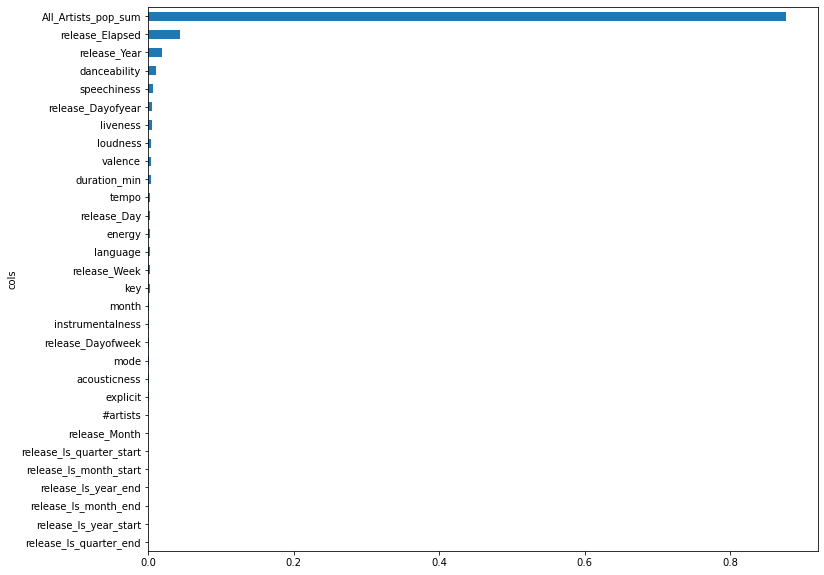

In [319]:
barh = feat_importance[:30].plot('cols', 'imp', 'barh', figsize = (12,10), legend = False)
barh = barh.invert_yaxis()
barh

The total popularity of artists seems to be the most important feature by a lot, followed by temporal features.

<a id='permutation_feature_importance'></a>

## Permutation importance

[Back to top](#plan)

In [330]:
len(X_small.columns)

30

In [331]:
result = permutation_importance(
    model, 
    X_valid, 
    y_valid, 
    n_repeats = 10,
    random_state = 42, n_jobs = -1,
)
sorted_idx = result.importances_mean.argsort()

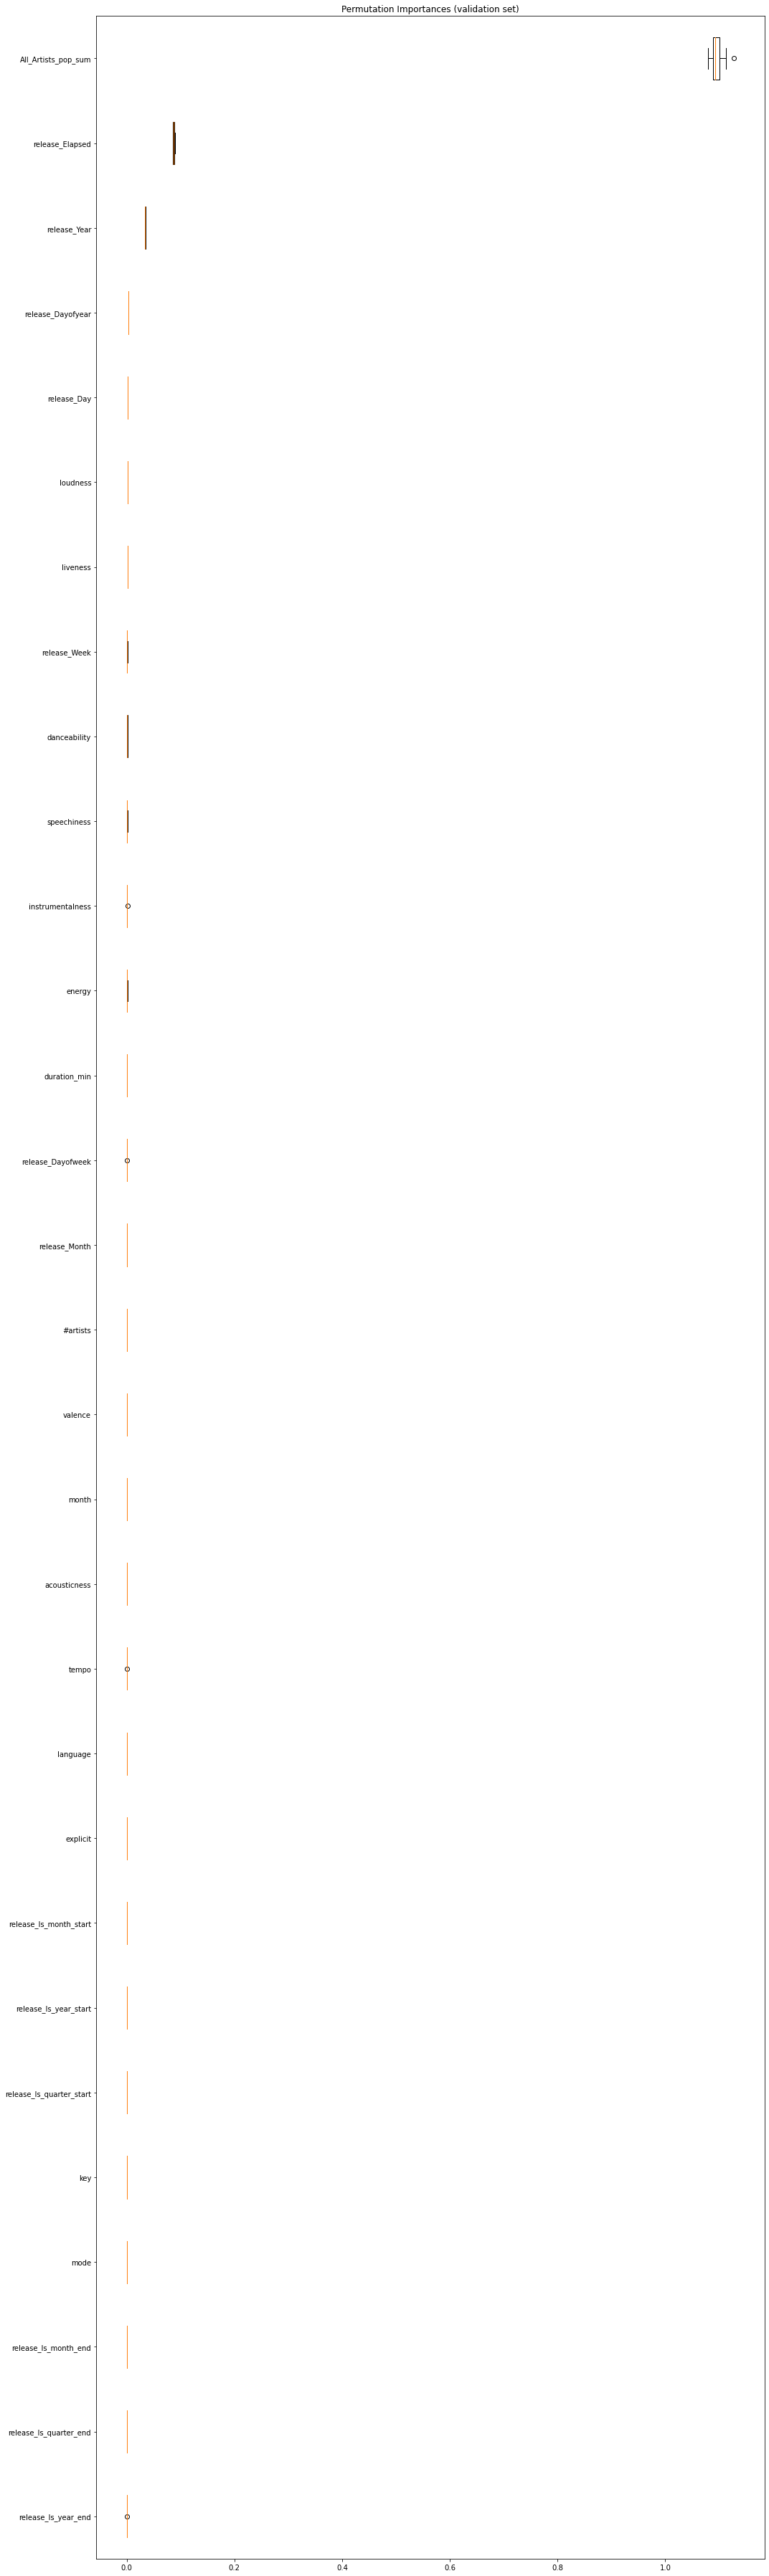

In [332]:
fig, ax = plt.subplots(figsize = (15, 50))
ax.boxplot(
    result.importances[sorted_idx].T,
    vert = False, 
    labels = X_valid.columns[sorted_idx],
)
ax.set_title("Permutation Importances (validation set)")
fig.tight_layout()
plt.show()

### Ablation of least important features

Least important features can be discarded before re-training the random forest, where it yields a **notable improvement** of the model's validation $R^2$ score :

In [334]:
bool_filter = result.importances_mean > 0.005

In [335]:
to_keep = df.columns[bool_filter]

df_keep = df[to_keep].copy()

n_total = len(df_keep)
n_valid = 25000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 25000

X_train_keep, X_valid_keep = split_vals(df_keep, n_train)
y_train, y_valid = split_vals(y, n_train)

X_small_keep, _ = split_vals(df_keep, n_small)
y_small, _ = split_vals(y, n_small)

print('Number of small training data points: X = {}, y = {}'.format(X_small.shape, y_small.shape))
print('Number of full training data points: X = {}, y = {}'.format(X_train.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid.shape, y_valid.shape))

Number of small training data points: X = (25000, 30), y = (25000,)
Number of full training data points: X = (103210, 30), y = (103210,)
Number of validation data points: X = (25000, 30), y = (25000,)


In [336]:
len(to_keep)

3

In [338]:
model = RandomForestRegressor(max_depth=10, max_features=0.5, max_samples=0.75
                              , oob_score=True, random_state=42
)

%time model.fit(X_small_keep, y_small)
print_score(model, X_small_keep, y_small, X_valid_keep, y_valid)

CPU times: user 906 ms, sys: 5.3 ms, total: 911 ms
Wall time: 915 ms
RMSE on train set: 8.3448
RMSE on valid set: 8.9938
R^2 on train set: 0.8168
R^2 on valid set: 0.7868
R^2 on oob set: 0.7892


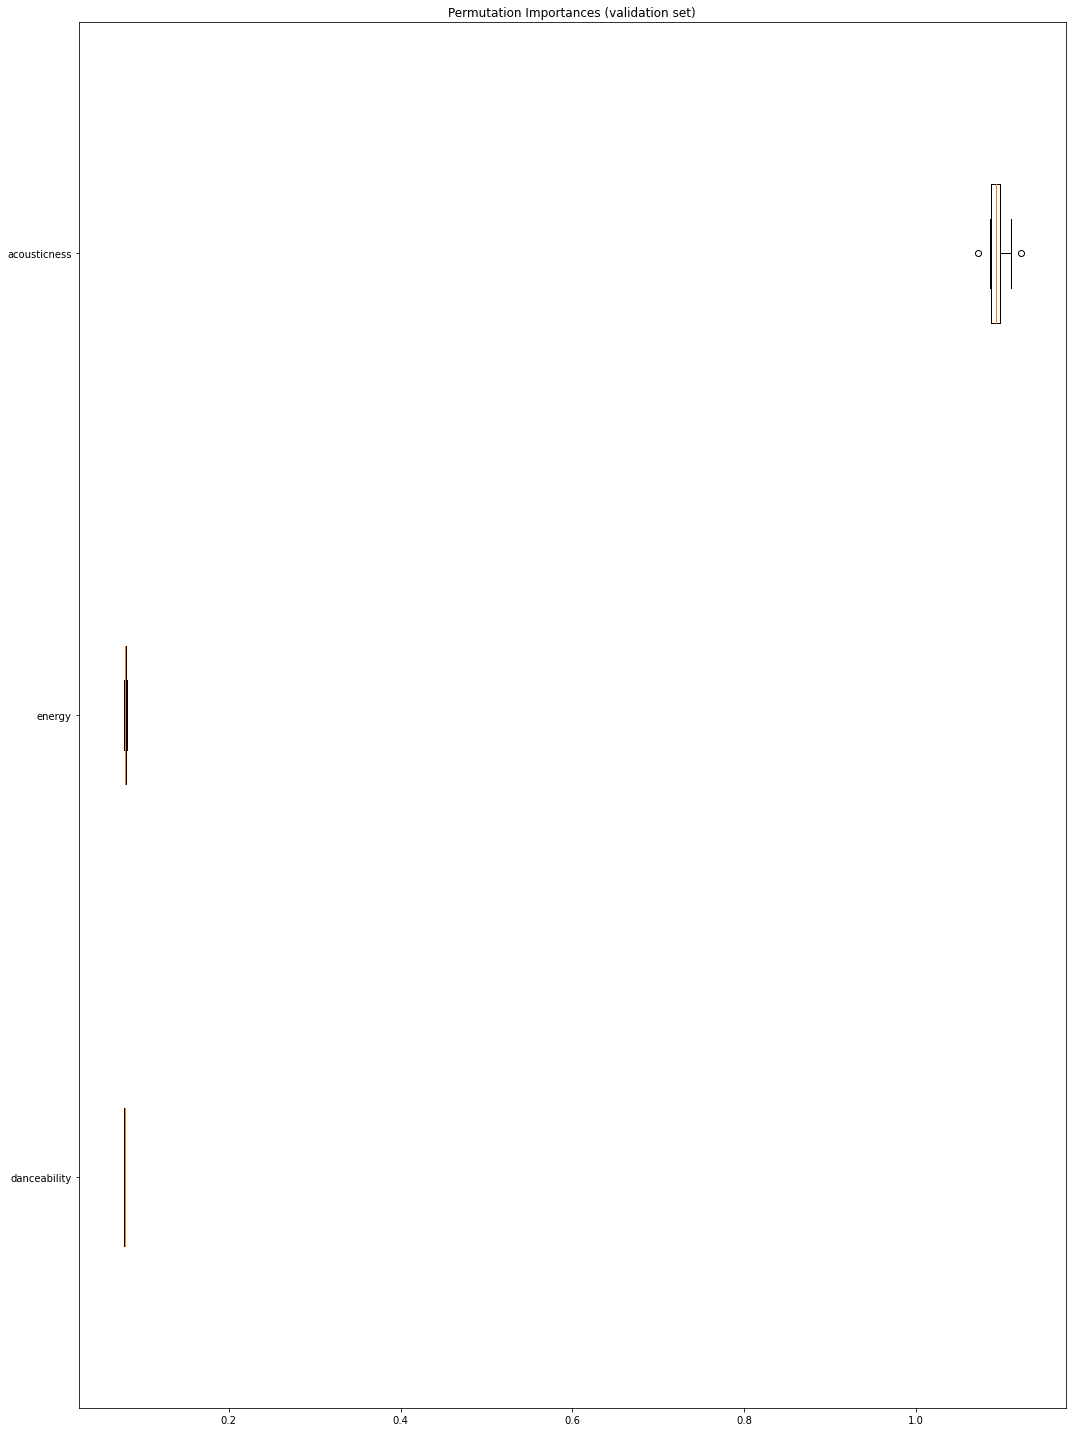

In [339]:
result = permutation_importance(
    model, 
    X_valid_keep, 
    y_valid, 
    n_repeats = 10,
    random_state = 42, n_jobs = -1,
)
sorted_idx = result.importances_mean.argsort()

# plot boxplot
fig, ax = plt.subplots(figsize = (15, 20))
ax.boxplot(
    result.importances[sorted_idx].T,
    vert = False, 
    labels = X_valid.columns[sorted_idx],
)
ax.set_title("Permutation Importances (validation set)")
fig.tight_layout()
plt.show()

Once again, the total artist popularity has the most impact the accuracy of the model. It's interesting to see that we have 2 musical features after the artist's popularity.

<a id='redundant_features'></a>

## Feature correlations

[Back to top](#plan)

As we have seen with the high number of date-type features, some columns are linked. We should explore hat they are exactly.

In [347]:
cols = df.columns.tolist()

In [363]:
corr = np.round(scipy.stats.spearmanr(df[cols]).correlation, 4)

In [359]:
corr_condensed = hierarchy.distance.squareform(1 - corr)
corr_condensed.size

435

In [361]:
corr_linkage = hierarchy.linkage(corr_condensed, method = 'average')

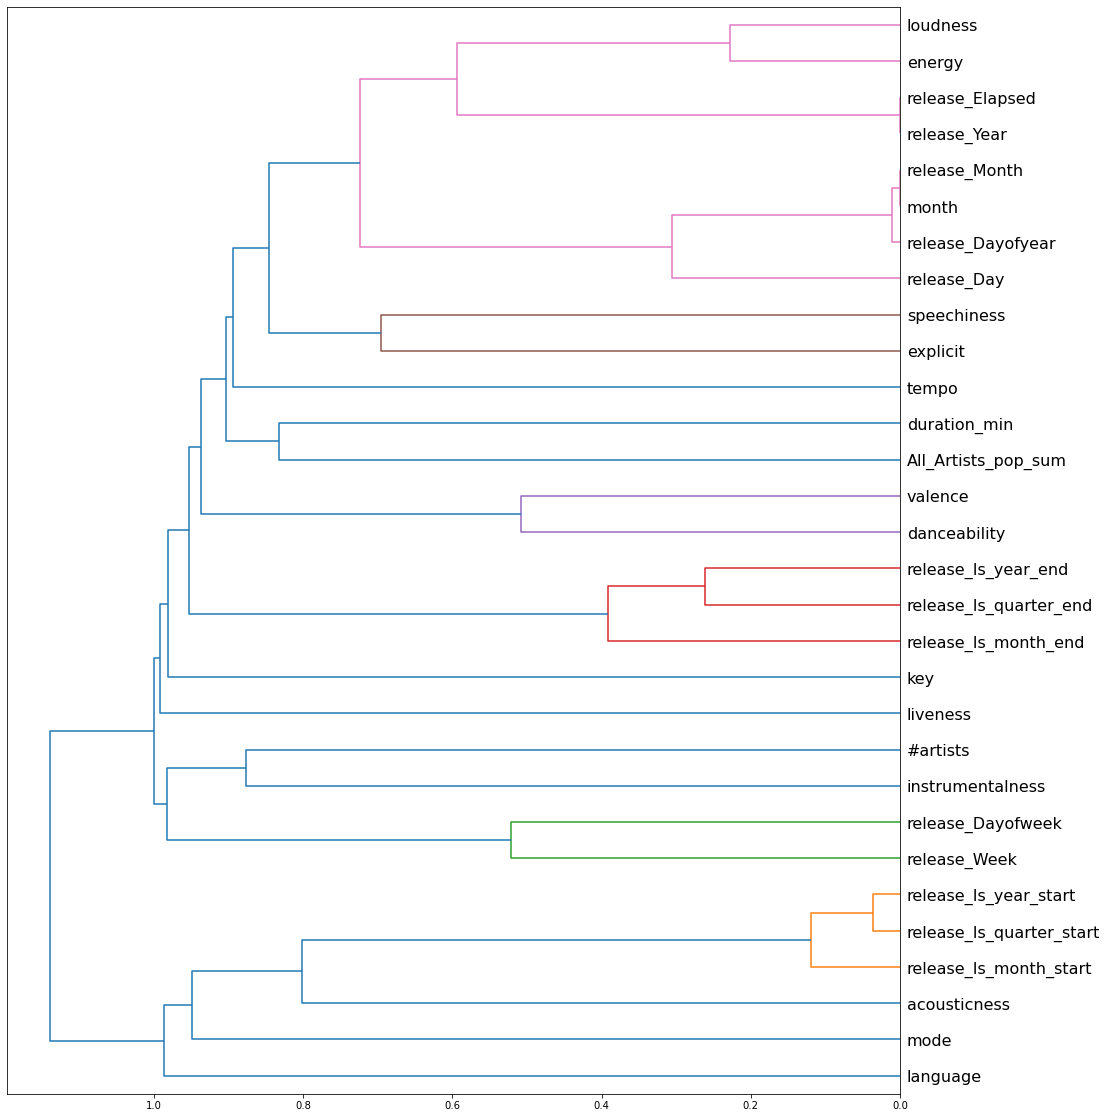

In [362]:
# compute plot
fig = plt.figure(figsize = (16,20))
dendrogram = hierarchy.dendrogram(
    corr_linkage, 
    labels = cols, 
    orientation = 'left', 
    leaf_font_size = 16,
)
plt.show()

As we could expect, most values about the date have been clustered together. Important to see thatloudness and energy have been groupes with the year of the song. The other musical features are in lone or only 2 points-clusters.

In [364]:
from collections import defaultdict

In [365]:
# compute hierarchical clustering
threshold = 0.1
cluster_ids = hierarchy.fcluster(corr_linkage, threshold, criterion = 'distance')

In [366]:
cluster_ids

array([ 3, 13, 22, 17,  8, 25, 26, 23,  4, 18, 24, 14,  9, 15, 19, 16,  5, 21, 19,  6, 20,  7, 19, 12,  2,
       10,  1, 11,  1, 21], dtype=int32)

In [367]:
# reshape clustering as {cluster_index : feature_index}
cluster_id_to_feature_ids = defaultdict(list)
for idx, cluster_id in enumerate(cluster_ids):
    cluster_id_to_feature_ids[cluster_id].append(idx)

In [369]:
# keep only first feature for each cluster
selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]

# shift feature index after 62
selected_features = [(i if i < 62 else i+1) for i in selected_features]

In [370]:
selected_features

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 19,
 20,
 21,
 23,
 24,
 25,
 26,
 27]

In [412]:
# retained set of features
selected_features = [df.columns[i] for i in selected_features]
selected_features

['acousticness',
 'danceability',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'speechiness',
 'tempo',
 'valence',
 '#artists',
 'All_Artists_pop_sum',
 'month',
 'duration_min',
 'language',
 'release_Year',
 'release_Week',
 'release_Day',
 'release_Dayofweek',
 'release_Is_month_end',
 'release_Is_month_start',
 'release_Is_quarter_end',
 'release_Is_quarter_start',
 'release_Is_year_end']

In [371]:
len(selected_features)

26

4 features have been taken out thanks to the clustering algorithm.

### Perform training on ablated set of features

In [408]:
to_keep = df.columns[selected_features]

df_keep = df[to_keep].copy()

n_total = len(df_keep)
n_valid = 25000  # same as Kaggle's test set size
n_train = n_total - n_valid
n_small = 25000

X_train_keep, X_valid_keep = split_vals(df_keep, n_train)
y_train, y_valid = split_vals(y, n_train)

X_small_keep, _ = split_vals(df_keep, n_small)
y_small, _ = split_vals(y, n_small)

print('Number of small training data points: X = {}, y = {}'.format(X_small.shape, y_small.shape))
print('Number of full training data points: X = {}, y = {}'.format(X_train.shape, y_train.shape))
print('Number of validation data points: X = {}, y = {}'.format(X_valid.shape, y_valid.shape))

Number of small training data points: X = (25000, 30), y = (25000,)
Number of full training data points: X = (103210, 30), y = (103210,)
Number of validation data points: X = (25000, 30), y = (25000,)


In [409]:
model = RandomForestRegressor(max_depth=10, max_features=0.5, max_samples=0.75,
                              oob_score=True, bootstrap=True, random_state=42
)

%time model.fit(X_train_keep, y_train)
print_score(model, X_train_keep, y_train, X_valid_keep, y_valid)

CPU times: user 18.8 s, sys: 51.4 ms, total: 18.9 s
Wall time: 19 s
RMSE on train set: 8.4484
RMSE on valid set: 8.8067
R^2 on train set: 0.8124
R^2 on valid set: 0.7956
R^2 on oob set: 0.7950


The model performance does not improve, but it's still better than the simple feature ablation. Let us now see if some features shows up as important and wasn't before due to the correlation issues :

### Permutation of feature importance after feature selection

In [410]:
result = permutation_importance(
    model, 
    X_valid_keep, 
    y_valid, 
    n_repeats = 5,
    random_state = 42, 
    n_jobs = -1,
)
sorted_idx = result.importances_mean.argsort()

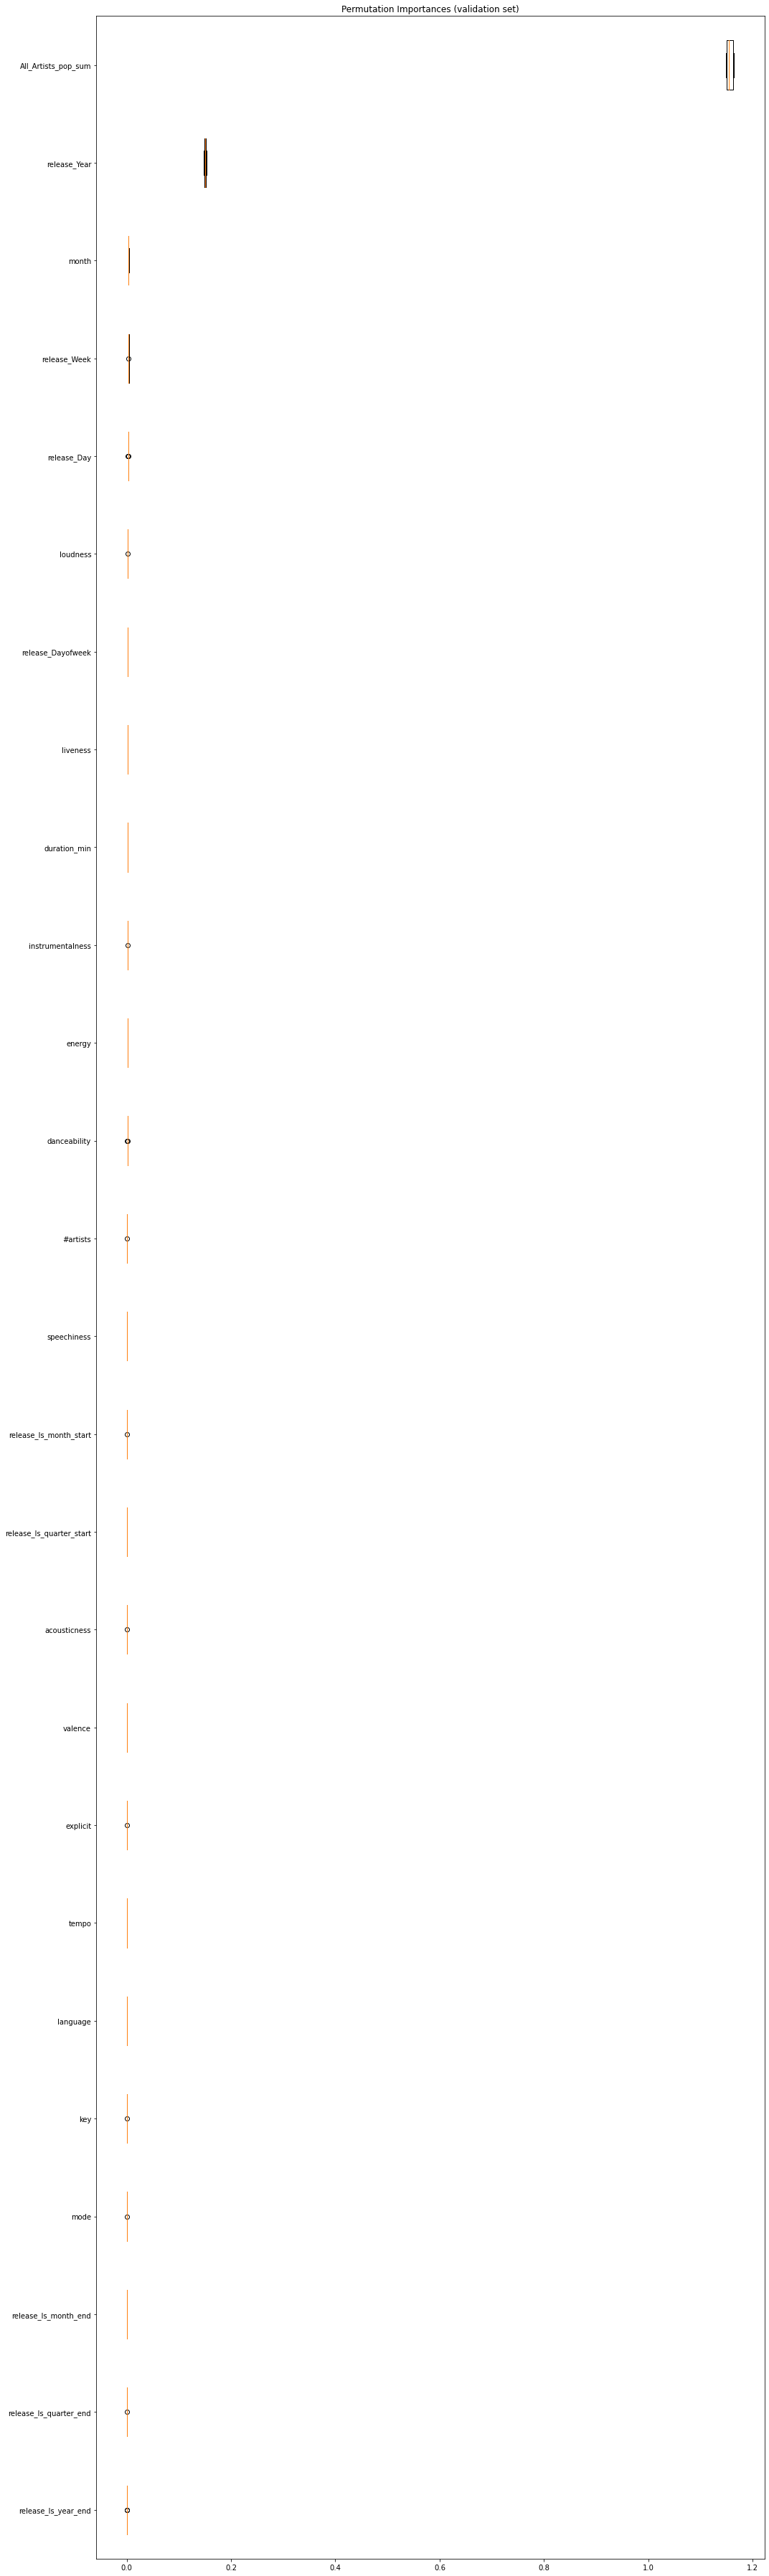

In [413]:
fig, ax = plt.subplots(figsize = (15, 50))
ax.boxplot(
    result.importances[sorted_idx].T,
    vert = False, 
    labels = X_valid_keep.columns[sorted_idx],
)
ax.set_title("Permutation Importances (validation set)")
fig.tight_layout()
plt.show()

After the clustering, we can see more date features. The loudness and energy musical features have been removed with the clustering though they were some of the most important of their kind.

<a id='feature_explicability'></a>

## Individual feature explicability

[Back to top](#plan)

### Partial Dependance Plots of explanatory variables

In [379]:
#!pip install plotnine
#!conda install matplotlib=2.2.3

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: - 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - matplotlib=2.2.3 -> python[version='>=2.7,<2.8.0a0|>=3.5,<3.6.0a0|>=3.7,<3.8.0a0|>=3.6,<3.7.0a0']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will not
change your python version to a different minor version unless you ex

In [418]:
# x = get_sample(X_train[X_train.YearMade > 1930], 500)
x = get_sample(df_keep[df_keep.release_Year > 1970], 500)

/Users/yanismartinet/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


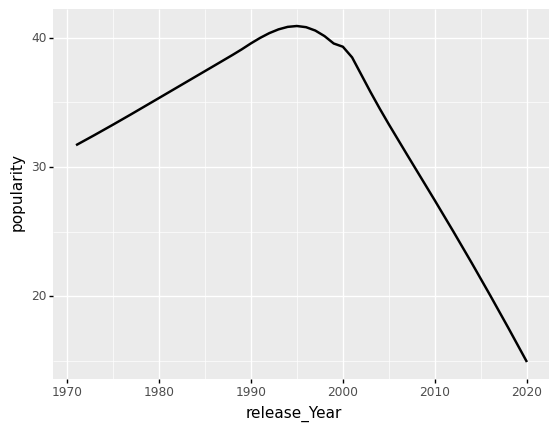

<ggplot: (8789103511254)>

In [415]:
from plotnine import ggplot,aes, stat_smooth
plot = ggplot(sample, aes('release_Year', 'popularity')) + stat_smooth(se = True, method = 'auto')
plot

[Back to top](#plan)